First we start with a)


Robot started at position 0 on a white tile.
--------------------------------------------------
--- Step 1/15 ---
Robot is at position 0, observes white tile.


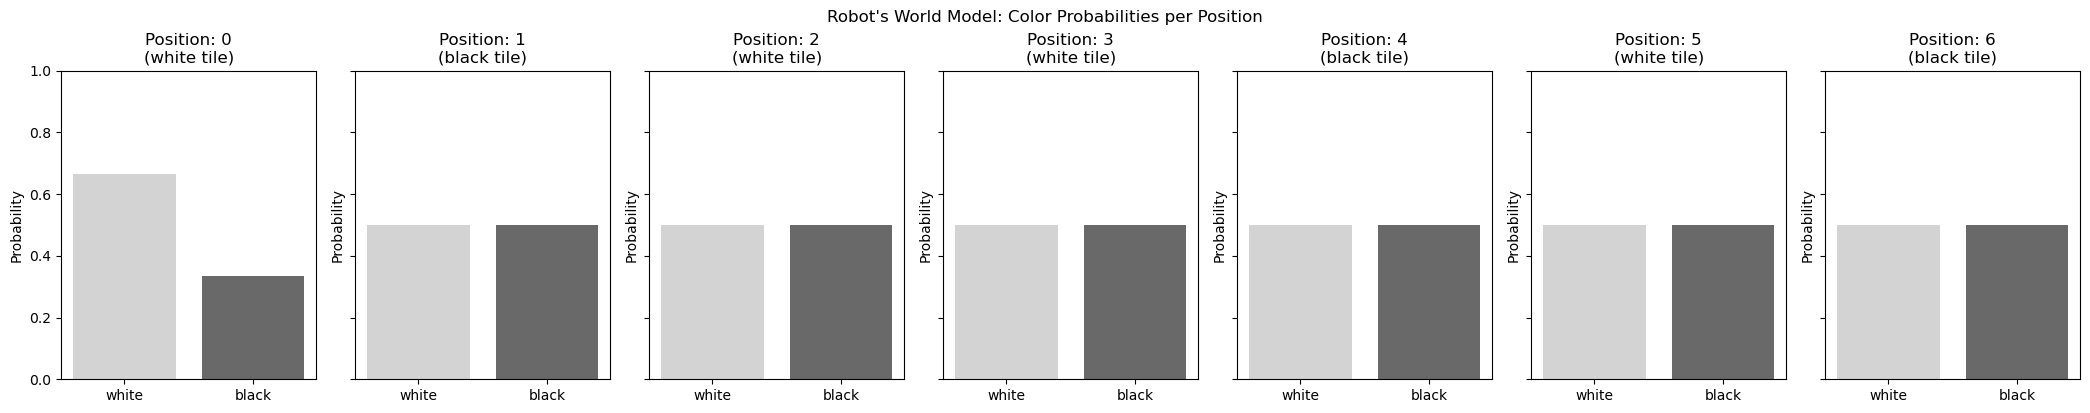

Robot chooses action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 2/15 ---
Robot is at position 1, observes black tile.


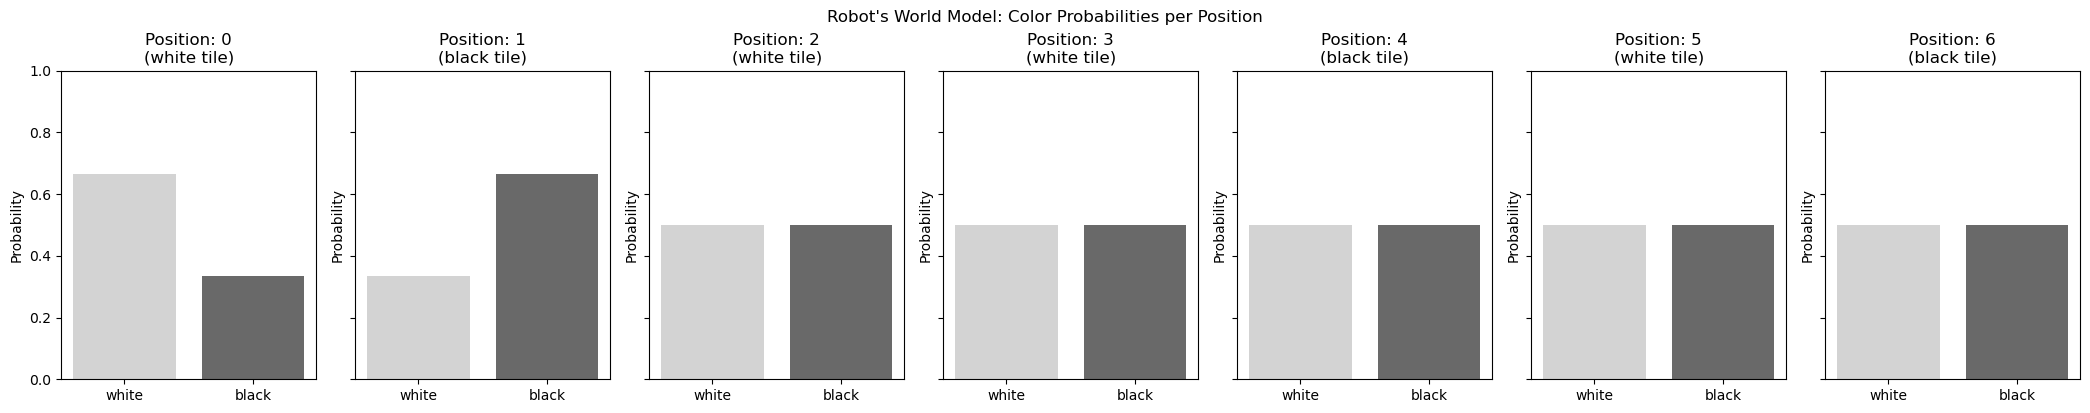

Robot chooses action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 3/15 ---
Robot is at position 0, observes white tile.


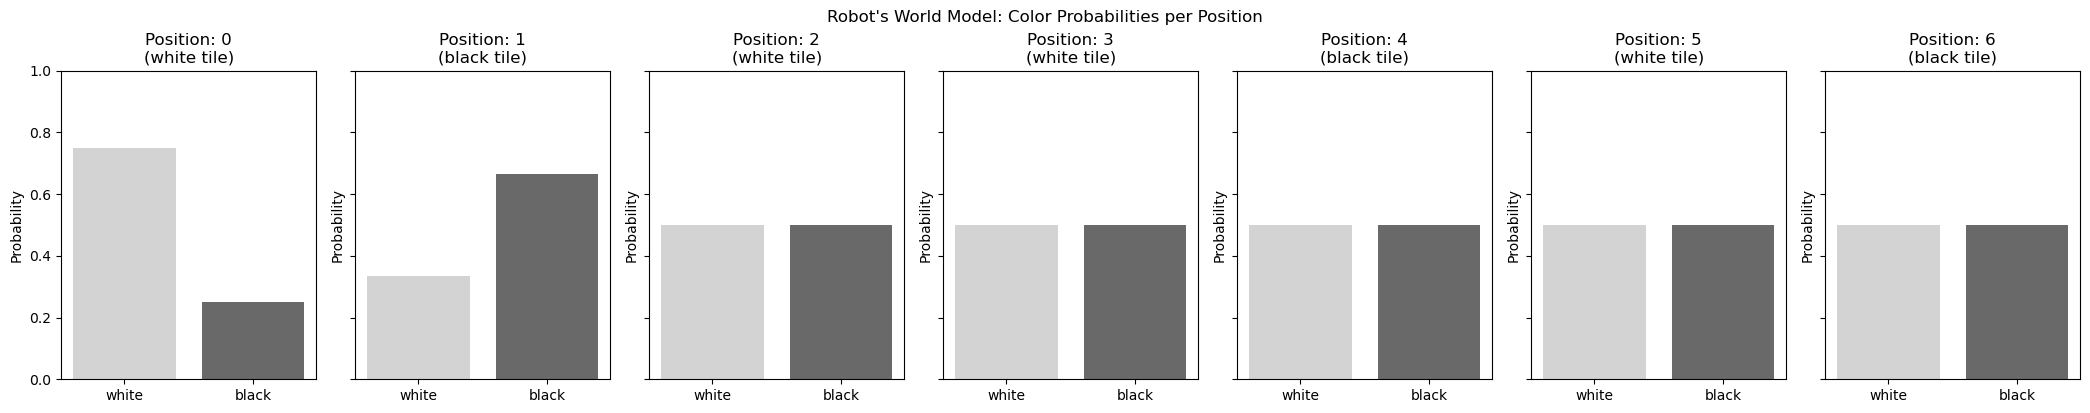

Robot chooses action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 4/15 ---
Robot is at position 1, observes black tile.


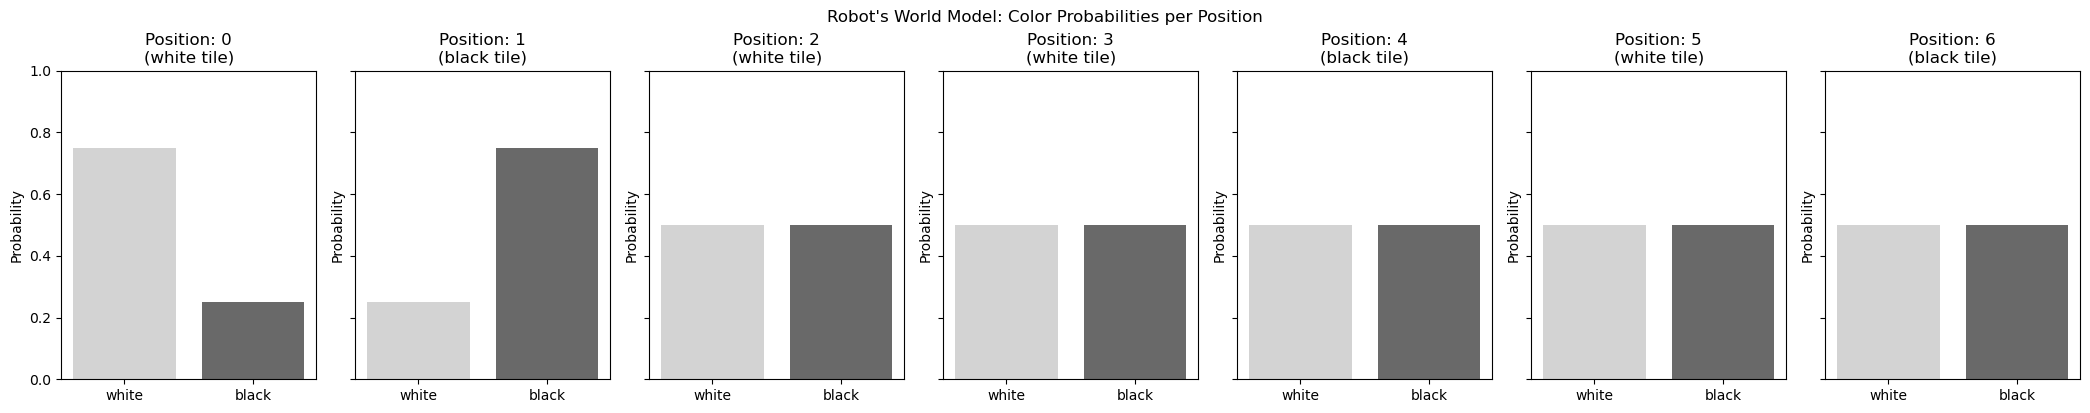

Robot chooses action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 5/15 ---
Robot is at position 0, observes white tile.


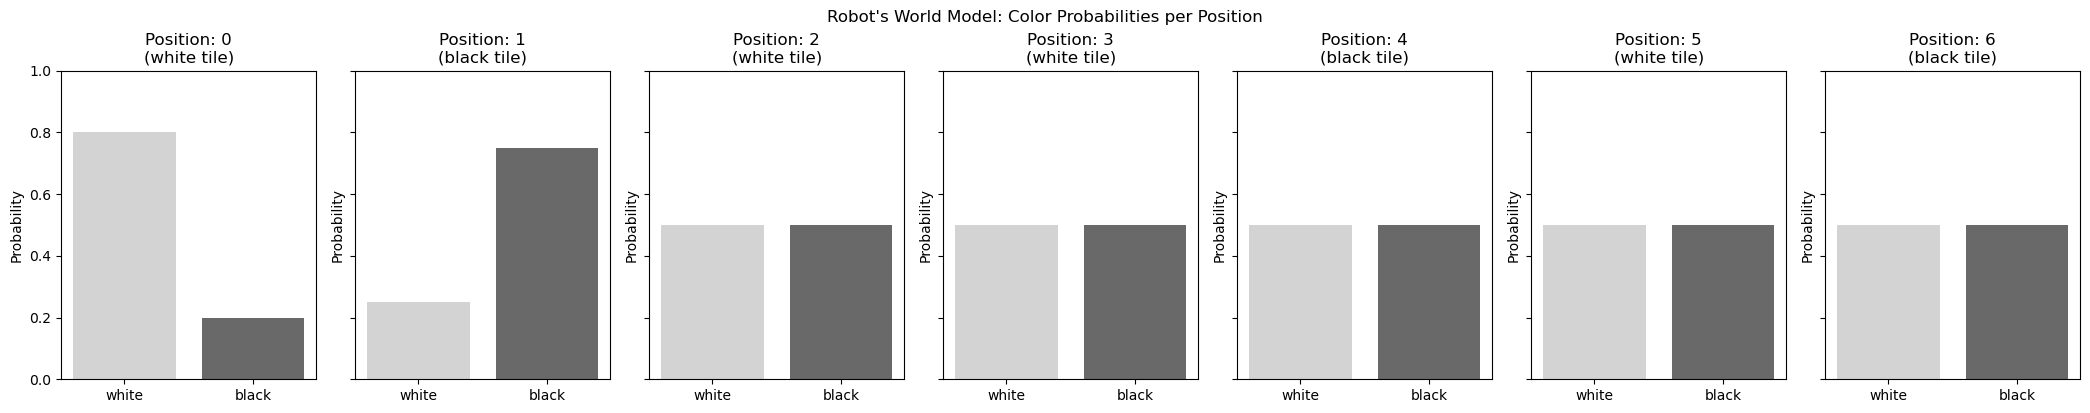

Robot chooses action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 6/15 ---
Robot is at position 1, observes black tile.


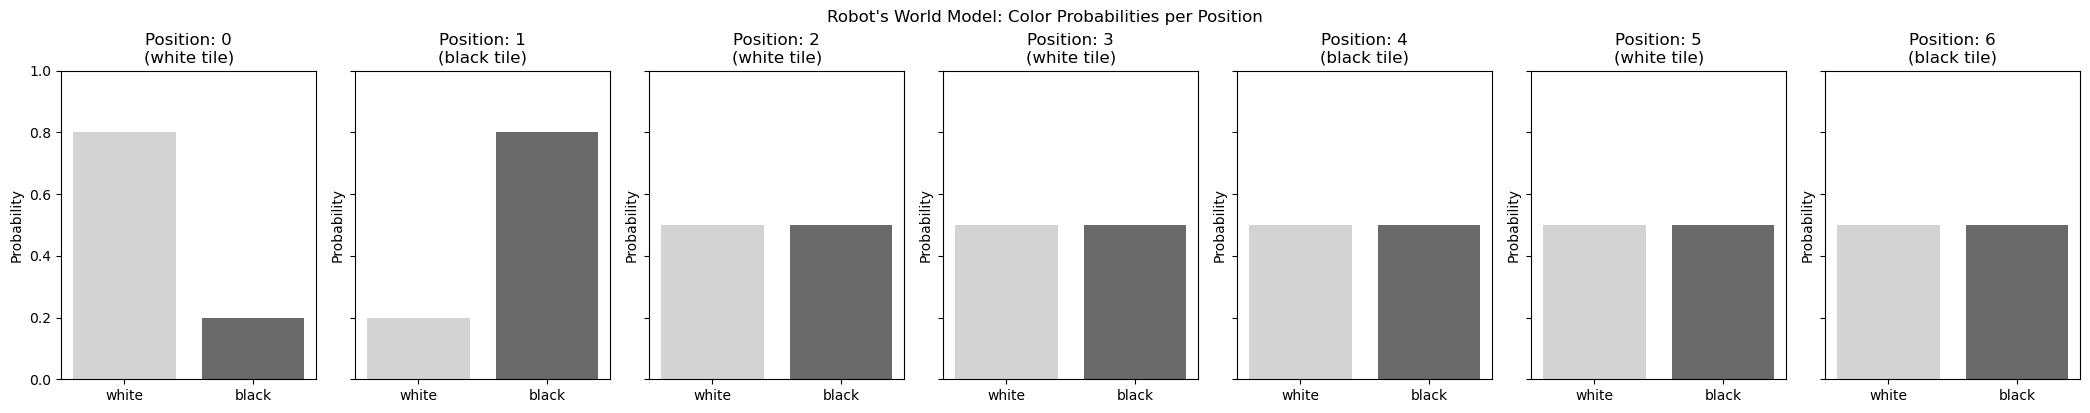

Robot chooses action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 7/15 ---
Robot is at position 0, observes white tile.


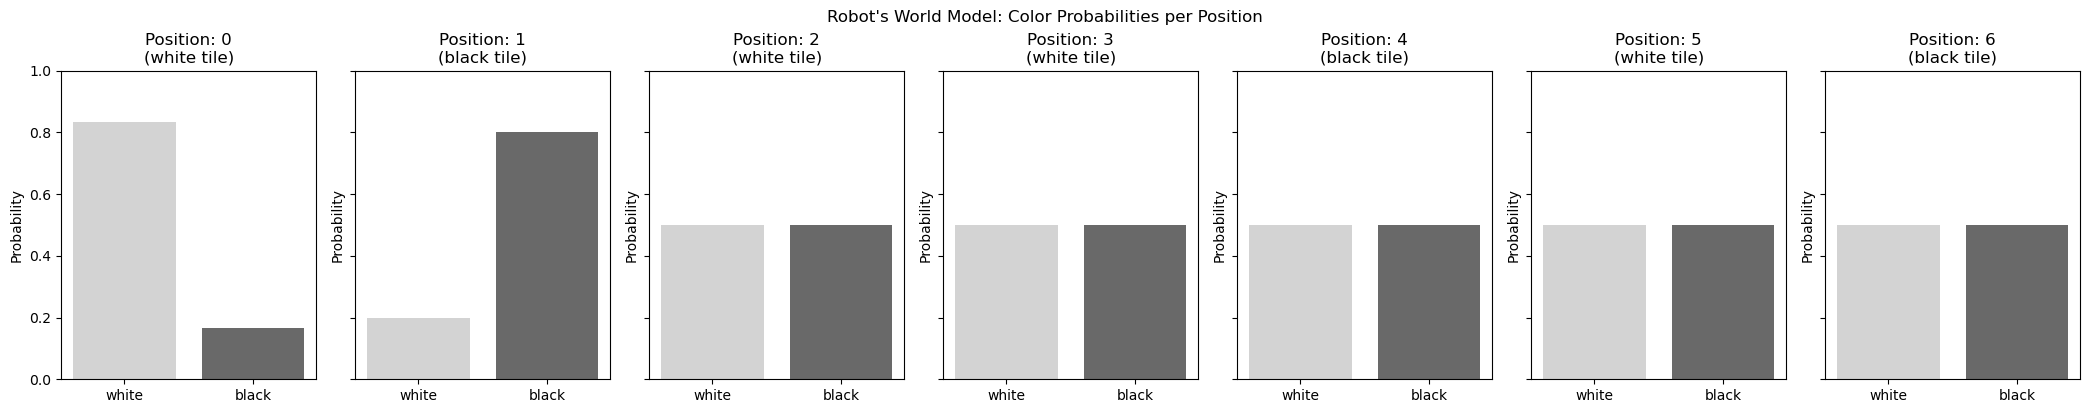

Robot chooses action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 8/15 ---
Robot is at position 1, observes black tile.


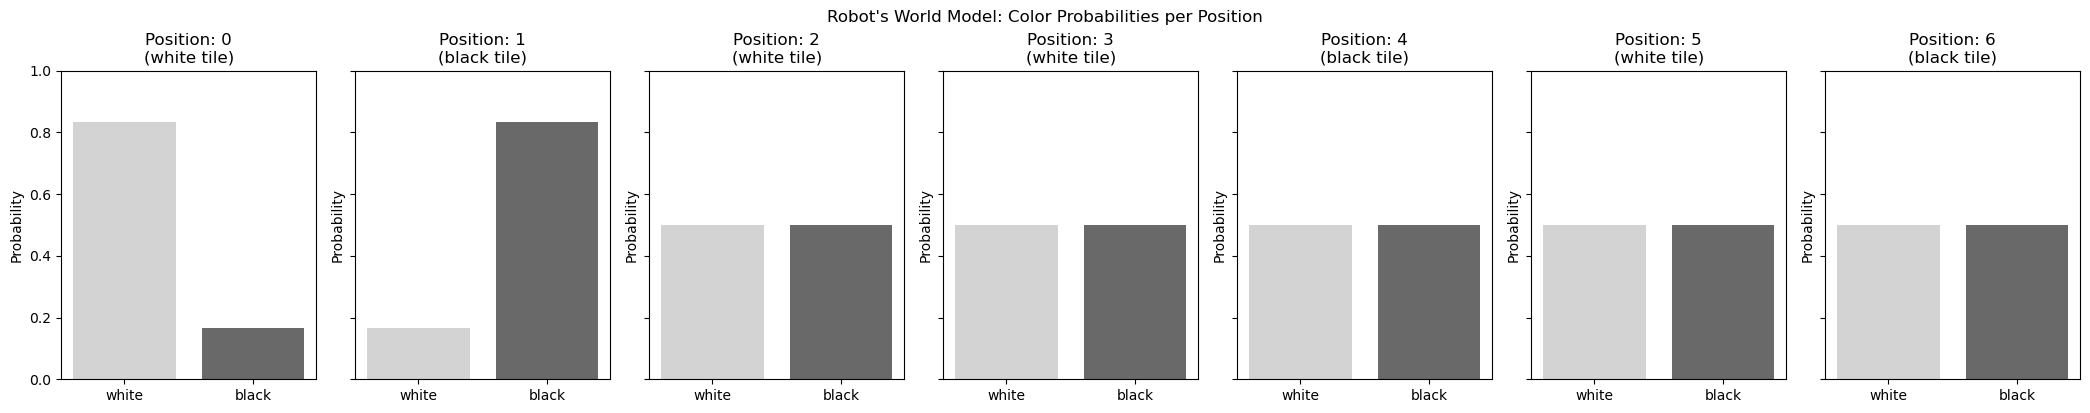

Robot chooses action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 9/15 ---
Robot is at position 0, observes white tile.


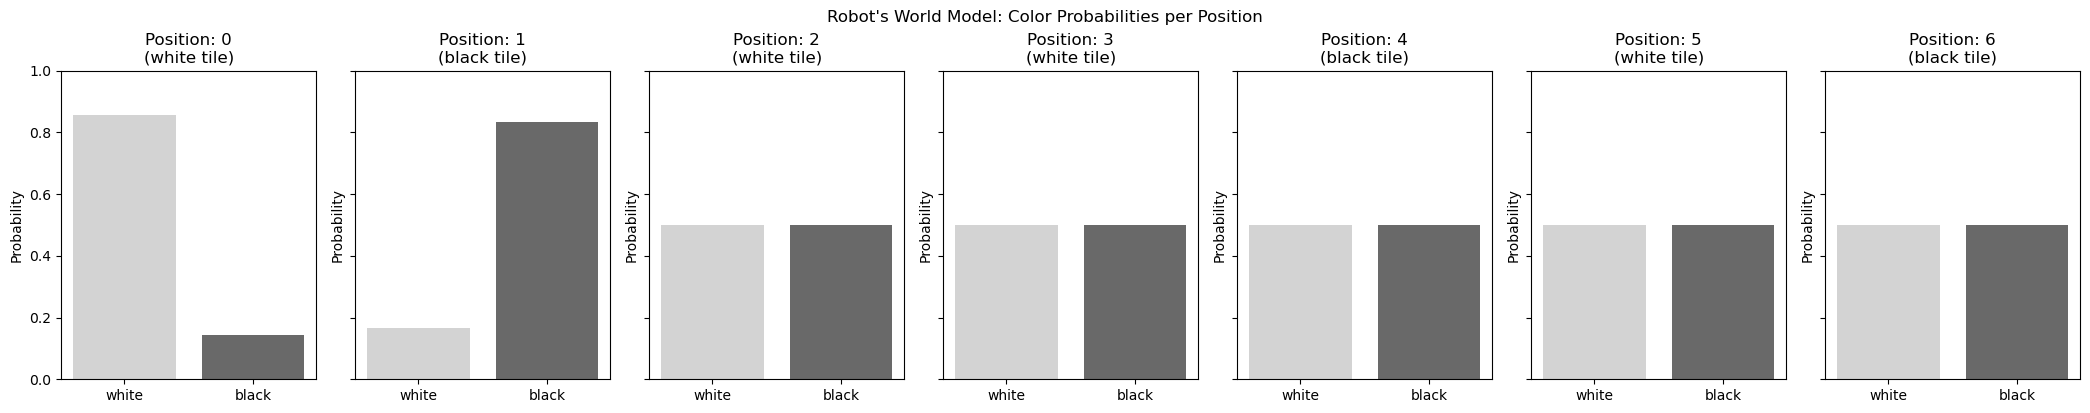

Robot chooses action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 10/15 ---
Robot is at position 1, observes black tile.


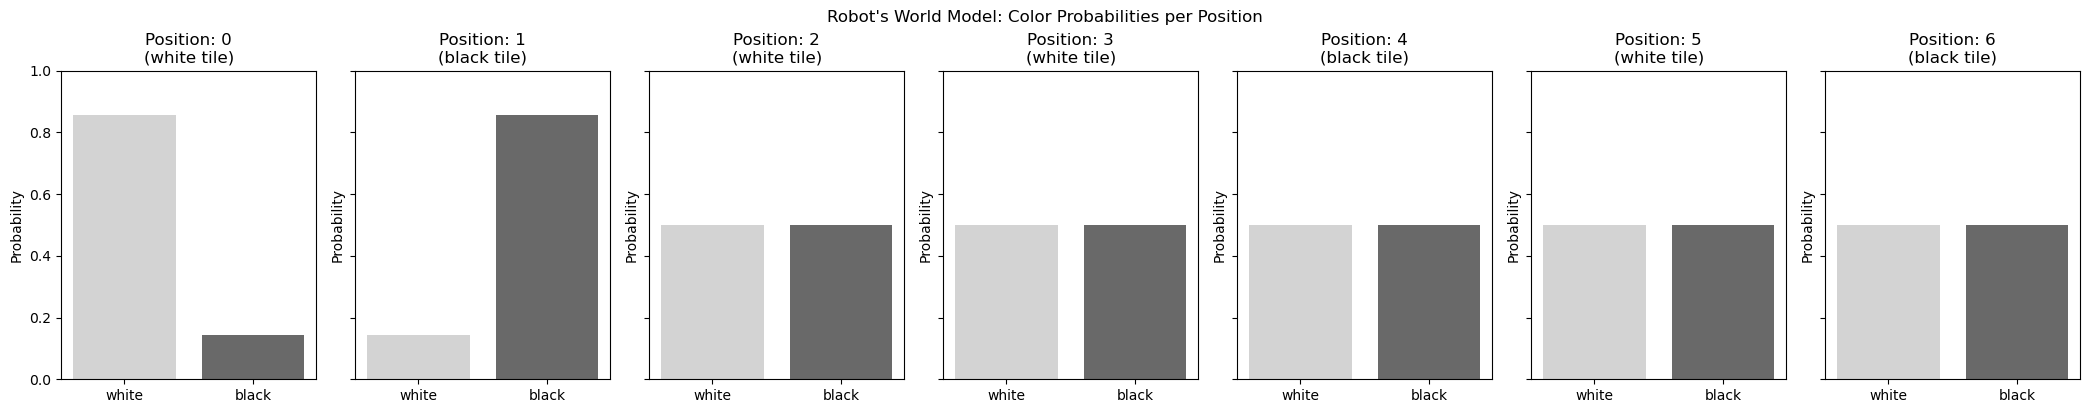

Robot chooses action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 11/15 ---
Robot is at position 0, observes white tile.


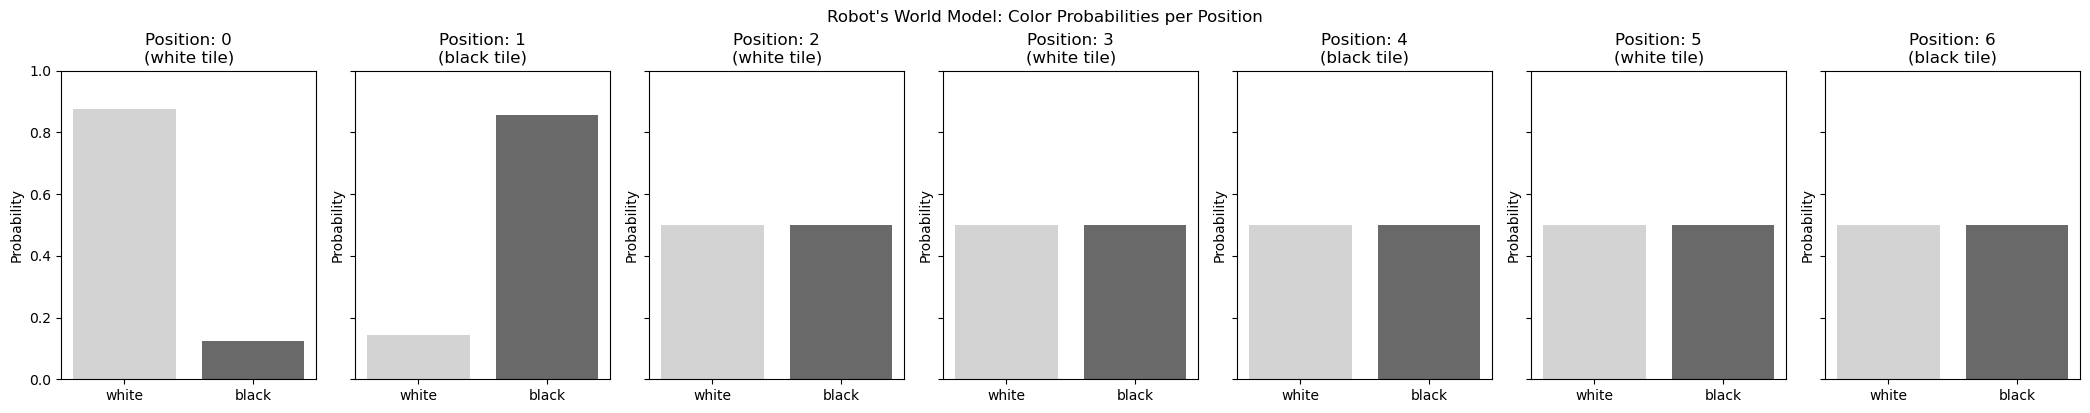

Robot chooses action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 12/15 ---
Robot is at position 1, observes black tile.


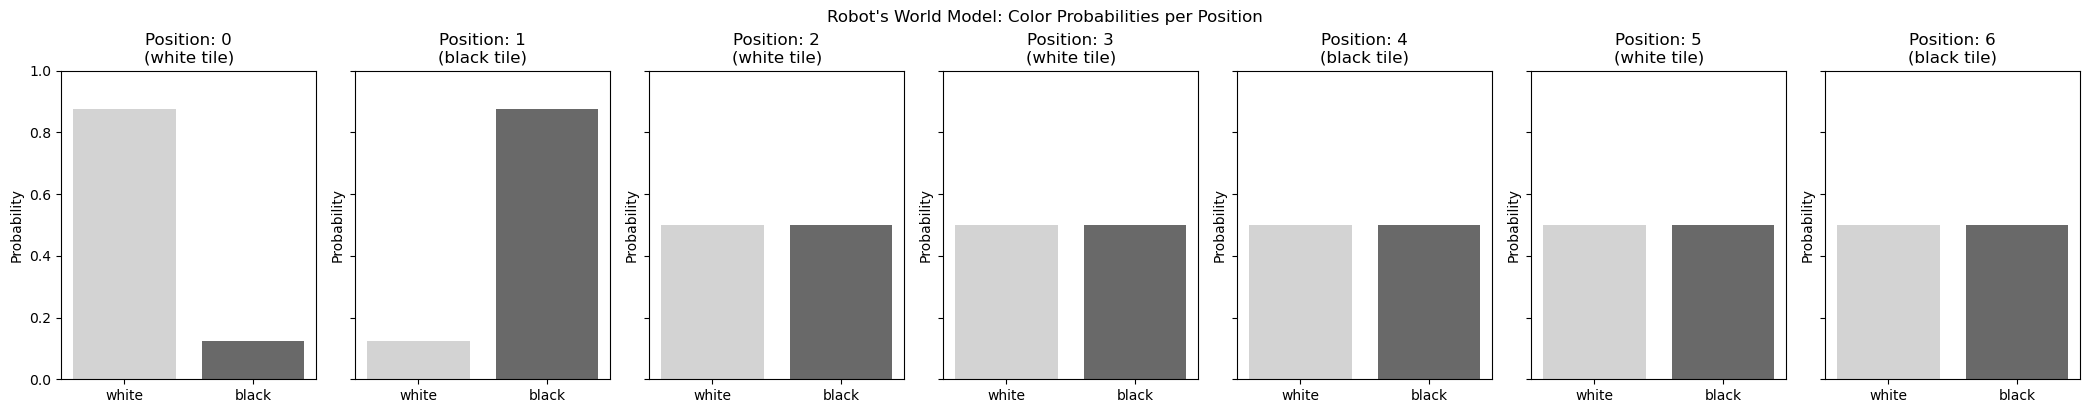

Robot chooses action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 13/15 ---
Robot is at position 0, observes white tile.


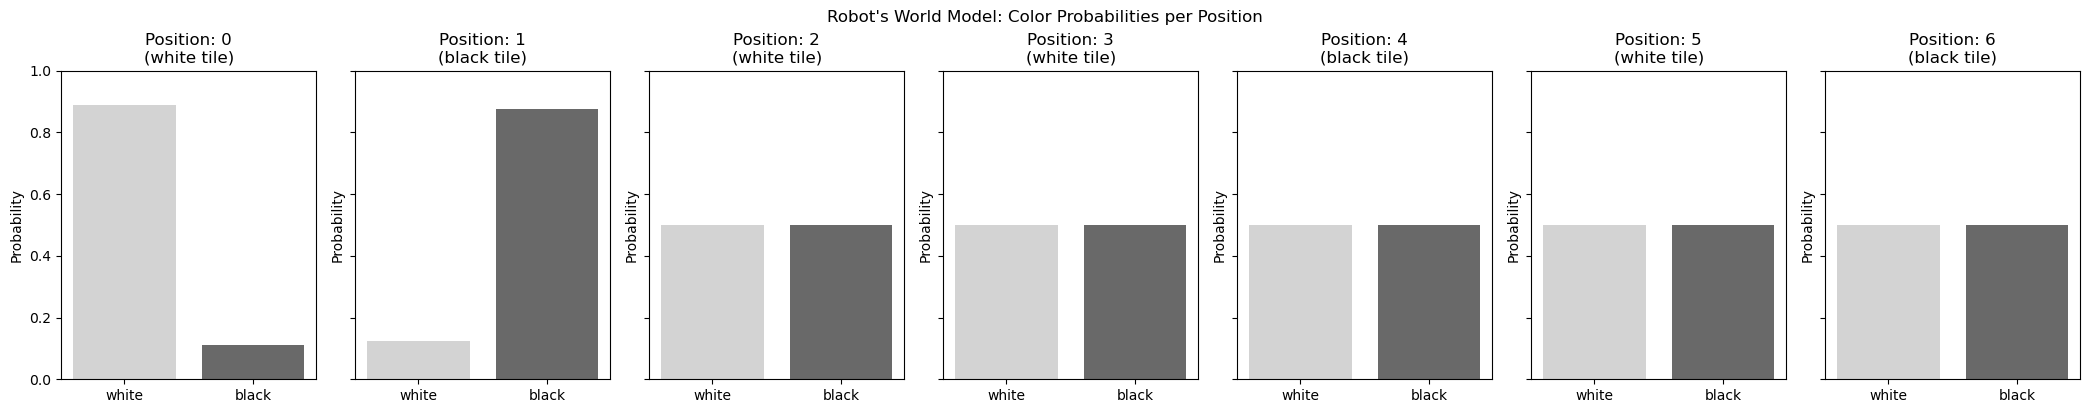

Robot chooses action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 14/15 ---
Robot is at position 1, observes black tile.


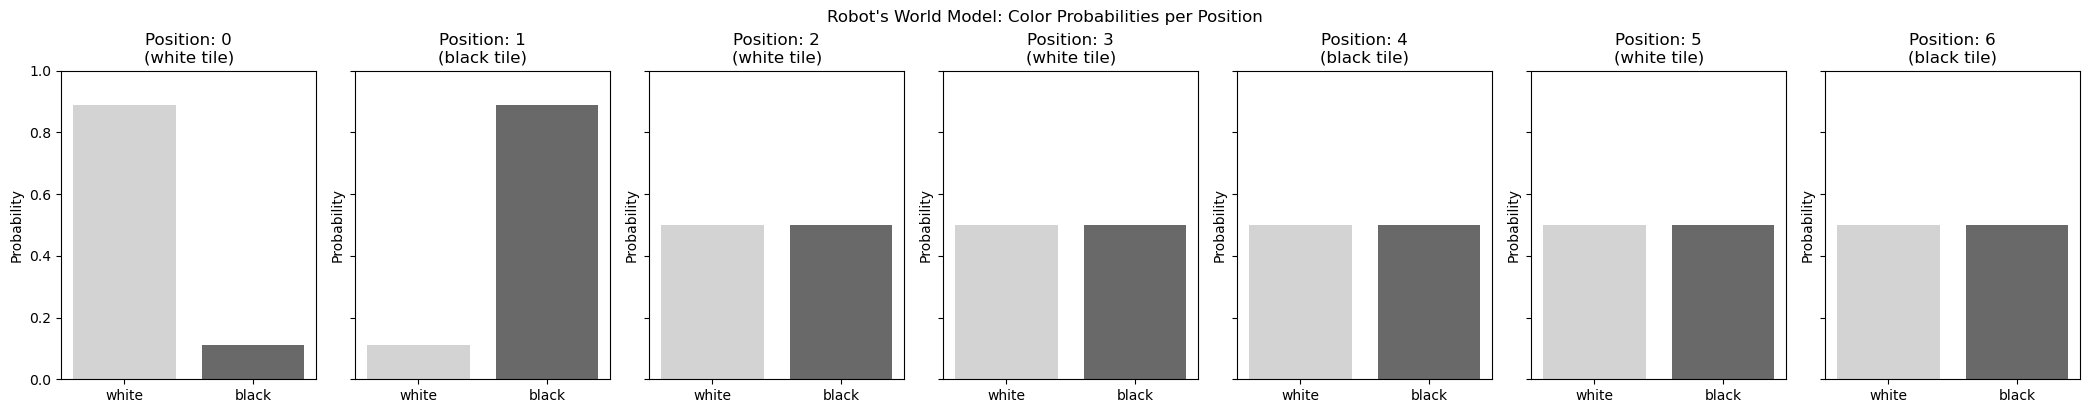

Robot chooses action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 15/15 ---
Robot is at position 0, observes white tile.


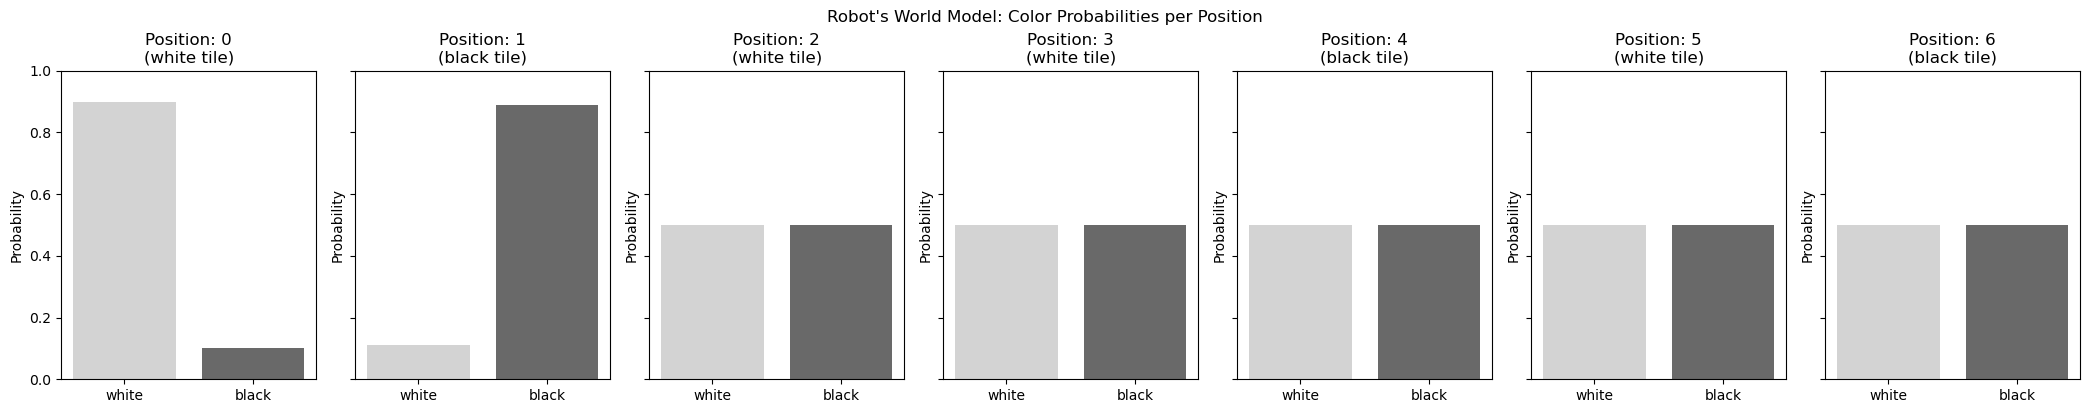

Robot chooses action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------


In [4]:
from random import random, randint
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# possible colors for tiles
TILES = ["white", "black"]
# possible actions for robot
ACTIONS = ["left", "right"]


# The world will be a list of colors, representing positions
# For example: ["white", "black", "white", "white", "black", "white", "black"] - default
WORLD_TILES = [
    "white",
    "black",
    "white",
    "white",
    "black",
    "white",
    "black"
]
WORLD_SIZE = len(WORLD_TILES)

# Line break for better readability
line_break = "-" * 50

# change this value for more (or less) steps
n_steps = 15


def get_tile_color(position):
    """Returns the color of the tile at a given position."""
    if 0 <= position < WORLD_SIZE:
        return WORLD_TILES[position]
    return None  # Indicate out of bounds


class Robot:
    def __init__(self):
        # self.world_model will store histograms for each position.
        # Each position's histogram will map "color" to "count".
        # Example: self.world_model[0] = {"white": 5, "black": 2}
        self.world_model = defaultdict(lambda: defaultdict(int))

        # Robot starts at a random valid position or at 0
        self.position = 0 # randint(0, WORLD_SIZE - 1)
        self.current_tile_color = get_tile_color(self.position)

        print(f"Robot started at position {self.position} on a {self.current_tile_color} tile.")
        print(line_break)

    def measure_tile_color(self):
        return get_tile_color(self.position)

    def update_world_model(self, position, color):
        self.world_model[position][color] += 1

    def get_color_probabilities_at_position(self, position):
        white_count = self.world_model[position]["white"] + 1
        black_count = self.world_model[position]["black"] + 1
        total = white_count + black_count

        return {
            "white": white_count / total,
            "black": black_count / total
        }

    def predict_next_action_position(self, action):
        if action == "left":
            next_pos = self.position - 1
            if next_pos < 0:
                return None  # Out of bounds
            return next_pos
        elif action == "right":
            next_pos = self.position + 1
            if next_pos >= WORLD_SIZE:
                return None  # Out of bounds
            return next_pos
        return None  # Should not happen

    def choose_action(self):
        action_certainties = {}
        valid_actions = []

        for action in ACTIONS:
            predicted_next_position = self.predict_next_action_position(action)

            # Only consider actions that lead to a valid, different position
            if predicted_next_position is not None and predicted_next_position != self.position:
                valid_actions.append(action)
                # If the predicted position has never been visited, its probabilities will be 0.5/0.5
                if predicted_next_position not in self.world_model:
                    # If a position has never been observed, assume 0.5/0.5 for certainty
                    action_certainties[action] = 0.5
                else:
                    probs = self.get_color_probabilities_at_position(predicted_next_position)
                    action_certainties[action] = max(probs.values())



        # Find the action(s) with the highest certainty among valid actions
        max_certainty = -1
        max_certainty = max(action_certainties.values())
        best_actions = [action for action, certainty in action_certainties.items() if certainty == max_certainty]
        return best_actions[randint(0, len(best_actions) - 1)]

    def show_world_model_histograms(self):
        num_positions = WORLD_SIZE
        fig, axs = plt.subplots(1, num_positions, figsize=(num_positions * 3, 4), sharey=True)

        for i in range(num_positions):
            position_data = self.world_model[i]
            total_observations = sum(position_data.values())

            if total_observations == 0:
                # If no observations for this position, assume uniform distribution initially for display
                white_prob = 0.5
                black_prob = 0.5
            else:
                white_prob = (position_data["white"] + 1) / (total_observations + 2)
                black_prob = (position_data["black"] + 1) / (total_observations + 2)

            colors = TILES
            probabilities = [white_prob, black_prob]

            axs[i].bar(colors, probabilities, color=["lightgray", "dimgray"])
            axs[i].set_title(f'Position: {i}\n({WORLD_TILES[i]} tile)')  # Show actual tile color
            axs[i].set_ylim(0, 1)
            axs[i].set_ylabel('Probability')

        plt.tight_layout()
        plt.suptitle("Robot's World Model: Color Probabilities per Position", y=1.02)
        plt.show()

    def step(self):
        # Measure current tile color
        observed_color = self.measure_tile_color()
        print(f"Robot is at position {self.position}, observes {observed_color} tile.")

        # Update world model with the observation
        self.update_world_model(self.position, observed_color)

        # Visualize the current state of the world model
        self.show_world_model_histograms()

        # choose next action
        action = self.choose_action()

        # Predict the next position (has to move)
        next_position = self.predict_next_action_position(action)

        if next_position is None:
            # Should not happen
            print(
                f"Robot attempted to move {action} from position {self.position} but it's out of bounds or invalid. Robot stays put.")
        else:
            print(f"Robot chooses action: {action}")
            # Move
            self.position = next_position
            self.current_tile_color = get_tile_color(self.position)  # Update current tile color after move
            print(f"Robot moved to position {self.position} (a {self.current_tile_color} tile).")
        print(line_break)


# Initiate Robot
robot = Robot()

# Run robot for n steps
for step_num in range(n_steps):
    print(f"--- Step {step_num + 1}/{n_steps} ---")
    robot.step()

For b)

--- Running Uncertainty Minimizing (Cautious) Robot ---
Robot started at position 0 on a white tile with strategy: uncertainty_minimizing.
--------------------------------------------------
--- Step 1/15 (Cautious) ---
Robot is at position 0, observes white tile (actual: white).


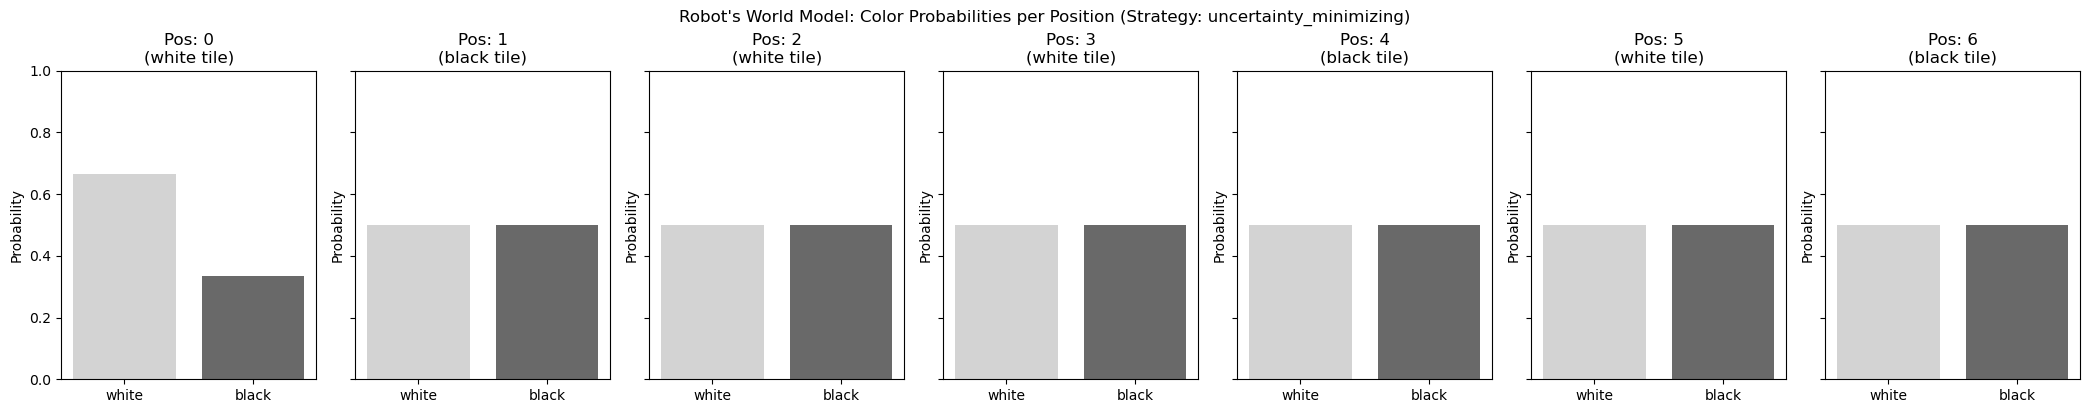

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 2/15 (Cautious) ---
Robot is at position 1, observes black tile (actual: black).


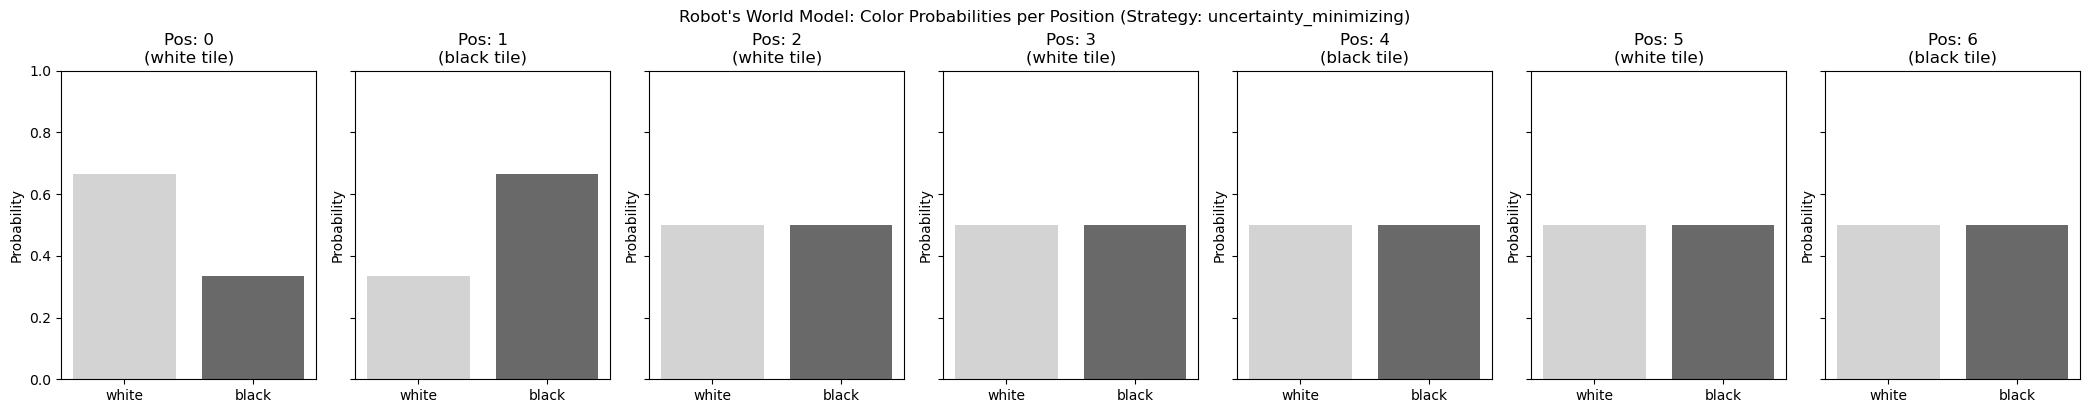

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 3/15 (Cautious) ---
Robot is at position 0, observes white tile (actual: white).


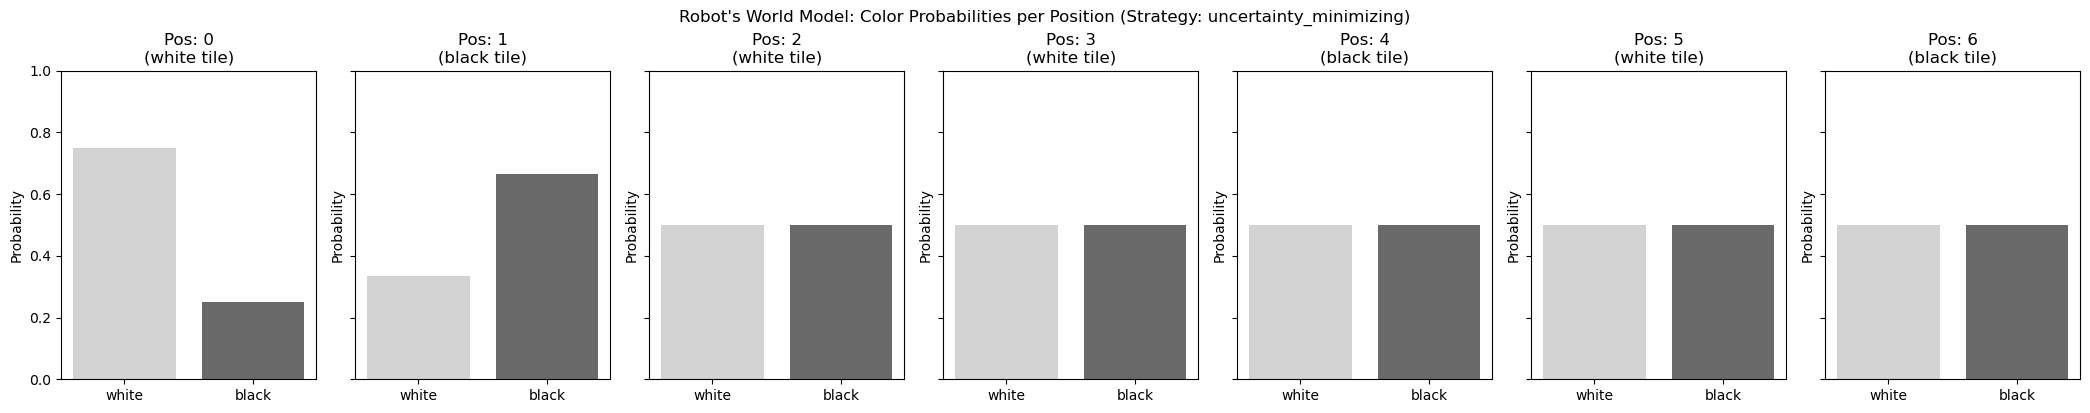

Robot intended to move right, but due to noise, moved left!
Robot moved left from position 0 but it was out of bounds. Robot stays put.
--------------------------------------------------
--- Step 4/15 (Cautious) ---
Robot is at position 0, observes white tile (actual: white).


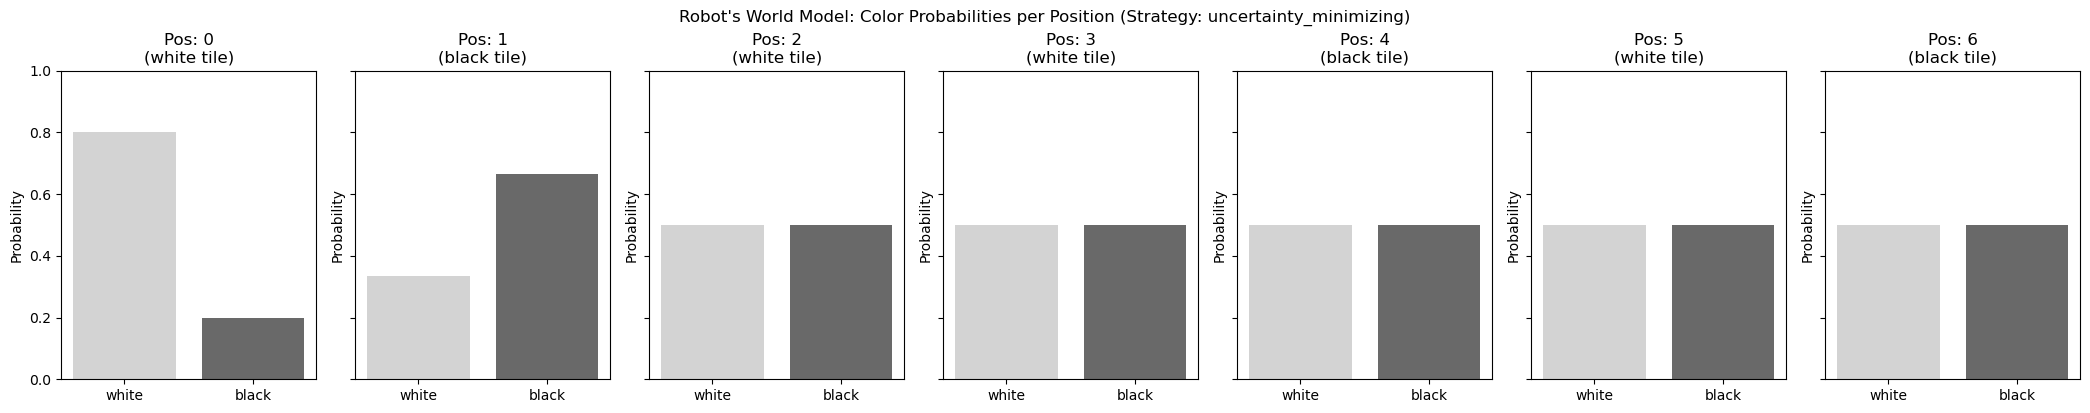

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 5/15 (Cautious) ---
Robot is at position 1, observes black tile (actual: black).


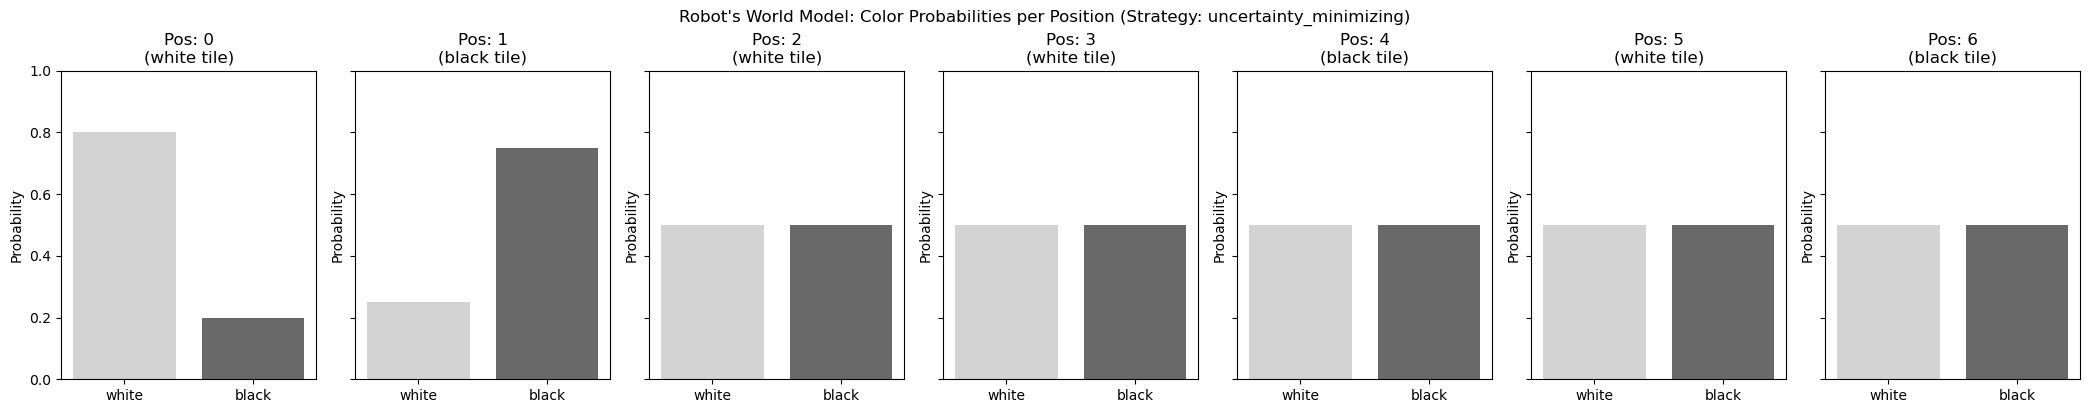

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 6/15 (Cautious) ---
Robot is at position 0, observes white tile (actual: white).


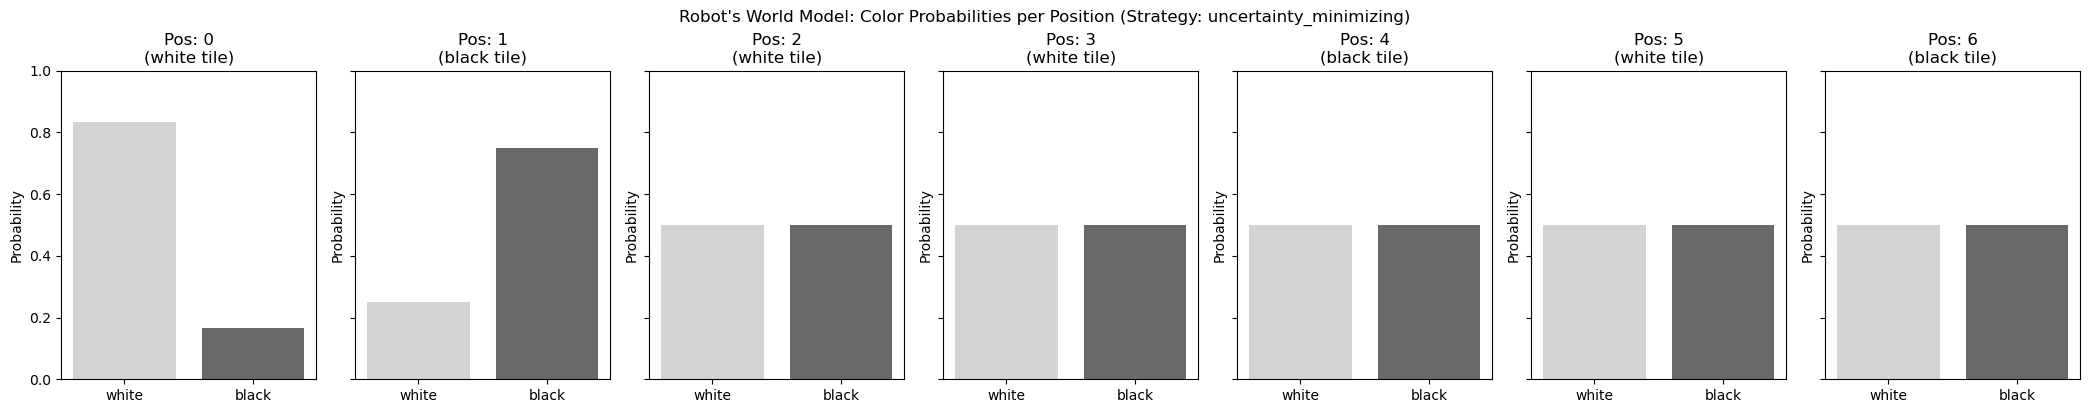

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 7/15 (Cautious) ---
Robot is at position 1, observes black tile (actual: black).


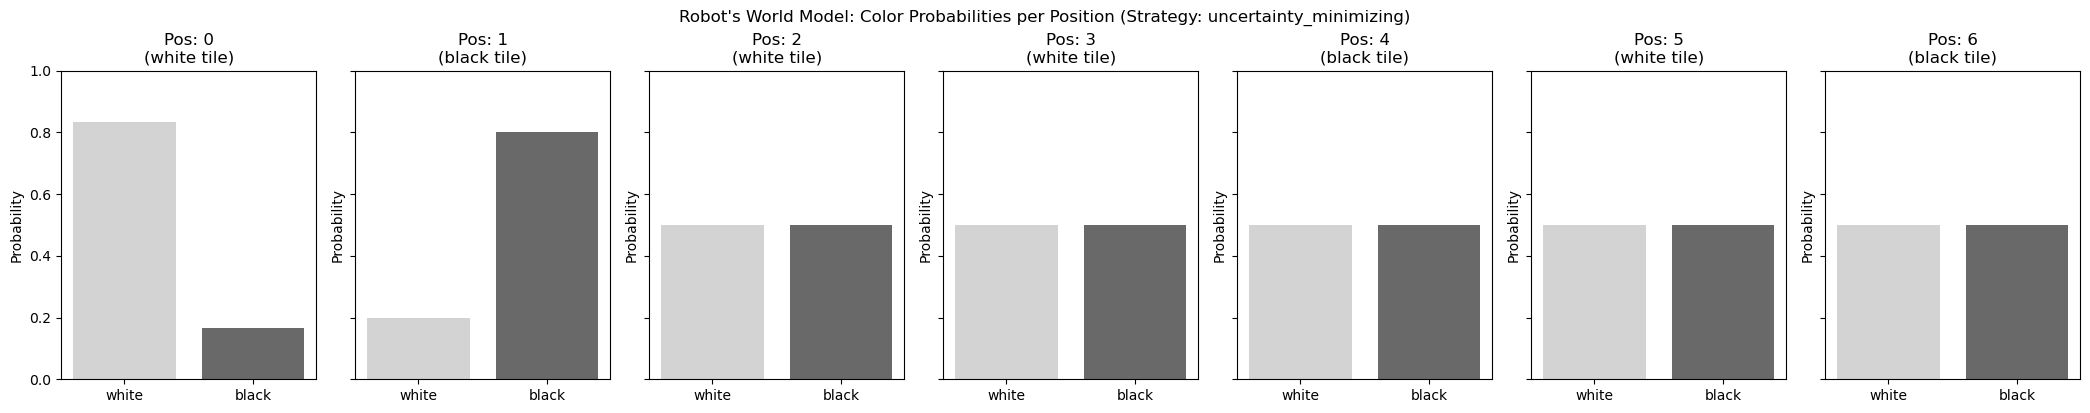

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 8/15 (Cautious) ---
Robot is at position 0, observes white tile (actual: white).


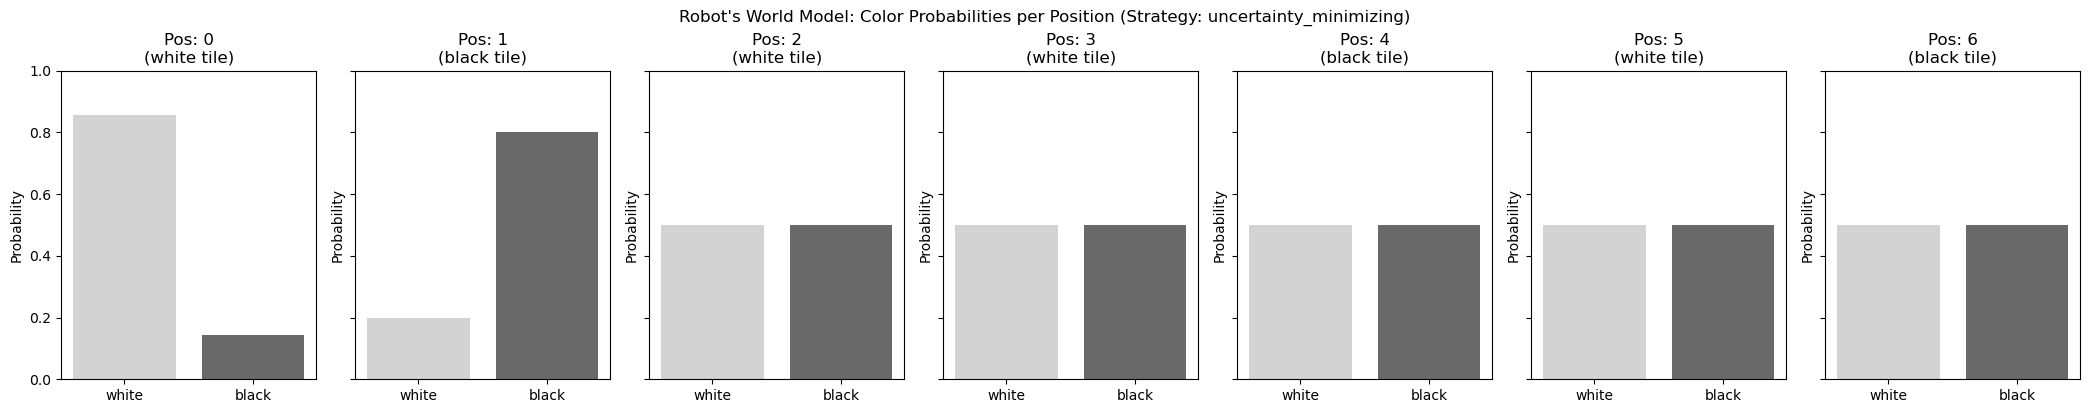

Robot intended to move right, but due to noise, moved left!
Robot moved left from position 0 but it was out of bounds. Robot stays put.
--------------------------------------------------
--- Step 9/15 (Cautious) ---
Robot is at position 0, observes white tile (actual: white).


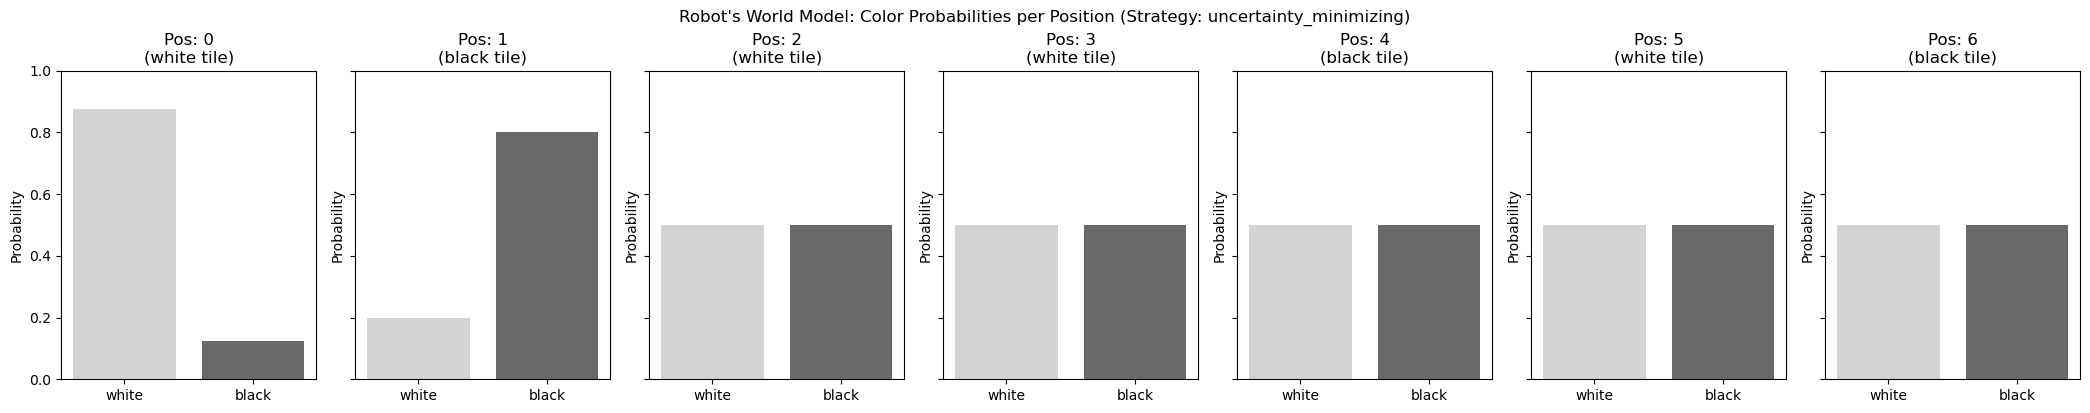

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 10/15 (Cautious) ---
Robot is at position 1, observes black tile (actual: black).


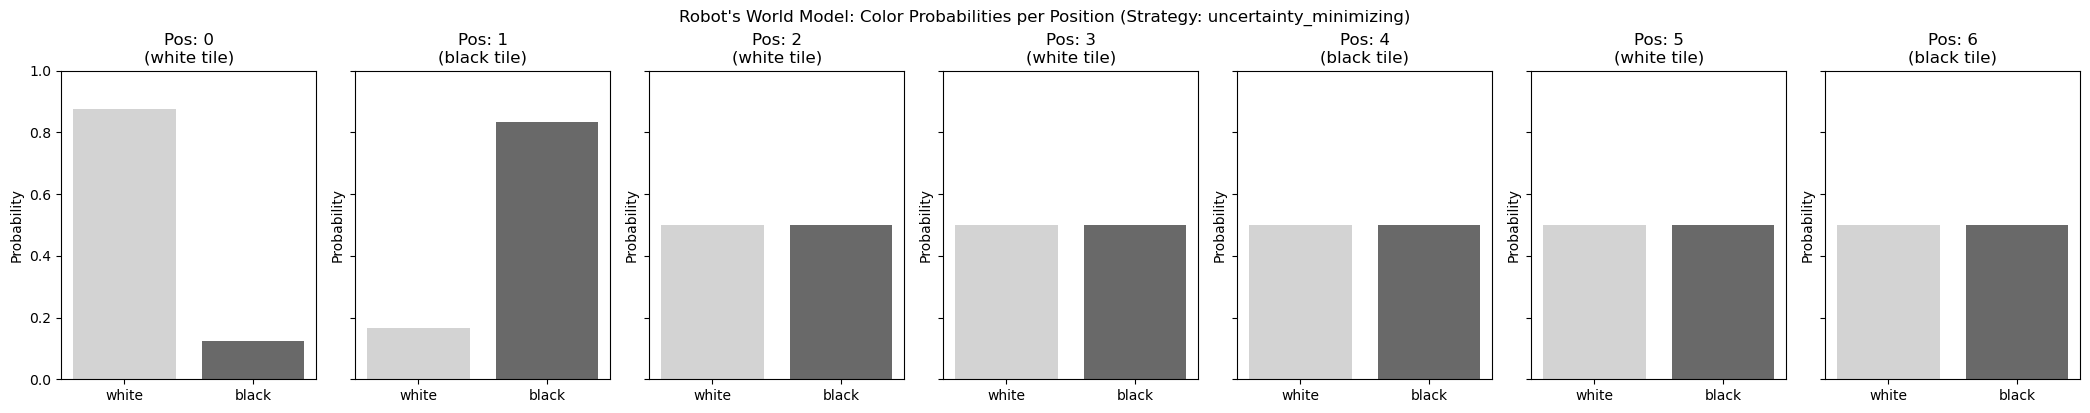

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 11/15 (Cautious) ---
Robot is at position 0, observes white tile (actual: white).


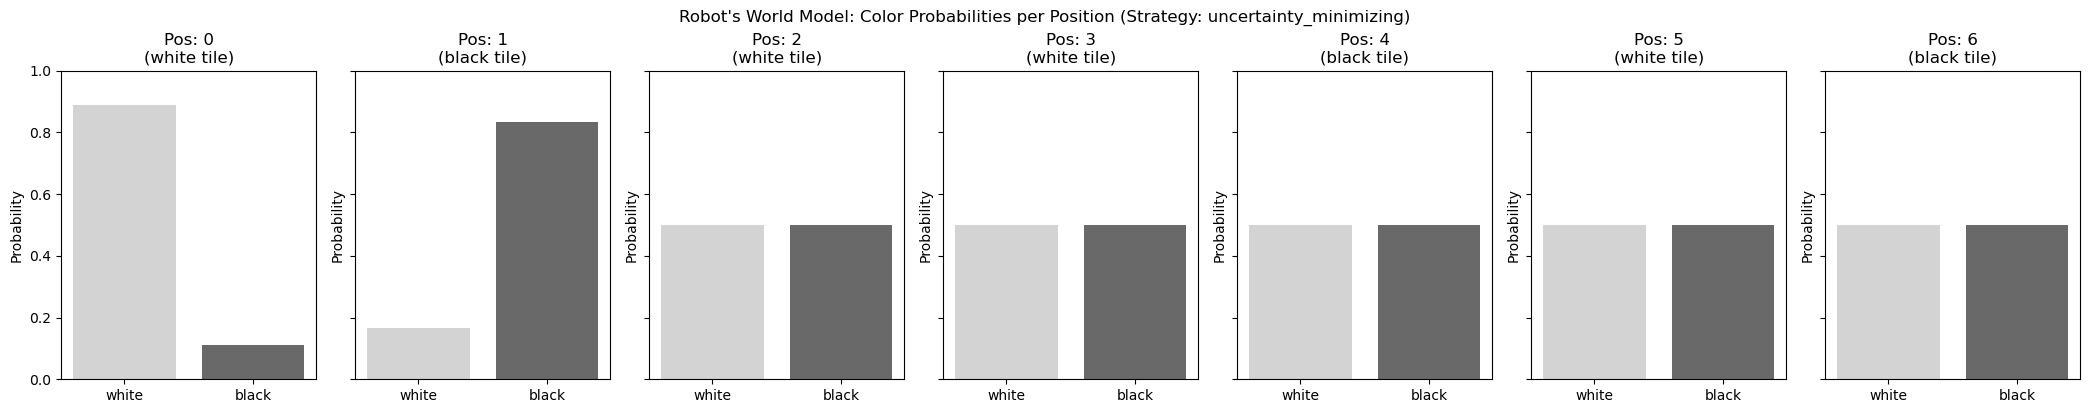

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 12/15 (Cautious) ---
Robot is at position 1, observes black tile (actual: black).


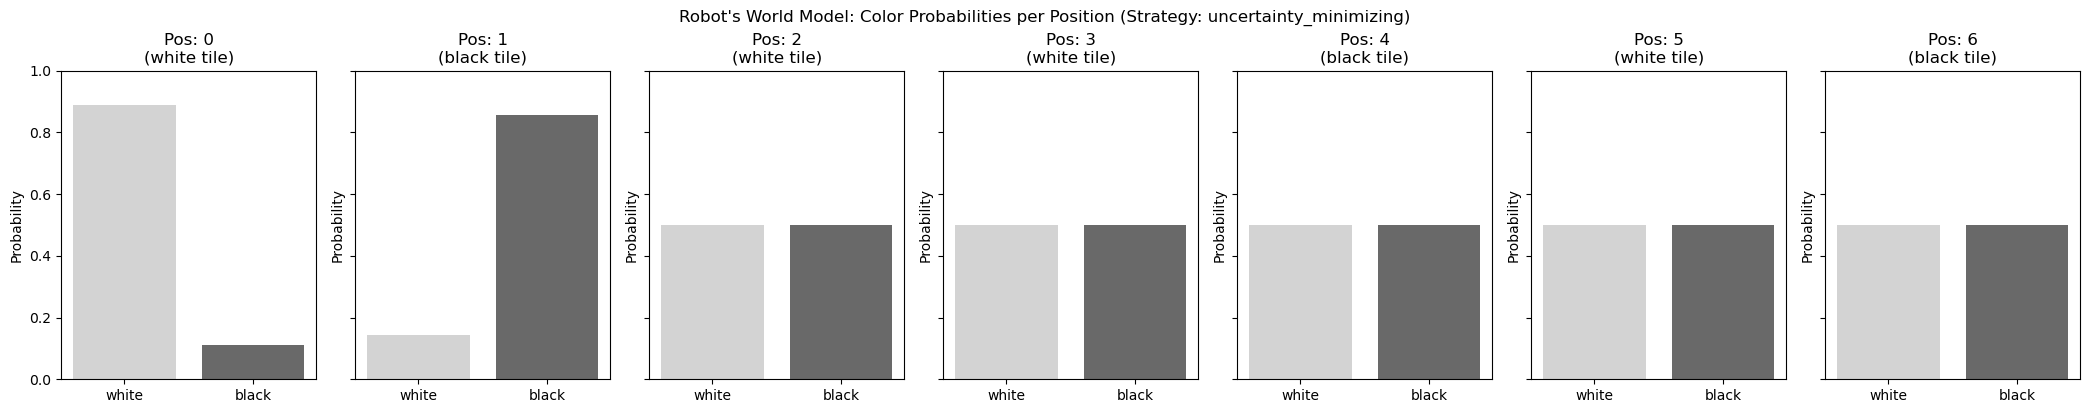

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 13/15 (Cautious) ---
Robot is at position 0, observes white tile (actual: white).


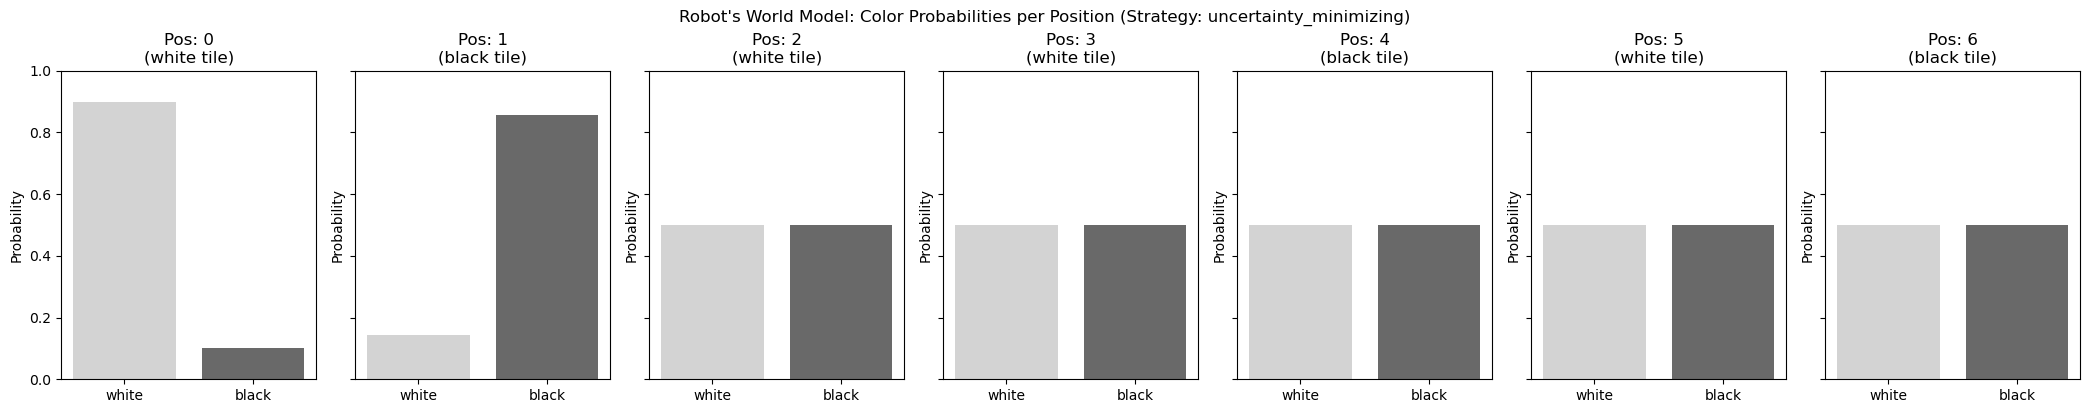

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 14/15 (Cautious) ---
Robot is at position 1, observes black tile (actual: black).


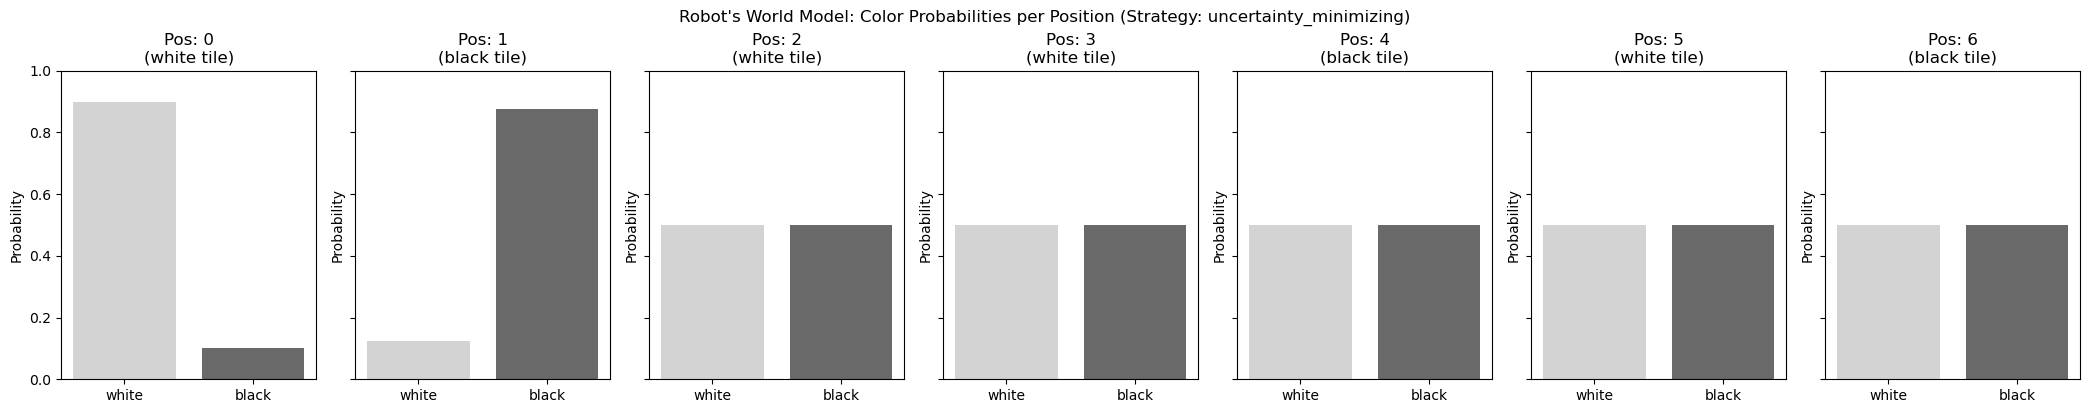

Robot intended to move left, but due to noise, moved right!
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 15/15 (Cautious) ---
Robot is at position 2, observes white tile (actual: white).


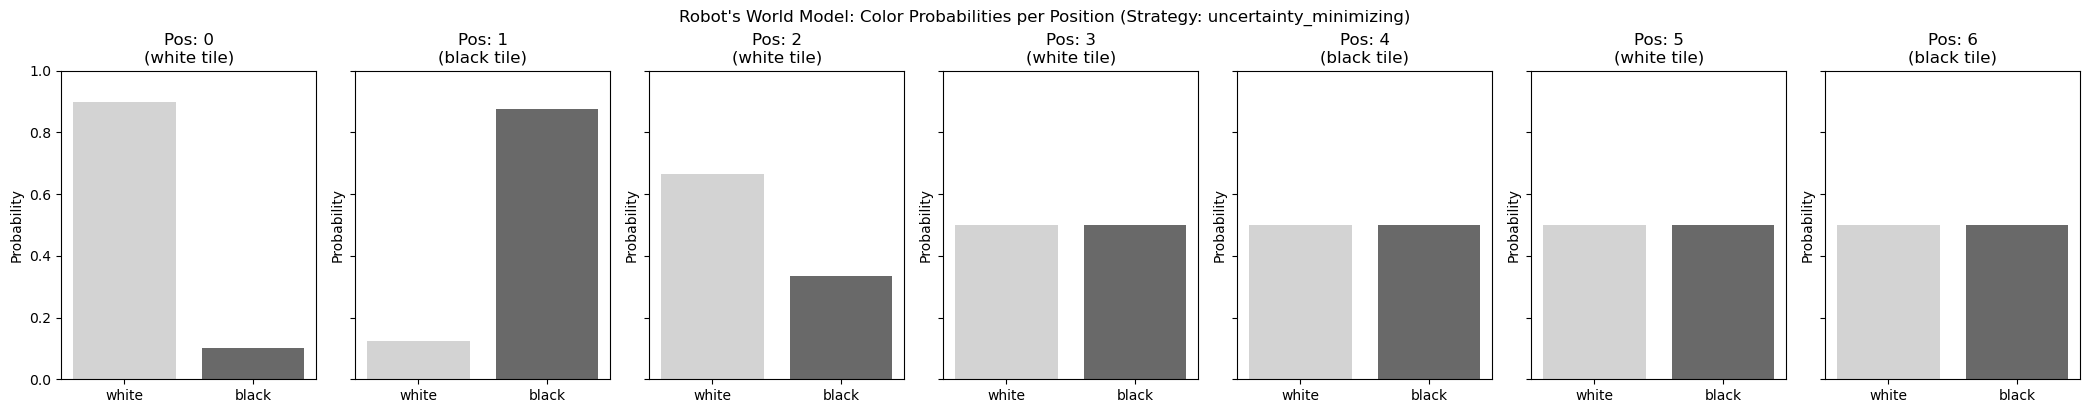

Robot intended to move left, but due to noise, moved right!
Robot moved to position 3 (a white tile).
--------------------------------------------------


--- Running Adventurous Robot ---
Robot started at position 0 on a white tile with strategy: adventurous.
--------------------------------------------------
--- Step 1/15 (Adventurous) ---
Robot is at position 0, observes white tile (actual: white).


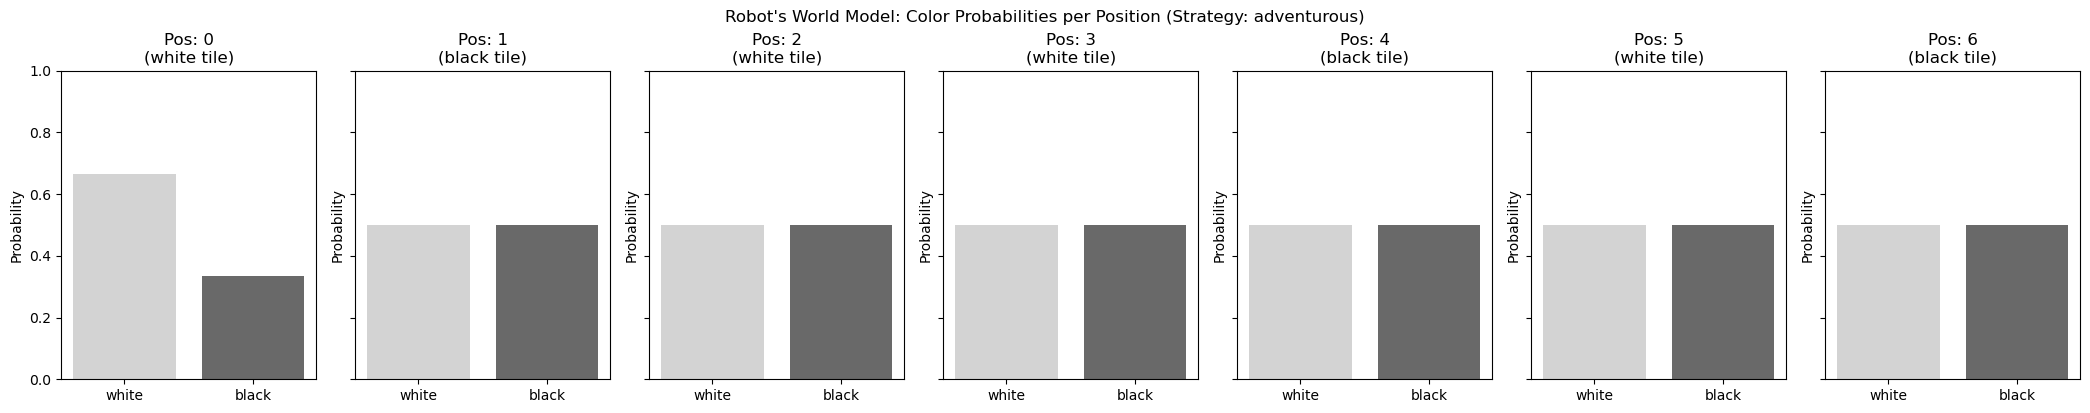

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 2/15 (Adventurous) ---
Robot is at position 1, observes black tile (actual: black).


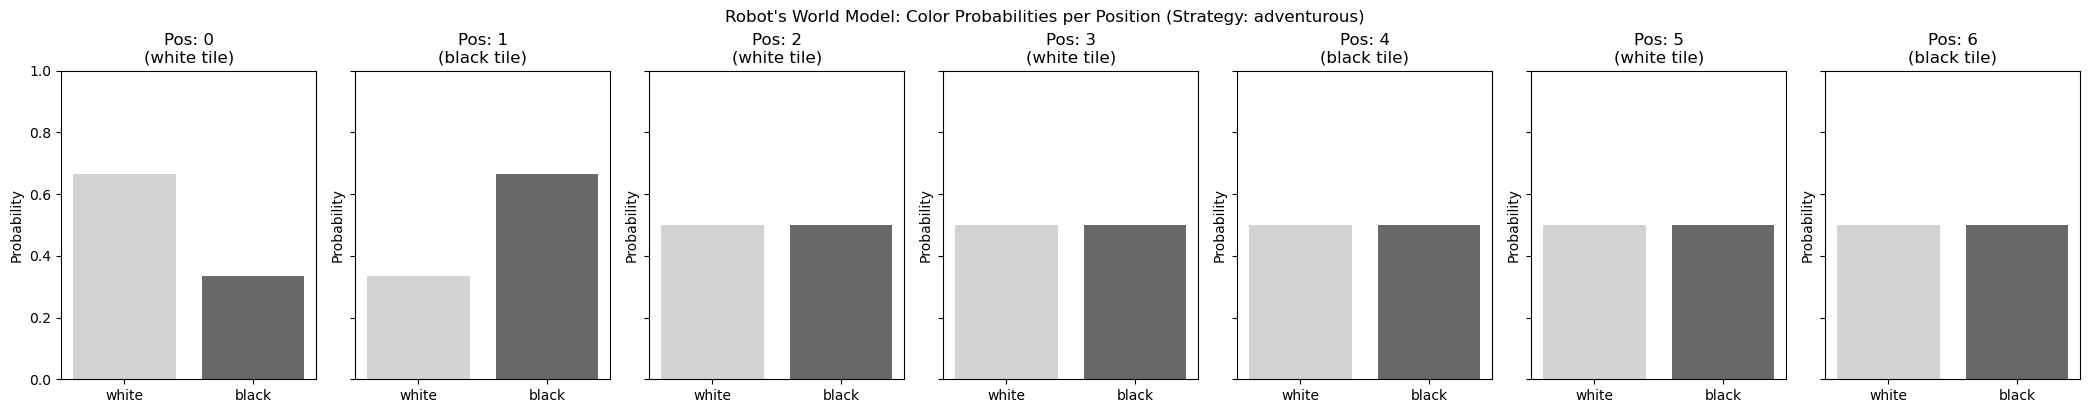

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 3/15 (Adventurous) ---
Robot is at position 2, observes white tile (actual: white).


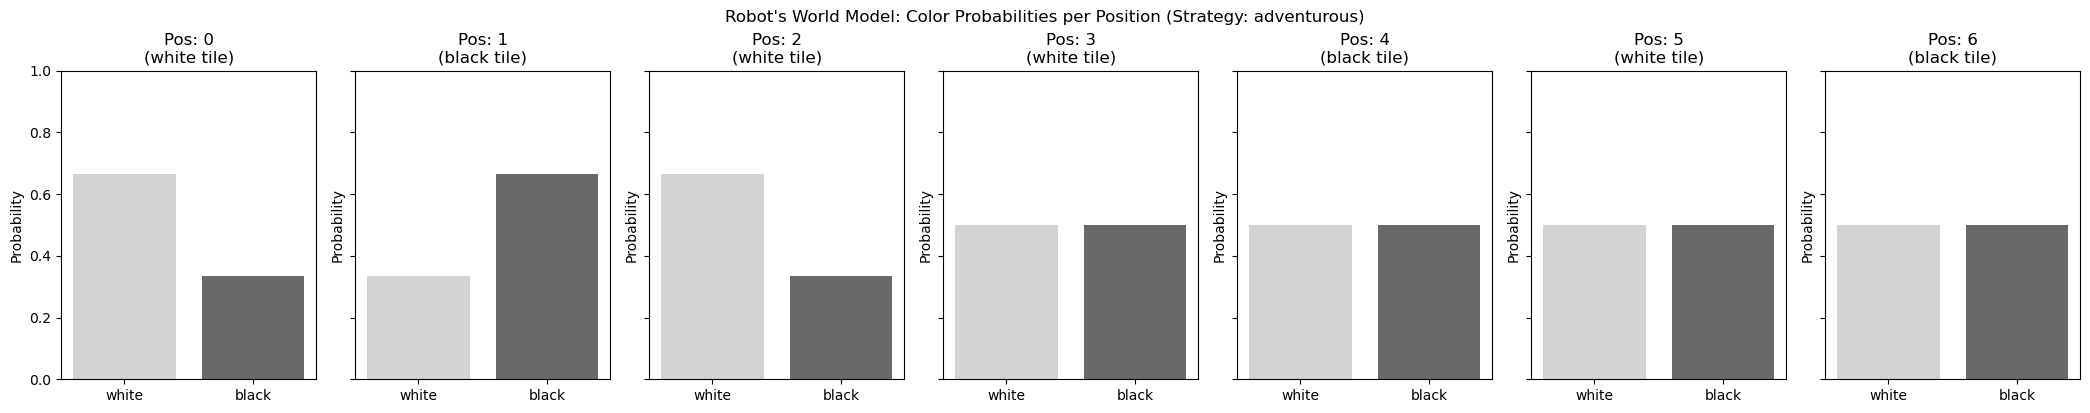

Robot intended and executed action: right
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 4/15 (Adventurous) ---
Robot is at position 3, observes white tile (actual: white).


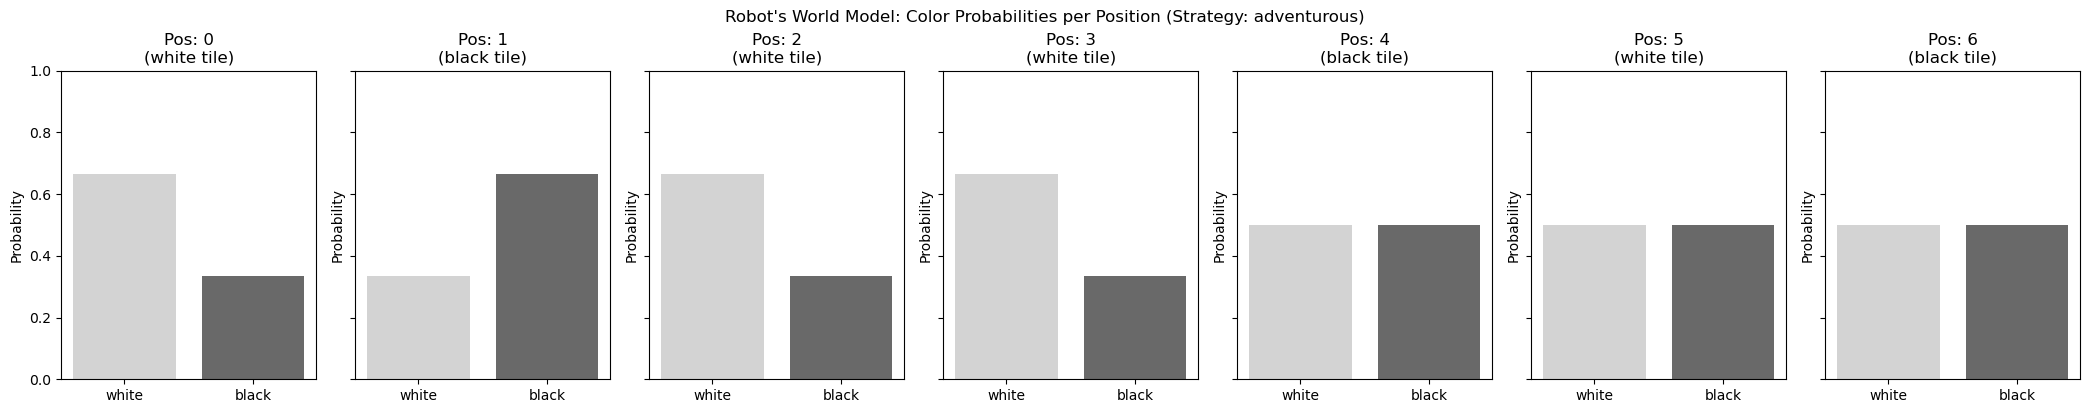

Robot intended and executed action: right
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 5/15 (Adventurous) ---
Robot is at position 4, observes black tile (actual: black).


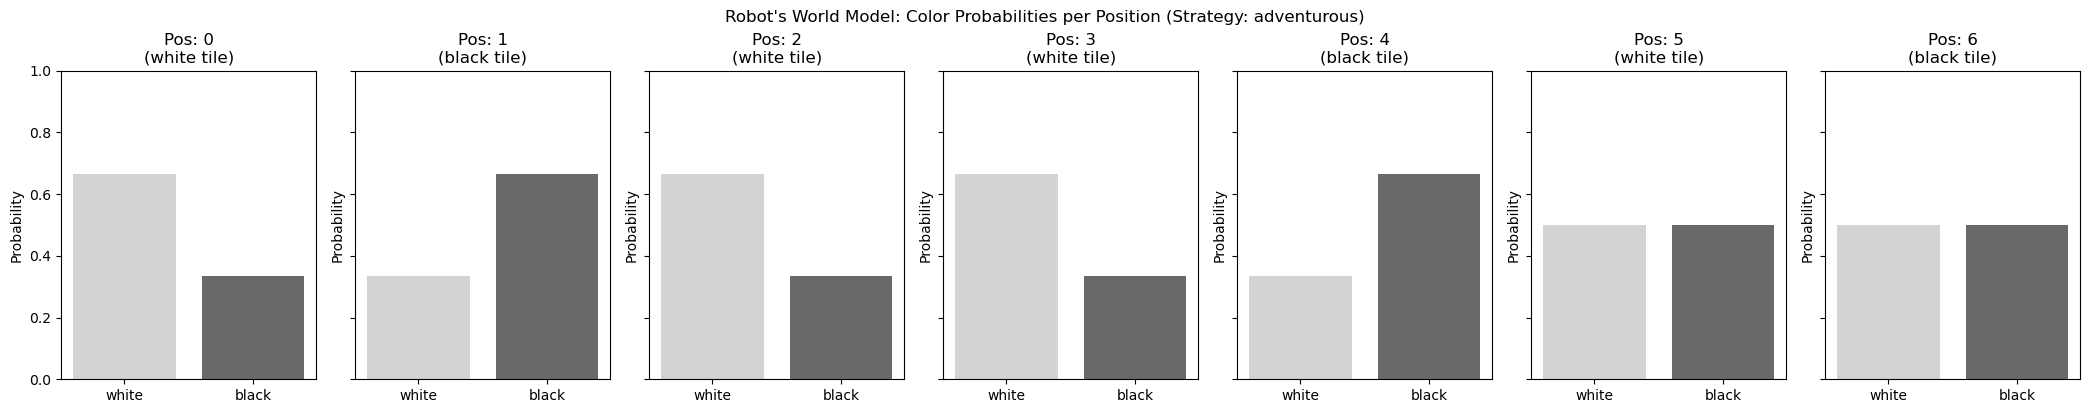

Robot intended to move right, but due to noise, moved left!
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 6/15 (Adventurous) ---
Robot is at position 3, observes white tile (actual: white).


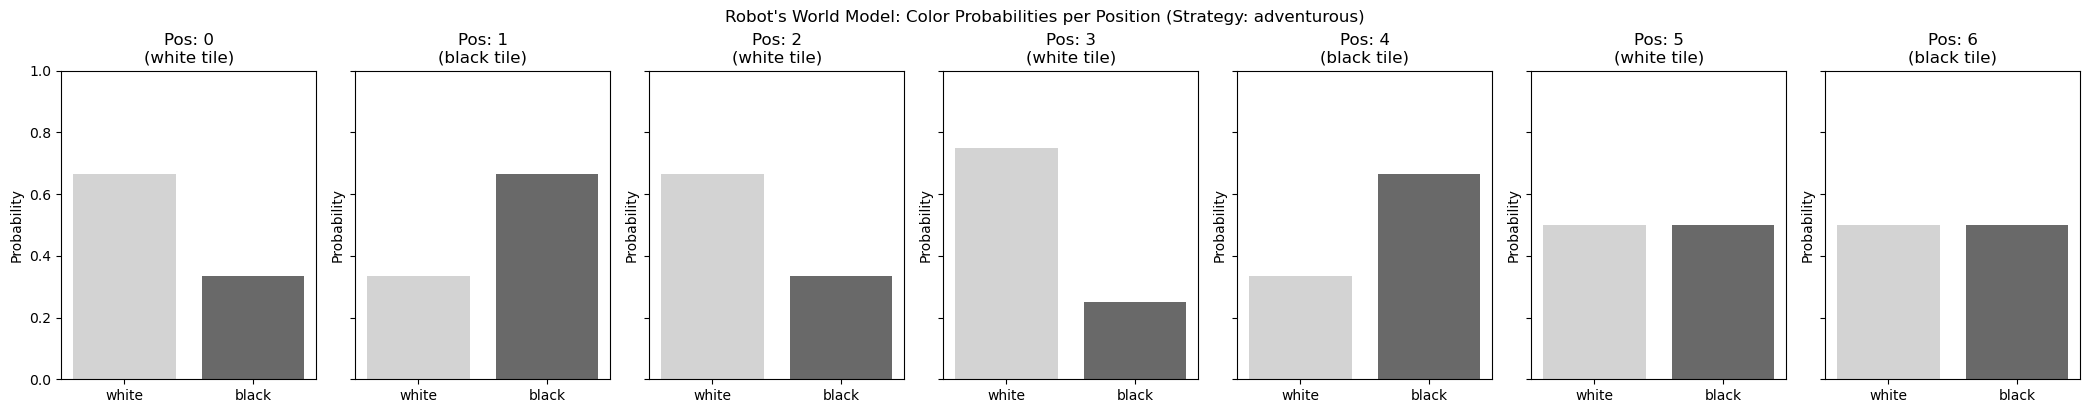

Robot intended and executed action: right
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 7/15 (Adventurous) ---
Robot is at position 4, observes black tile (actual: black).


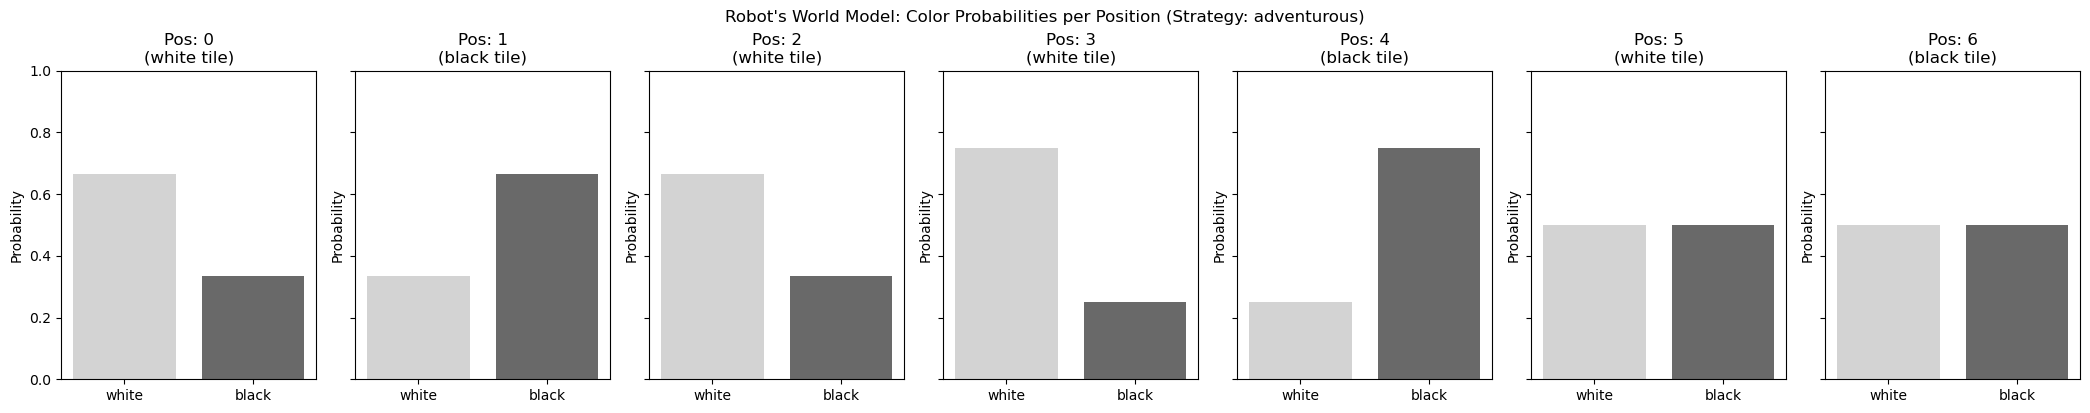

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 8/15 (Adventurous) ---
Robot is at position 5, observes white tile (actual: white).


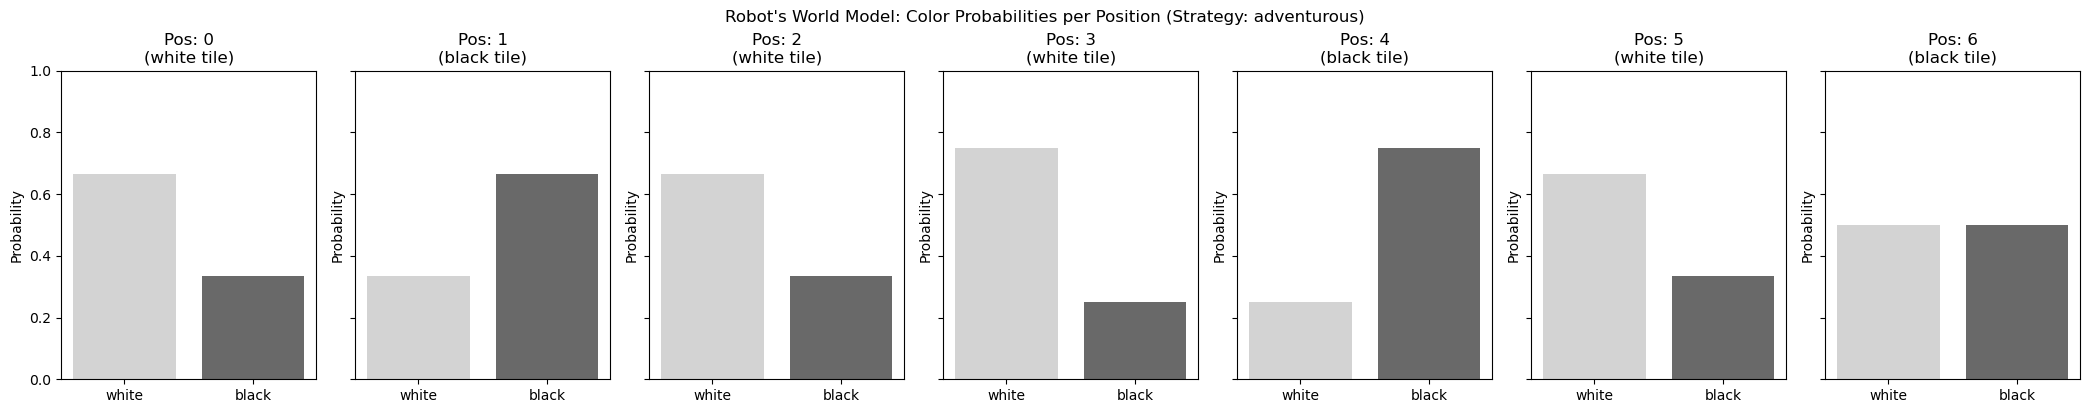

Robot intended to move right, but due to noise, moved left!
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 9/15 (Adventurous) ---
Robot is at position 4, observes white tile (actual: black).


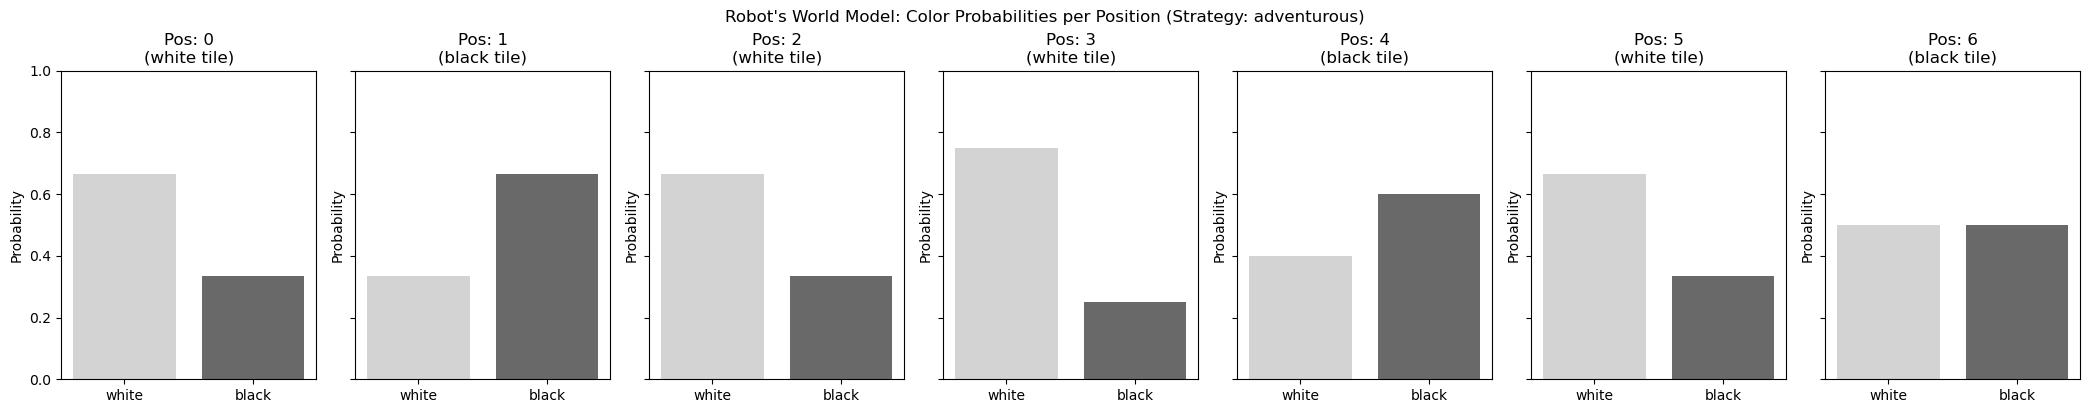

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 10/15 (Adventurous) ---
Robot is at position 5, observes white tile (actual: white).


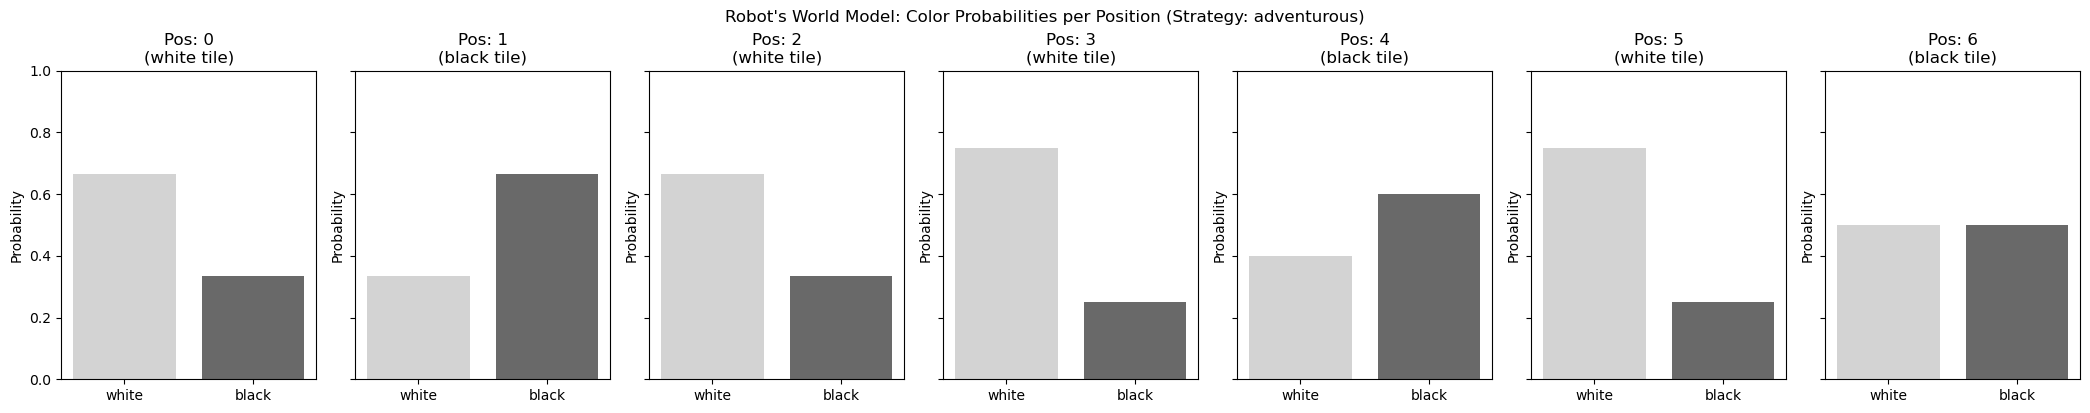

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 11/15 (Adventurous) ---
Robot is at position 6, observes white tile (actual: black).


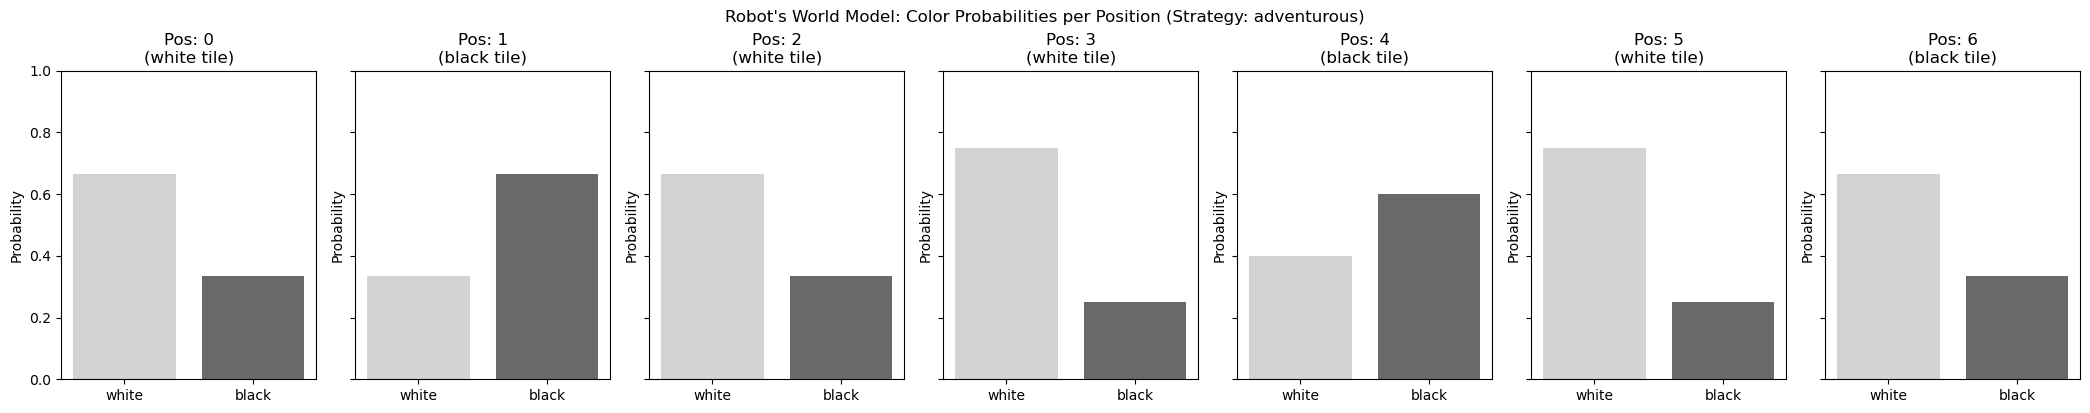

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 12/15 (Adventurous) ---
Robot is at position 5, observes white tile (actual: white).


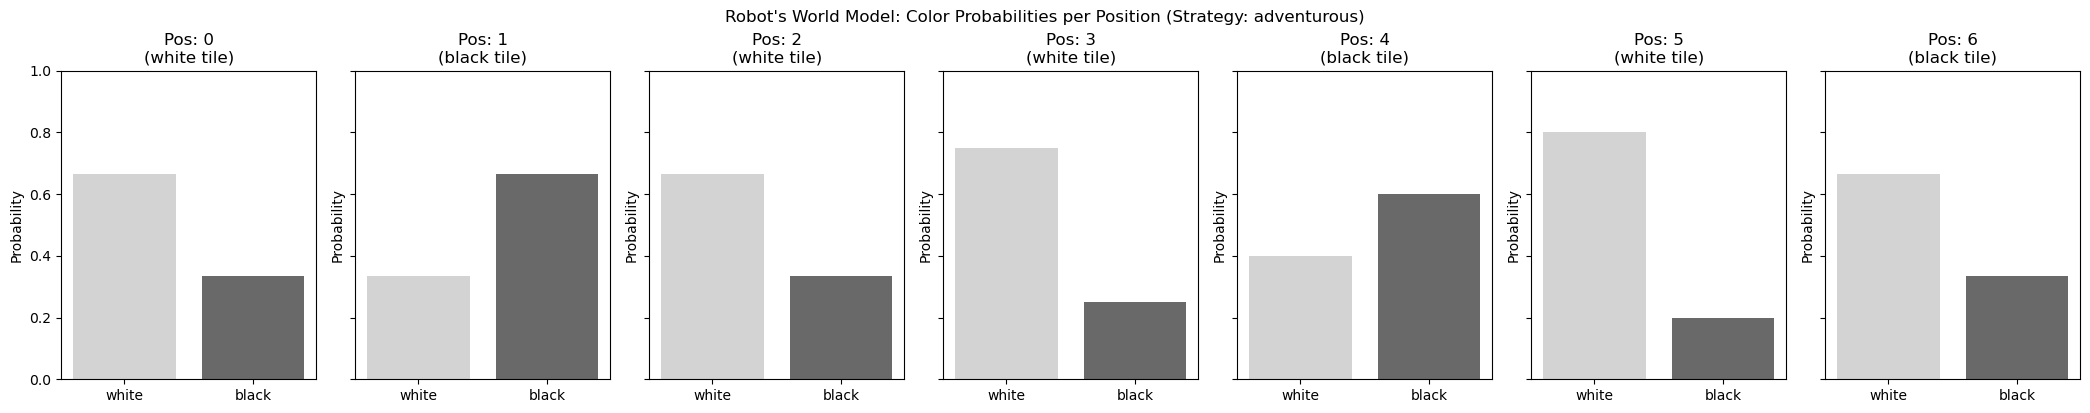

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 13/15 (Adventurous) ---
Robot is at position 6, observes black tile (actual: black).


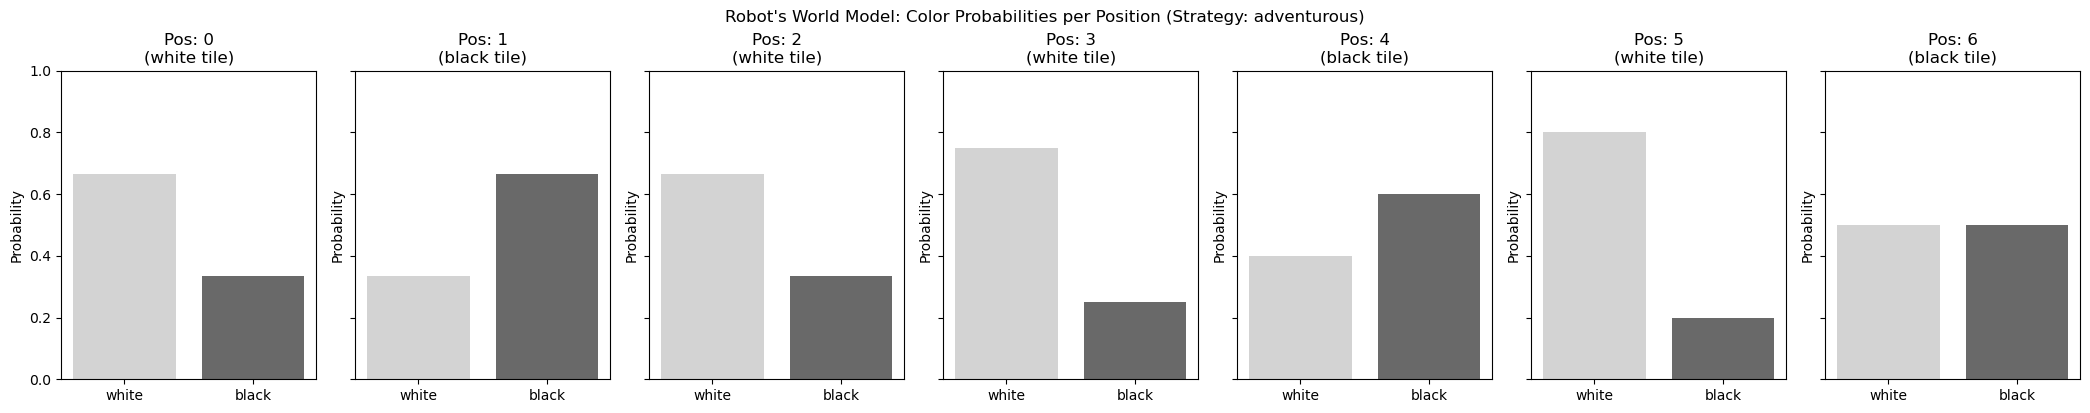

Robot intended to move left, but due to noise, moved right!
Robot moved right from position 6 but it was out of bounds. Robot stays put.
--------------------------------------------------
--- Step 14/15 (Adventurous) ---
Robot is at position 6, observes black tile (actual: black).


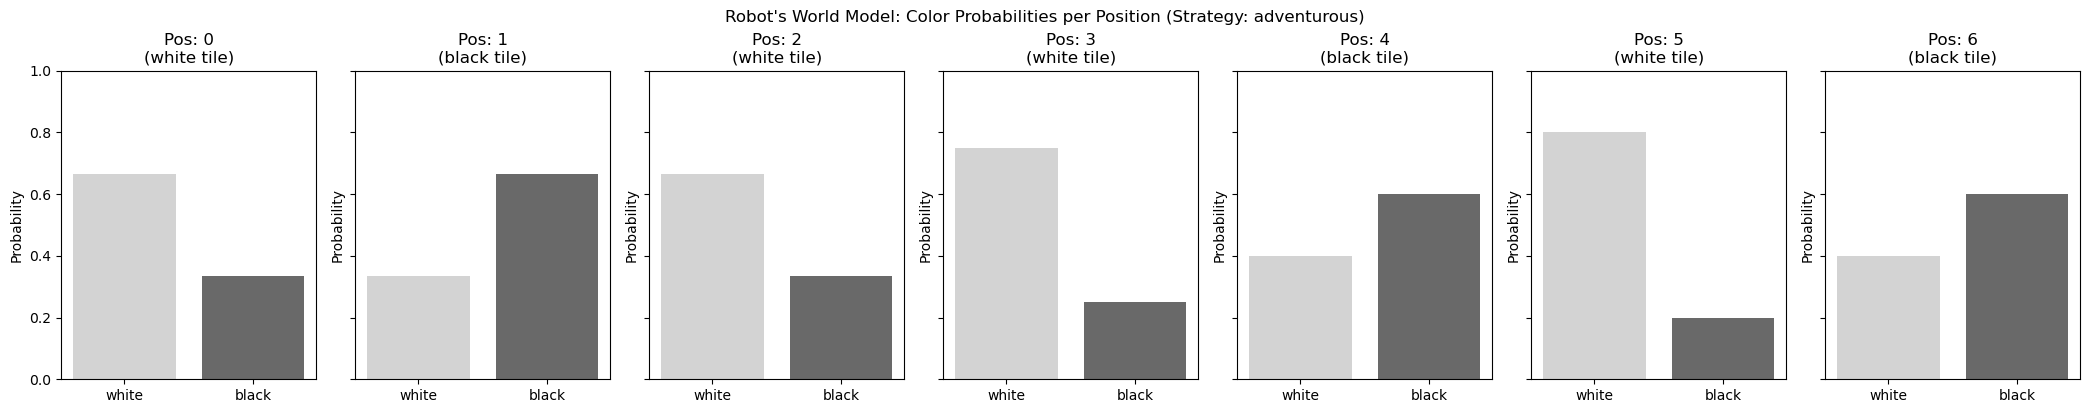

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 15/15 (Adventurous) ---
Robot is at position 5, observes white tile (actual: white).


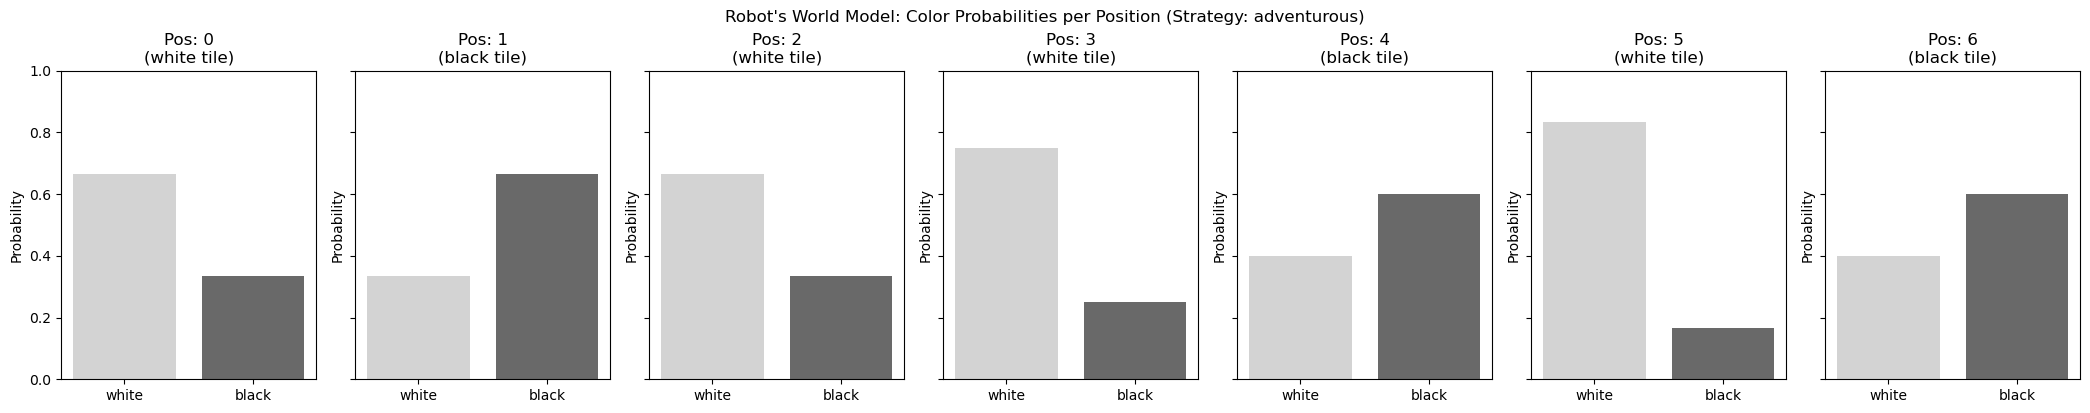

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------


In [5]:
from random import random, randint, choice
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# possible colors for tiles
TILES = ["white", "black"]
# possible actions for robot
ACTIONS = ["left", "right"]

# Define a one-dimensional world with more than two tiles
WORLD_TILES = [
    "white",
    "black",
    "white",
    "white",
    "black",
    "white",
    "black"
]
WORLD_SIZE = len(WORLD_TILES)

# Noise parameters
PERCEPTION_NOISE_PROB = 0.10 # probability of perceiving the wrong color
ACTION_NOISE_PROB = 0.10     # probability of executing the wrong action

# Line break for better readability
line_break = "-" * 50

# change this value for more (or less) steps
n_steps = 15

def get_tile_color(position):
    """Returns the color of the tile at a given position."""
    if 0 <= position < WORLD_SIZE:
        return WORLD_TILES[position]
    return None # Indicate out of bounds

class Robot:
    def __init__(self, strategy="uncertainty_minimizing"):
        self.world_model = defaultdict(lambda: defaultdict(int)) # Counts of observations per position per color
        self.position = 0 # randint(0, WORLD_SIZE - 1) # Start at 0 or random
        self.current_tile_color = get_tile_color(self.position)
        self.strategy = strategy # "uncertainty_minimizing" (cautious) or "adventurous"

        print(f"Robot started at position {self.position} on a {self.current_tile_color} tile with strategy: {self.strategy}.")
        print(line_break)

    def measure_tile_color(self):
        actual_color = get_tile_color(self.position)
        if random() < PERCEPTION_NOISE_PROB:
            # Flip the color if noise occurs
            return "black" if actual_color == "white" else "white"
        return actual_color

    def update_world_model(self, position, color):
        self.world_model[position][color] += 1

    def get_binomial_stats(self, position, target_color):
        white_count = self.world_model[position]["white"] + 1
        black_count = self.world_model[position]["black"] + 1
        n = white_count + black_count # Total observations

        p = (white_count if target_color == "white" else black_count) / n
        variance = n * p * (1 - p)
        variance_of_proportion = p * (1 - p) / n

        return p, variance_of_proportion

    def predict_next_action_position(self, action):
        if action == "left":
            next_pos = self.position - 1
            if next_pos < 0:
                return None # Out of bounds
            return next_pos
        elif action == "right":
            next_pos = self.position + 1
            if next_pos >= WORLD_SIZE:
                return None # Out of bounds
            return next_pos
        return None # Should not happen

    def calculate_delta(self, intended_action):
        delta = 0.0

        # Calculate for intended direction (0.9 probability)
        intended_next_pos = self.predict_next_action_position(intended_action)
        if intended_next_pos is not None:
            p_white, variance_p = self.get_binomial_stats(intended_next_pos, "white")
            p_black = 1 - p_white
            # Contribution from intended direction
            delta += 0.9 * variance_p * (2 * p_white * p_black)
        else:
            pass # No contribution if invalid, as it won't be chosen

        # Calculate for opposite direction (with noise)
        opposite_action = "right" if intended_action == "left" else "left"
        opposite_next_pos = self.predict_next_action_position(opposite_action)
        if opposite_next_pos is not None:
            p_white, variance_p = self.get_binomial_stats(opposite_next_pos, "white")
            p_black = 1 - p_white
            # Contribution from opposite direction
            delta += 0.1 * variance_p * (2 * p_white * p_black)
        else:
            pass # No contribution if invalid

        return delta

    def choose_action(self):
        action_deltas = {}
        valid_actions = []

        for action in ACTIONS:
            predicted_next_position = self.predict_next_action_position(action)

            # Only consider actions that lead to a valid, different position
            if predicted_next_position is not None and predicted_next_position != self.position:
                valid_actions.append(action)
                action_deltas[action] = self.calculate_delta(action)

        if not valid_actions:
            print("Warning: Robot is stuck! No valid moves to a different tile.")
            return None # Indicate no valid action can be taken - should not happen

        best_action = None
        if self.strategy == "uncertainty_minimizing": # cautious
            best_delta = float('inf')
            for action in valid_actions:
                if action_deltas[action] < best_delta:
                    best_delta = action_deltas[action]
                    best_action = action
                elif action_deltas[action] == best_delta:
                    # If tied, pick randomly (to encourage exploration if multiple equally good)
                    if random() < 0.5: # 50% chance to switch to new best if tie
                        best_action = action
        else:
            best_delta = float('-inf')
            for action in valid_actions:
                if action_deltas[action] > best_delta:
                    best_delta = action_deltas[action]
                    best_action = action
                elif action_deltas[action] == best_delta:
                    if random() < 0.5:
                        best_action = action

        return best_action

    def show_world_model_histograms(self):
        num_positions = WORLD_SIZE
        fig, axs = plt.subplots(1, num_positions, figsize=(num_positions * 3, 4), sharey=True)


        for i in range(num_positions):
            p_white, _ = self.get_binomial_stats(i, "white")
            p_black = 1 - p_white

            colors = TILES
            probabilities = [p_white, p_black]

            axs[i].bar(colors, probabilities, color=["lightgray", "dimgray"])
            axs[i].set_title(f'Pos: {i}\n({WORLD_TILES[i]} tile)') # Show actual tile color
            axs[i].set_ylim(0, 1)
            axs[i].set_ylabel('Probability')

        plt.tight_layout()
        plt.suptitle(f"Robot's World Model: Color Probabilities per Position (Strategy: {self.strategy})", y=1.02)
        plt.show()

    def step(self):
        # Measure current tile color (with perception noise)
        observed_color = self.measure_tile_color()
        print(f"Robot is at position {self.position}, observes {observed_color} tile (actual: {get_tile_color(self.position)}).")

        # Update world model with the observation
        self.update_world_model(self.position, observed_color)

        # Visualize the current state of the world model
        self.show_world_model_histograms()

        # Choose next action based on strategy
        chosen_action = self.choose_action()

        if chosen_action is None:
            print("Robot could not choose a valid action and is stuck.")
            print(line_break)
            return # End step if stuck

        # Execute action (with noise)
        executed_action = chosen_action
        if random() < ACTION_NOISE_PROB:
            executed_action = "right" if chosen_action == "left" else "left"
            print(f"Robot intended to move {chosen_action}, but due to noise, moved {executed_action}!")
        else:
            print(f"Robot intended and executed action: {chosen_action}")


        # Predict the actual next position based on executed action
        next_position = self.predict_next_action_position(executed_action)

        if next_position is None:
            print(f"Robot moved {executed_action} from position {self.position} but it was out of bounds. Robot stays put.")
            pass # Robot does not move if the noisy action takes it out of bounds
        else:
            # Update position
            self.position = next_position
            self.current_tile_color = get_tile_color(self.position) # Update current tile color after move
            print(f"Robot moved to position {self.position} (a {self.current_tile_color} tile).")
        print(line_break)


print("--- Running Uncertainty Minimizing (Cautious) Robot ---")
robot_cautious = Robot(strategy="uncertainty_minimizing")
for step_num in range(n_steps):
    print(f"--- Step {step_num + 1}/{n_steps} (Cautious) ---")
    robot_cautious.step()
    if robot_cautious.position is None and step_num < n_steps -1: # Break if robot got stuck early
        break

print("\n" + "="*80 + "\n")

print("--- Running Adventurous Robot ---")
robot_adventurous = Robot(strategy="adventurous")
for step_num in range(n_steps):
    print(f"--- Step {step_num + 1}/{n_steps} (Adventurous) ---")
    robot_adventurous.step()
    if robot_adventurous.position is None and step_num < n_steps -1: # Break if robot got stuck early
        break

for c)
Beta Distribution is better



--- Running Uncertainty Minimizing Robot with 0% Noise ---
Robot started at position 5 on a white tile.
Strategy: uncertainty_minimizing, Initial Beta: 1/1
--------------------------------------------------
--- Step 1/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


<>:171: SyntaxWarning: invalid escape sequence '\m'
<>:171: SyntaxWarning: invalid escape sequence '\s'
<>:171: SyntaxWarning: invalid escape sequence '\m'
<>:171: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1024423/3515146234.py:171: SyntaxWarning: invalid escape sequence '\m'
  axs[i].set_title(f'Pos: {i}\n({WORLD_TILES[i]} tile)\n$\mu={mu:.2f}, \sigma^2={sigma2:.3f}$')
/tmp/ipykernel_1024423/3515146234.py:171: SyntaxWarning: invalid escape sequence '\s'
  axs[i].set_title(f'Pos: {i}\n({WORLD_TILES[i]} tile)\n$\mu={mu:.2f}, \sigma^2={sigma2:.3f}$')


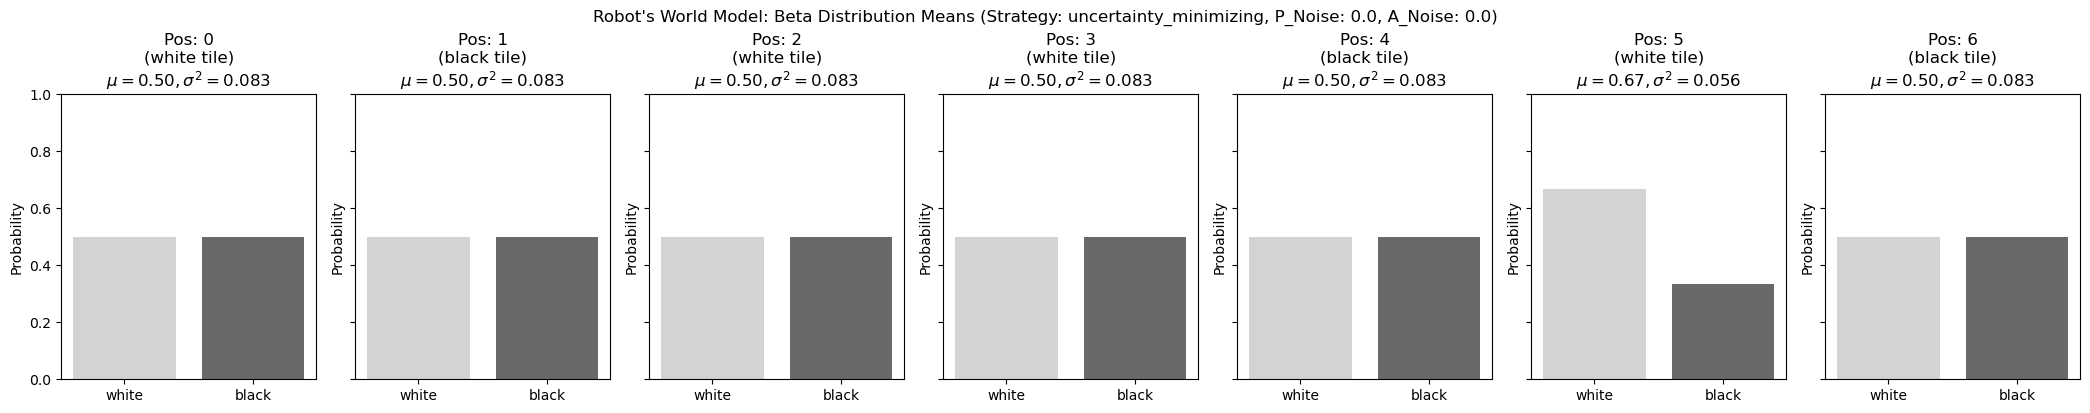

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 2/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


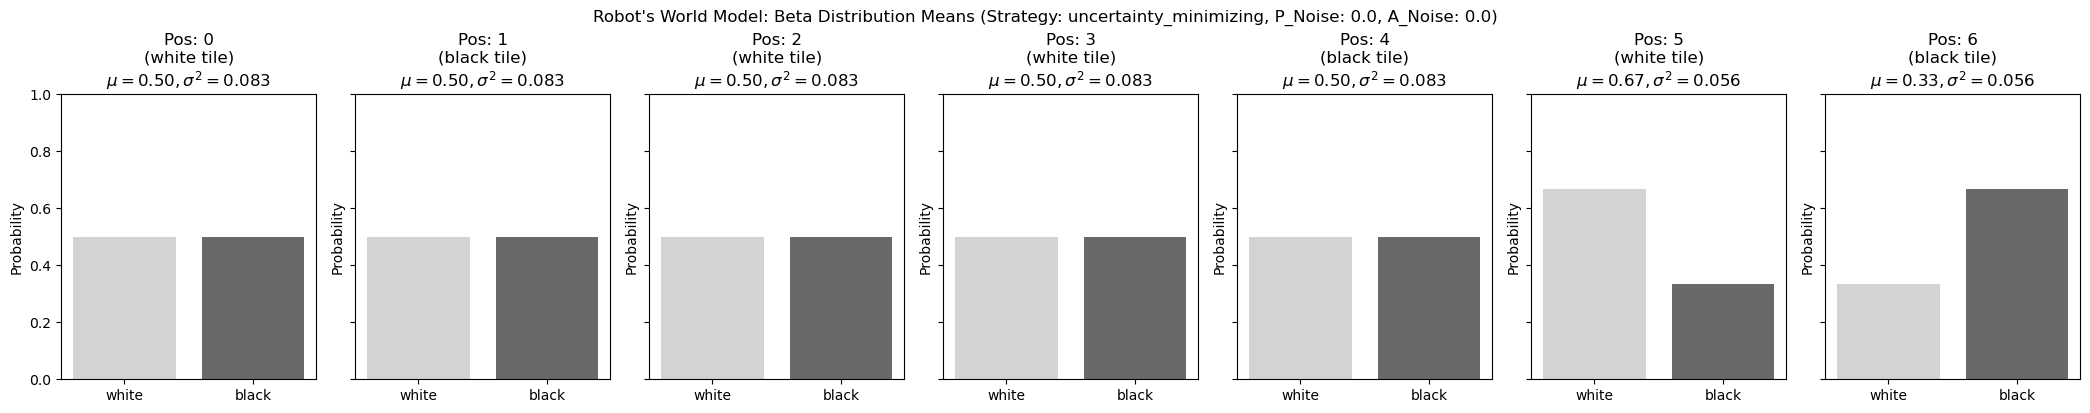

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 3/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


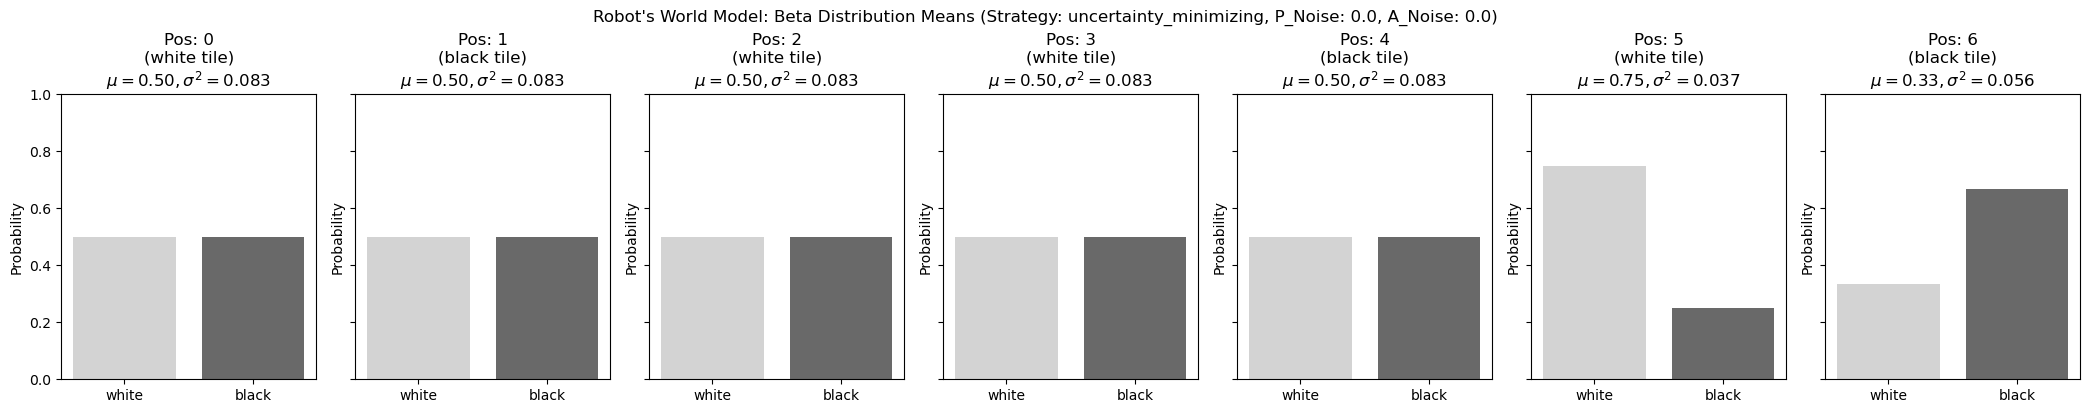

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 4/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


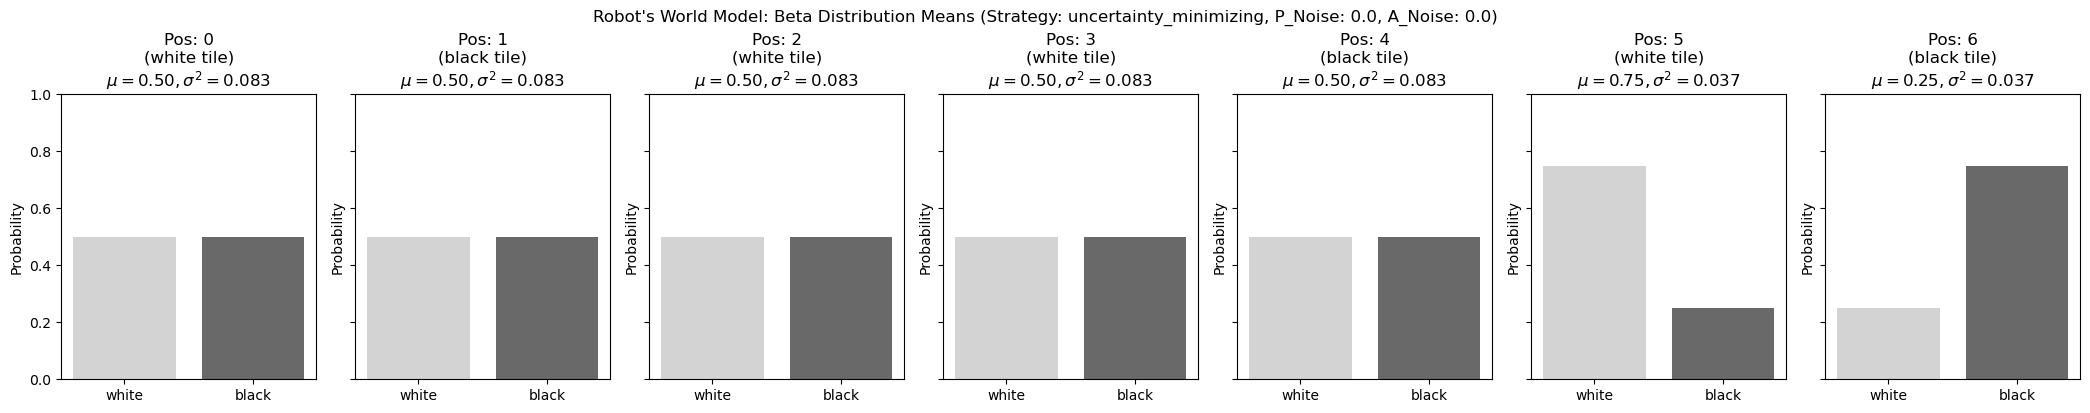

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 5/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


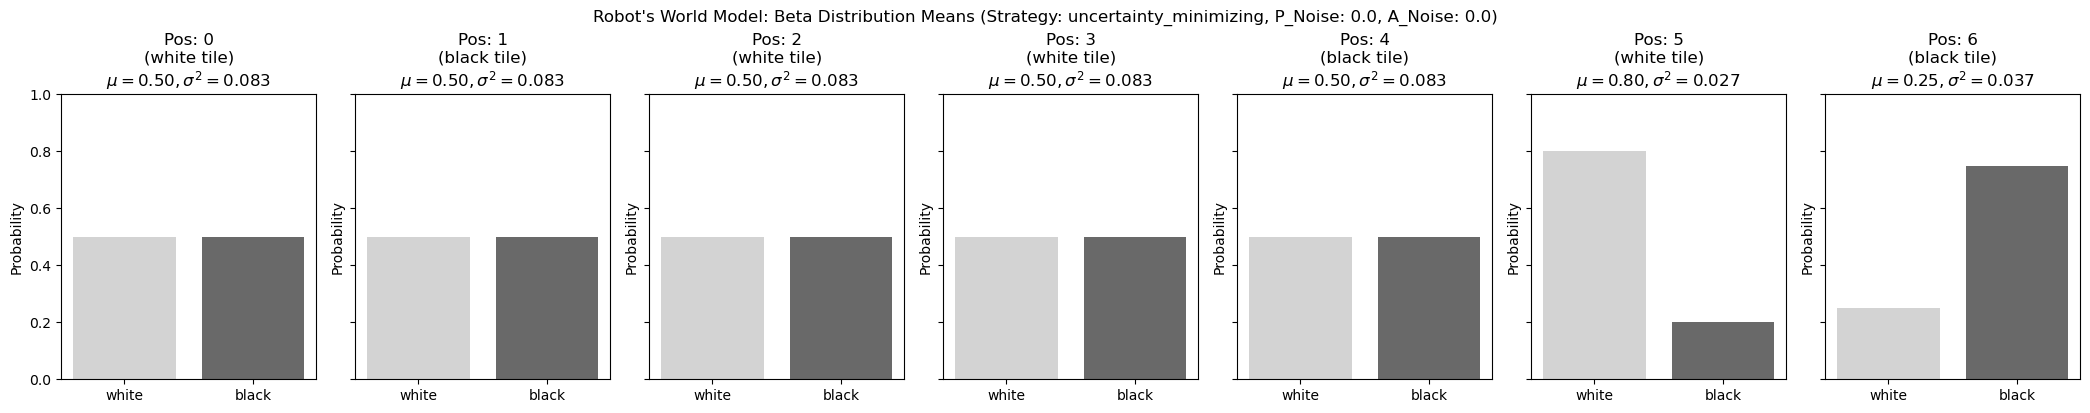

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 6/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


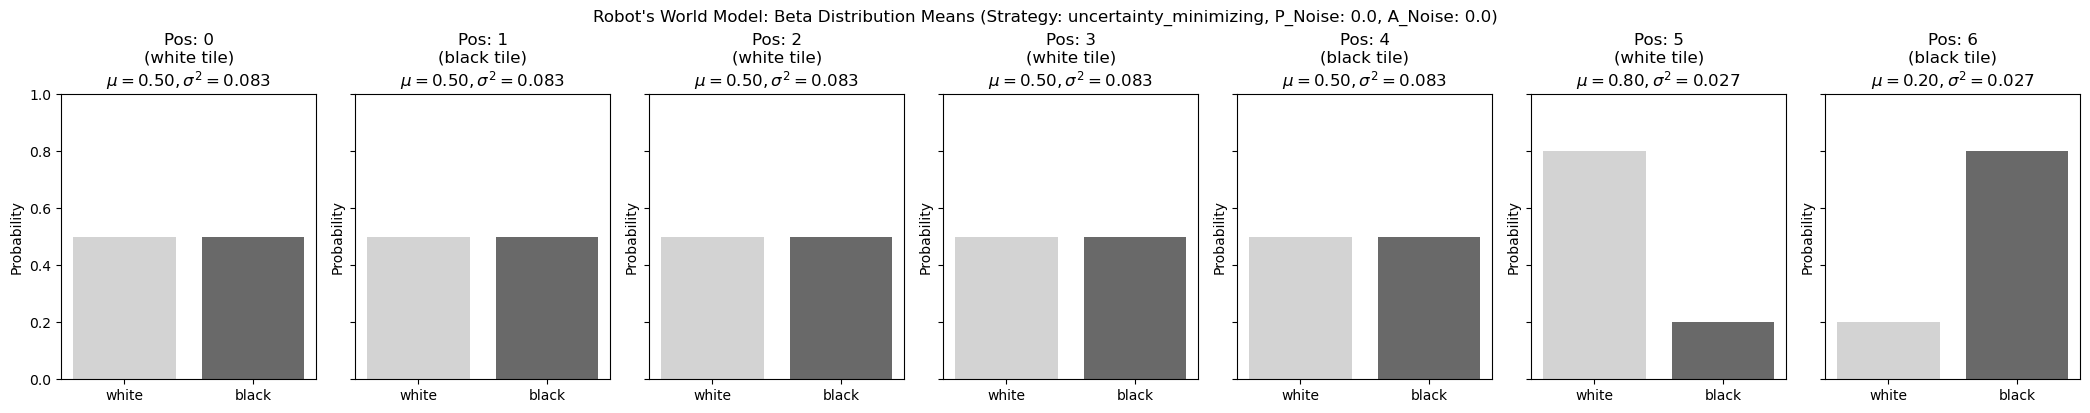

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 7/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


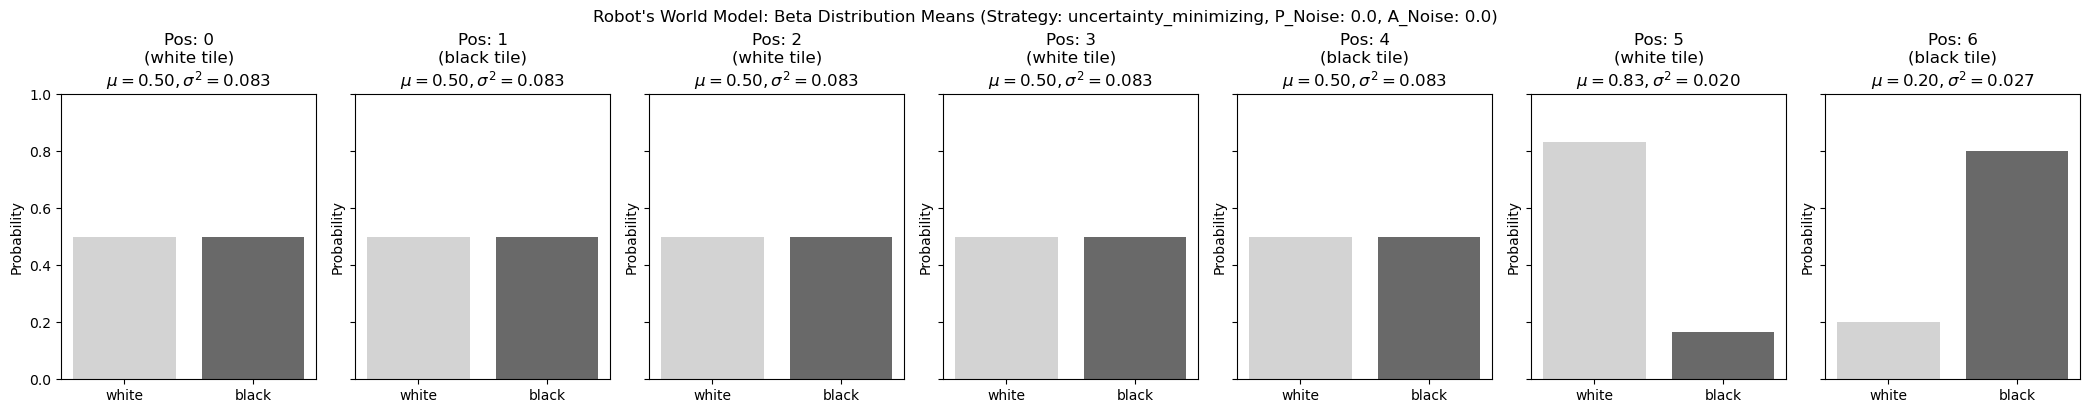

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 8/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


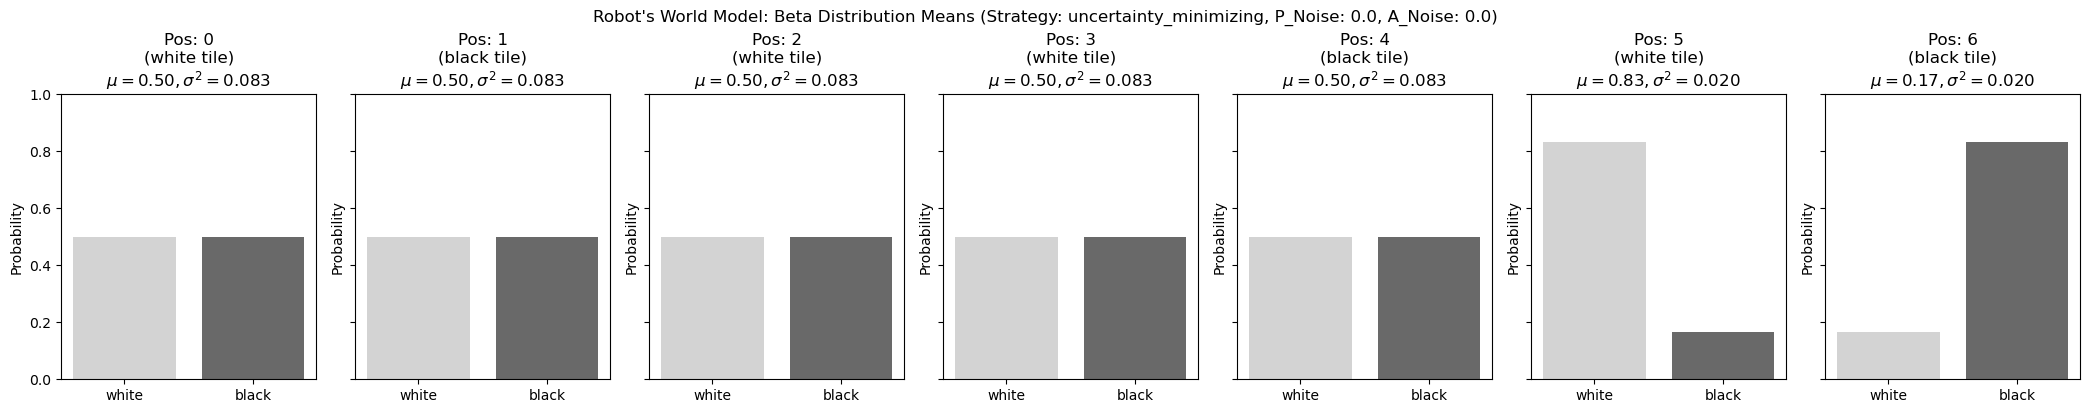

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 9/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


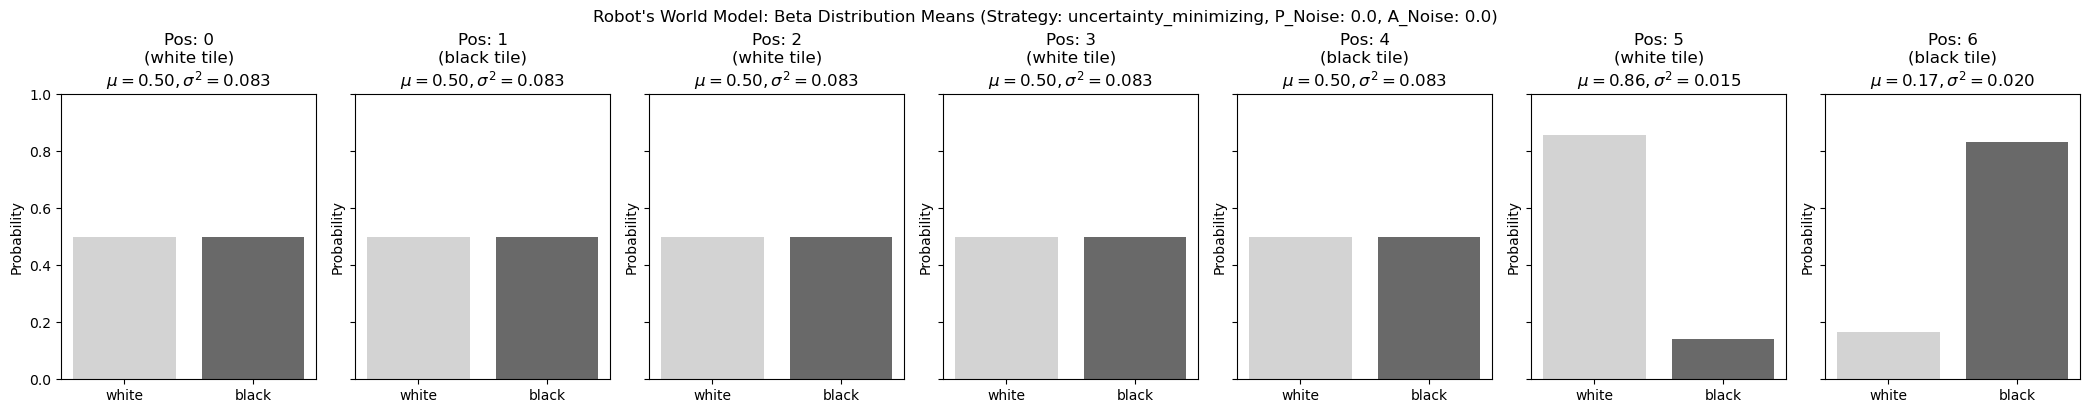

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 10/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


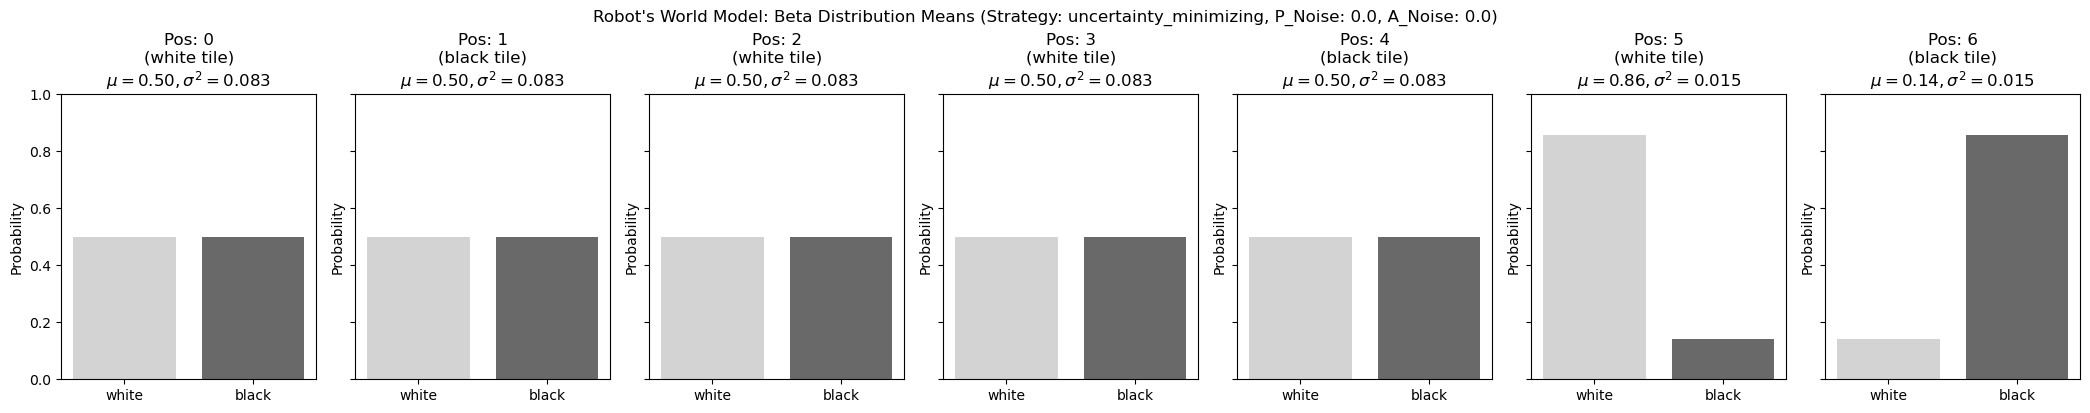

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 11/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


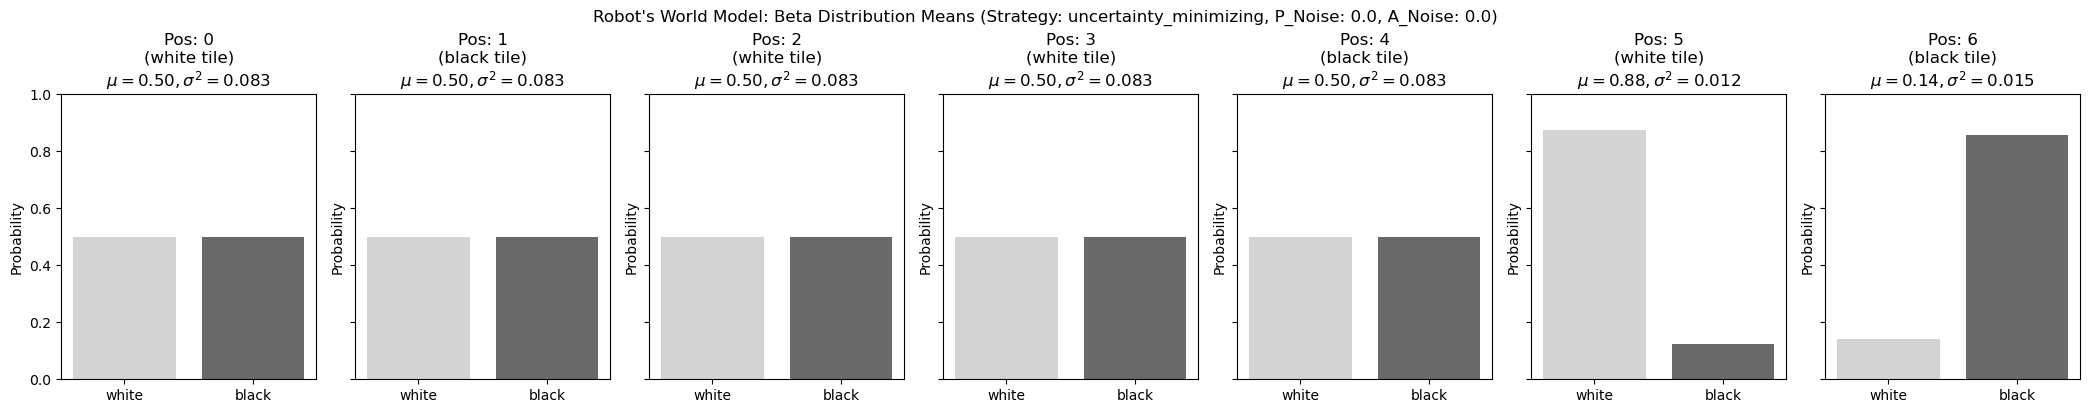

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 12/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


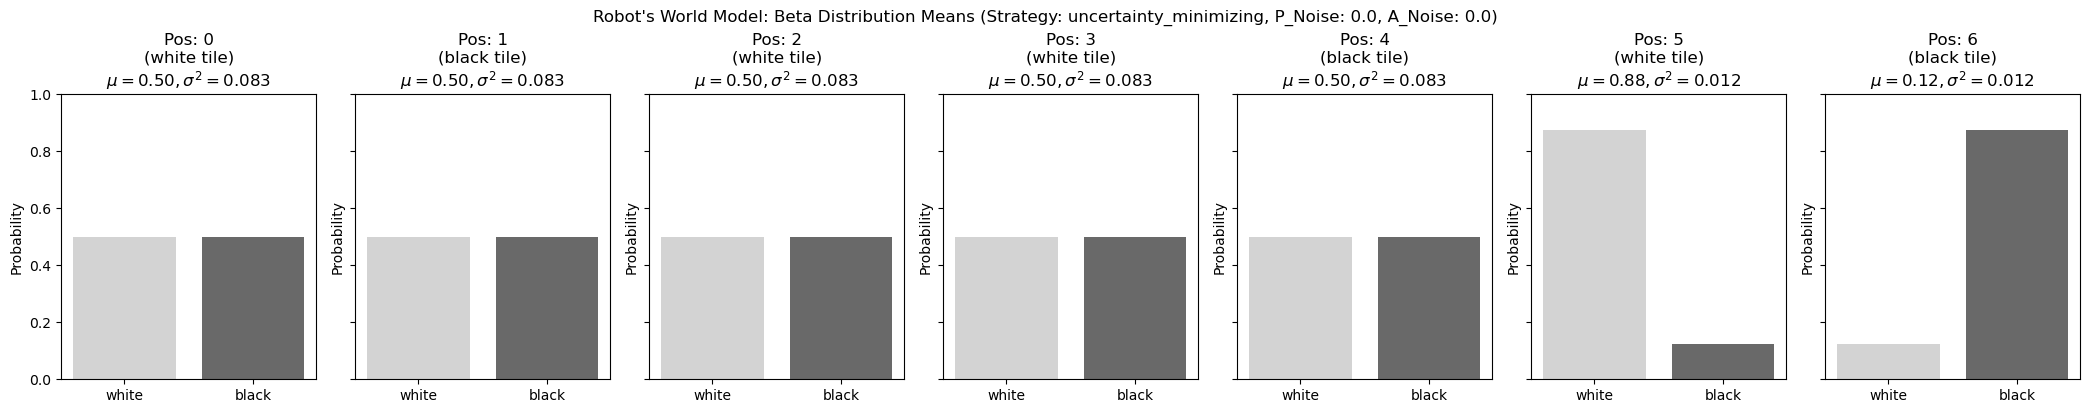

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 13/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


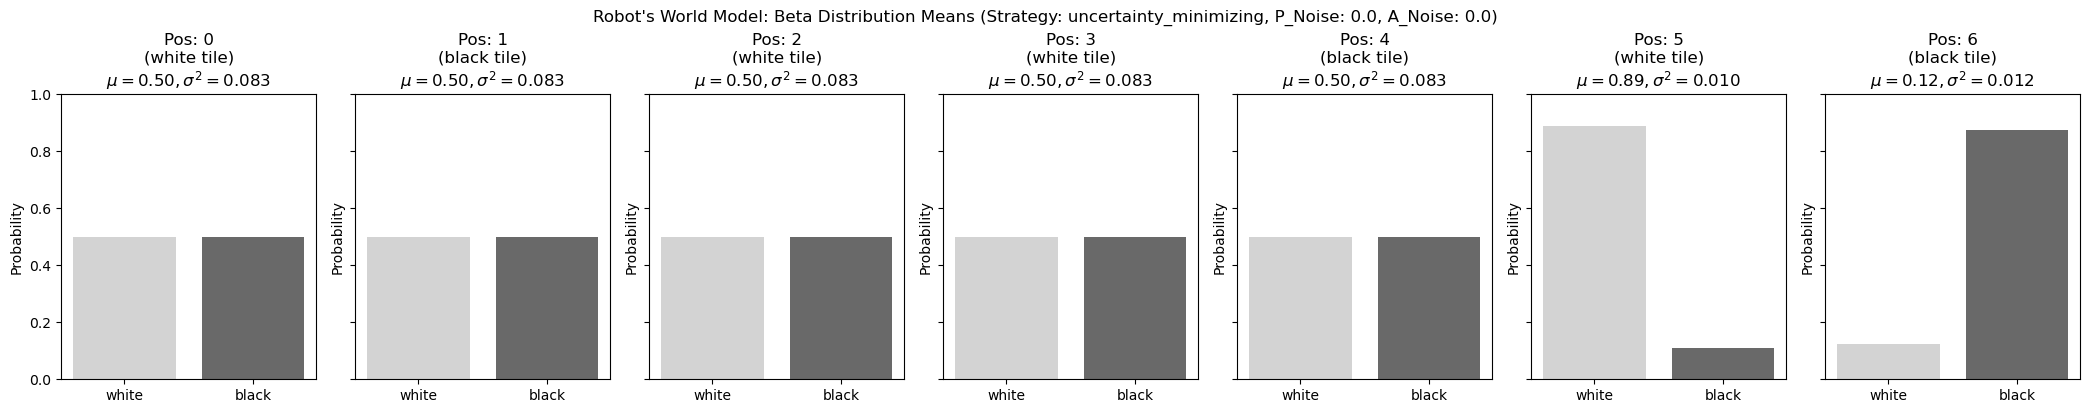

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 14/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


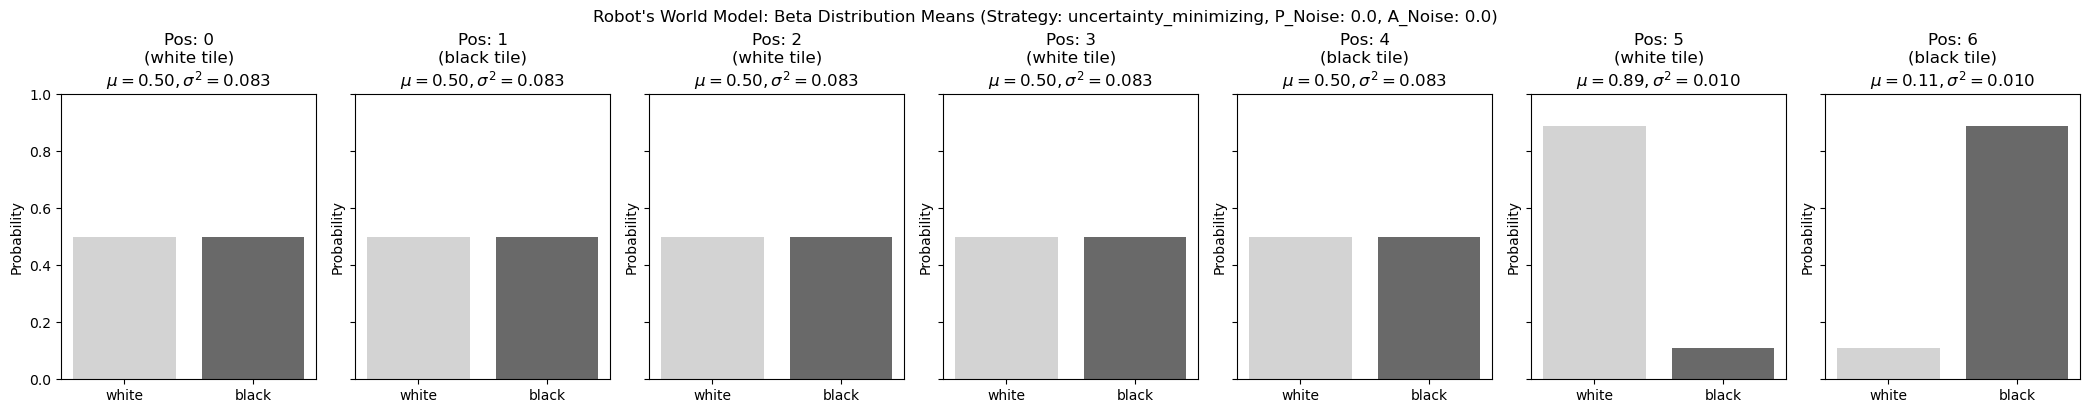

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 15/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


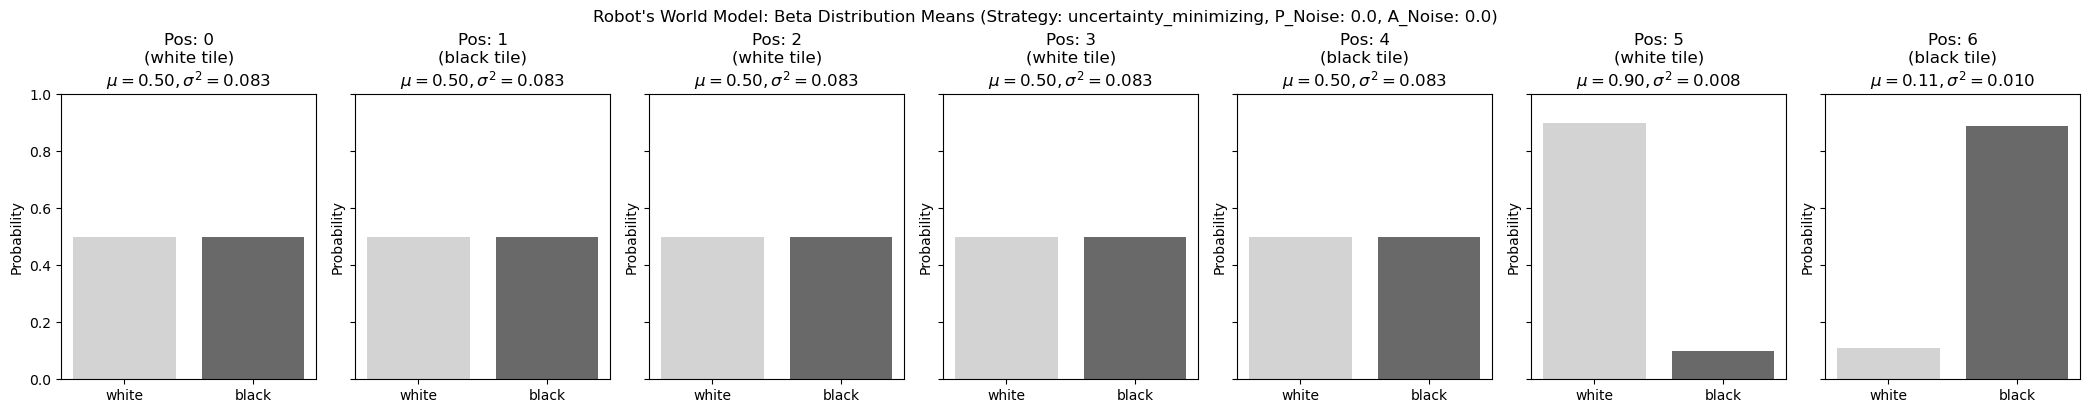

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 16/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


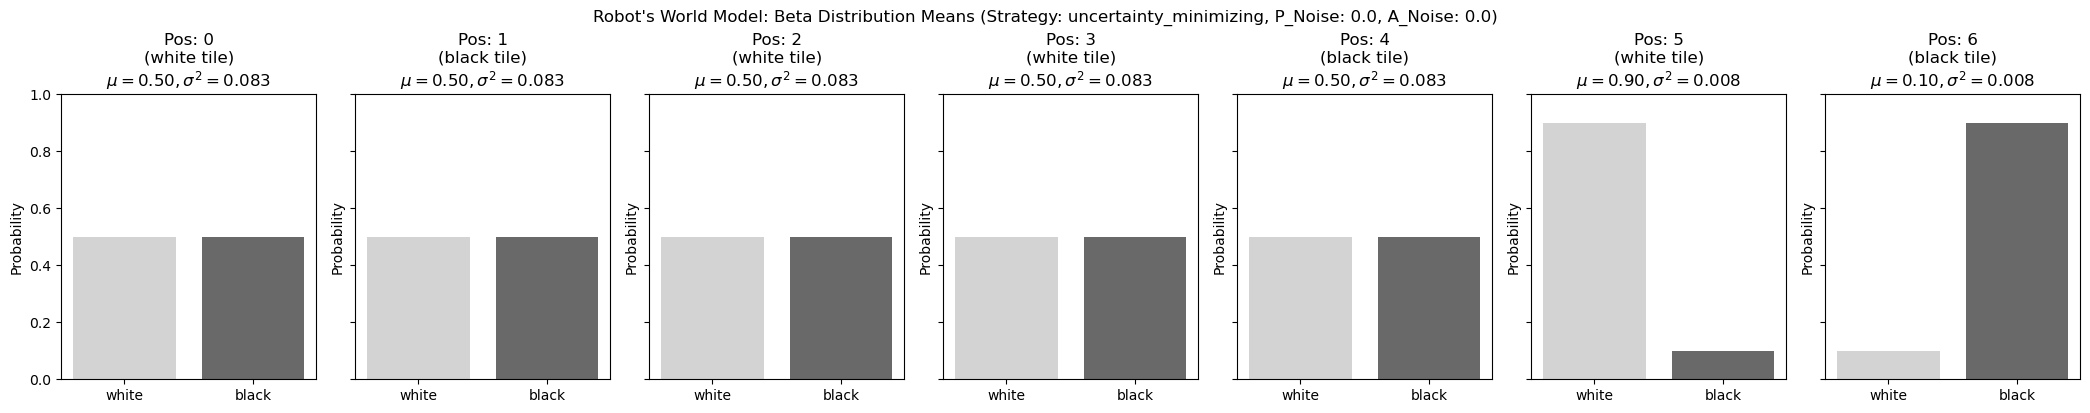

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 17/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


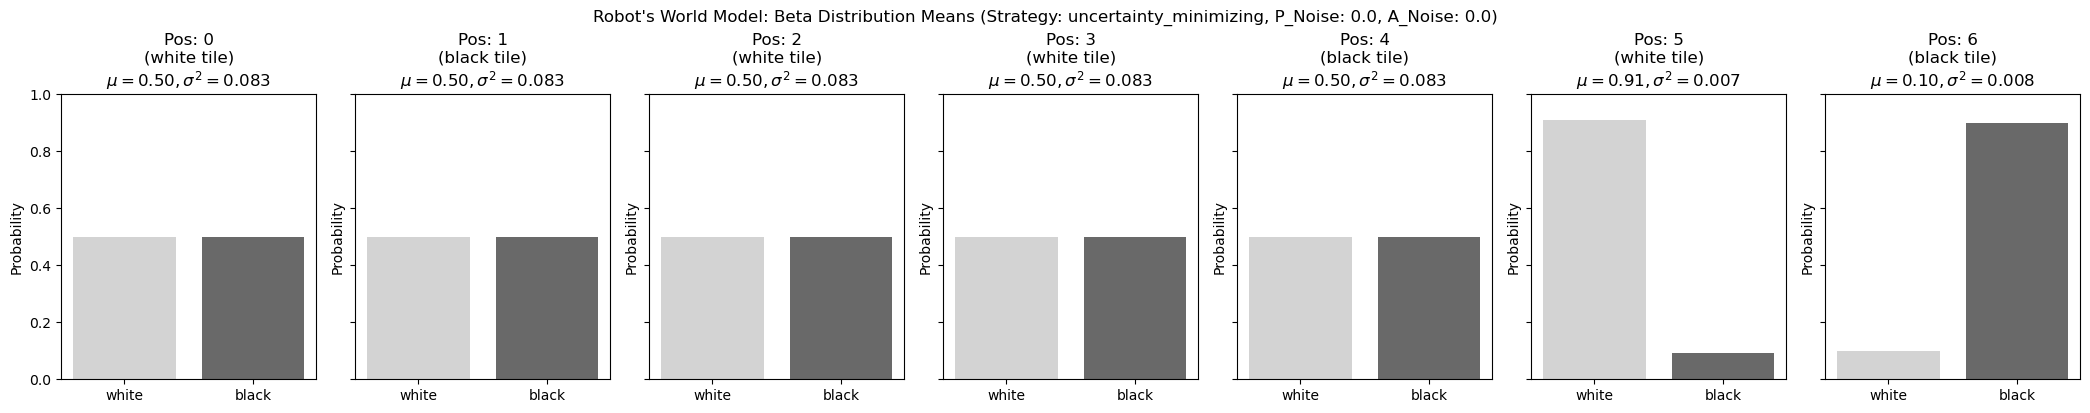

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 18/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


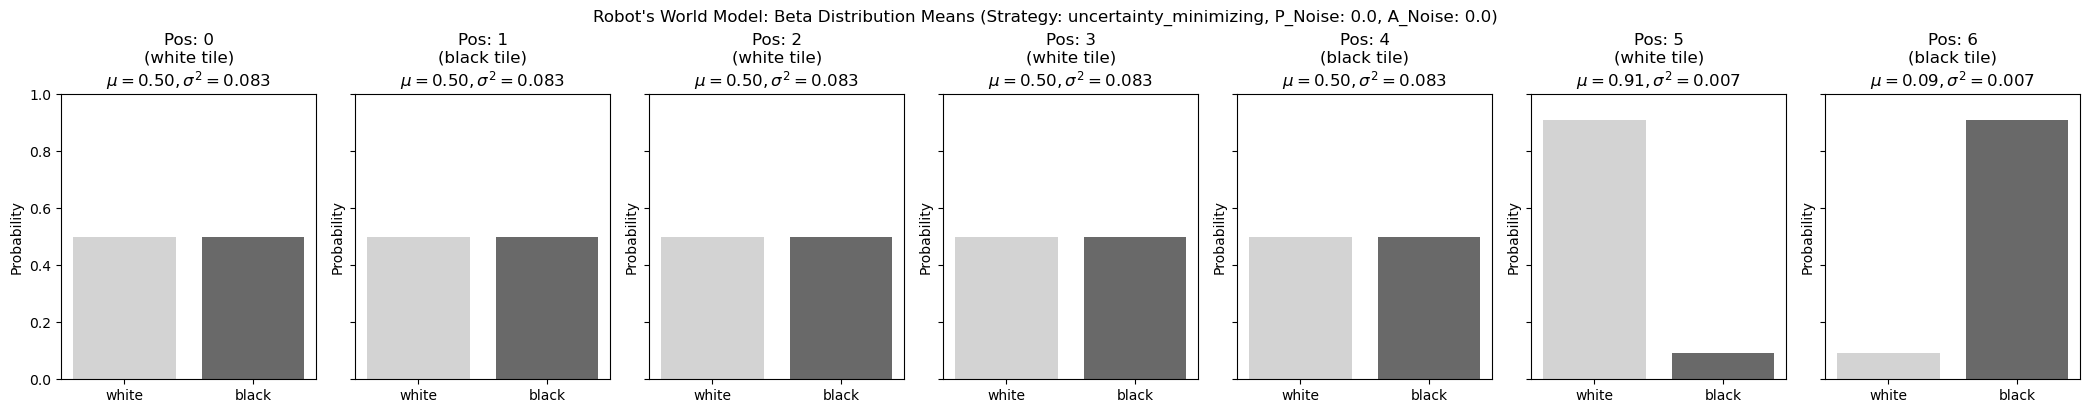

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 19/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


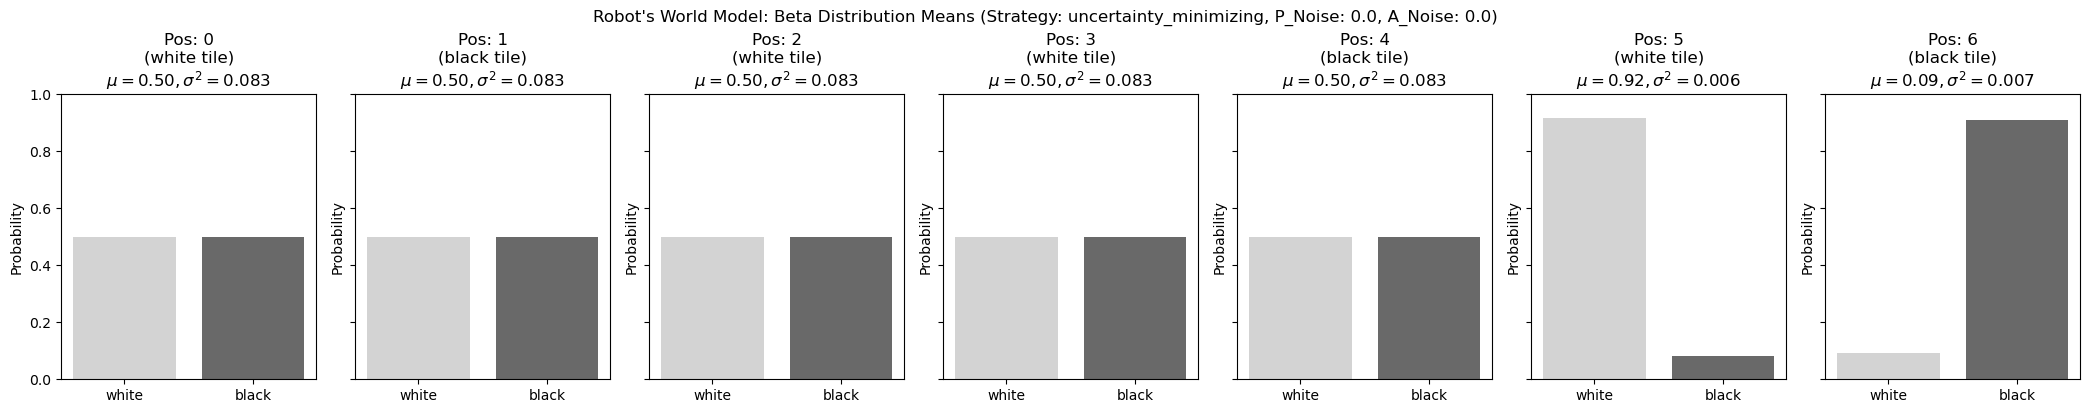

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 20/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


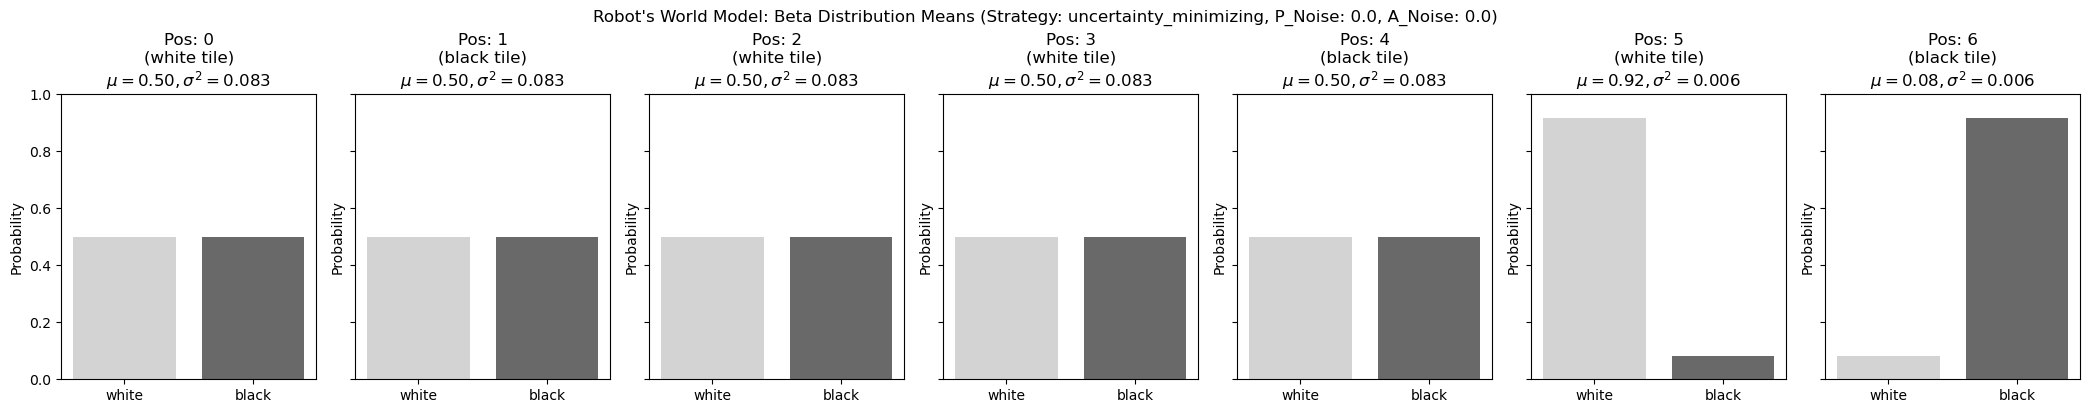

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 21/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


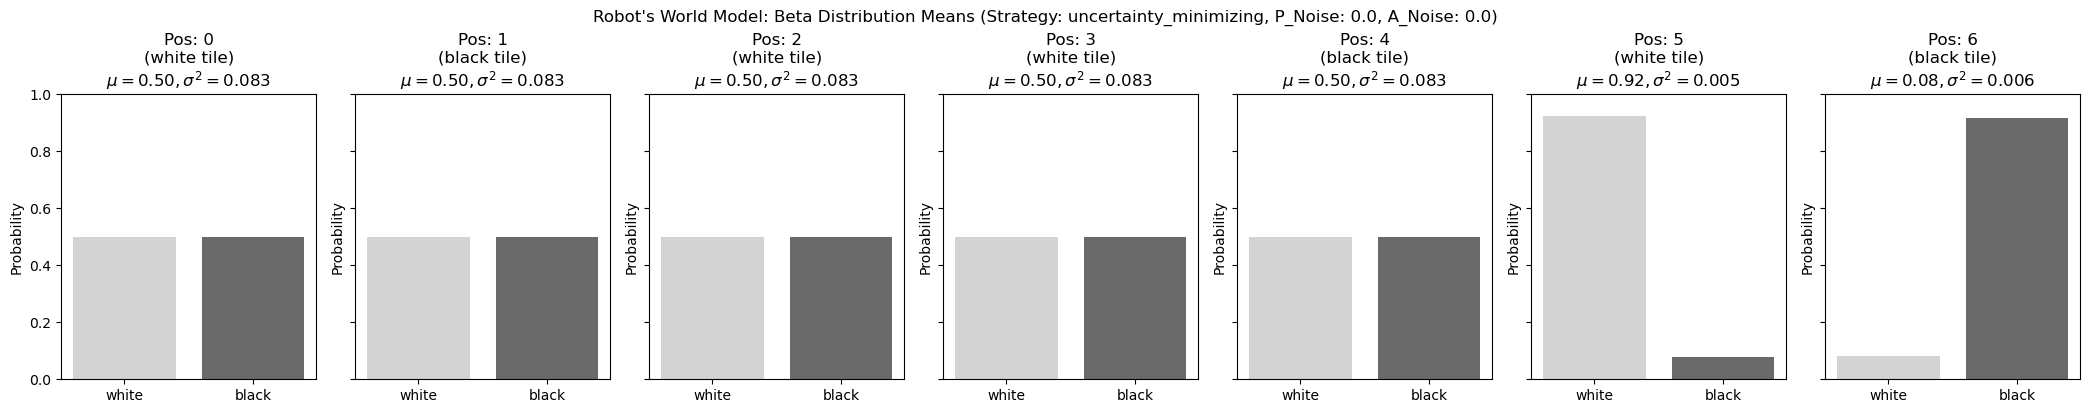

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 22/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


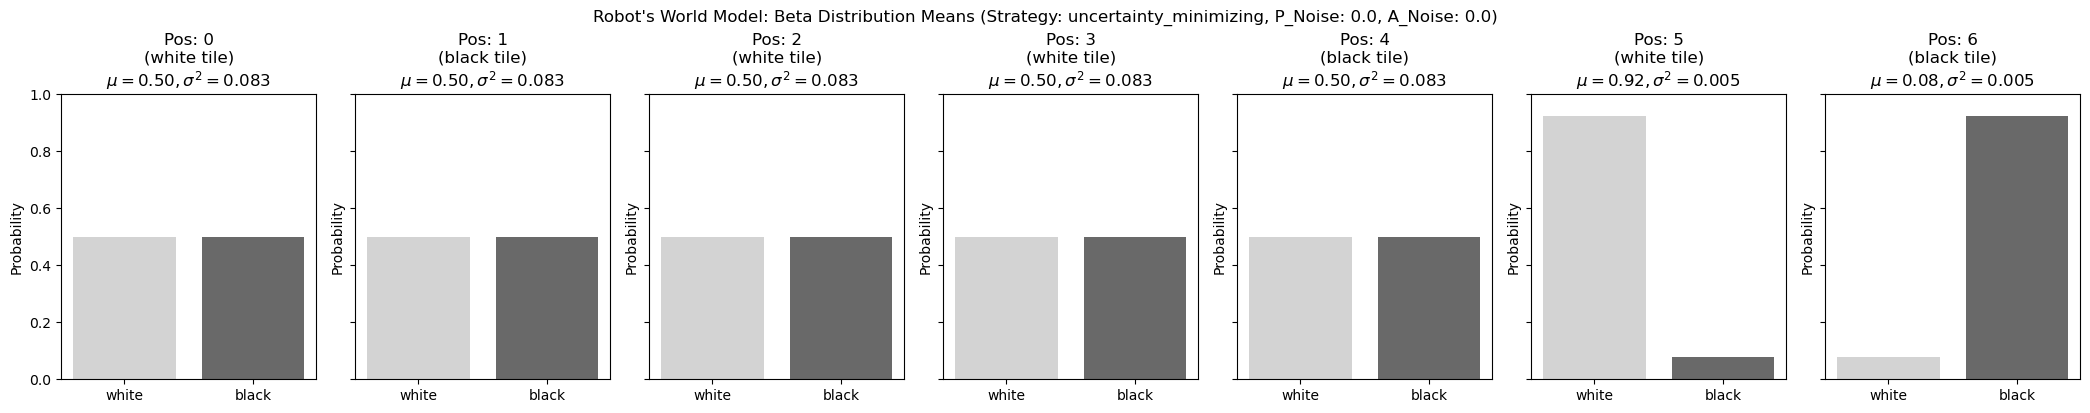

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 23/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


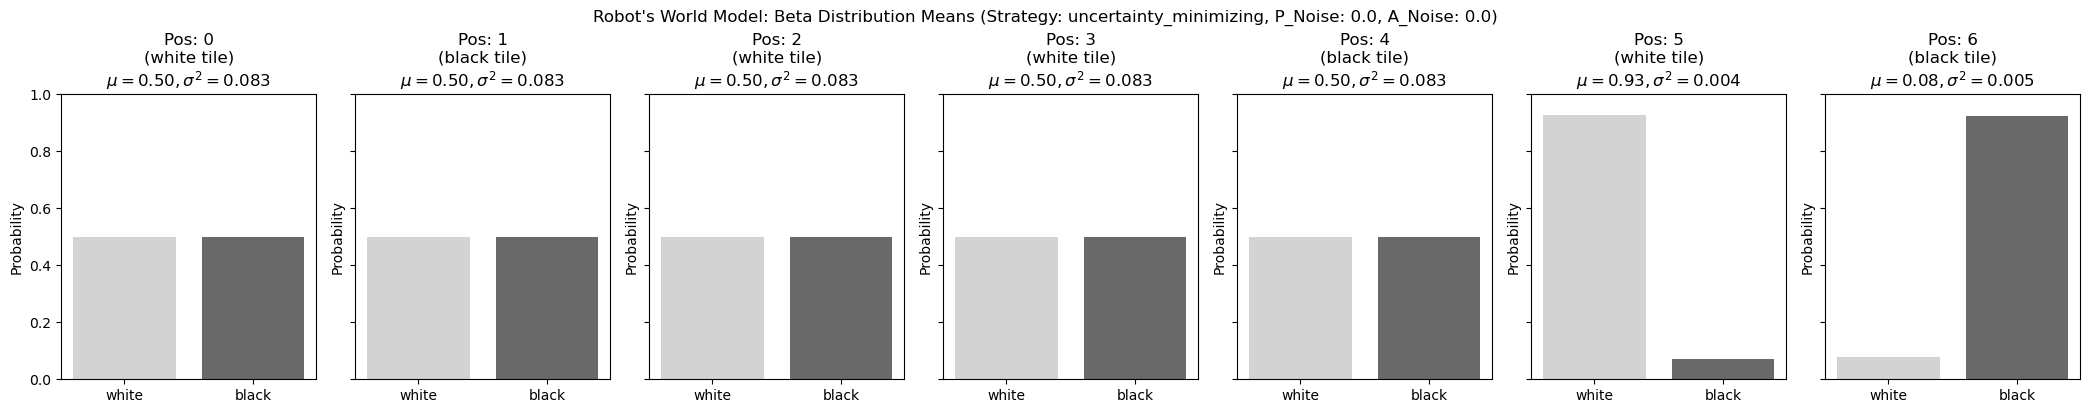

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 24/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


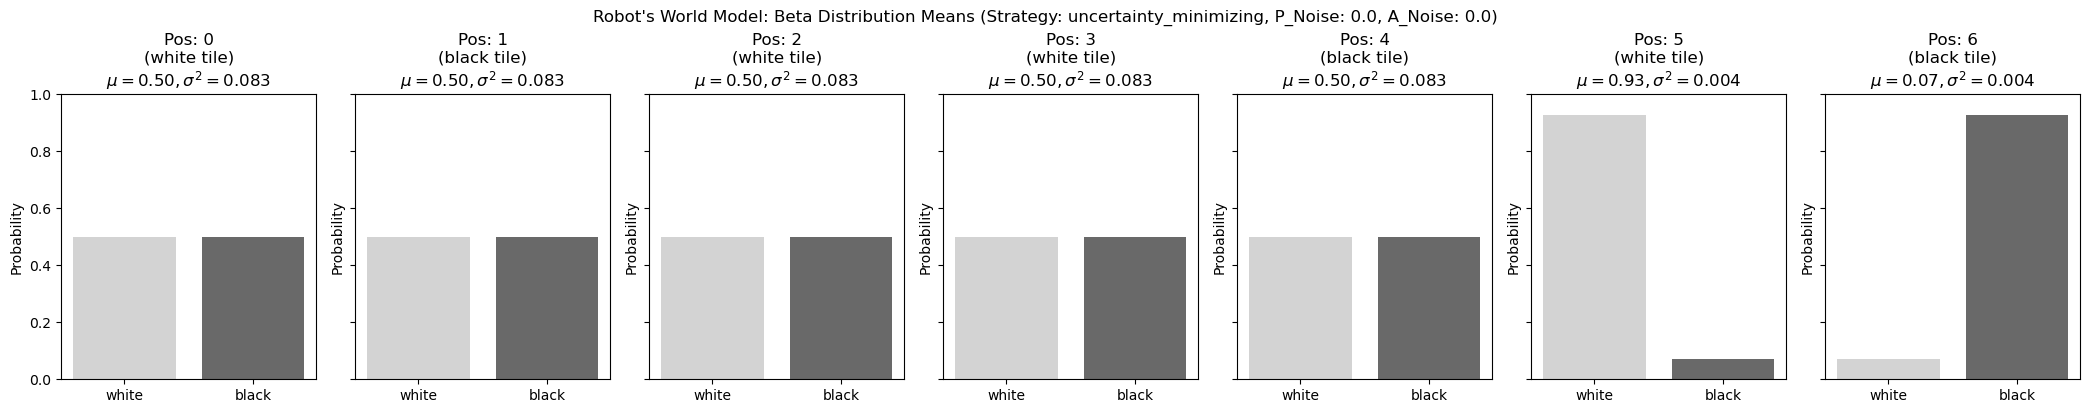

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 25/25 (Uncertainty Minimizing, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


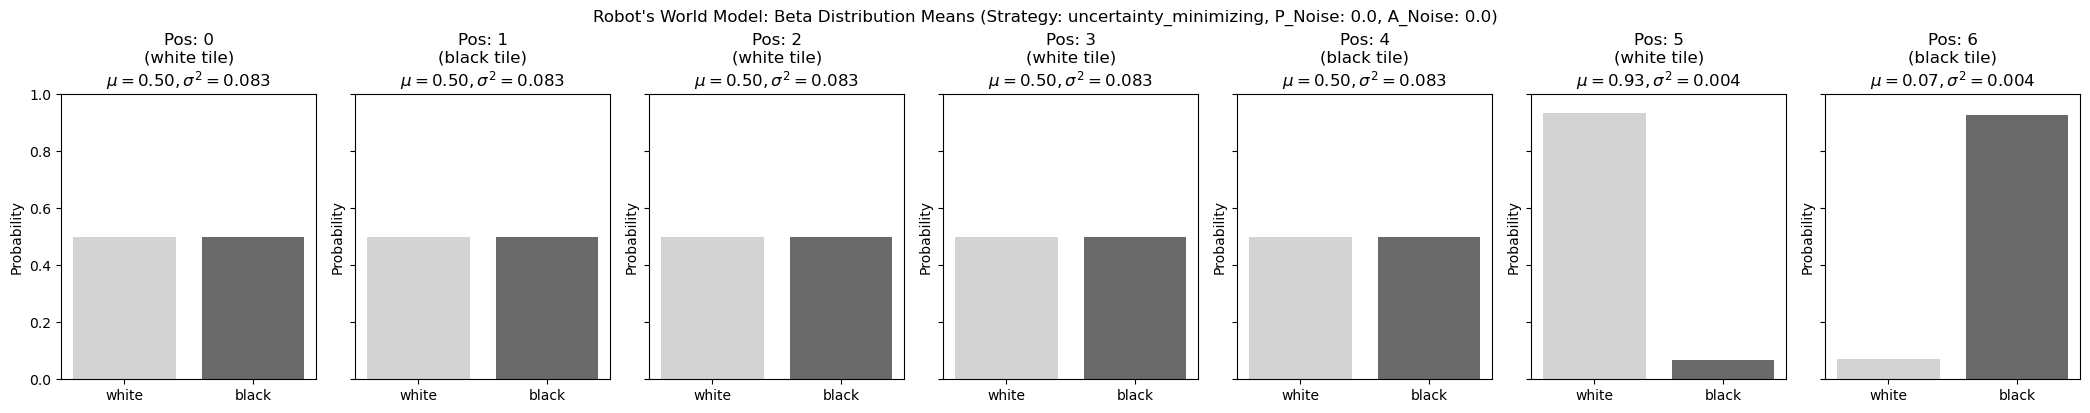

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------


--- Running Adventurous Robot with 0% Noise ---
Robot started at position 3 on a white tile.
Strategy: adventurous, Initial Beta: 1/1
--------------------------------------------------
--- Step 1/25 (Adventurous, 0% Noise) ---
Robot is at position 3, observes white tile (actual: white).


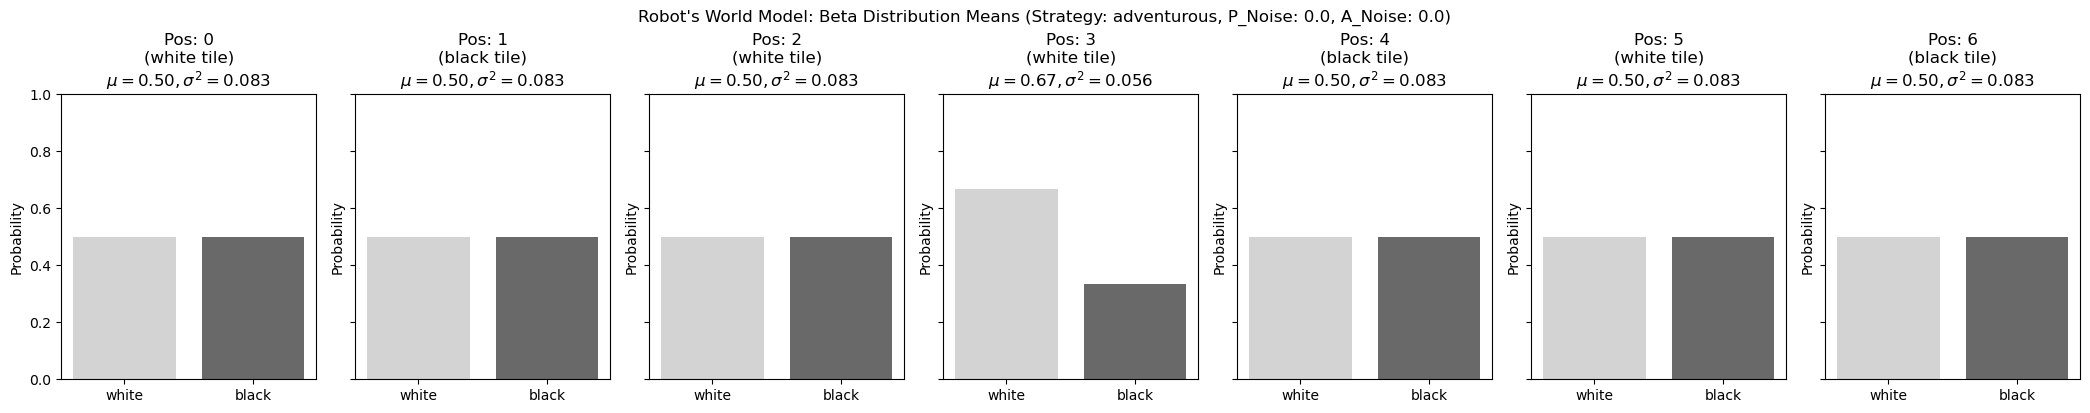

Robot intended and executed action: right
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 2/25 (Adventurous, 0% Noise) ---
Robot is at position 4, observes black tile (actual: black).


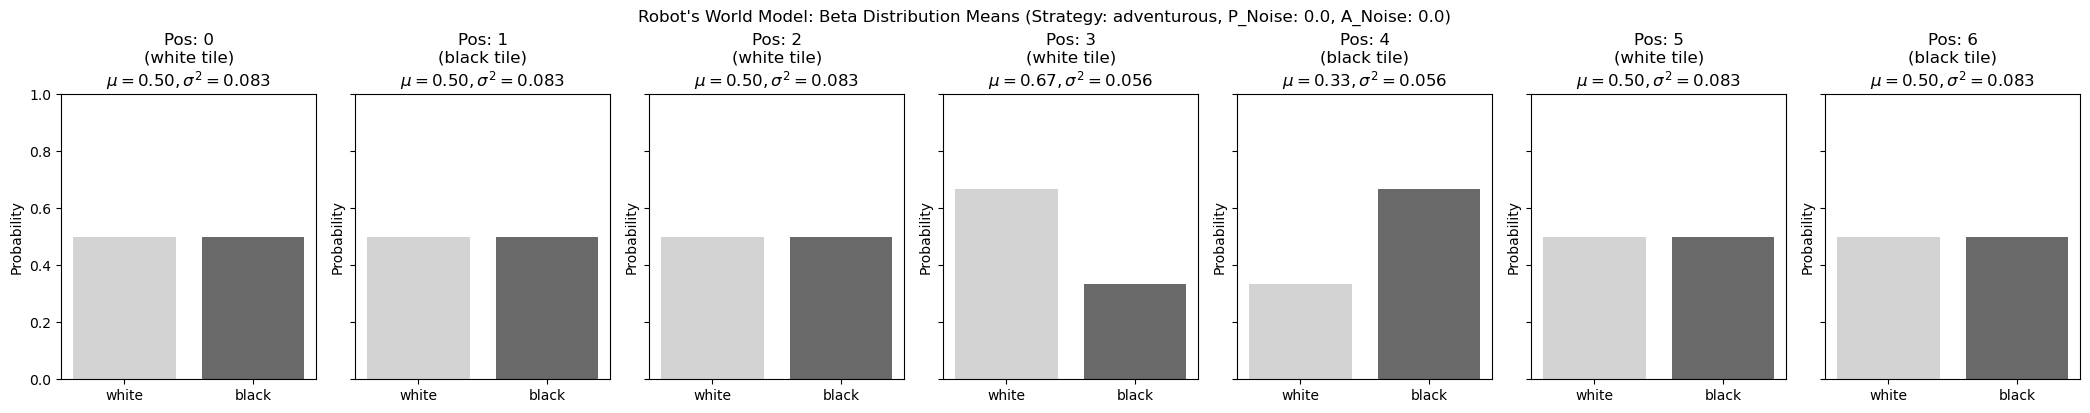

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 3/25 (Adventurous, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


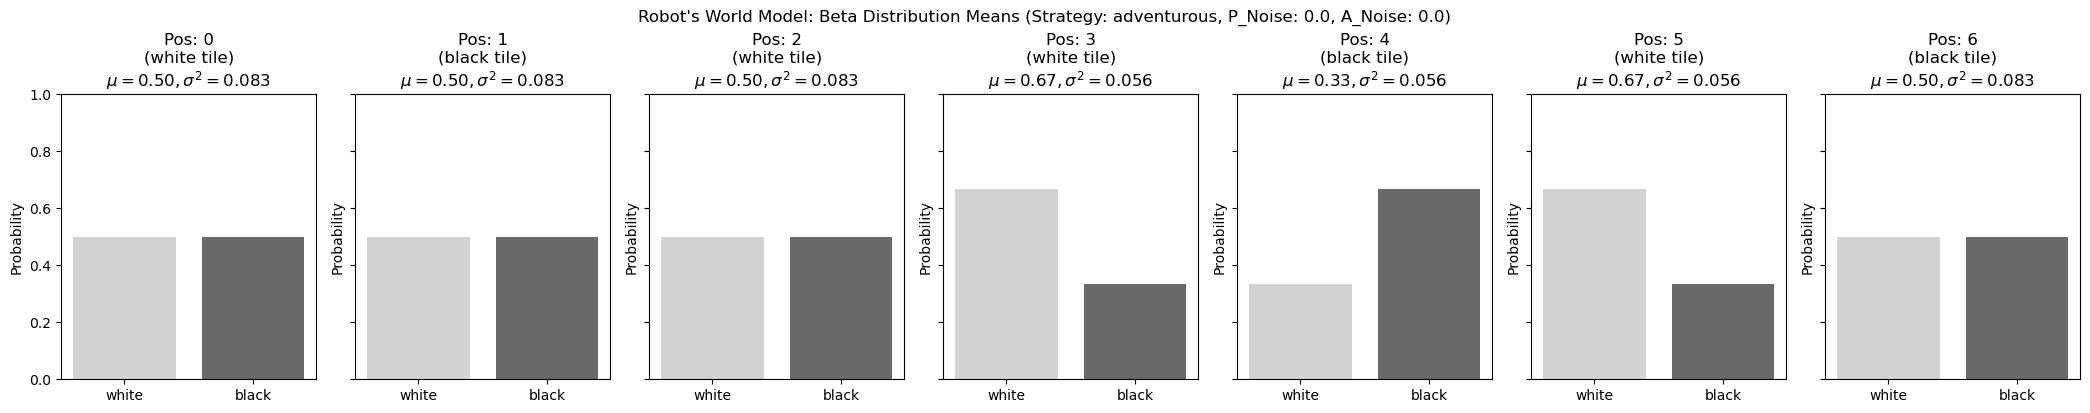

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 4/25 (Adventurous, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


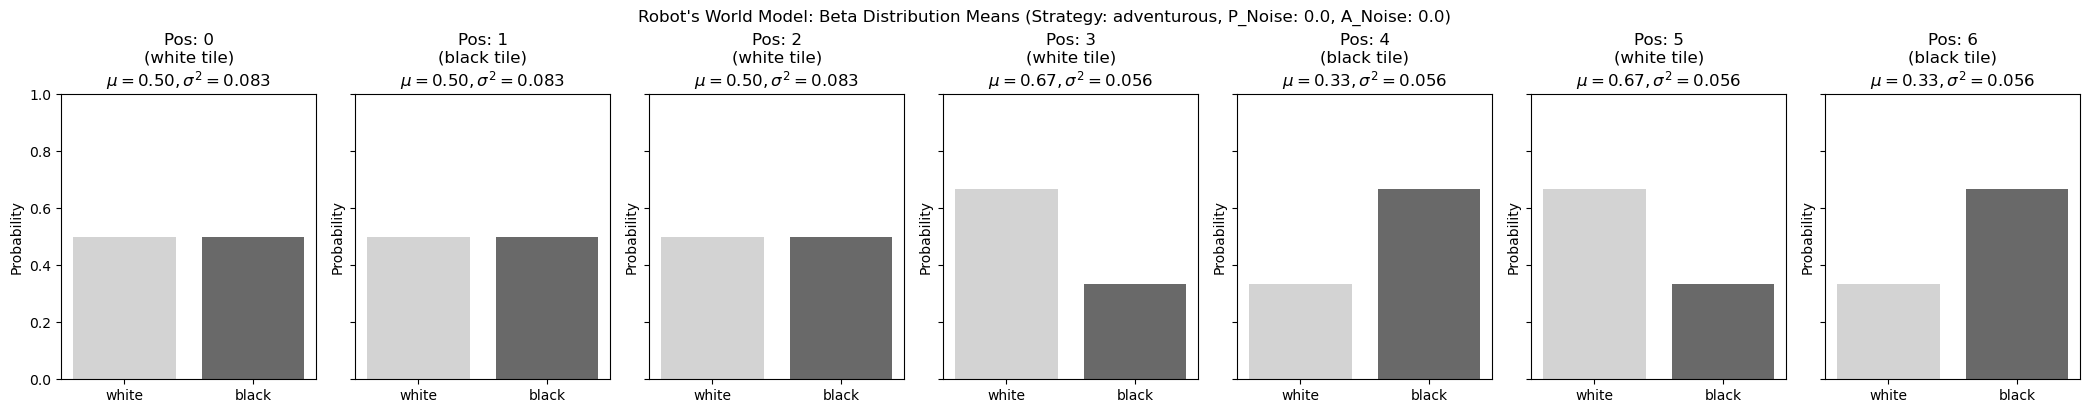

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 5/25 (Adventurous, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


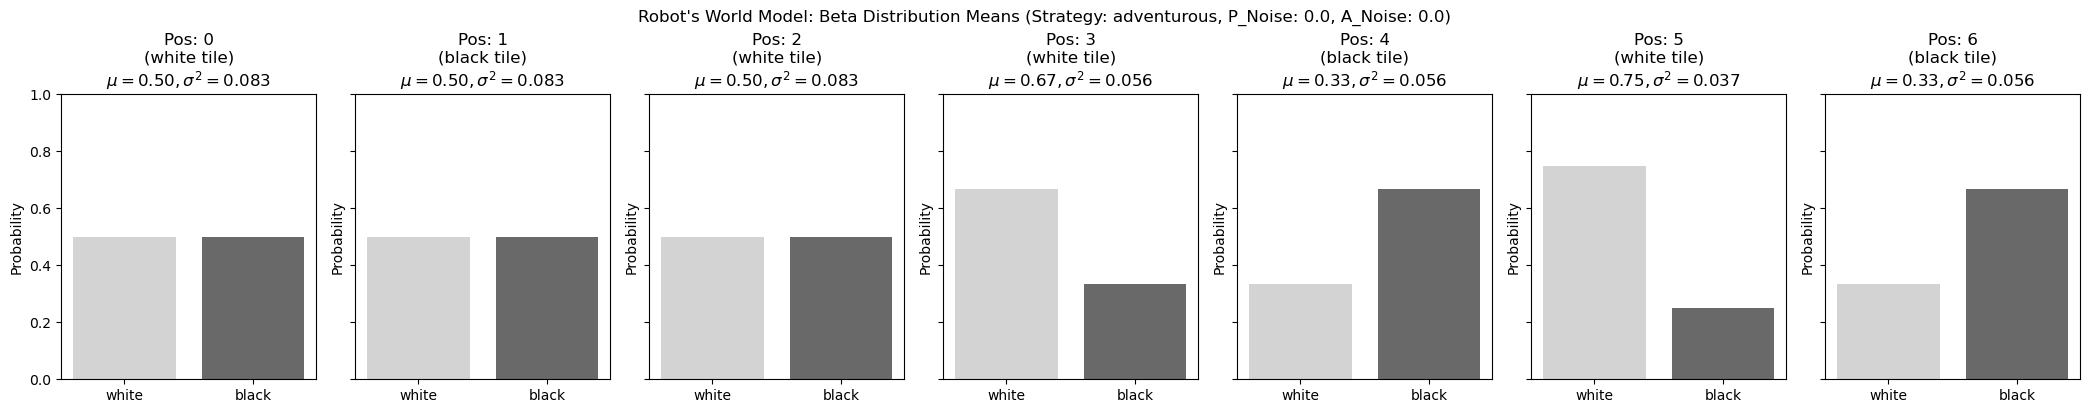

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 6/25 (Adventurous, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


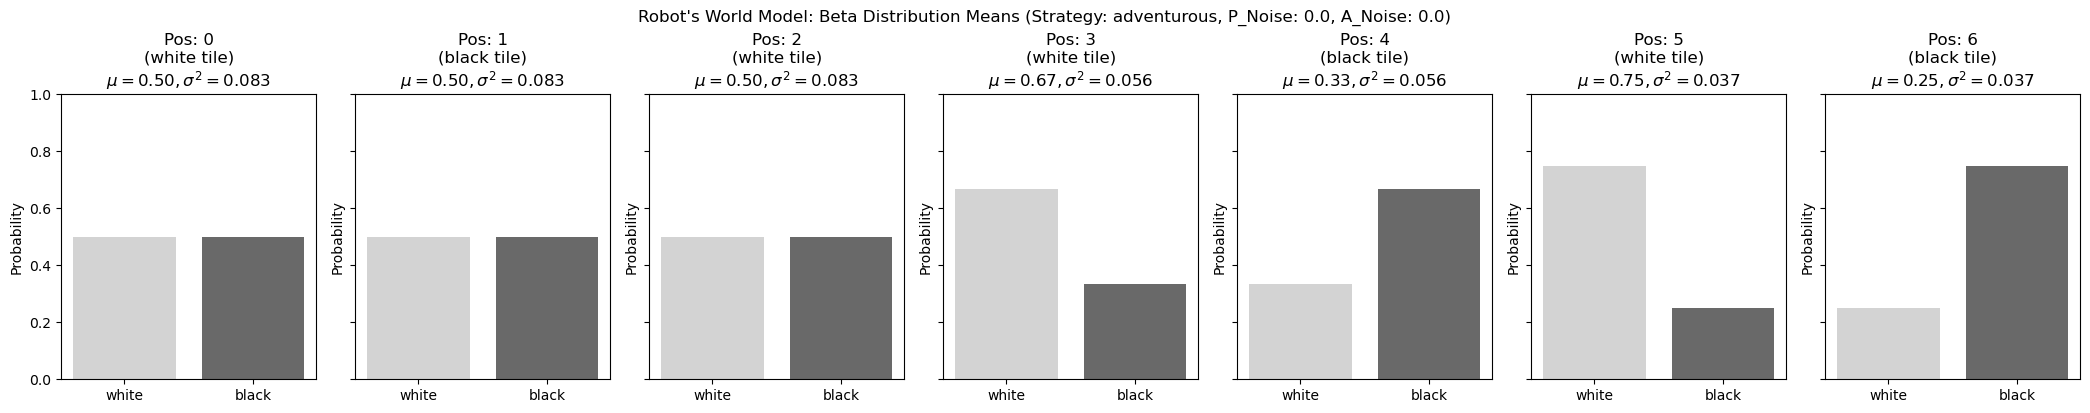

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 7/25 (Adventurous, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


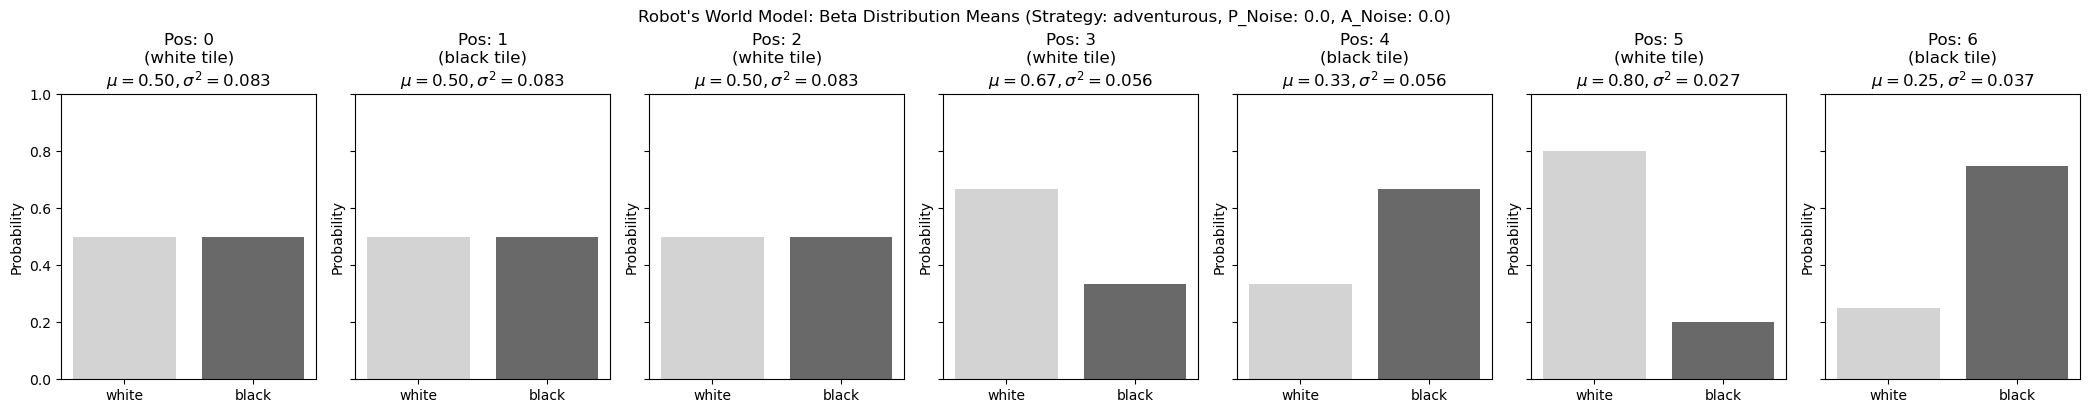

Robot intended and executed action: left
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 8/25 (Adventurous, 0% Noise) ---
Robot is at position 4, observes black tile (actual: black).


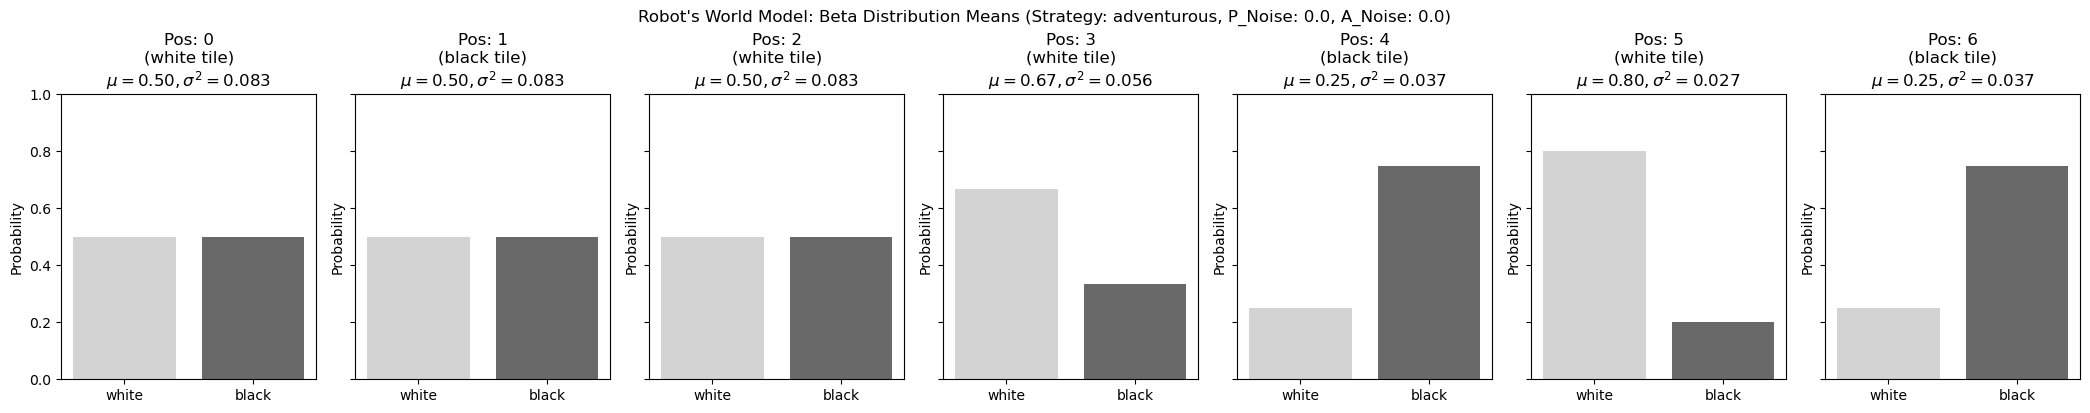

Robot intended and executed action: left
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 9/25 (Adventurous, 0% Noise) ---
Robot is at position 3, observes white tile (actual: white).


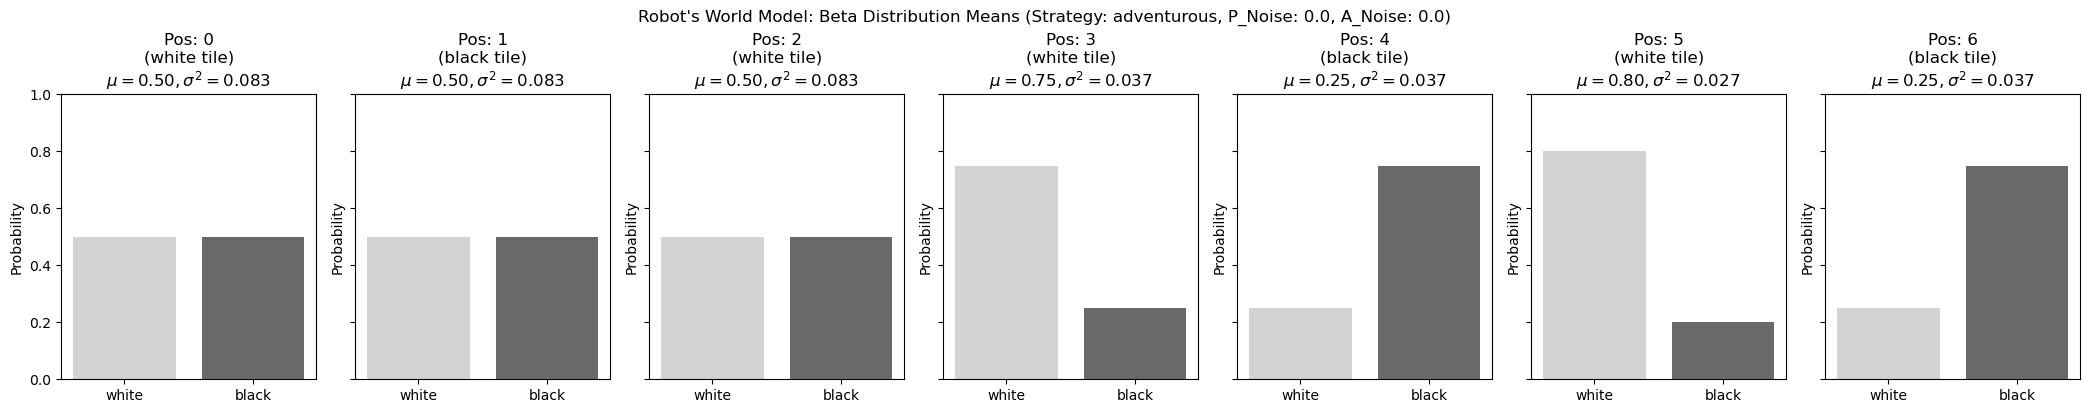

Robot intended and executed action: left
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 10/25 (Adventurous, 0% Noise) ---
Robot is at position 2, observes white tile (actual: white).


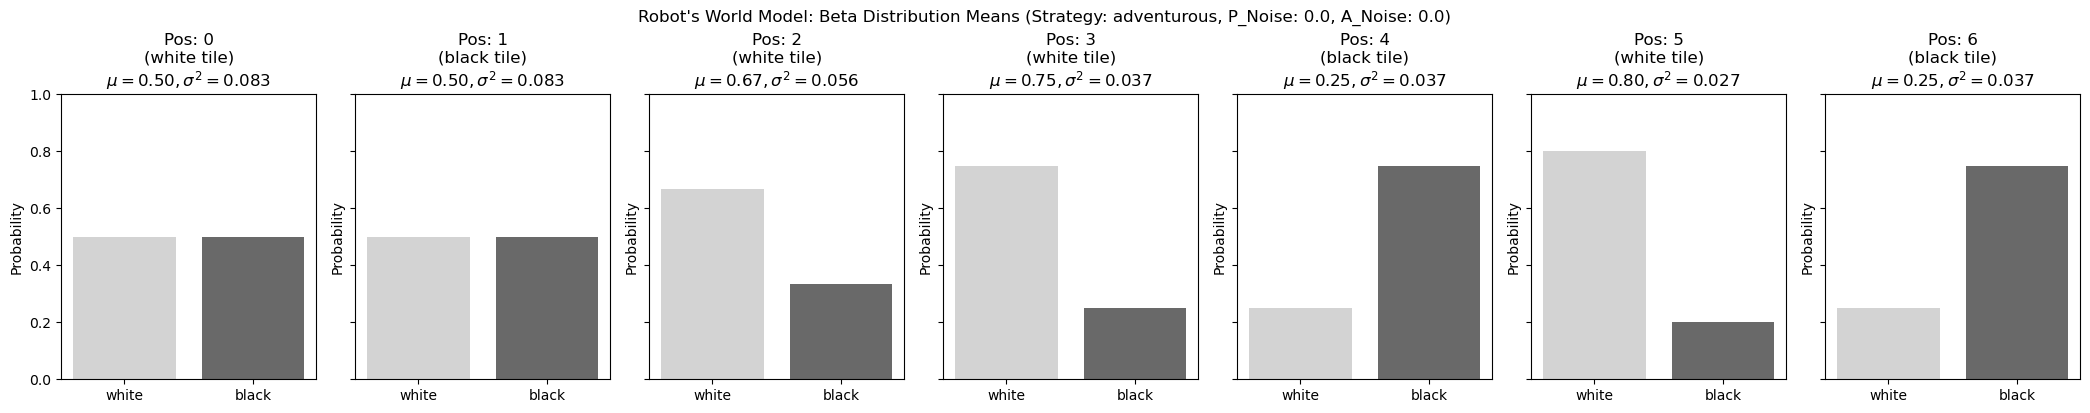

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 11/25 (Adventurous, 0% Noise) ---
Robot is at position 1, observes black tile (actual: black).


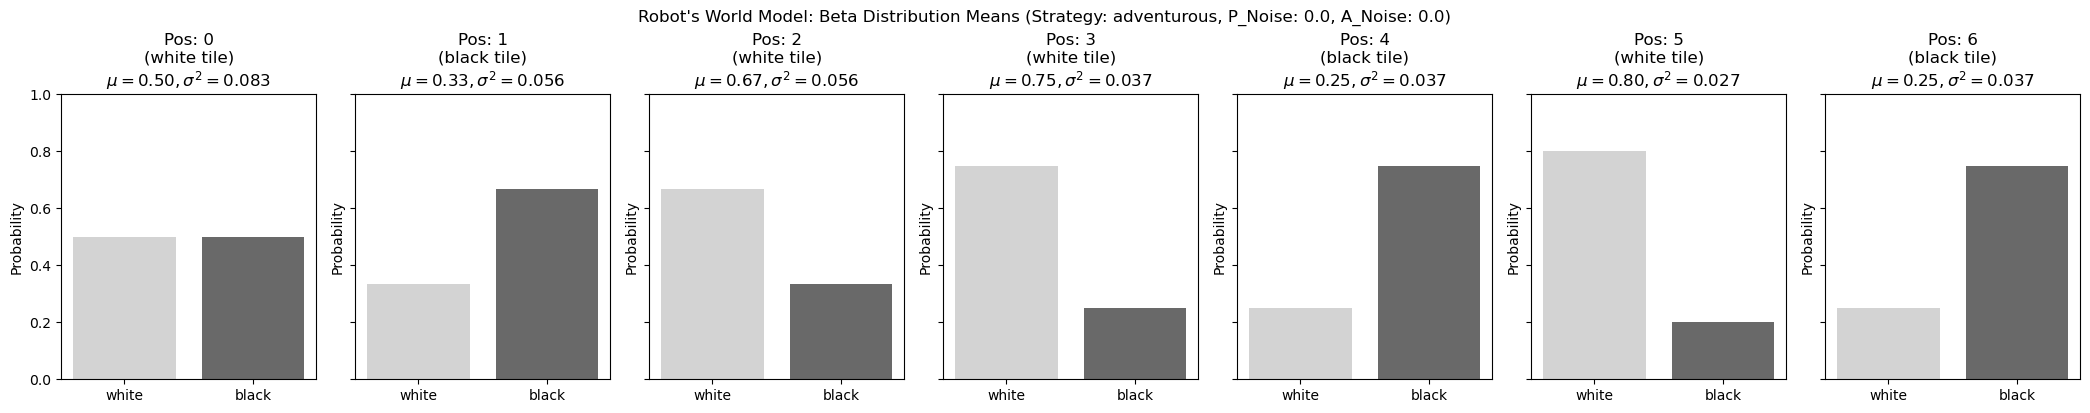

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 12/25 (Adventurous, 0% Noise) ---
Robot is at position 0, observes white tile (actual: white).


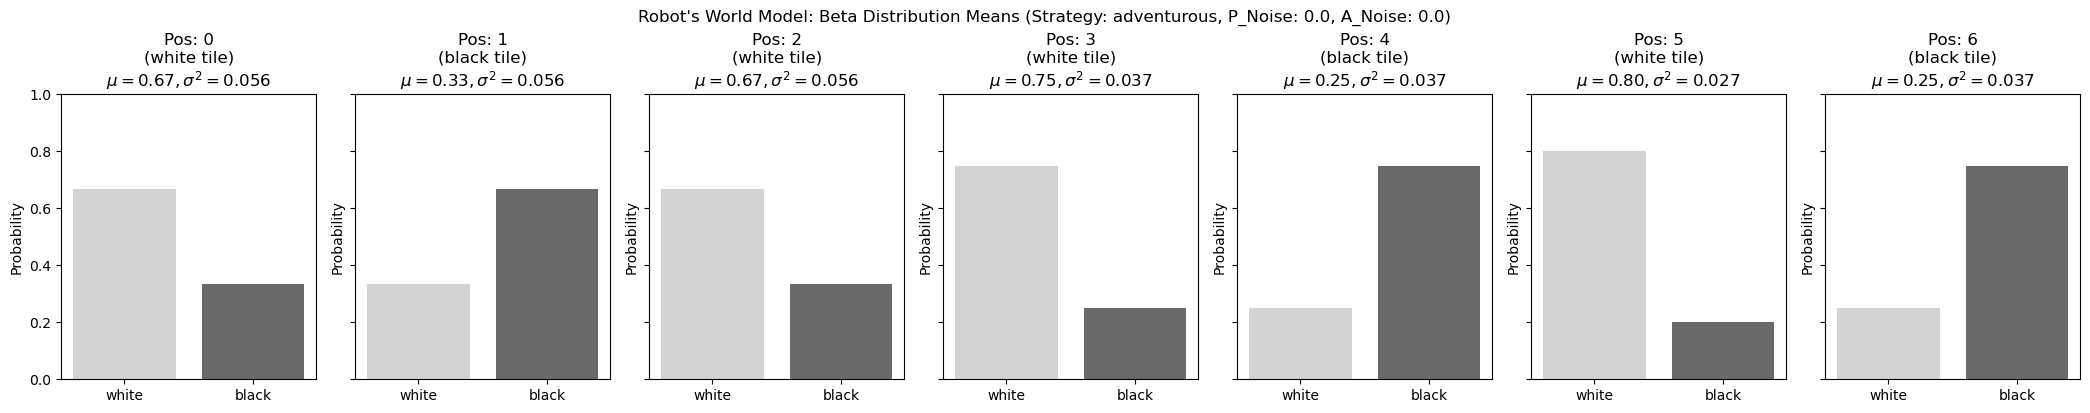

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 13/25 (Adventurous, 0% Noise) ---
Robot is at position 1, observes black tile (actual: black).


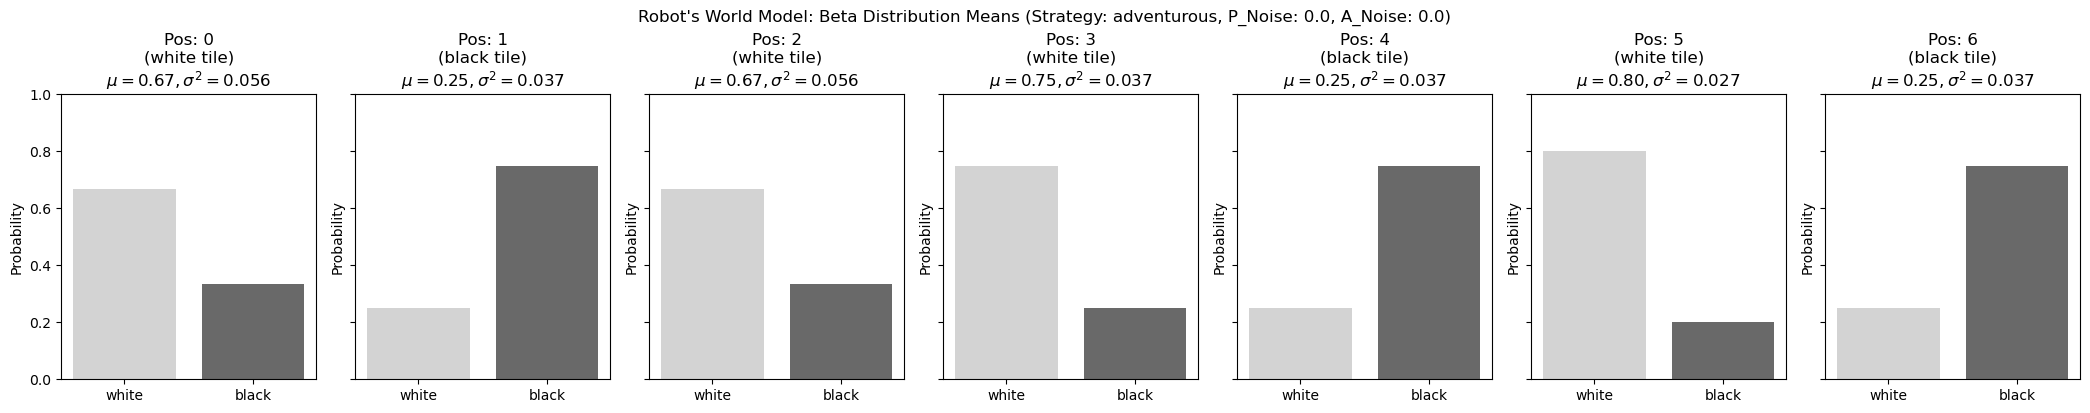

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 14/25 (Adventurous, 0% Noise) ---
Robot is at position 2, observes white tile (actual: white).


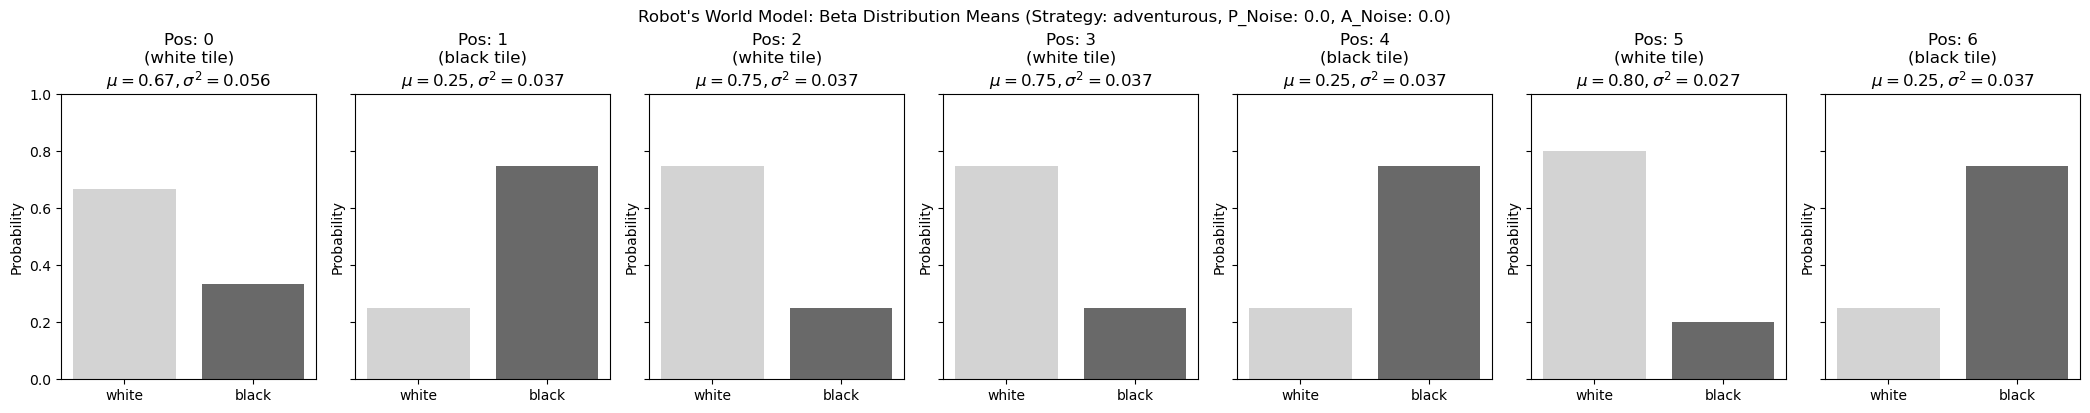

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 15/25 (Adventurous, 0% Noise) ---
Robot is at position 1, observes black tile (actual: black).


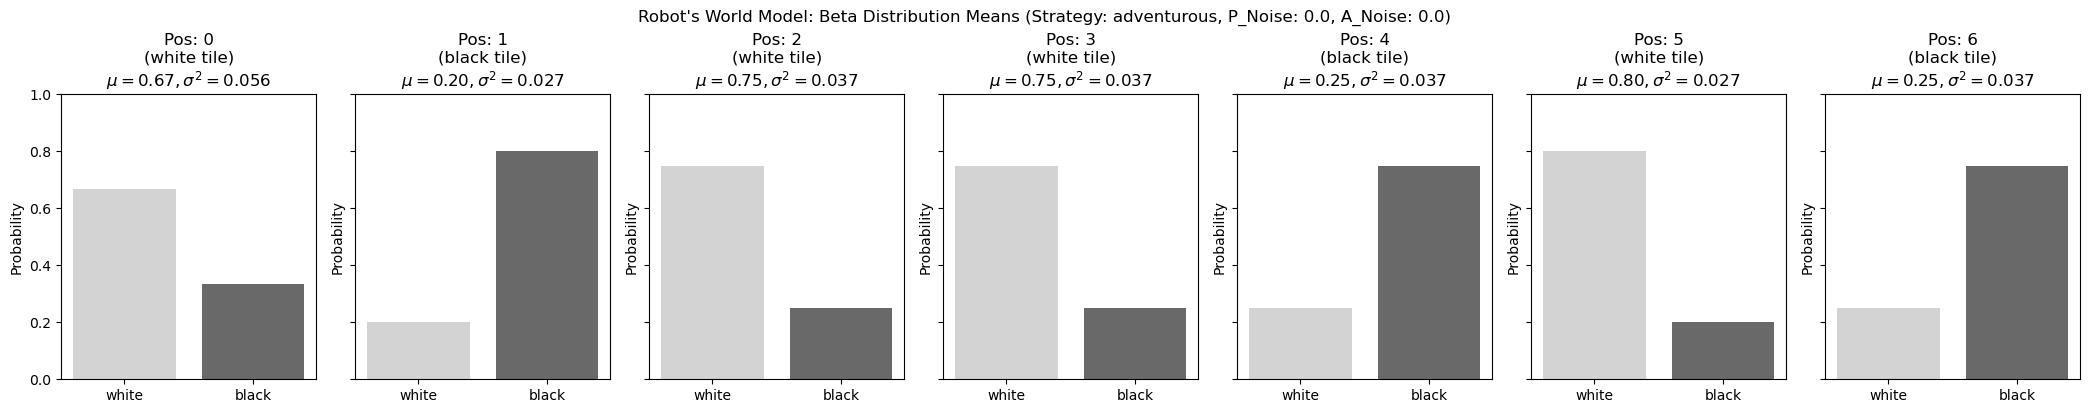

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 16/25 (Adventurous, 0% Noise) ---
Robot is at position 0, observes white tile (actual: white).


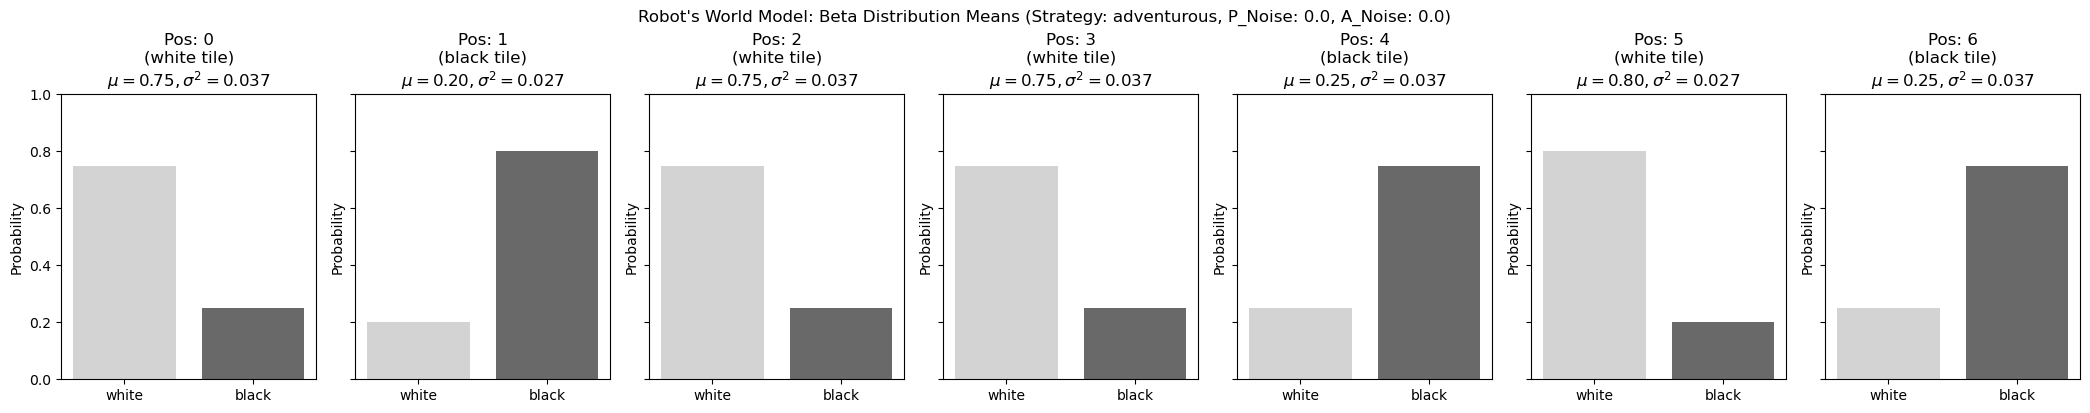

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 17/25 (Adventurous, 0% Noise) ---
Robot is at position 1, observes black tile (actual: black).


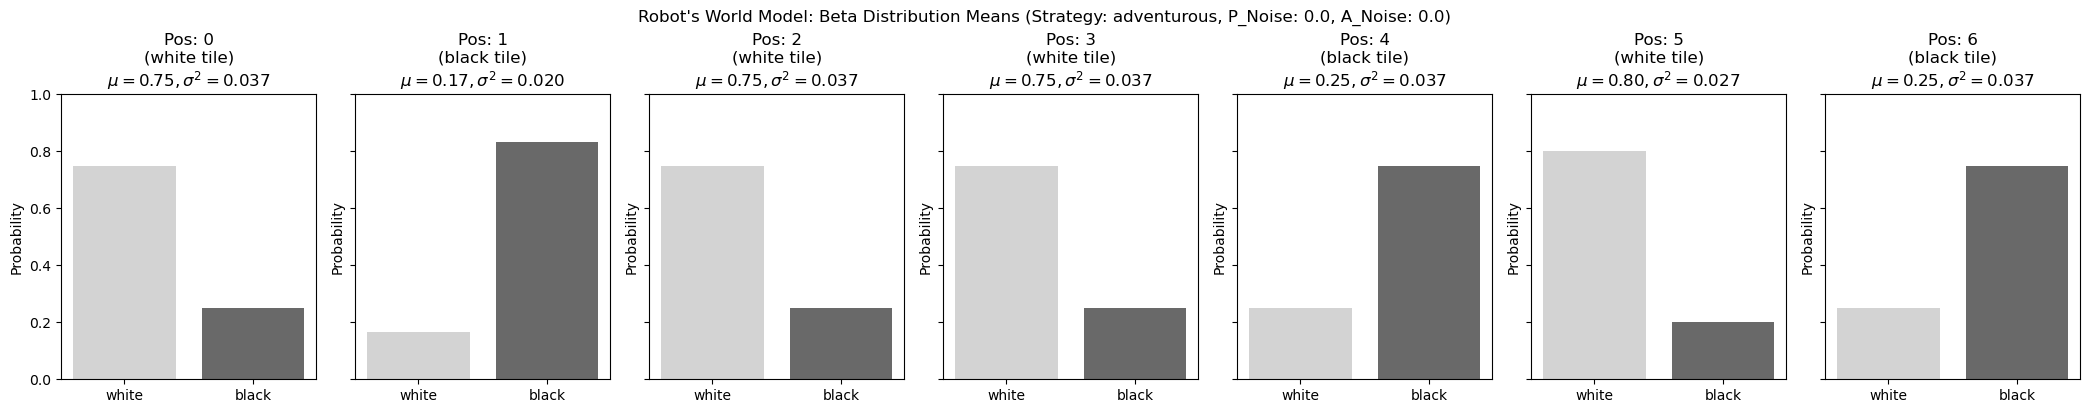

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 18/25 (Adventurous, 0% Noise) ---
Robot is at position 0, observes white tile (actual: white).


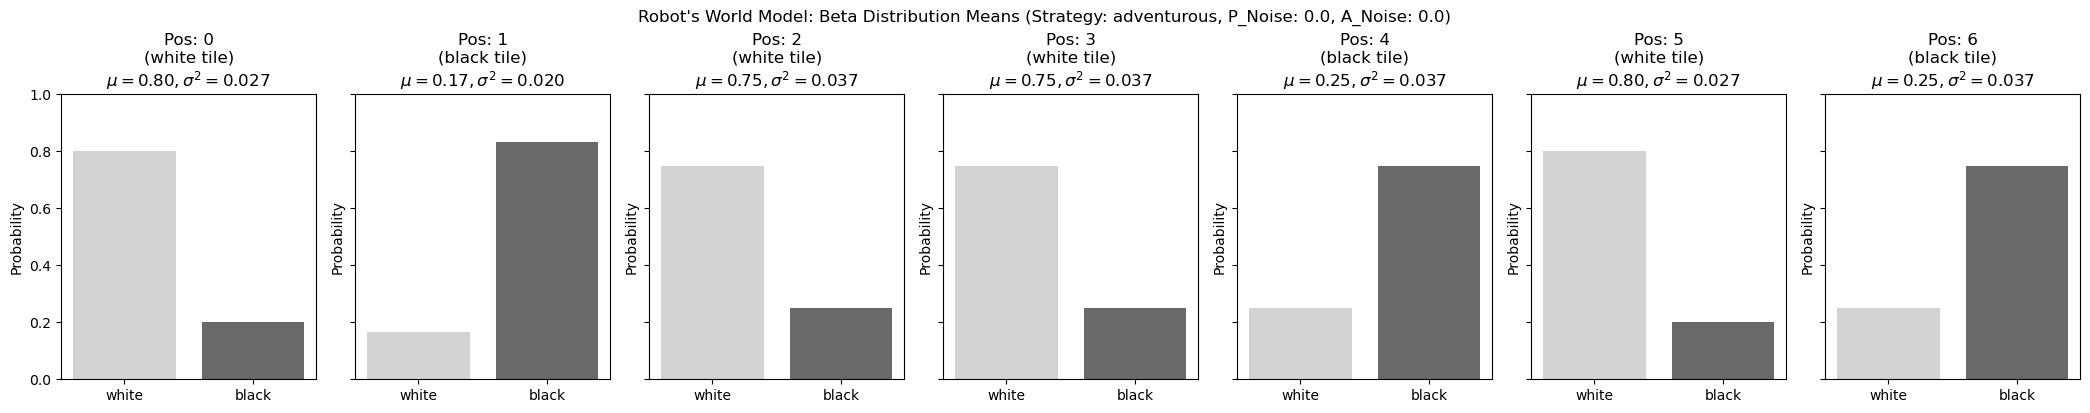

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 19/25 (Adventurous, 0% Noise) ---
Robot is at position 1, observes black tile (actual: black).


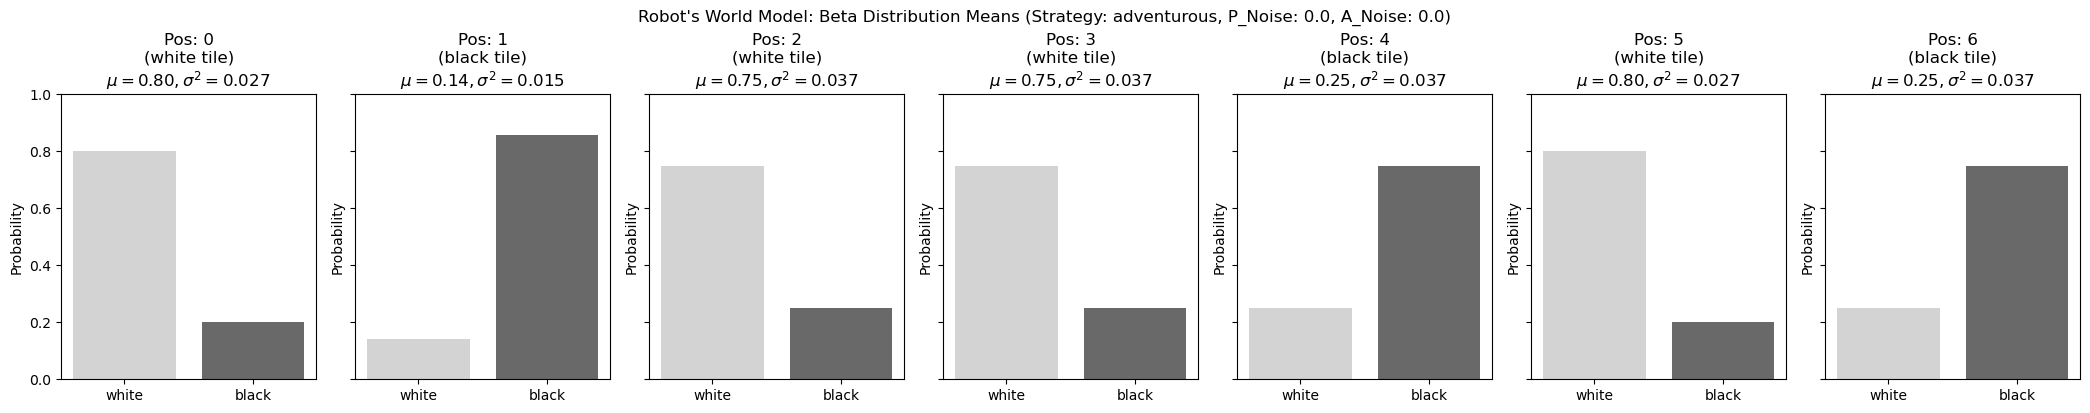

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 20/25 (Adventurous, 0% Noise) ---
Robot is at position 2, observes white tile (actual: white).


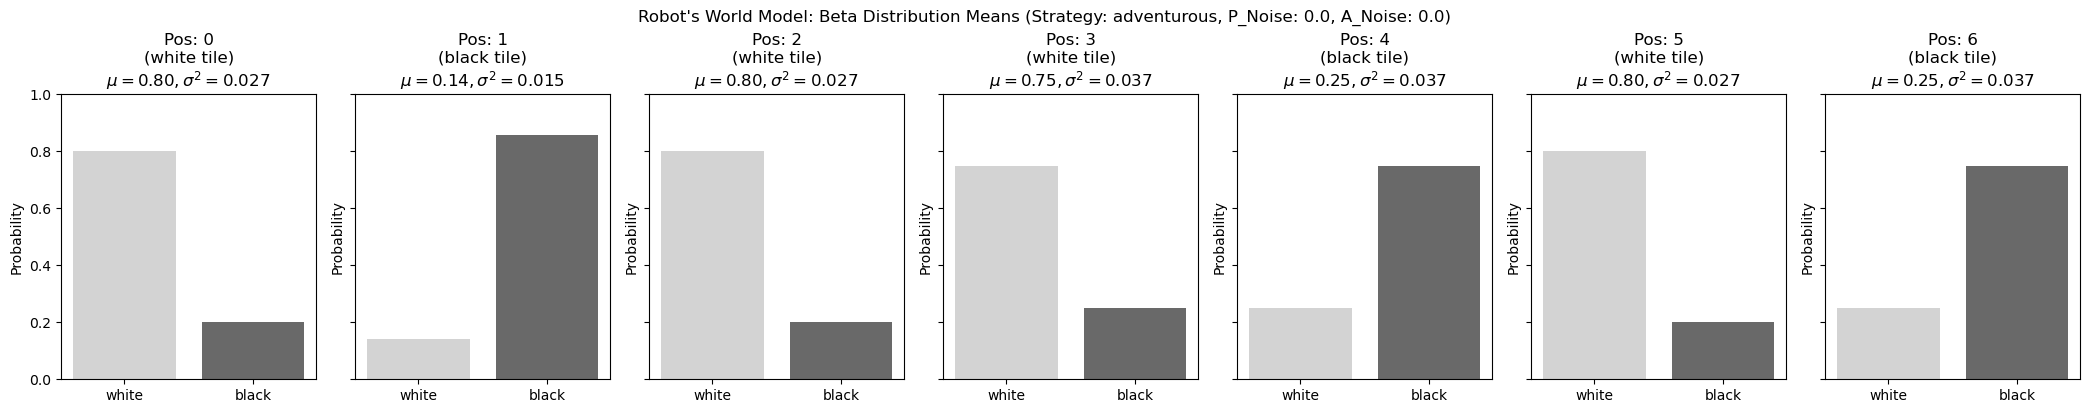

Robot intended and executed action: right
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 21/25 (Adventurous, 0% Noise) ---
Robot is at position 3, observes white tile (actual: white).


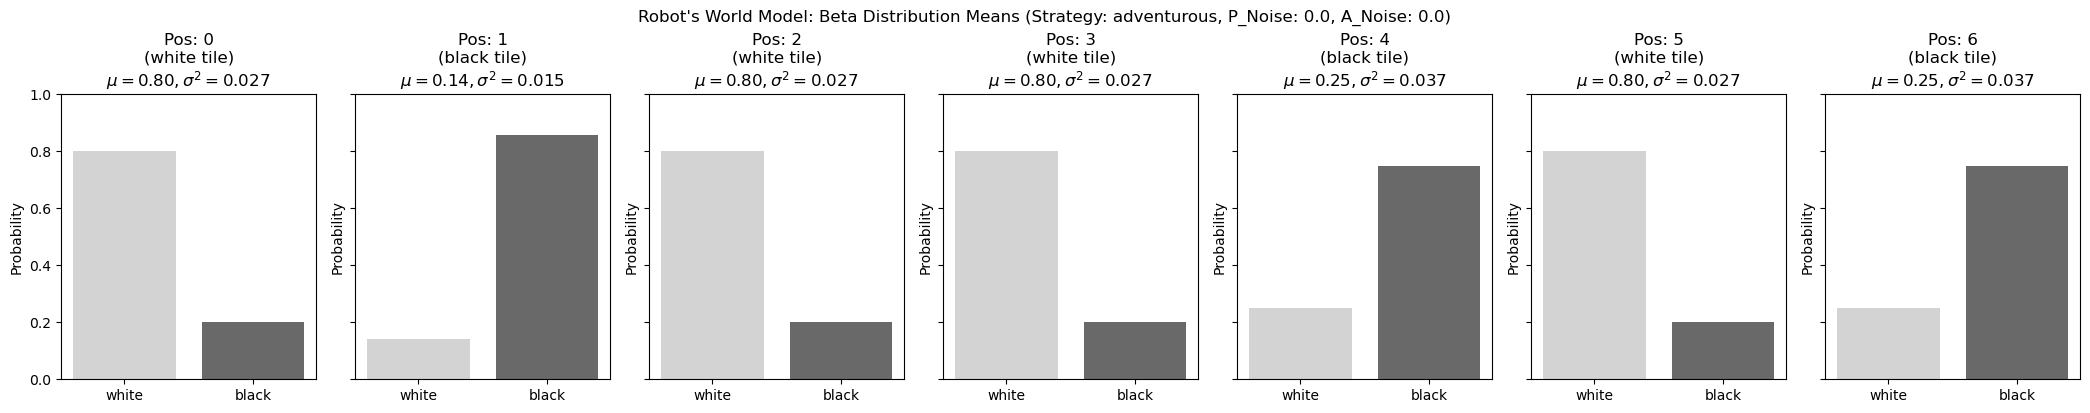

Robot intended and executed action: right
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 22/25 (Adventurous, 0% Noise) ---
Robot is at position 4, observes black tile (actual: black).


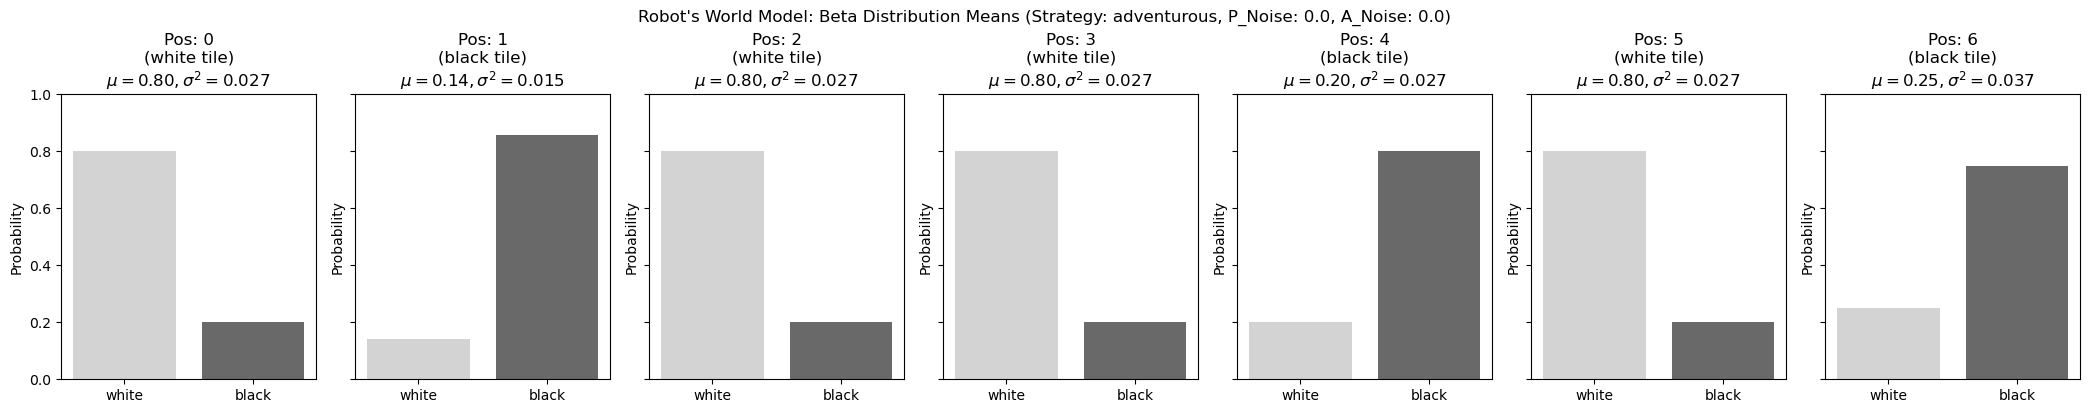

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 23/25 (Adventurous, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


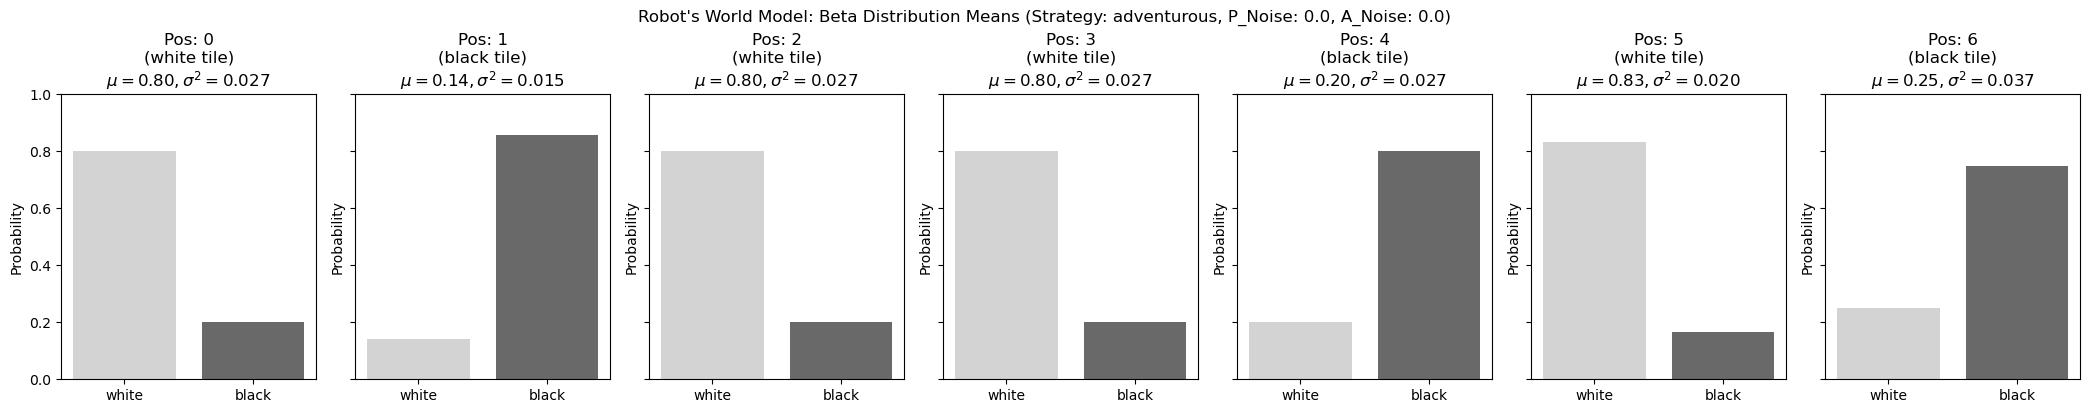

Robot intended and executed action: right
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 24/25 (Adventurous, 0% Noise) ---
Robot is at position 6, observes black tile (actual: black).


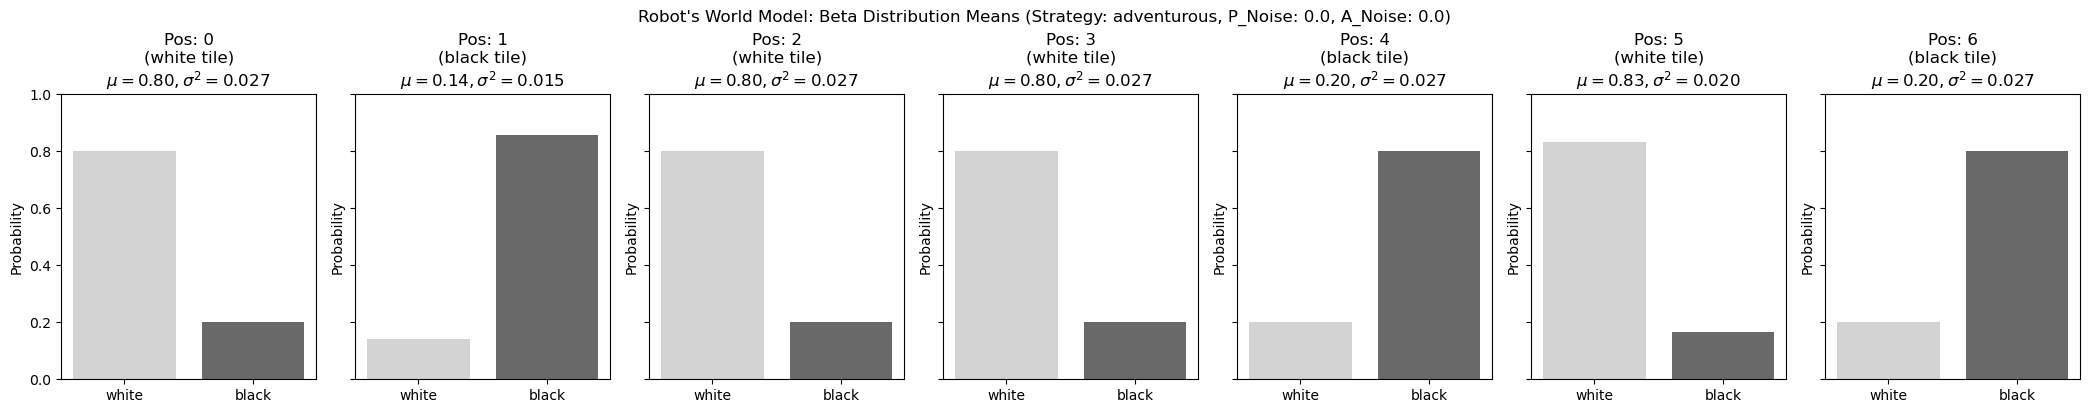

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 25/25 (Adventurous, 0% Noise) ---
Robot is at position 5, observes white tile (actual: white).


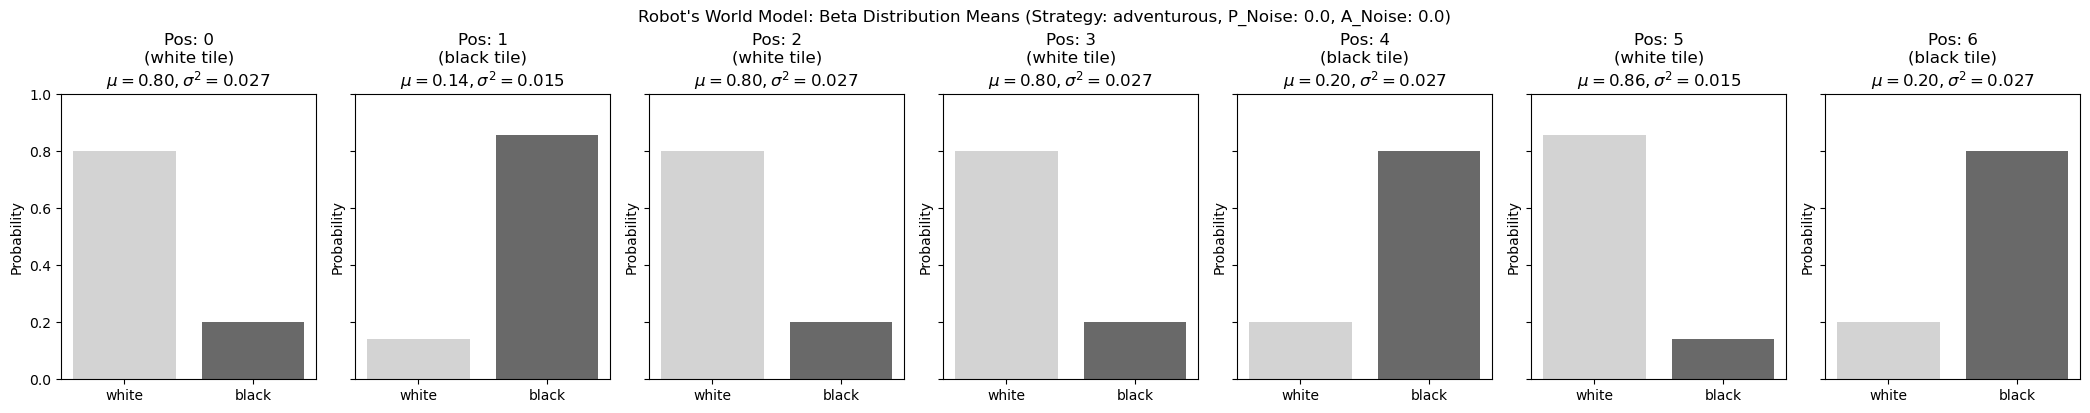

Robot intended and executed action: left
Robot moved to position 4 (a black tile).
--------------------------------------------------


--- Running Uncertainty Minimizing Robot with 10% Noise ---
Robot started at position 1 on a black tile.
Strategy: uncertainty_minimizing, Initial Beta: 1/1
--------------------------------------------------
--- Step 1/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


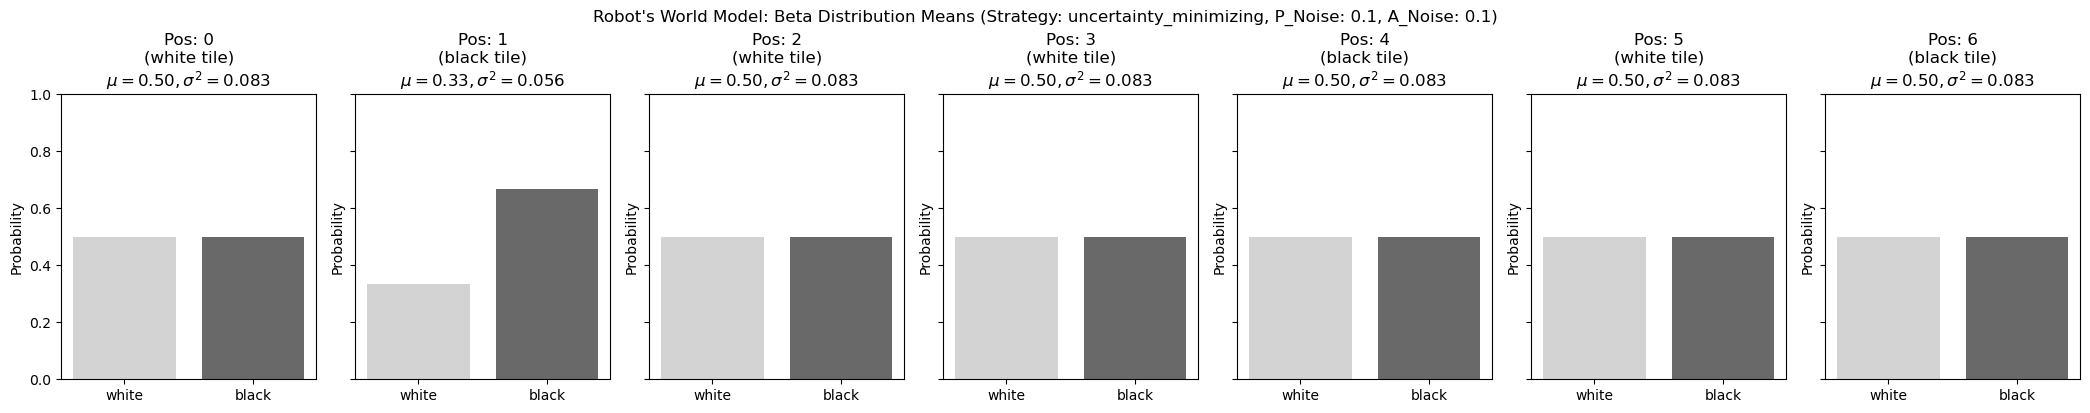

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 2/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


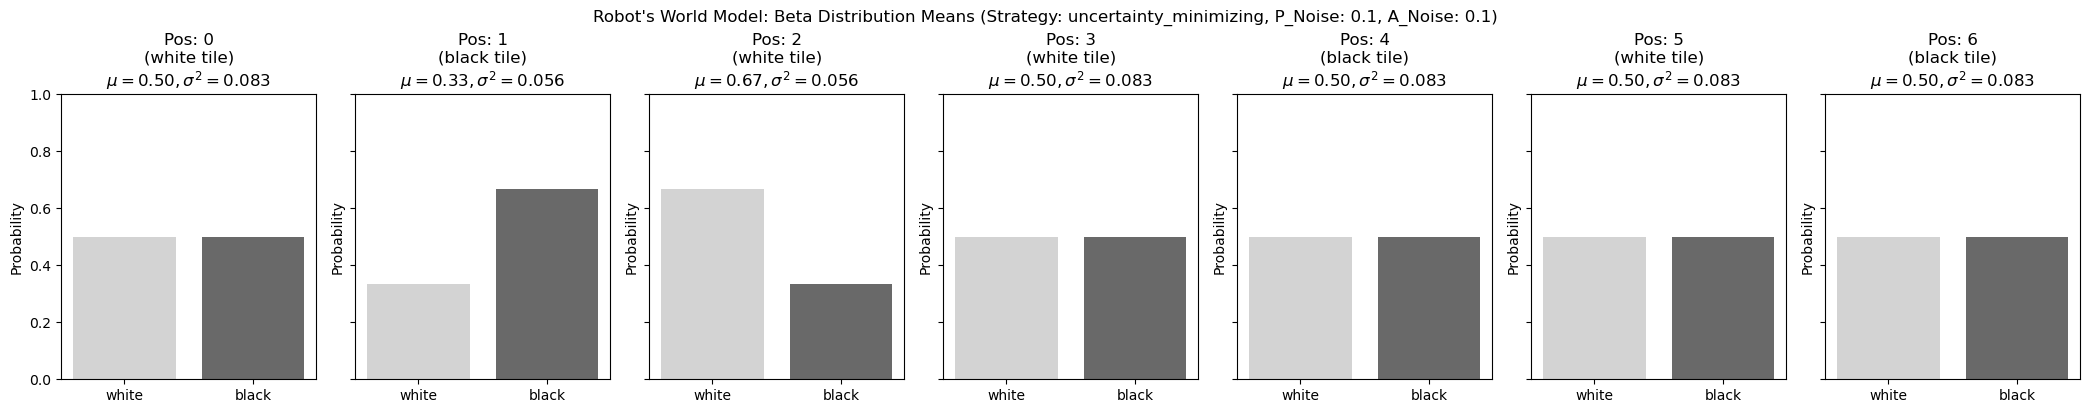

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 3/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


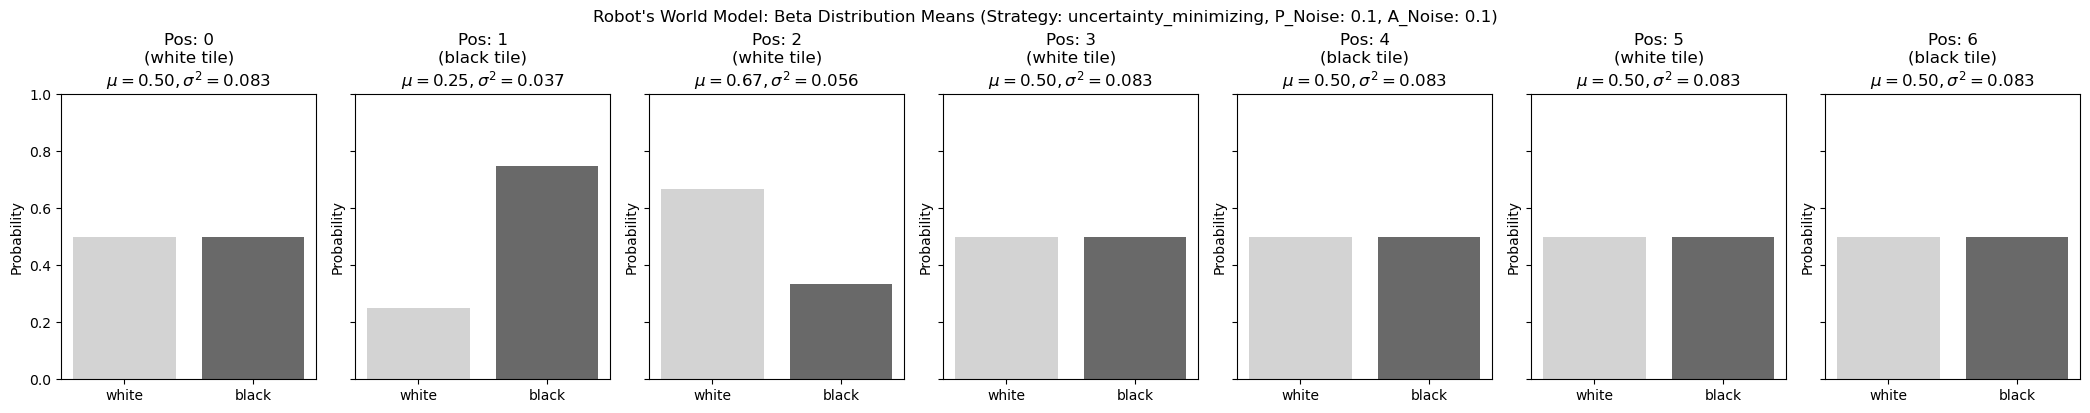

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 4/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


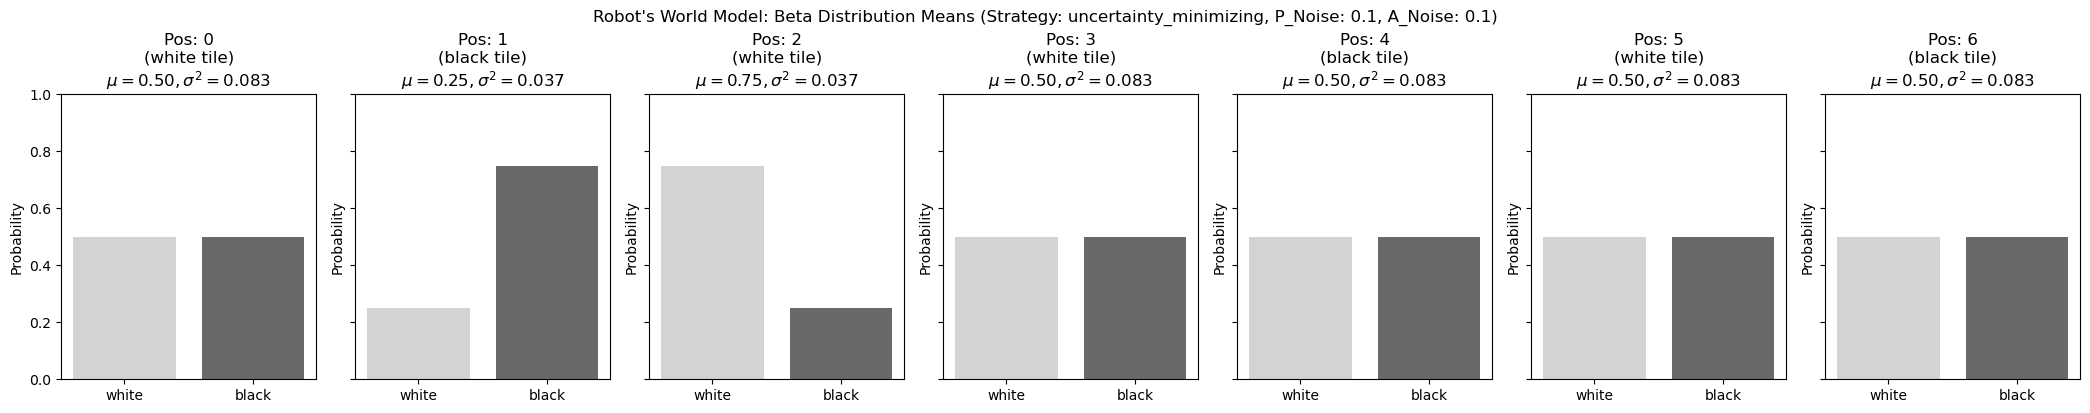

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 5/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


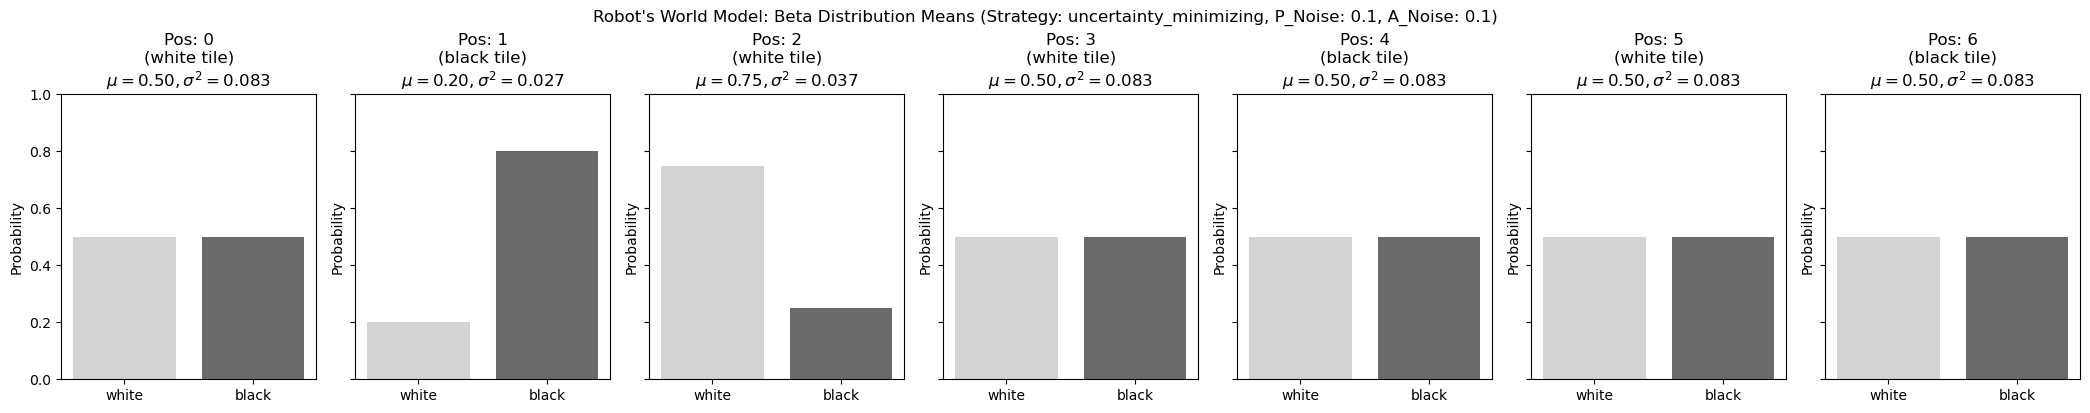

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 6/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


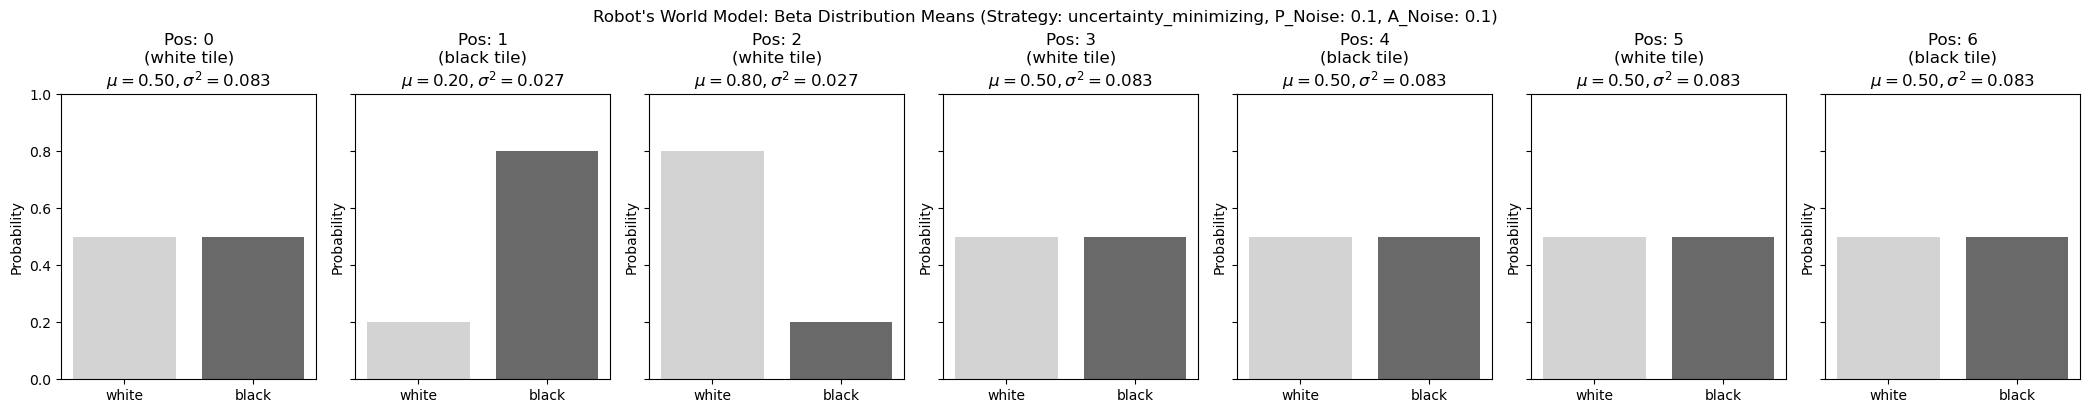

Robot intended to move left, but due to noise, moved right!
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 7/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 3, observes white tile (actual: white).


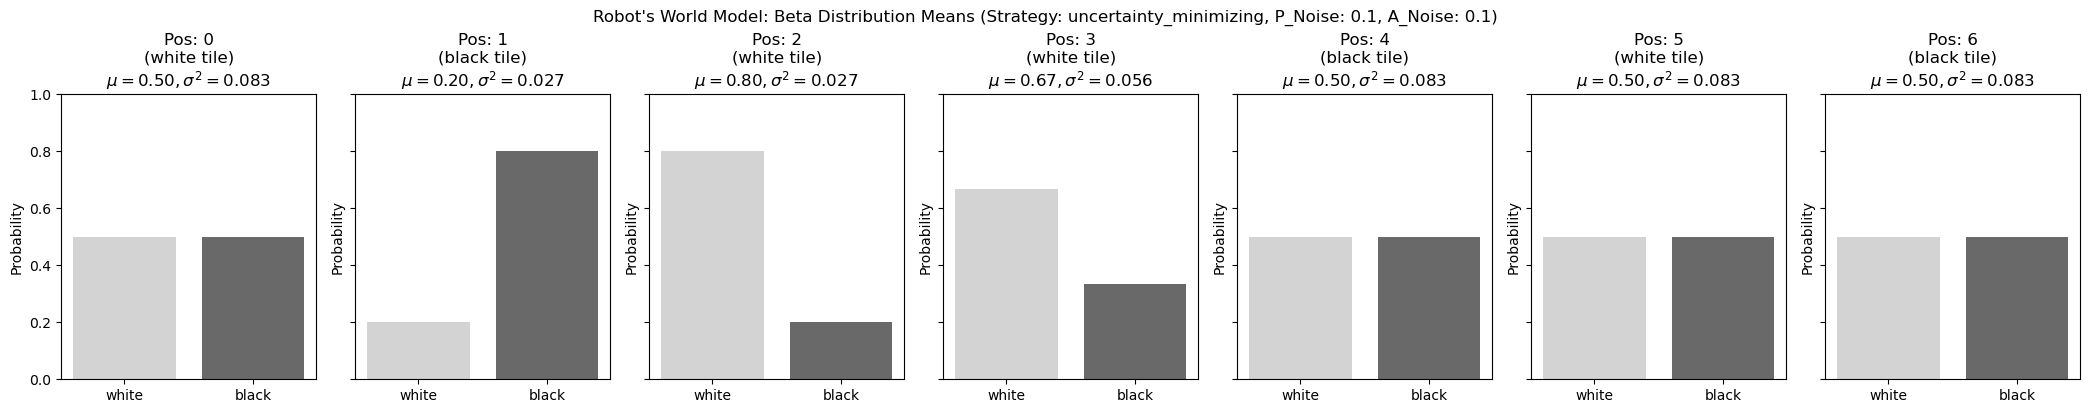

Robot intended and executed action: left
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 8/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


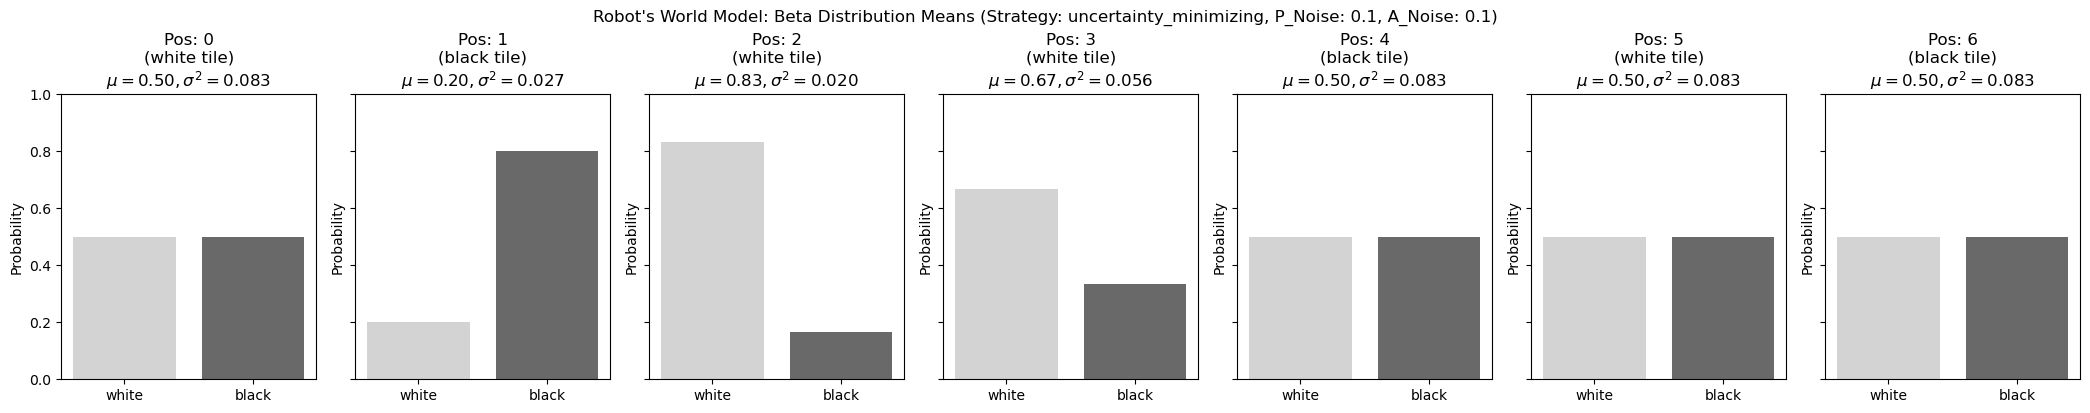

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 9/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


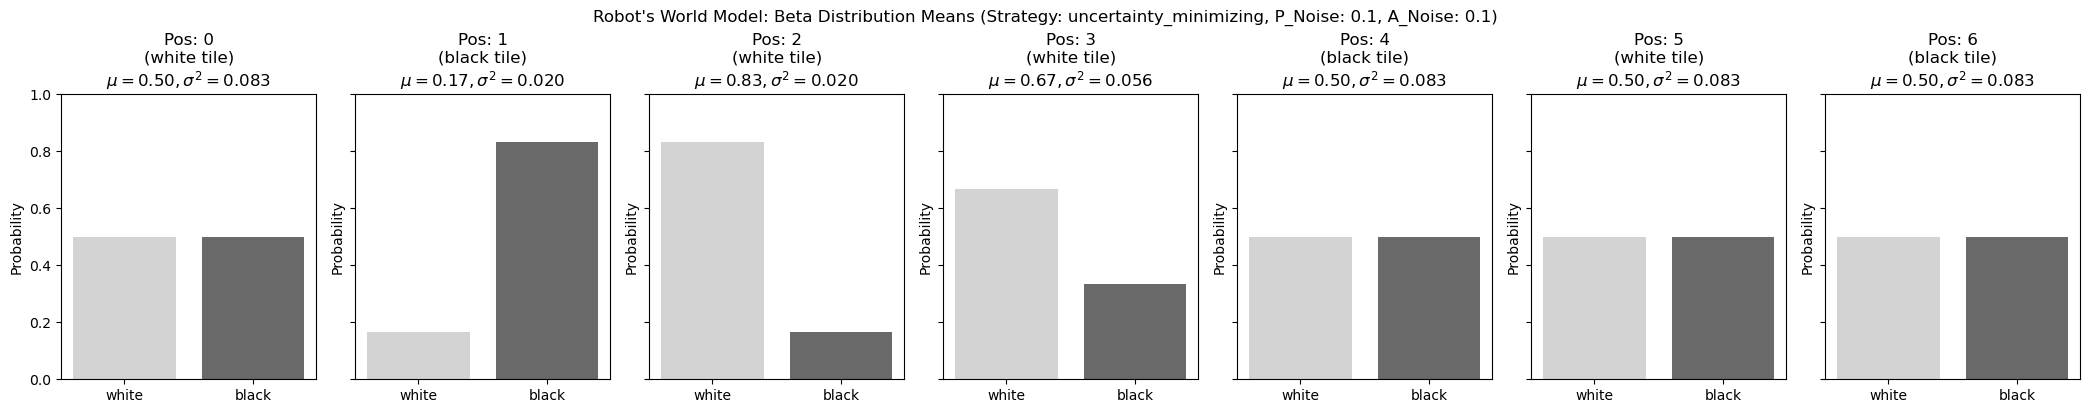

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 10/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


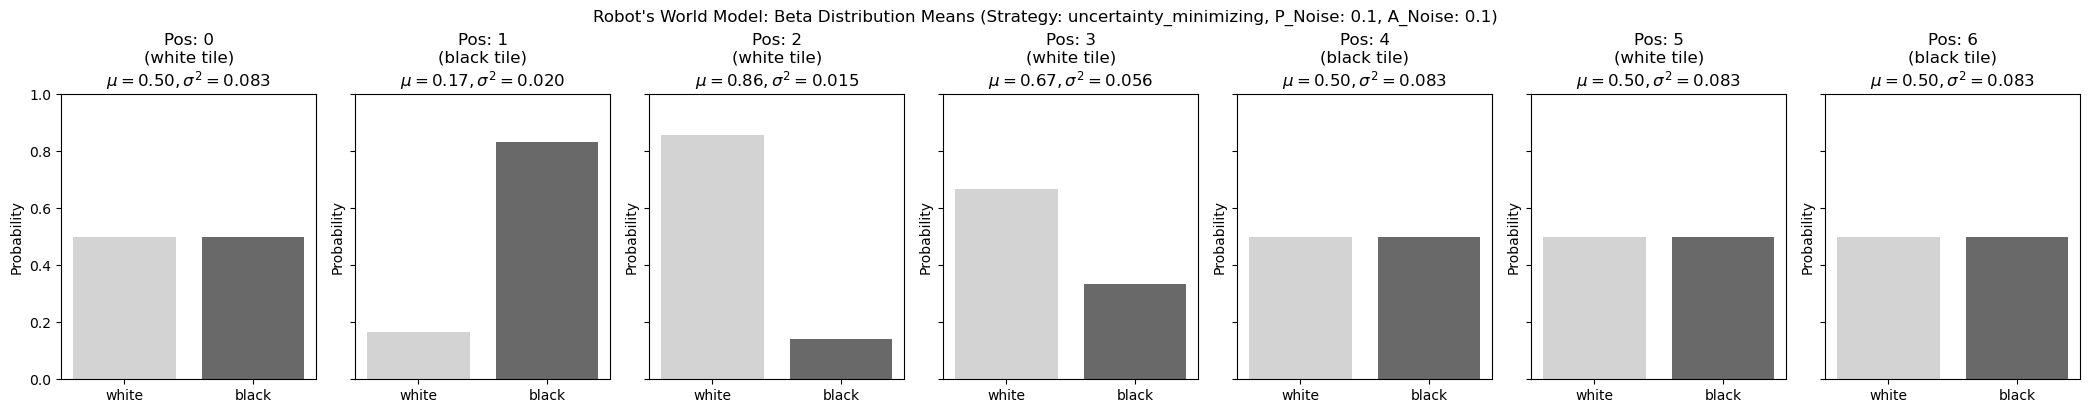

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 11/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


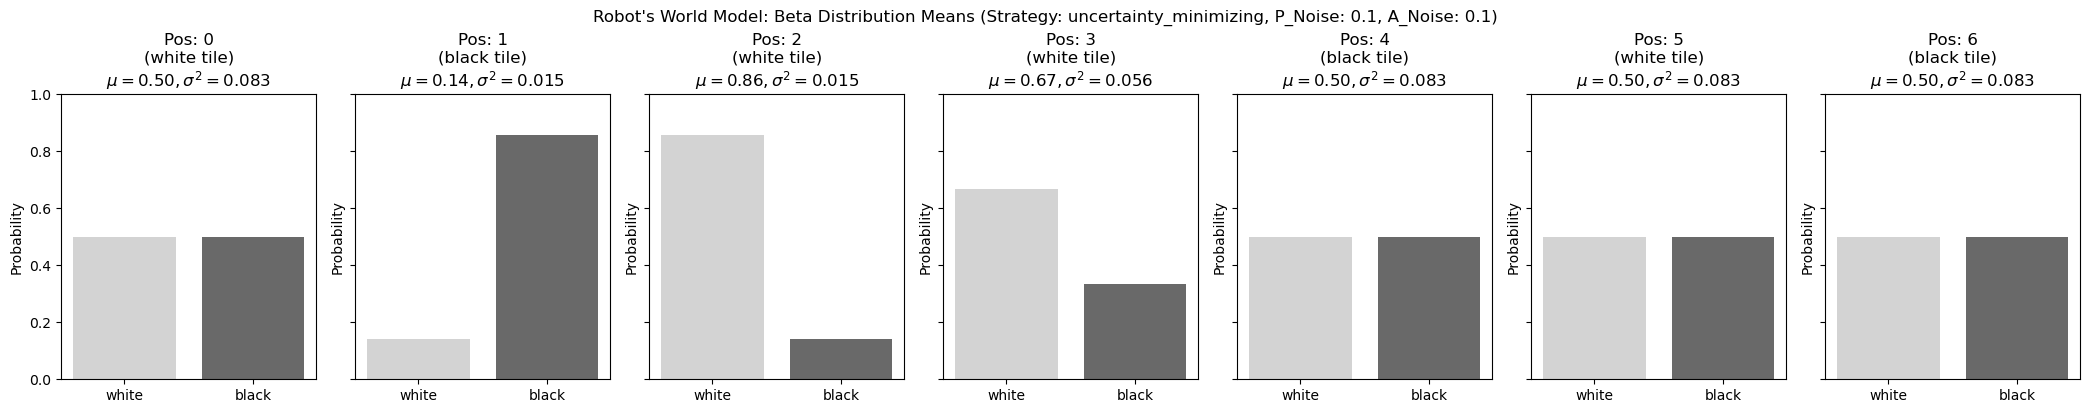

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 12/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes black tile (actual: white).


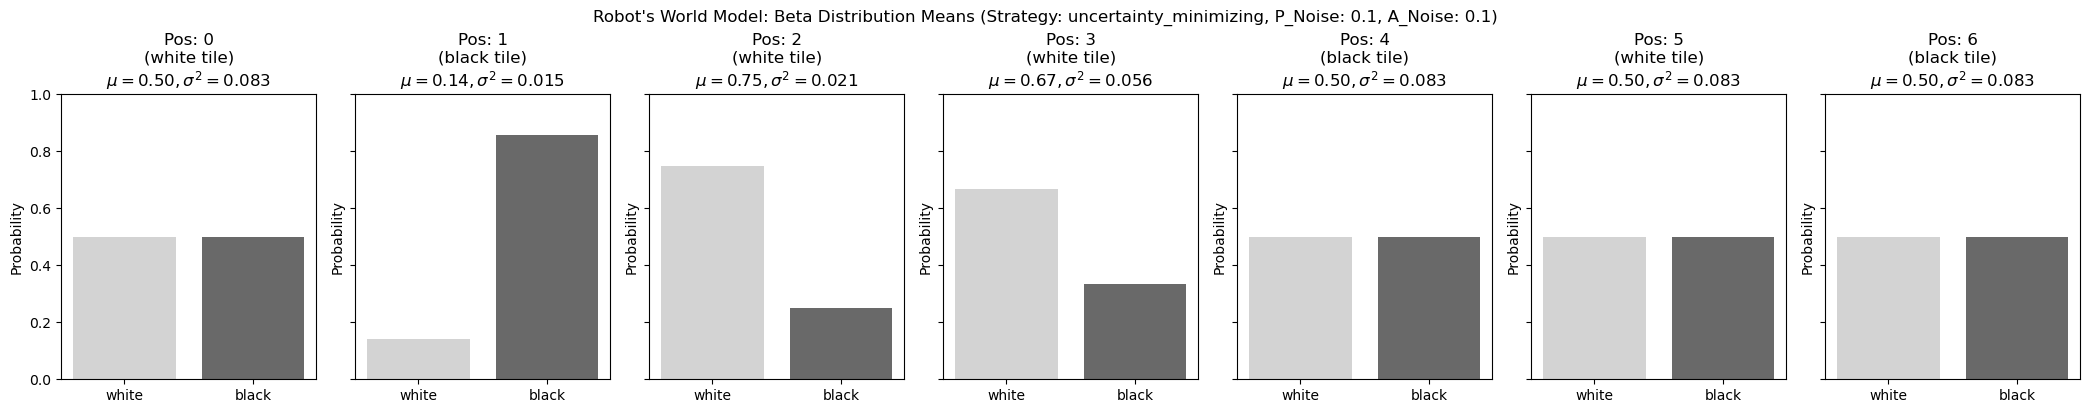

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 13/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


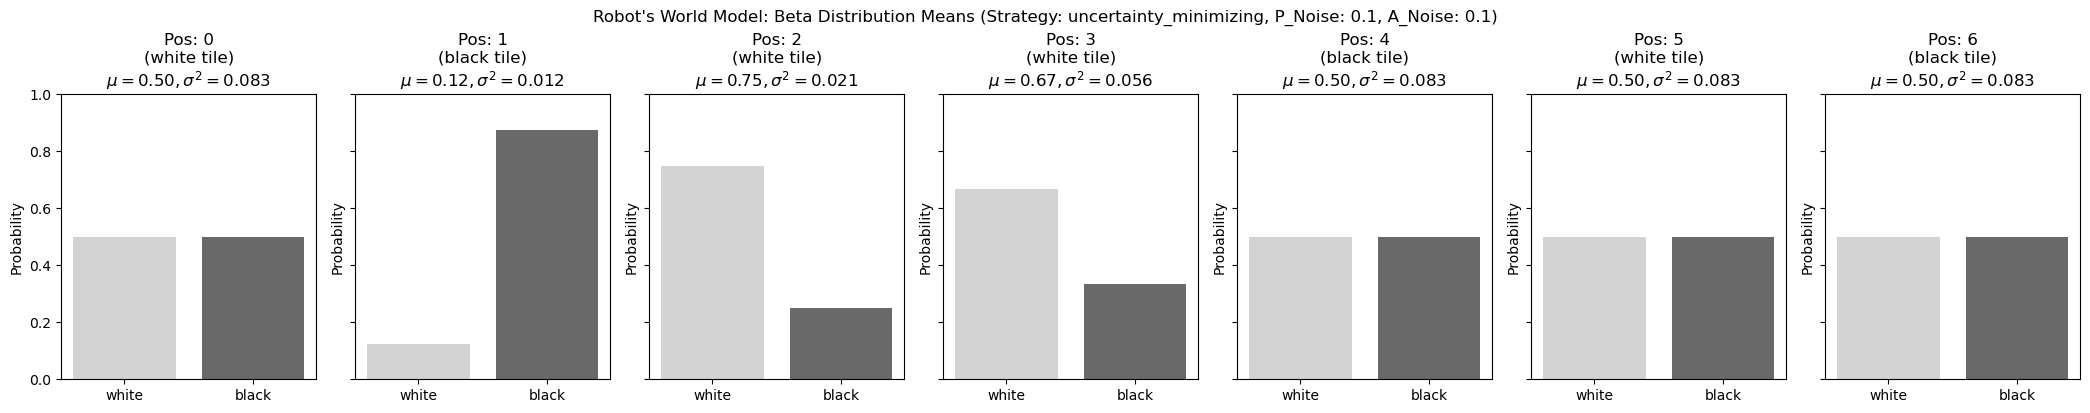

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 14/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


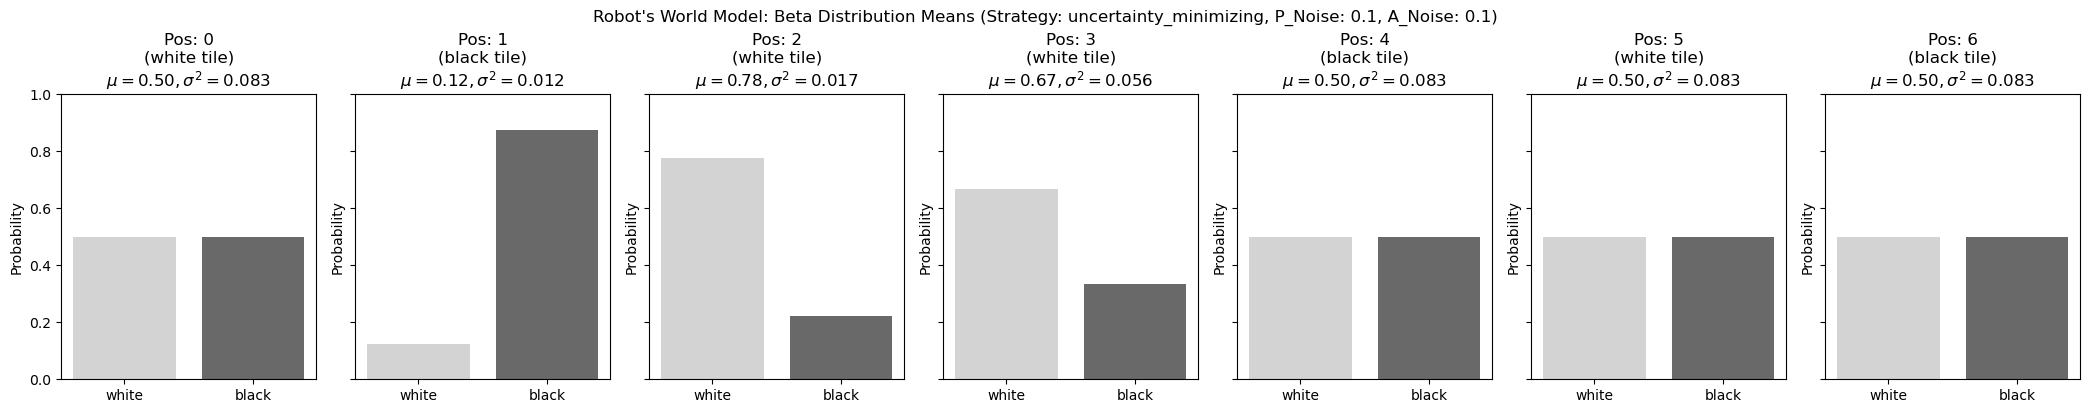

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 15/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


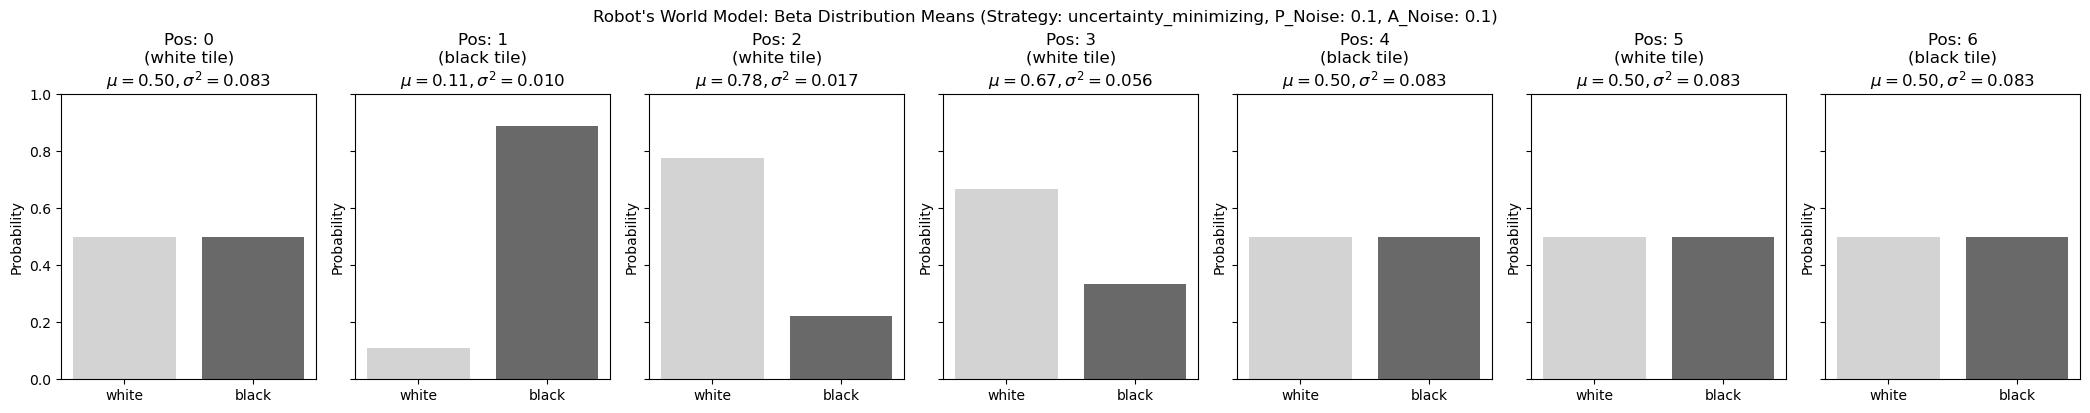

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 16/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


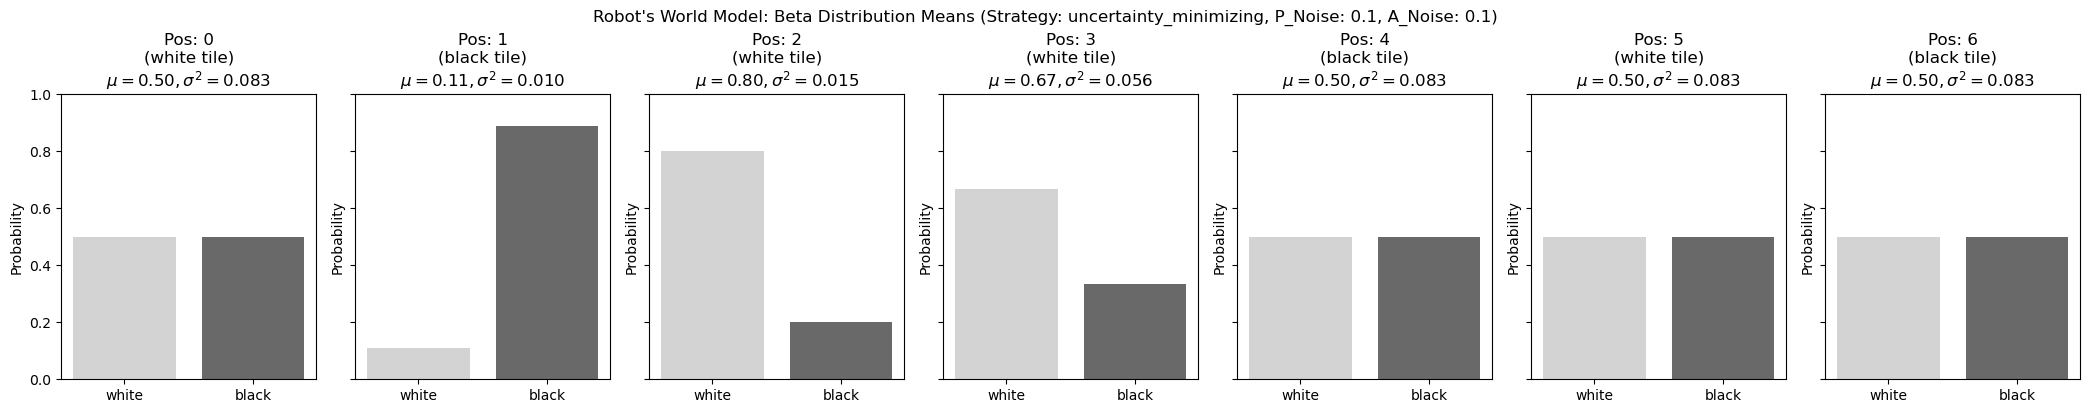

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 17/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


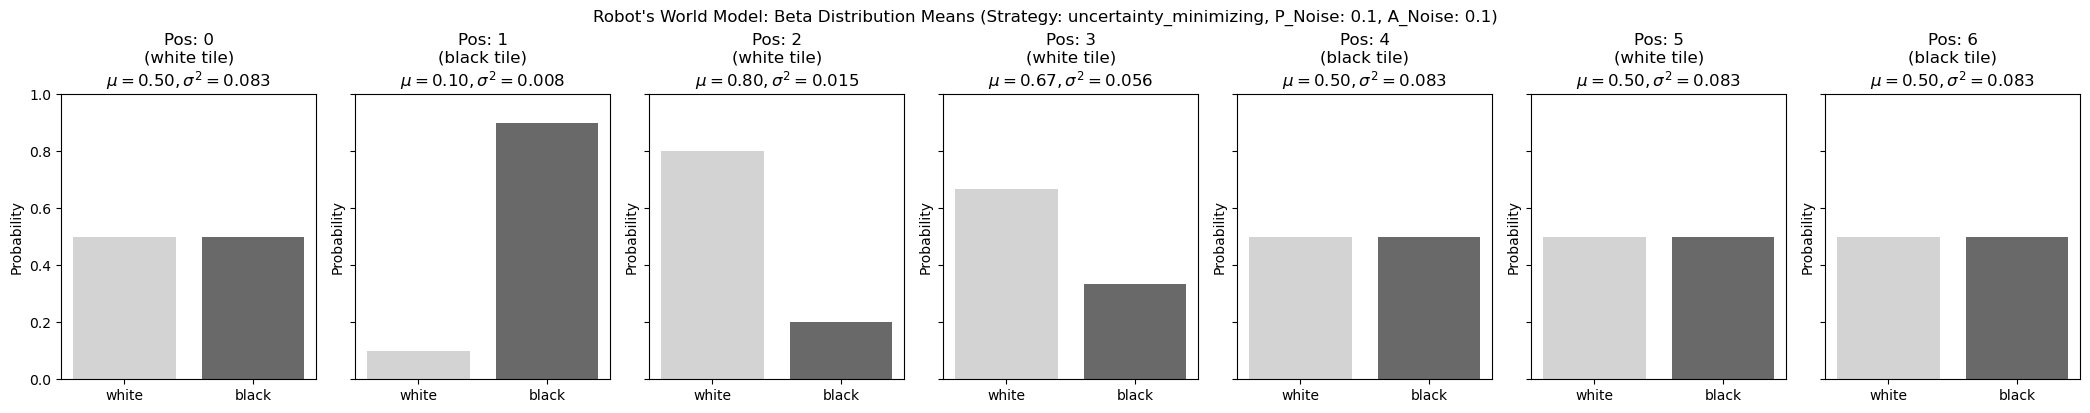

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 18/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


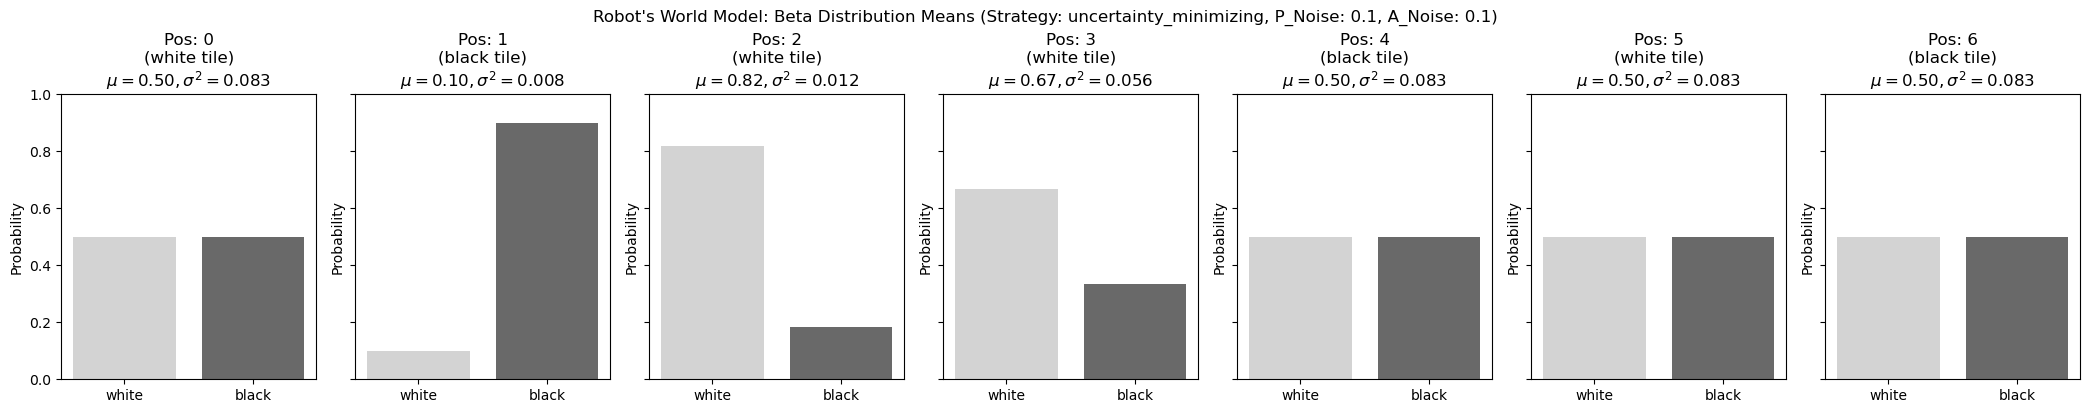

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 19/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


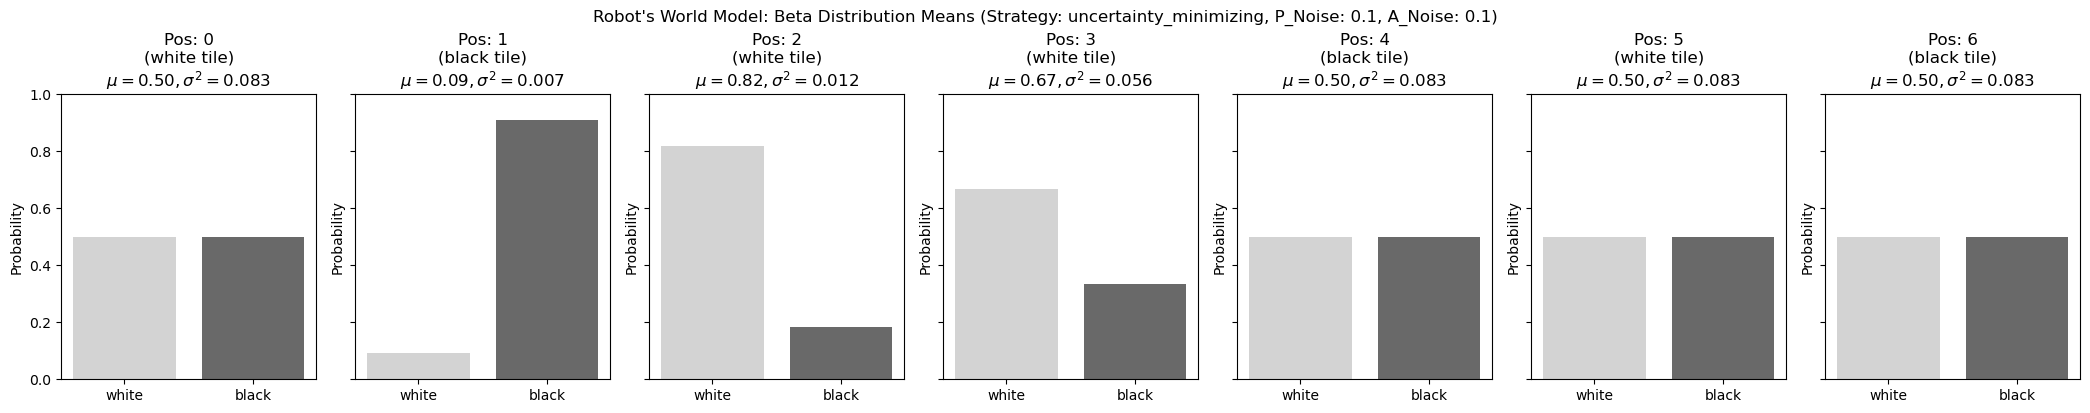

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 20/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


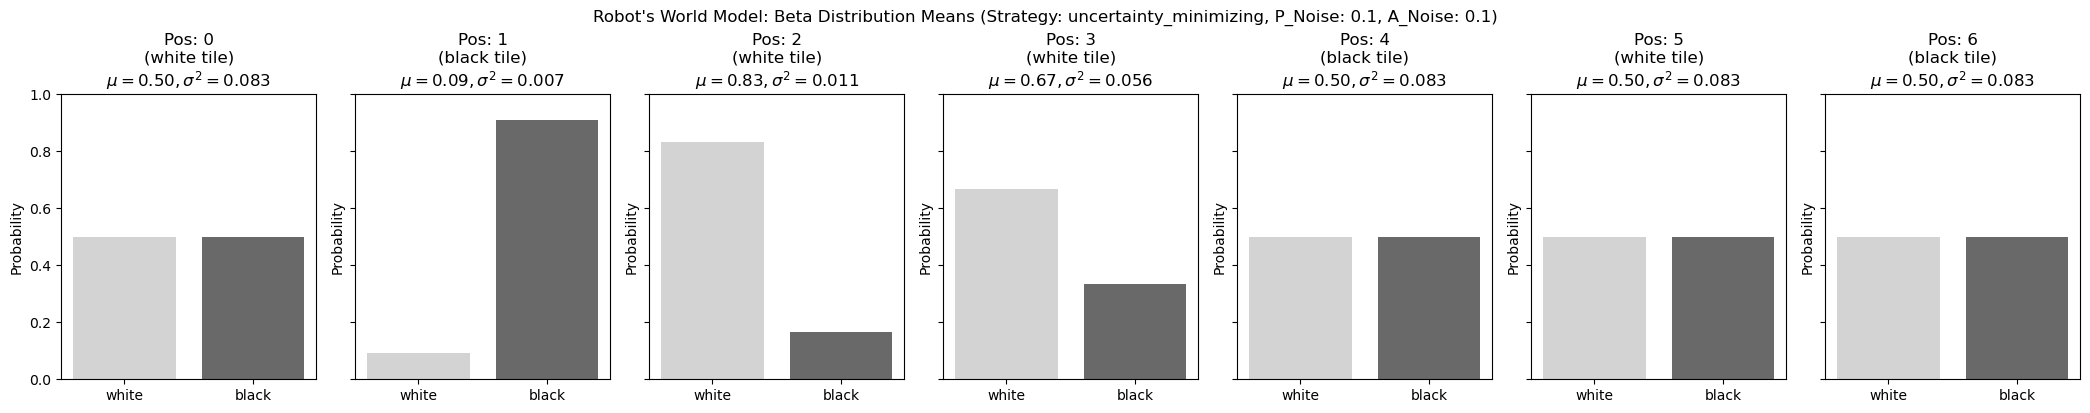

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 21/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


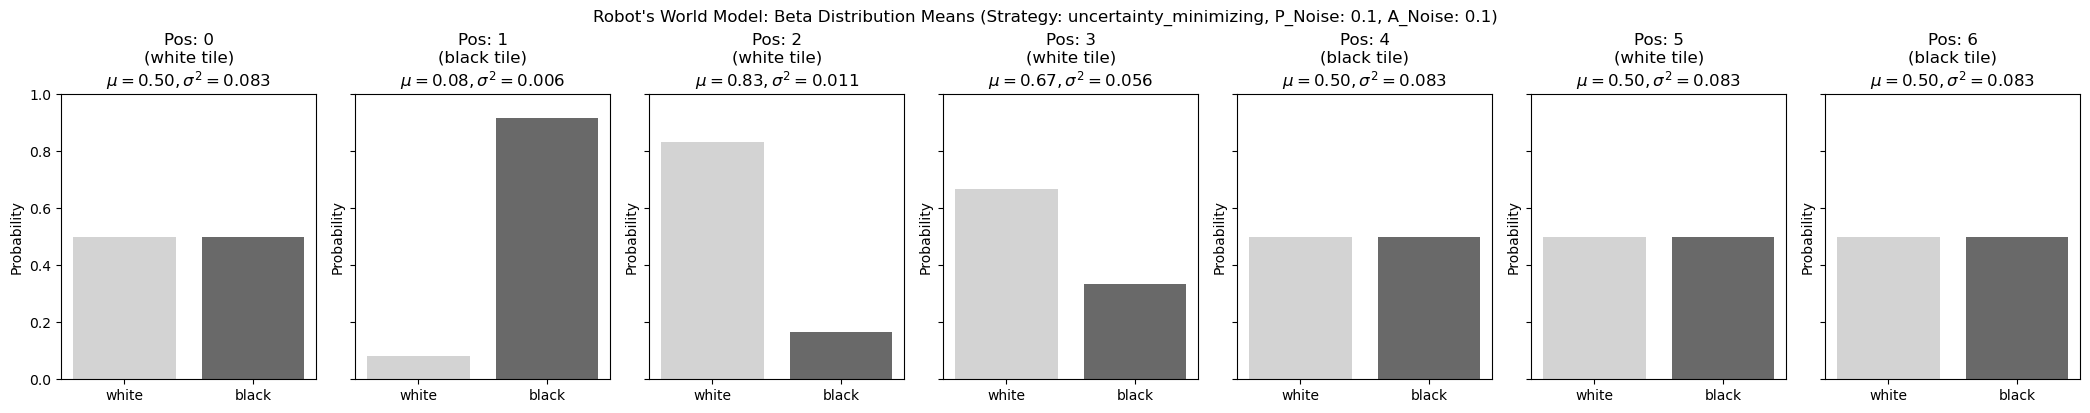

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 22/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


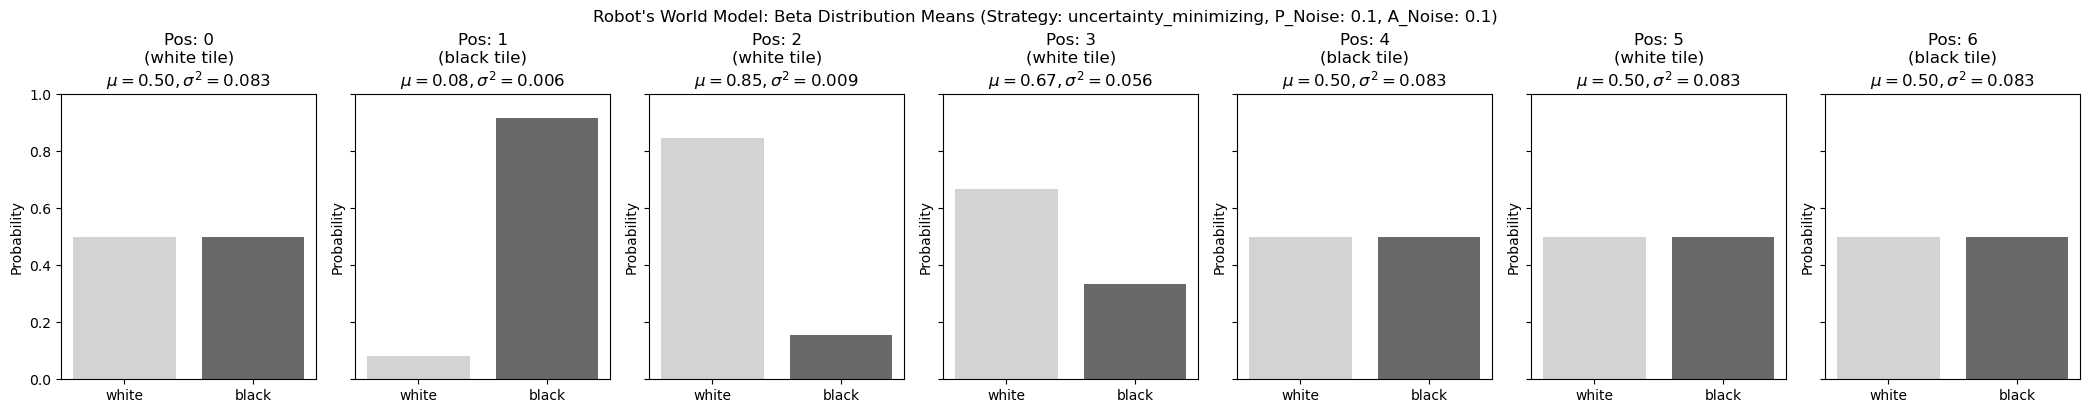

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 23/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


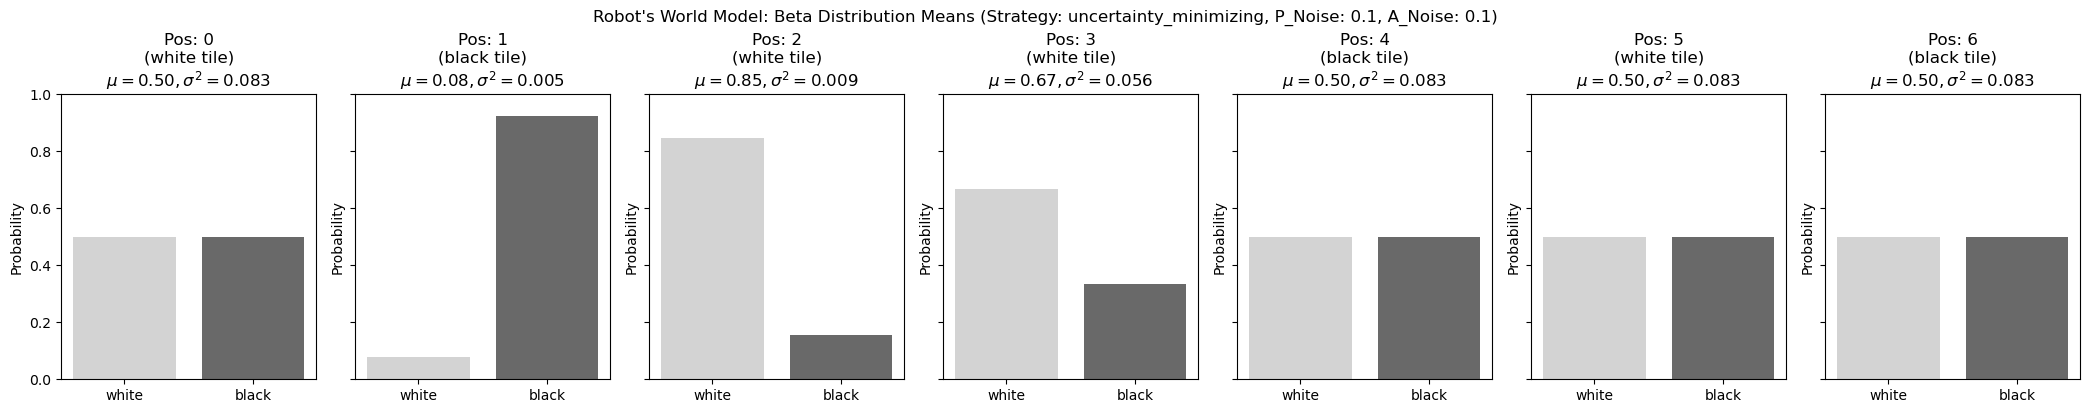

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 24/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


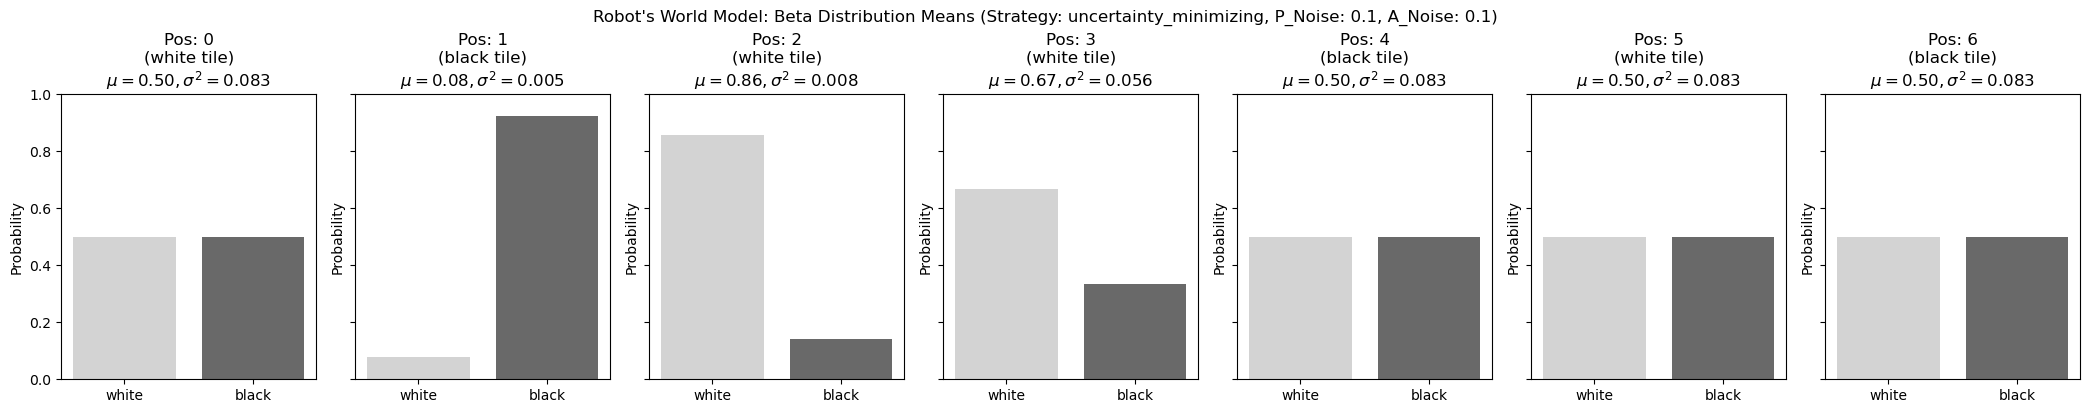

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 25/25 (Uncertainty Minimizing, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


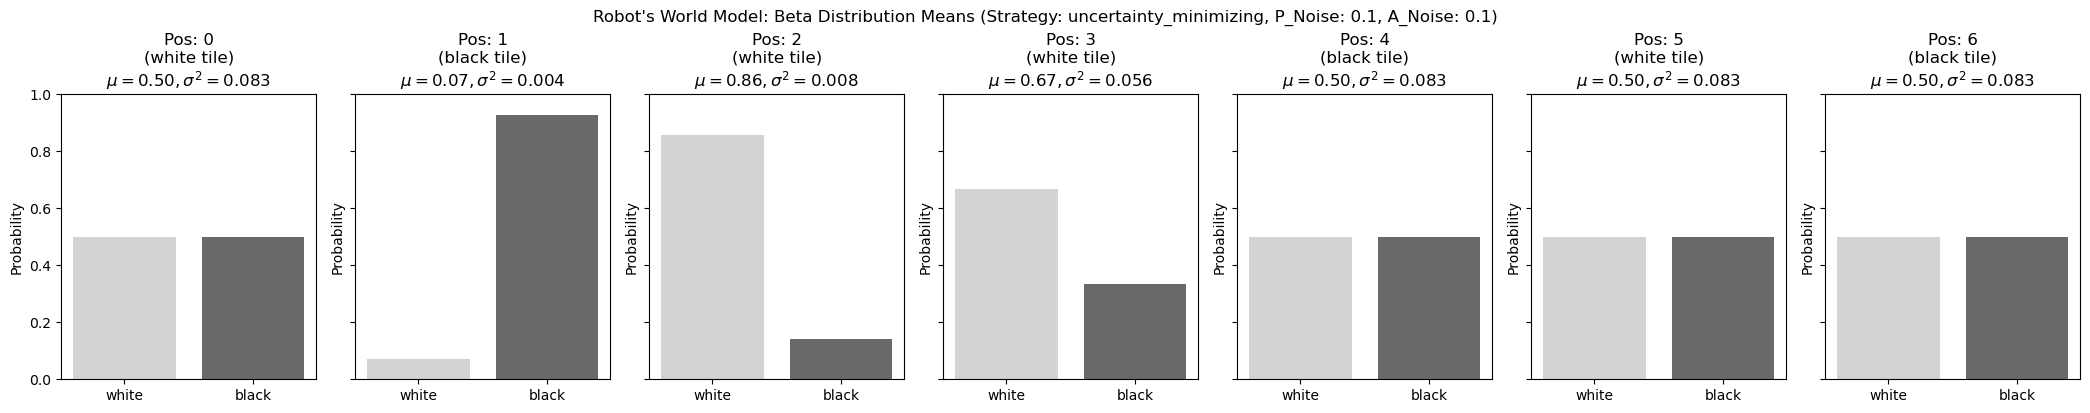

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------


--- Running Adventurous Robot with 10% Noise ---
Robot started at position 1 on a black tile.
Strategy: adventurous, Initial Beta: 1/1
--------------------------------------------------
--- Step 1/25 (Adventurous, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


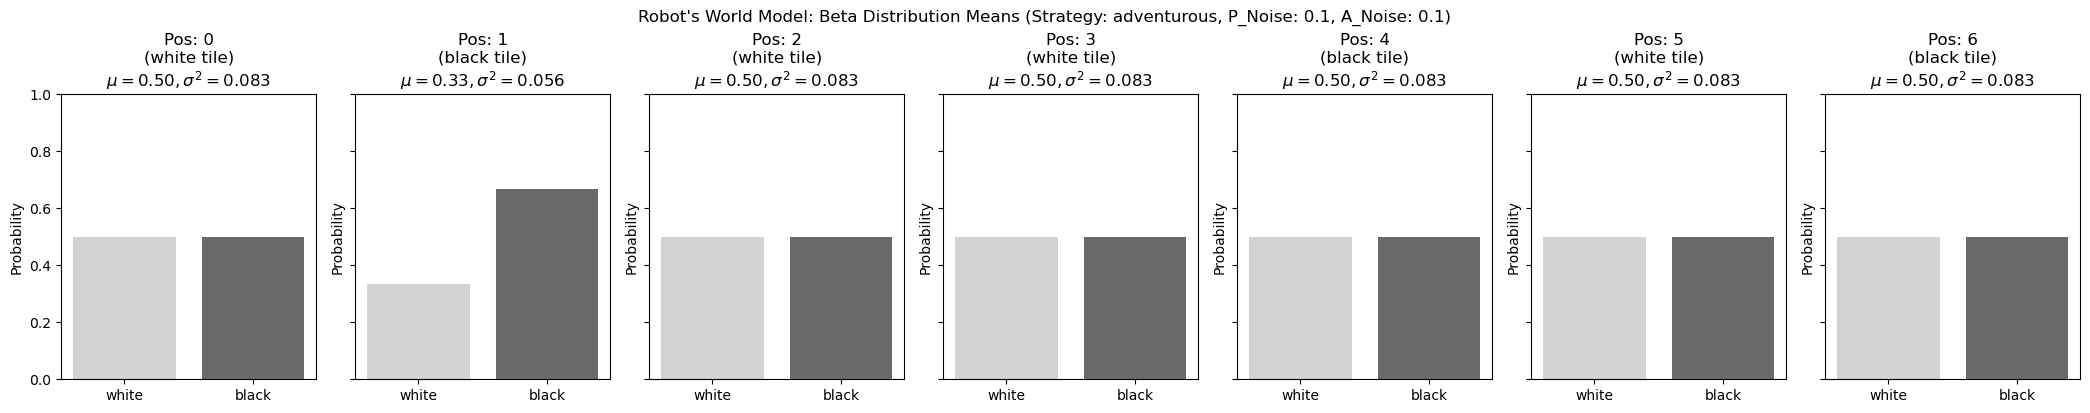

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 2/25 (Adventurous, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


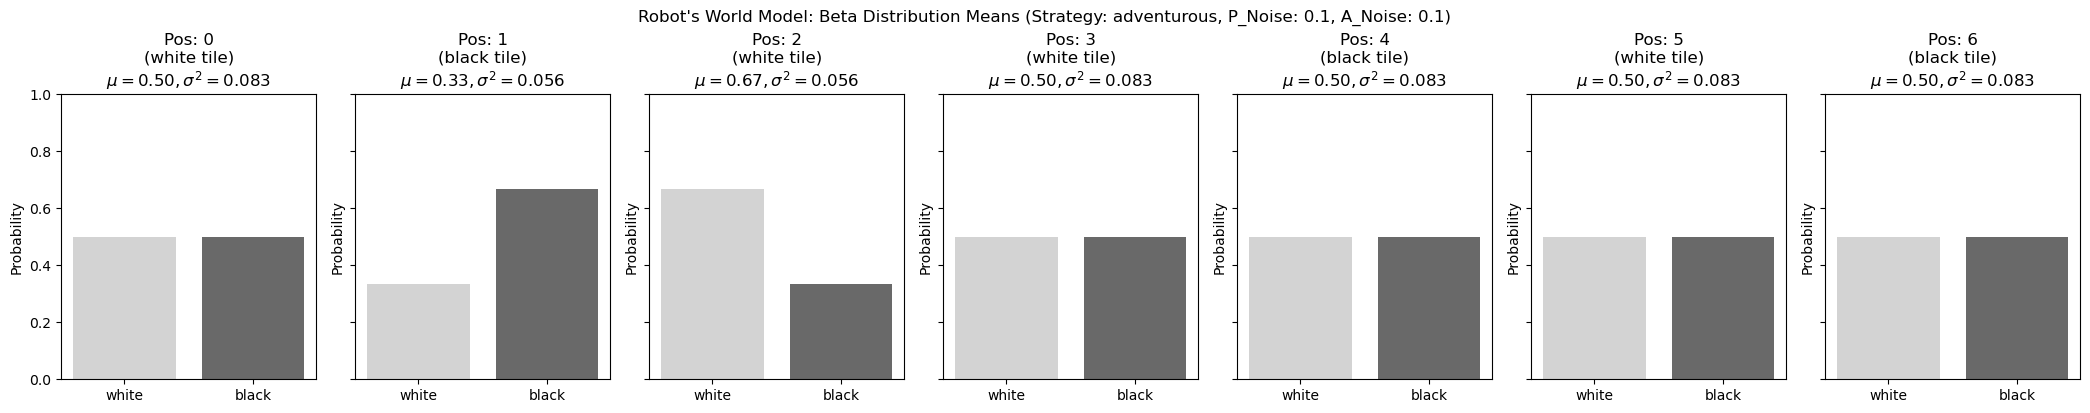

Robot intended and executed action: right
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 3/25 (Adventurous, 10% Noise) ---
Robot is at position 3, observes white tile (actual: white).


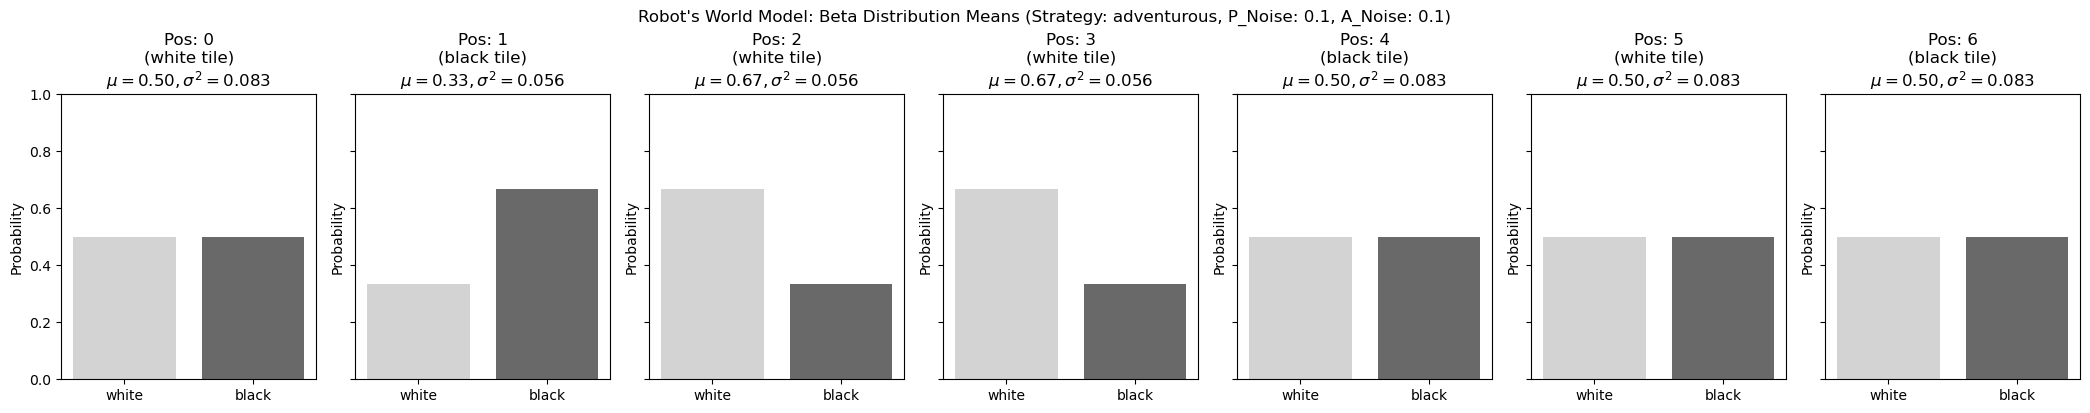

Robot intended and executed action: right
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 4/25 (Adventurous, 10% Noise) ---
Robot is at position 4, observes black tile (actual: black).


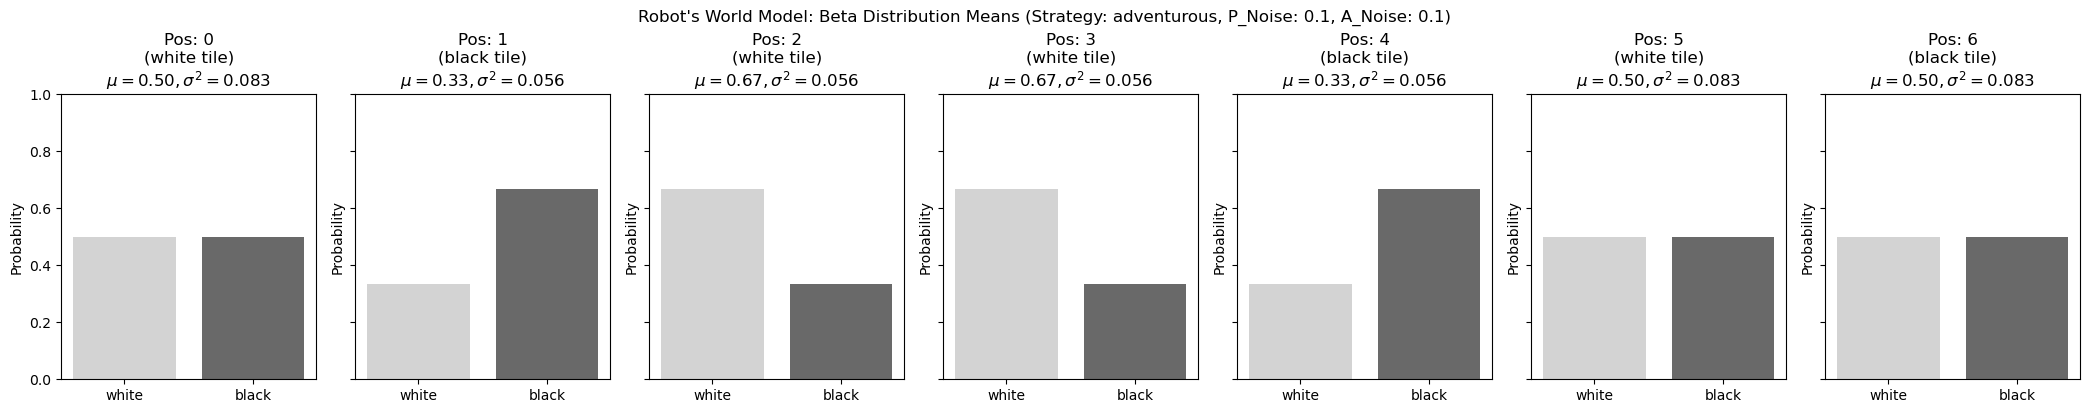

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 5/25 (Adventurous, 10% Noise) ---
Robot is at position 5, observes white tile (actual: white).


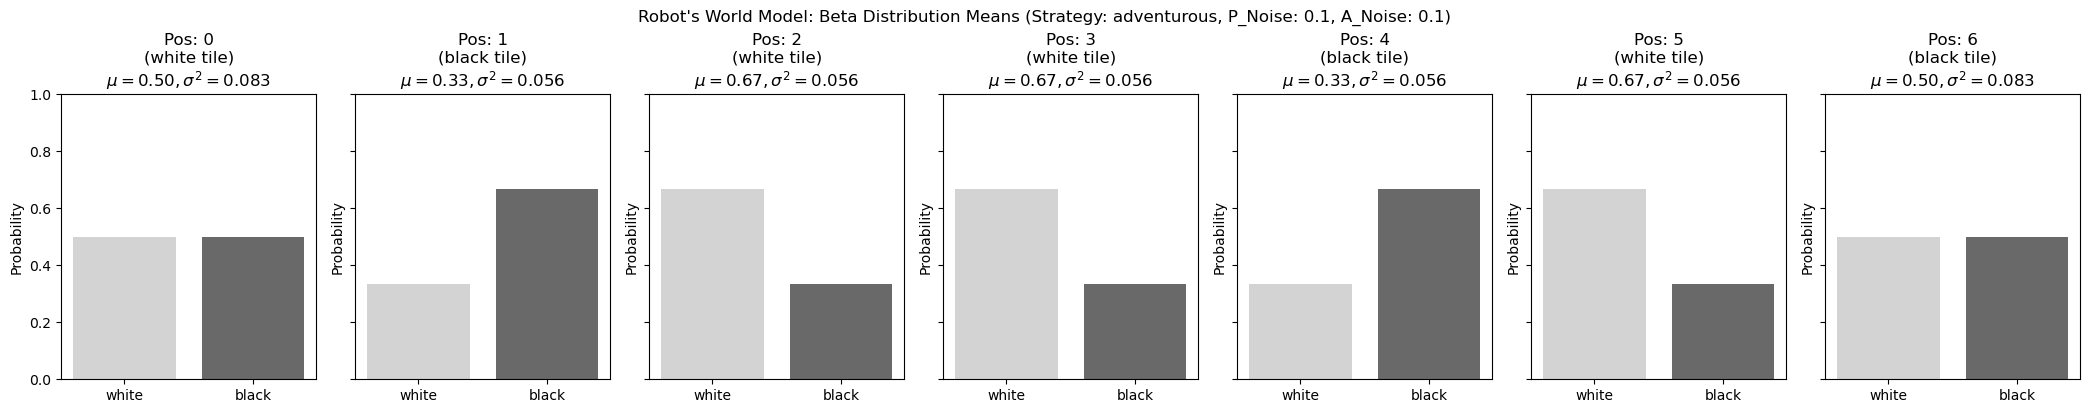

Robot intended to move right, but due to noise, moved left!
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 6/25 (Adventurous, 10% Noise) ---
Robot is at position 4, observes black tile (actual: black).


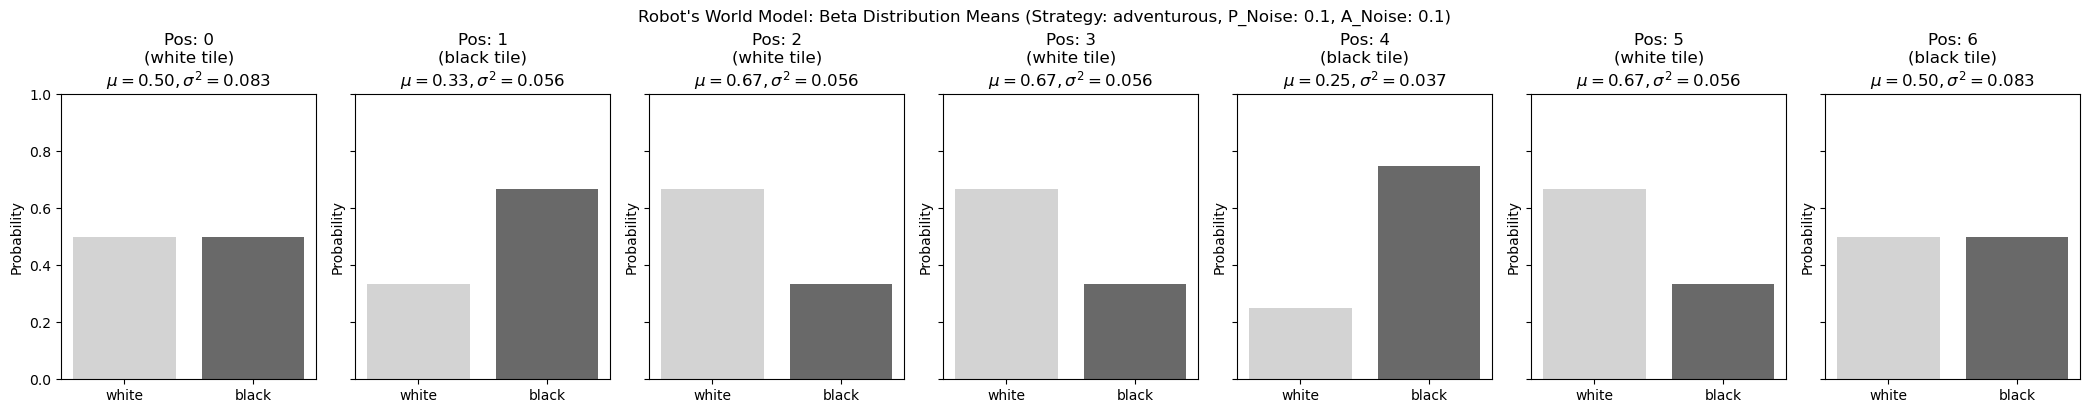

Robot intended and executed action: left
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 7/25 (Adventurous, 10% Noise) ---
Robot is at position 3, observes white tile (actual: white).


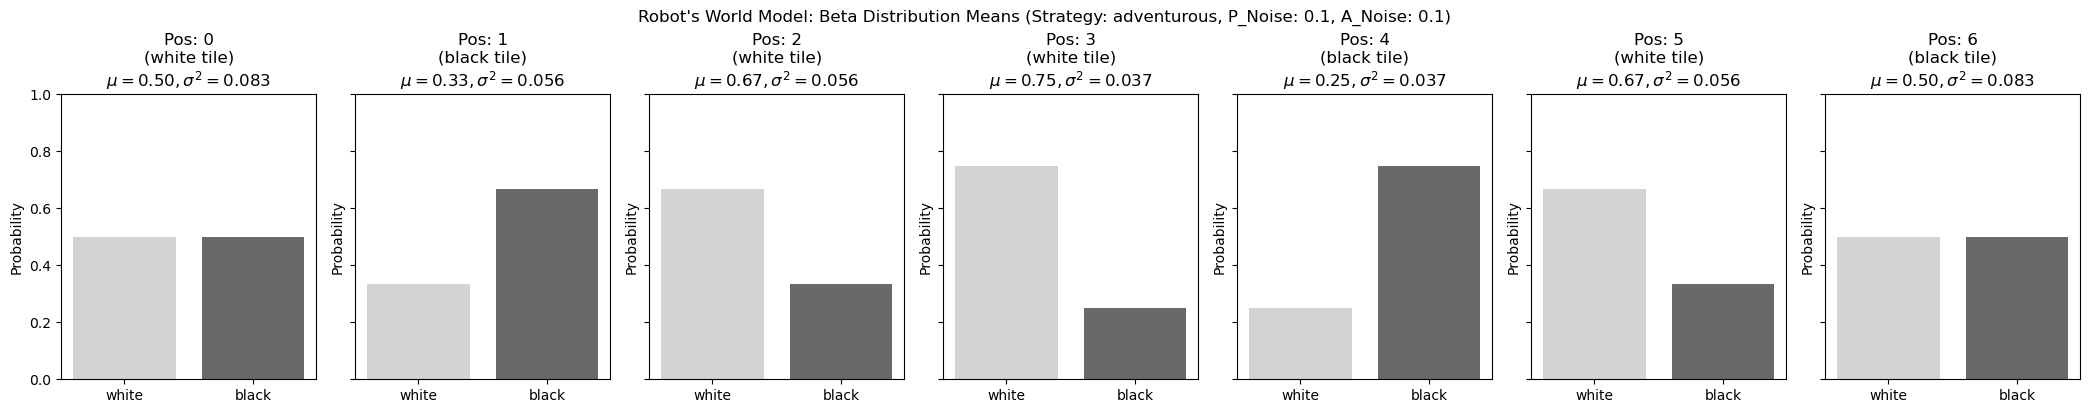

Robot intended and executed action: left
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 8/25 (Adventurous, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


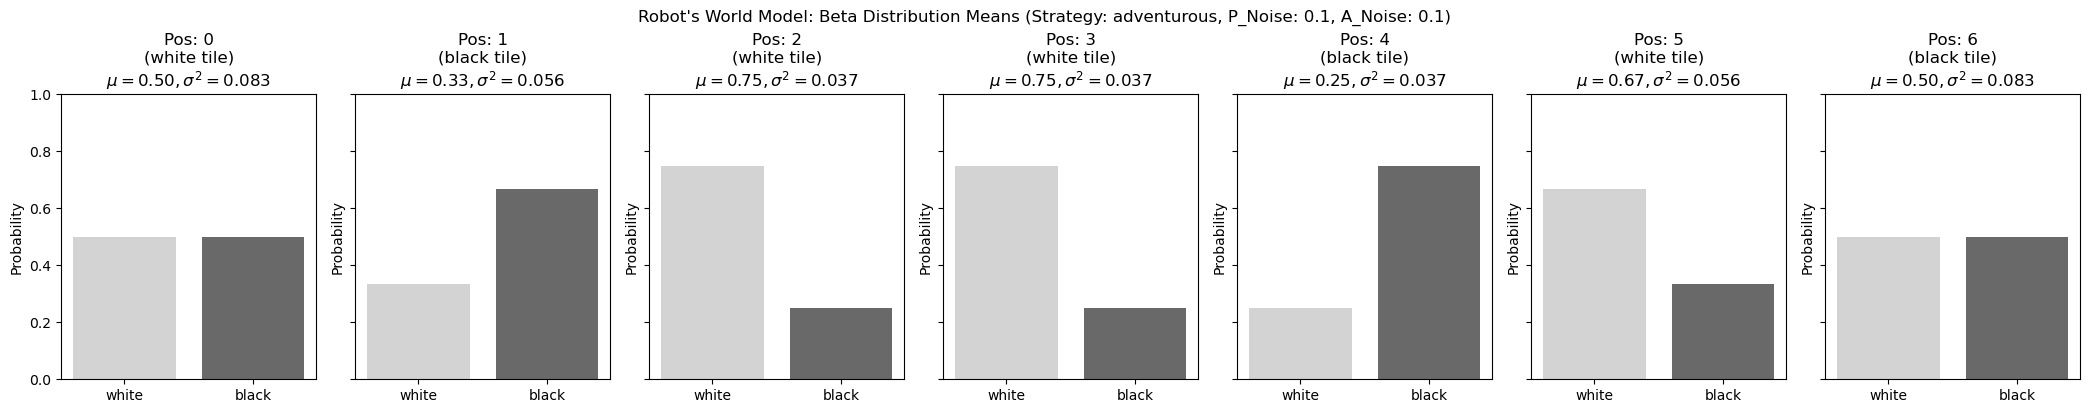

Robot intended to move left, but due to noise, moved right!
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 9/25 (Adventurous, 10% Noise) ---
Robot is at position 3, observes white tile (actual: white).


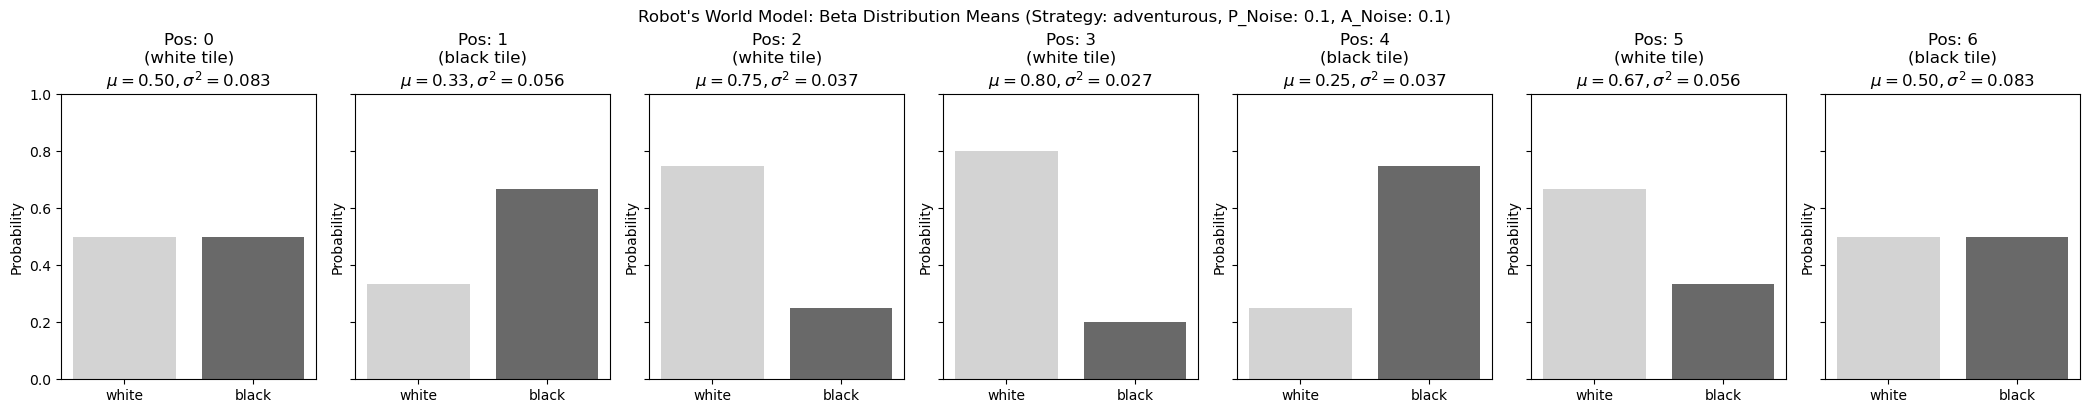

Robot intended and executed action: left
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 10/25 (Adventurous, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


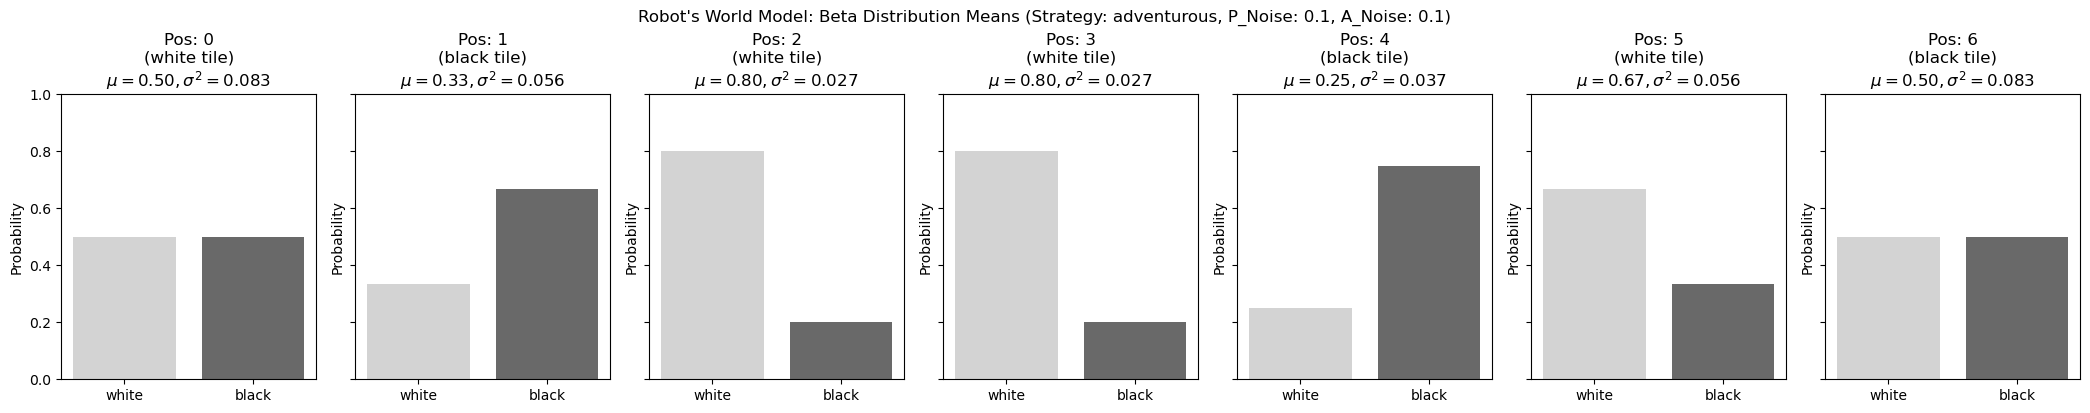

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 11/25 (Adventurous, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


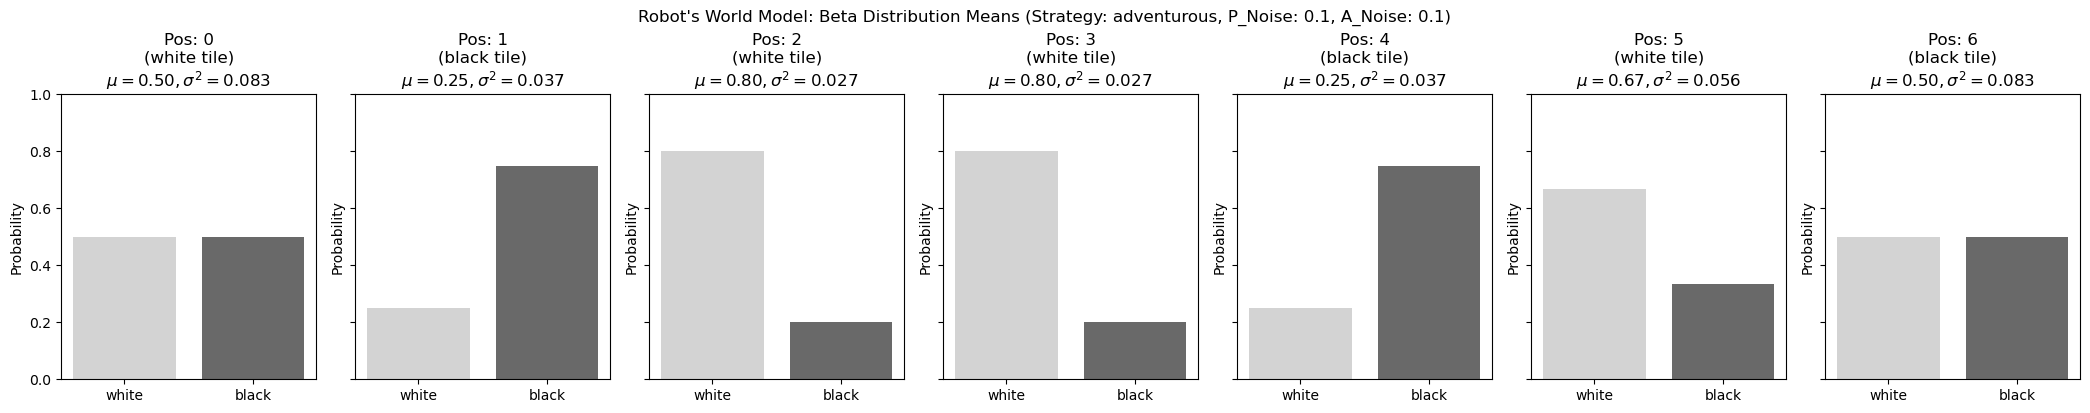

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 12/25 (Adventurous, 10% Noise) ---
Robot is at position 0, observes white tile (actual: white).


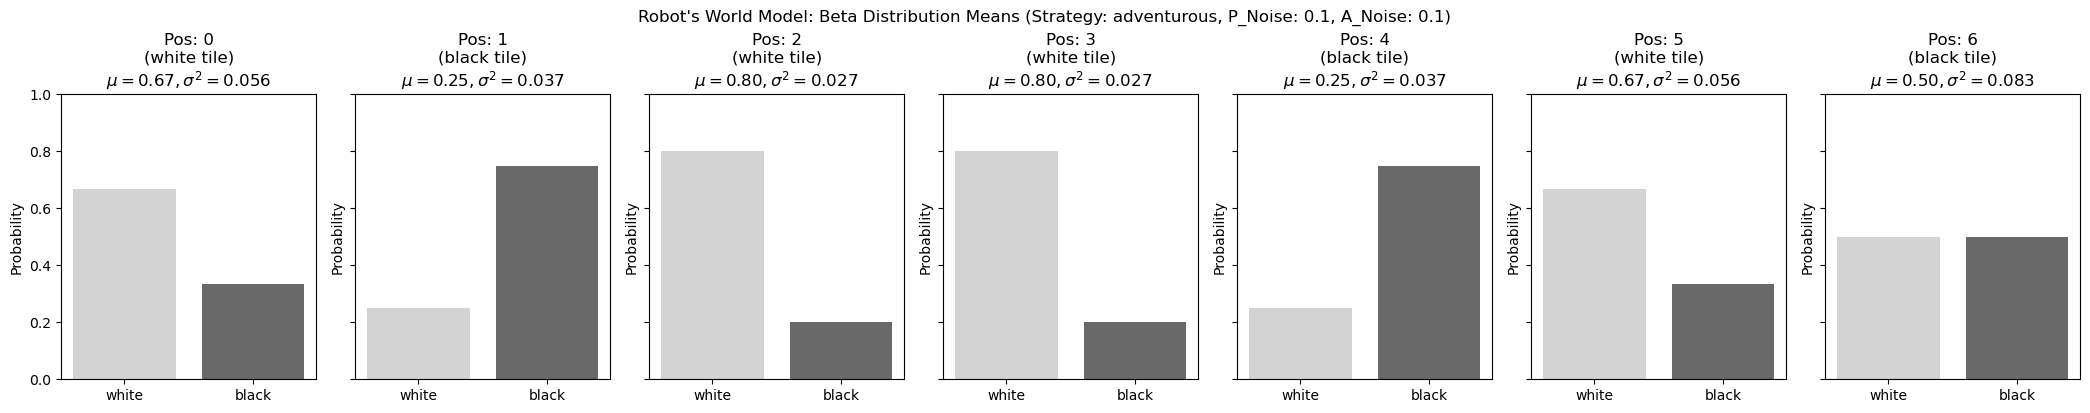

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 13/25 (Adventurous, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


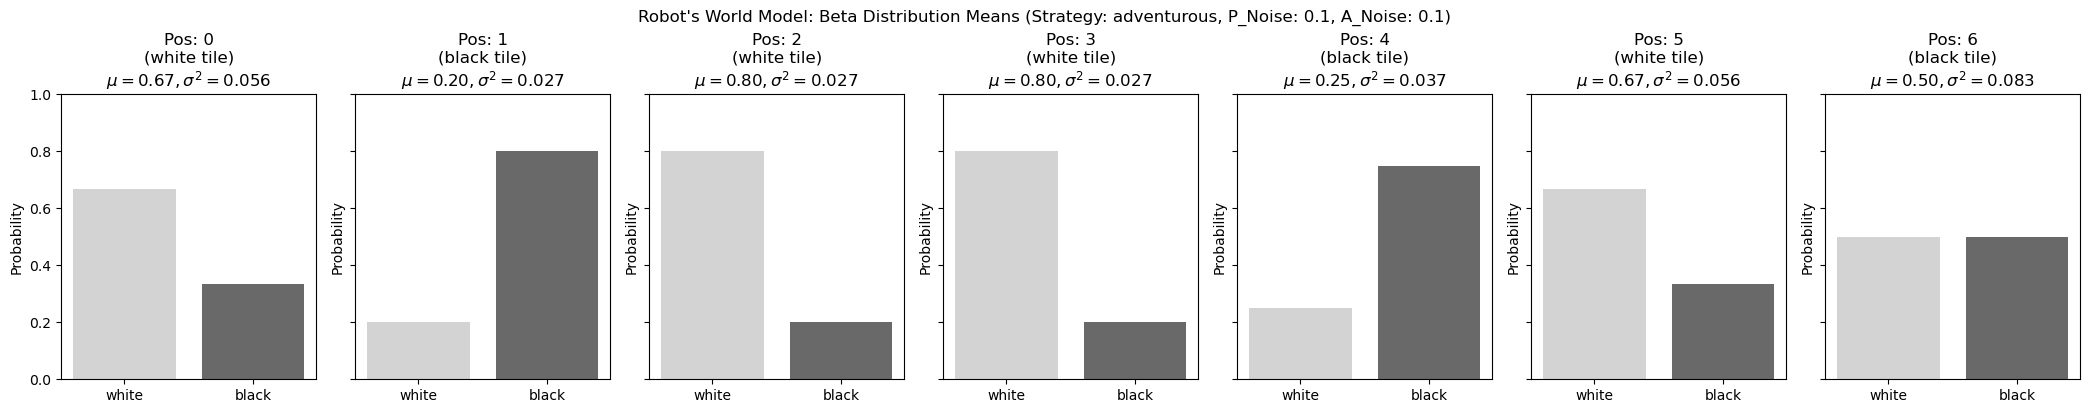

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 14/25 (Adventurous, 10% Noise) ---
Robot is at position 0, observes white tile (actual: white).


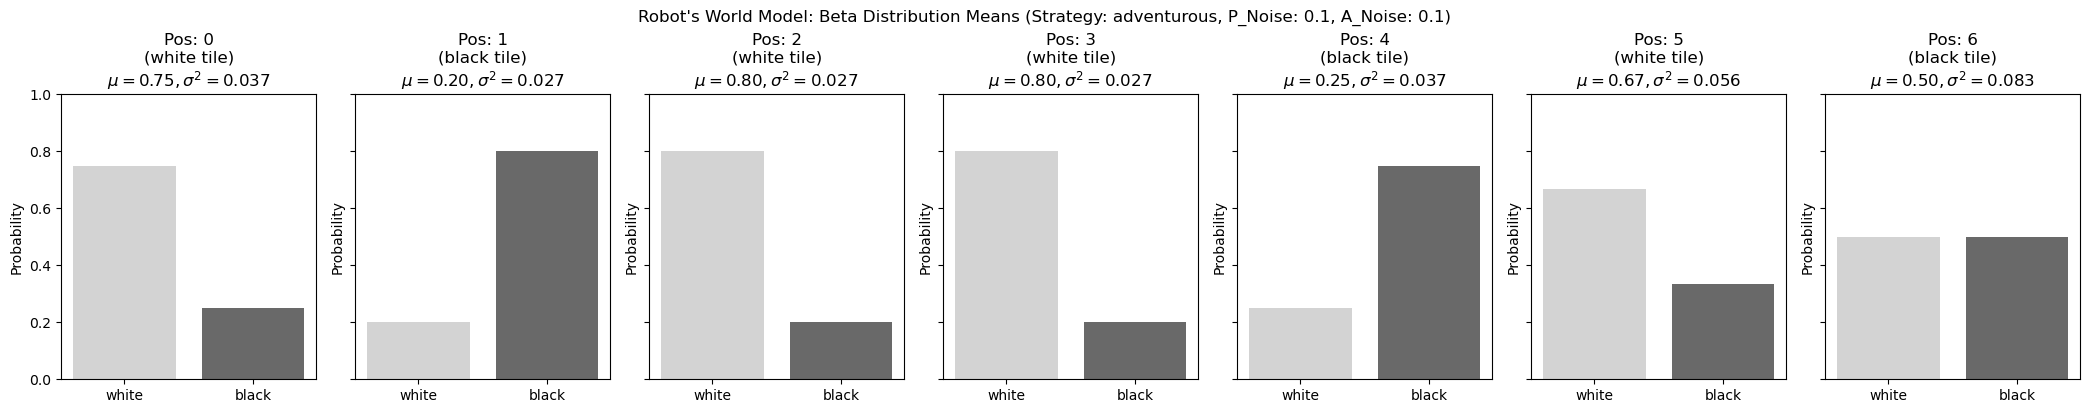

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 15/25 (Adventurous, 10% Noise) ---
Robot is at position 1, observes white tile (actual: black).


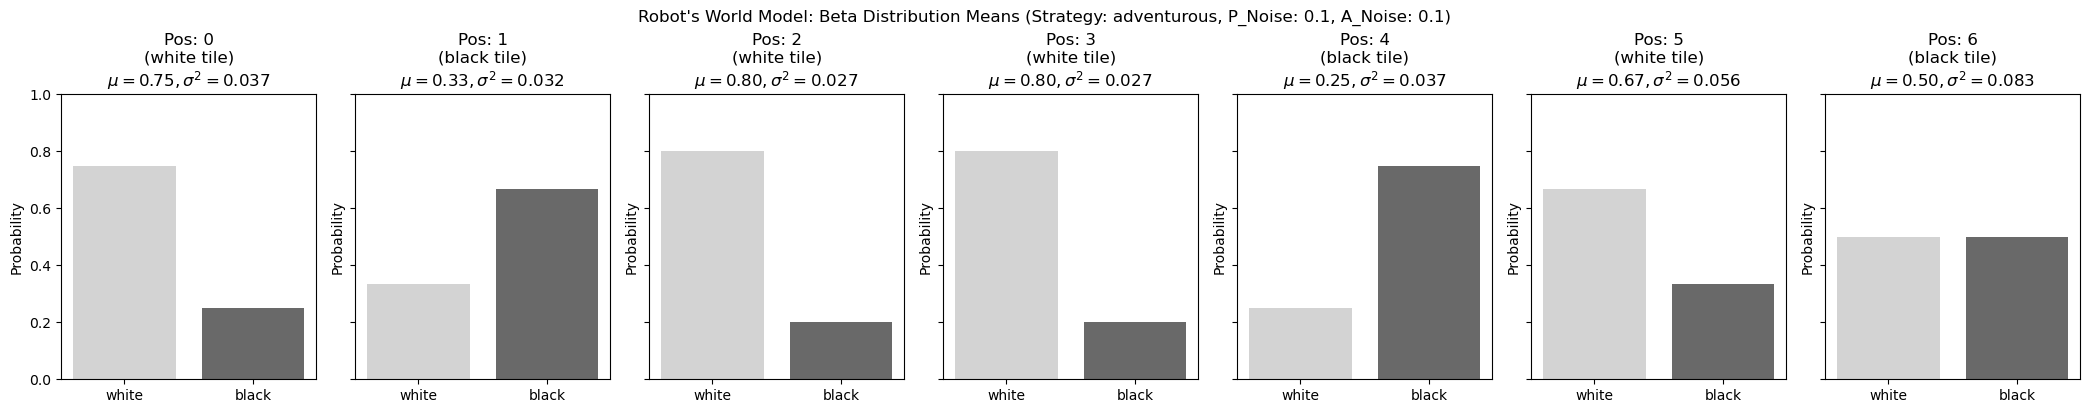

Robot intended to move left, but due to noise, moved right!
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 16/25 (Adventurous, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


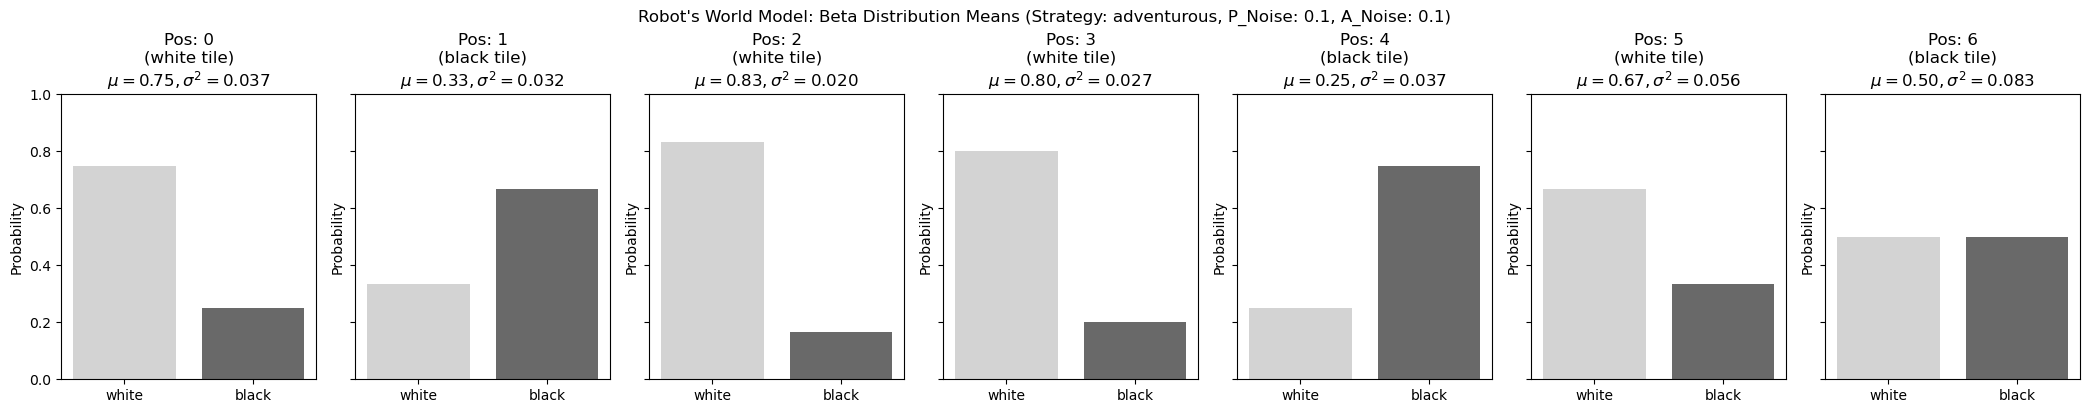

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 17/25 (Adventurous, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


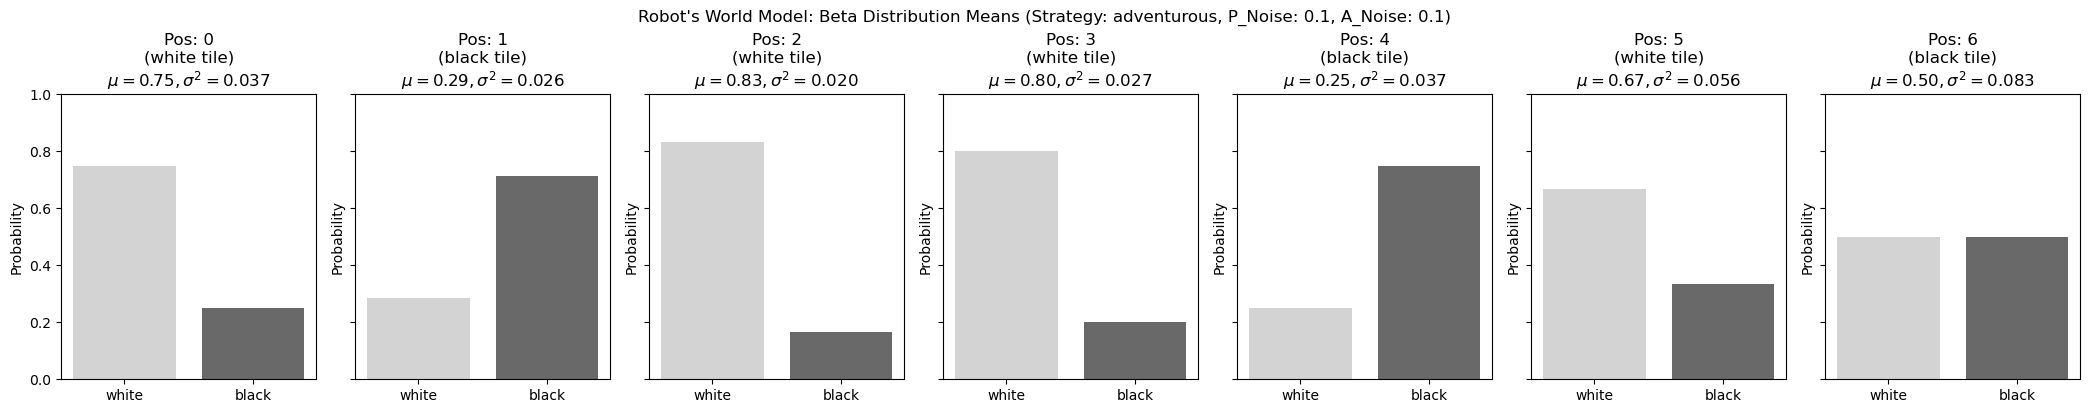

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 18/25 (Adventurous, 10% Noise) ---
Robot is at position 0, observes white tile (actual: white).


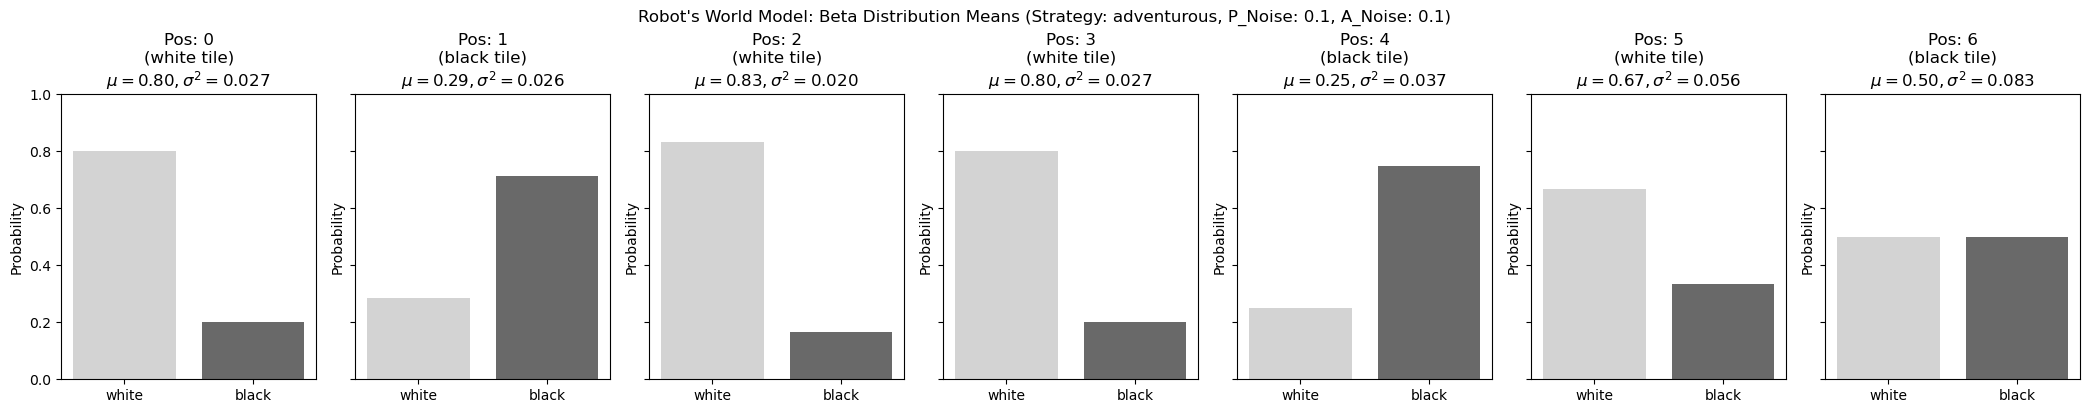

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 19/25 (Adventurous, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


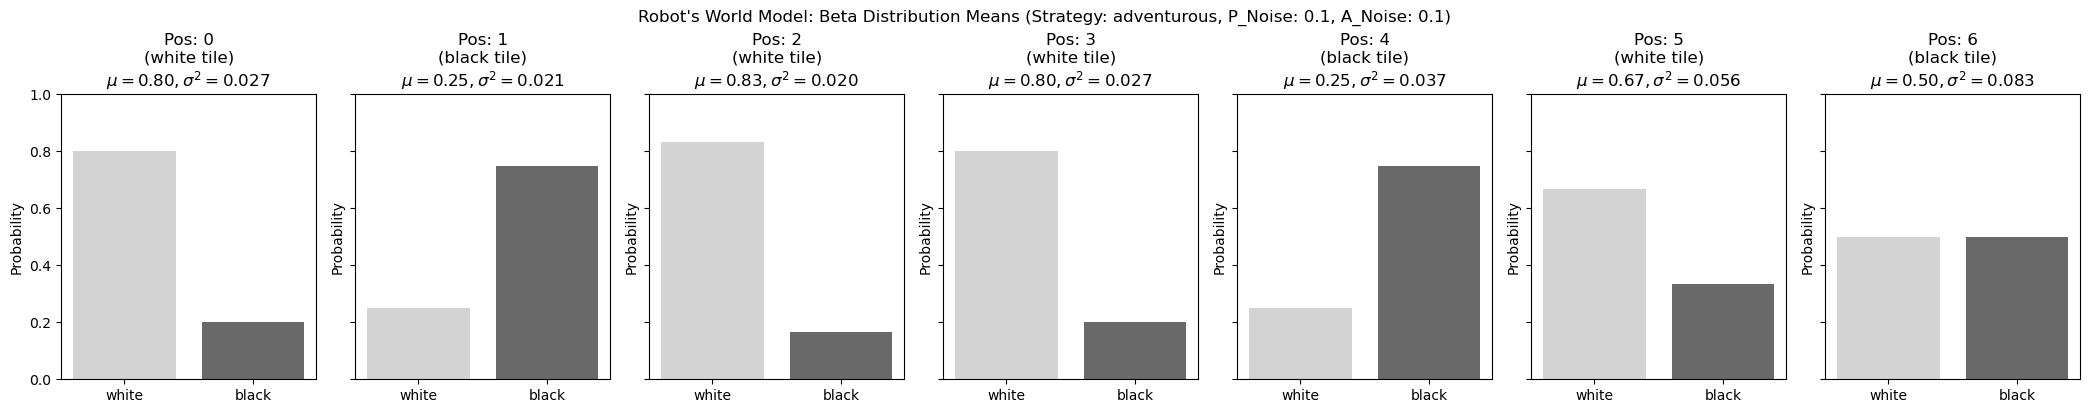

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 20/25 (Adventurous, 10% Noise) ---
Robot is at position 0, observes white tile (actual: white).


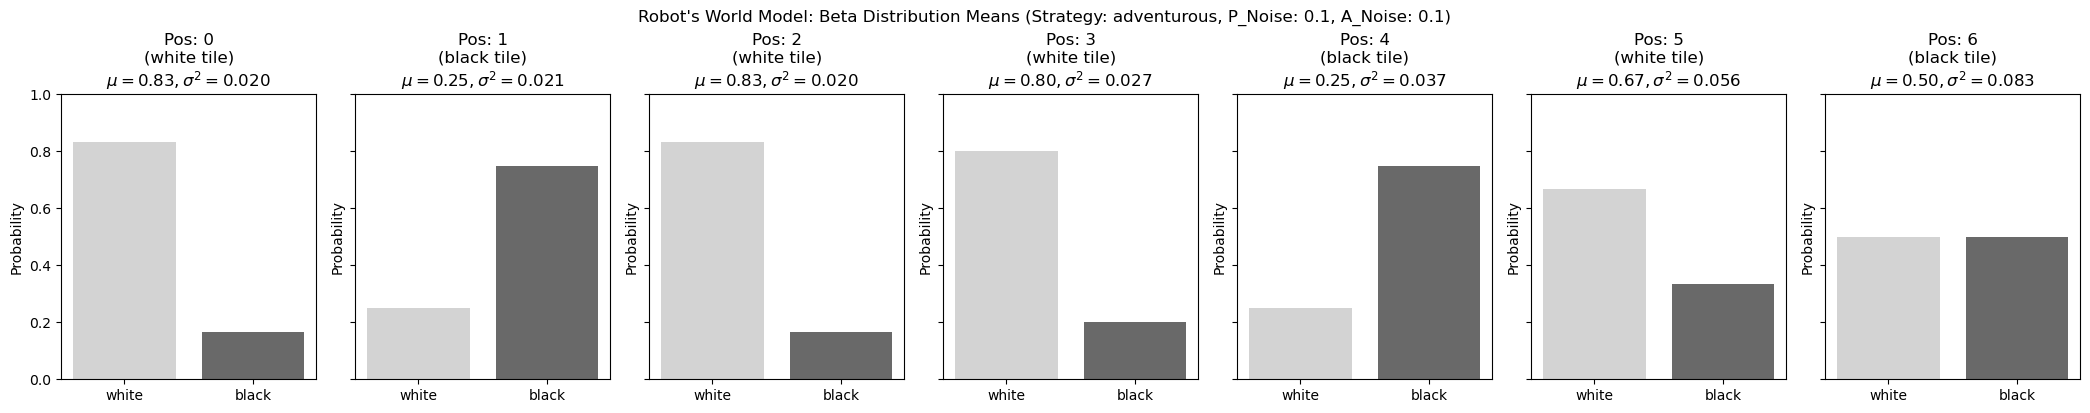

Robot intended to move right, but due to noise, moved left!
Robot moved left from position 0 but it was out of bounds. Robot stays put.
--------------------------------------------------
--- Step 21/25 (Adventurous, 10% Noise) ---
Robot is at position 0, observes white tile (actual: white).


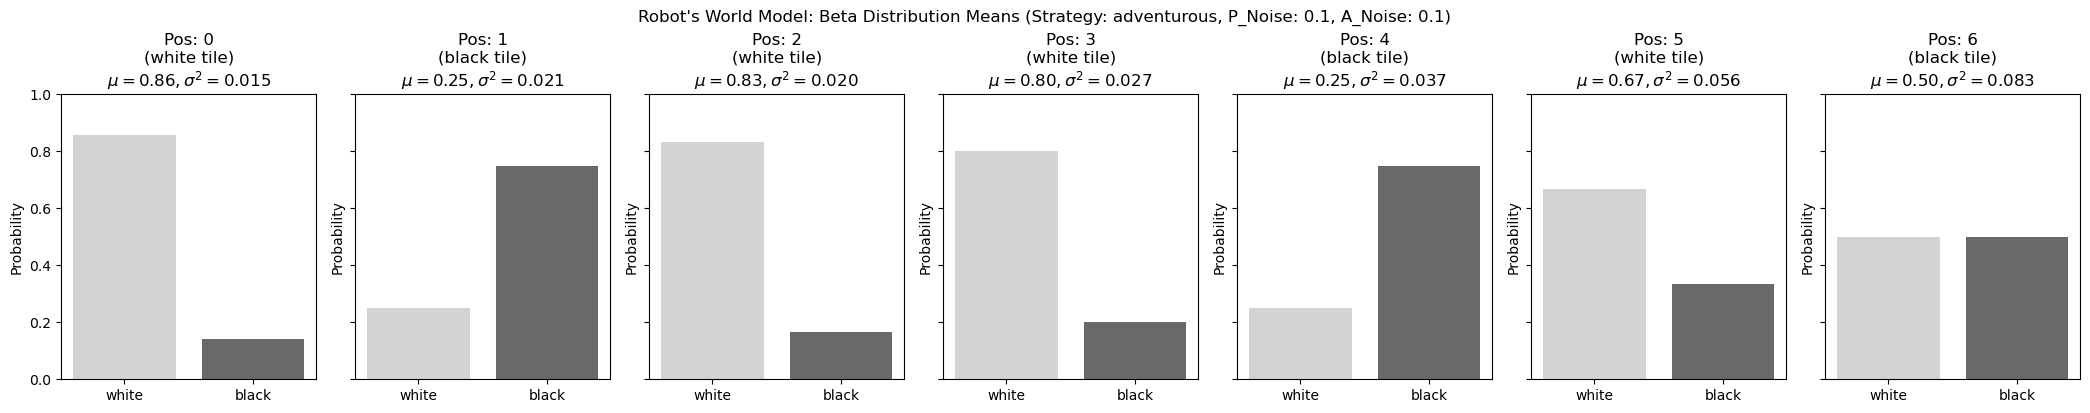

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 22/25 (Adventurous, 10% Noise) ---
Robot is at position 1, observes black tile (actual: black).


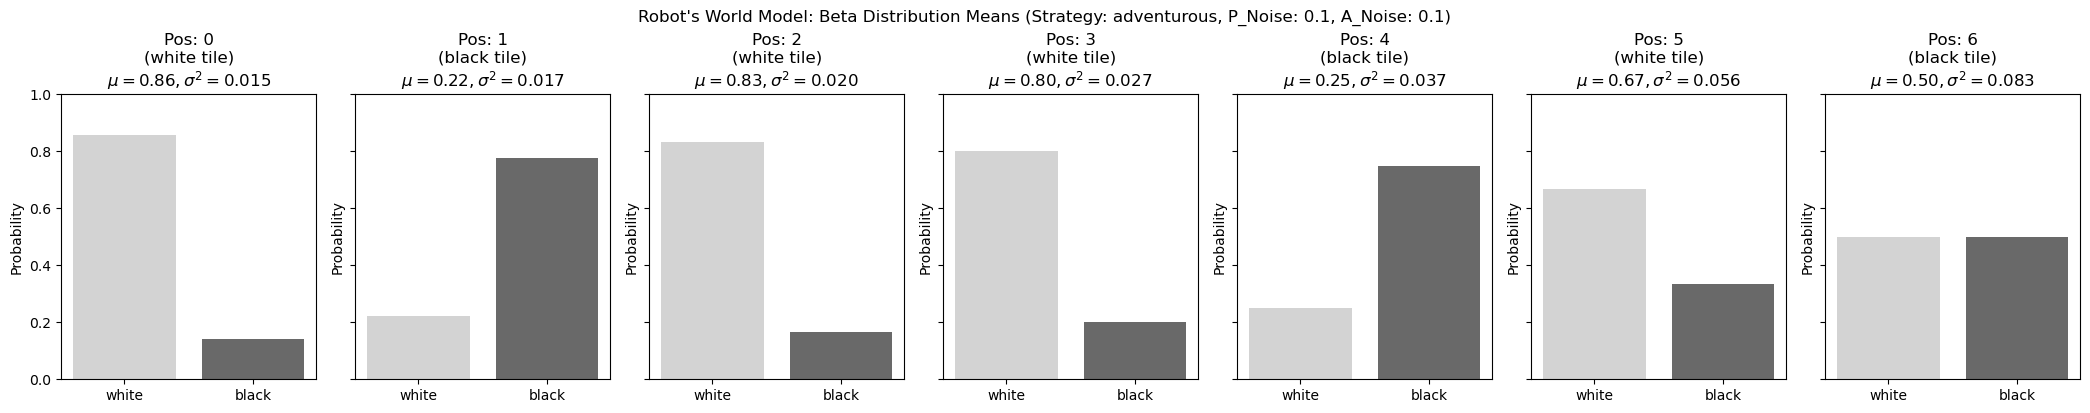

Robot intended and executed action: right
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 23/25 (Adventurous, 10% Noise) ---
Robot is at position 2, observes white tile (actual: white).


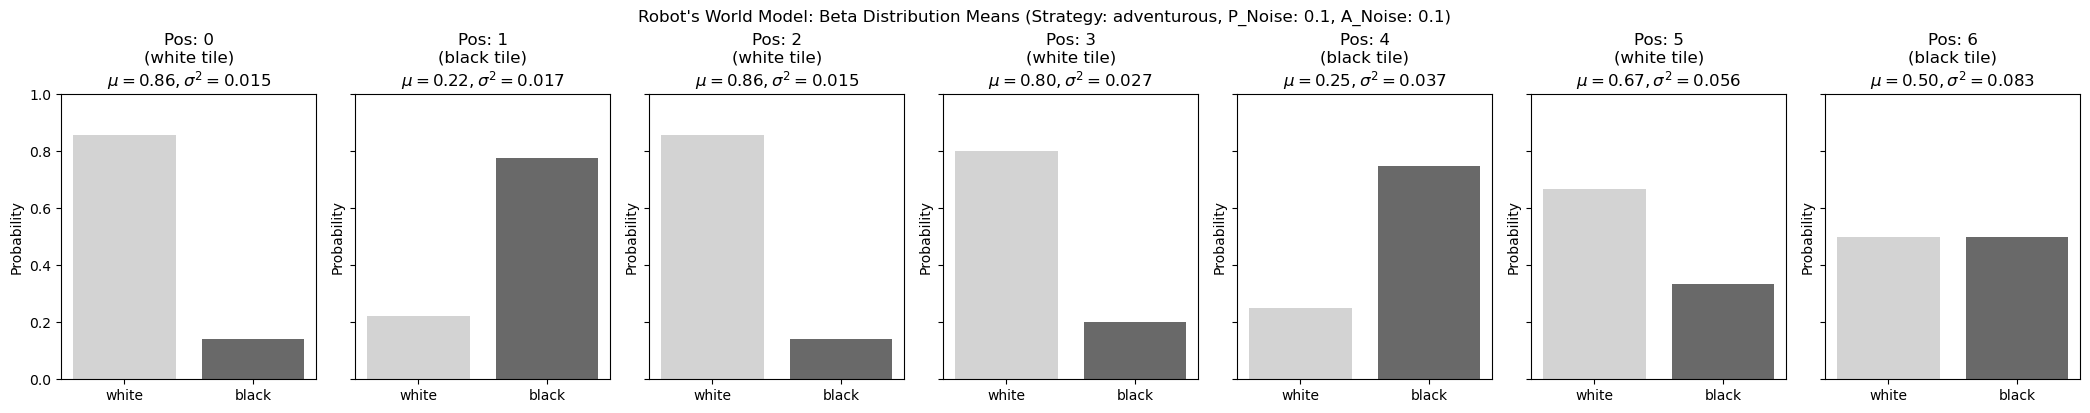

Robot intended and executed action: right
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 24/25 (Adventurous, 10% Noise) ---
Robot is at position 3, observes white tile (actual: white).


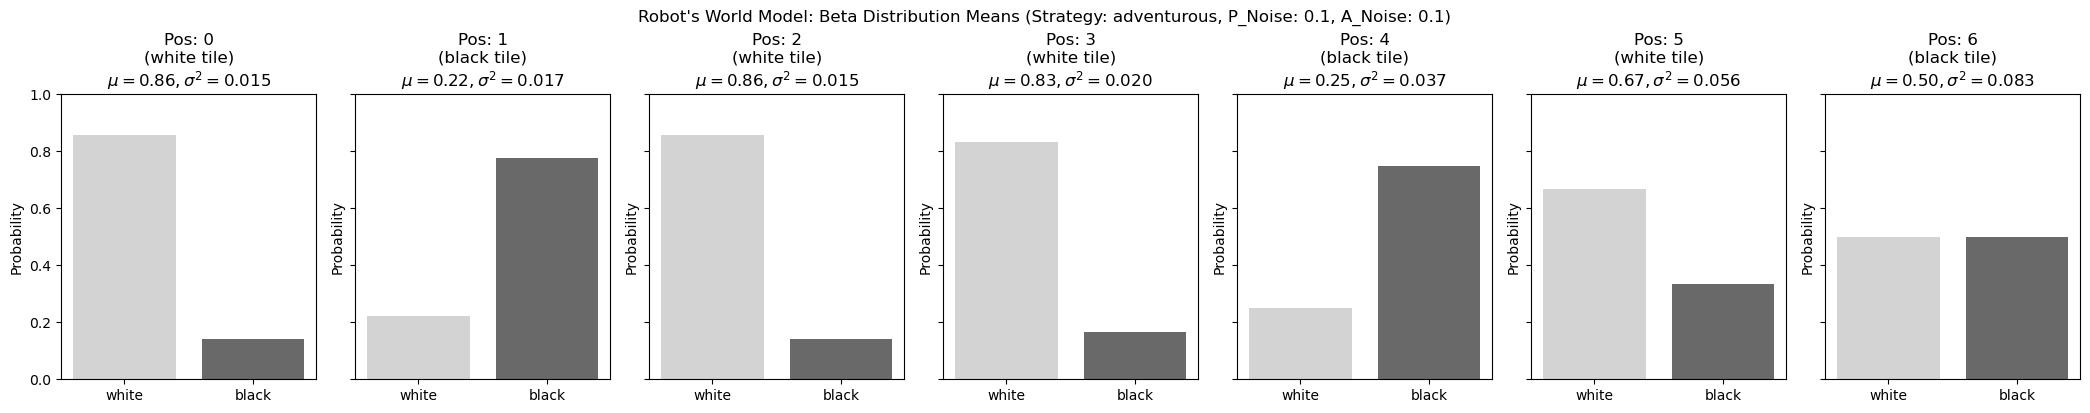

Robot intended and executed action: right
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 25/25 (Adventurous, 10% Noise) ---
Robot is at position 4, observes black tile (actual: black).


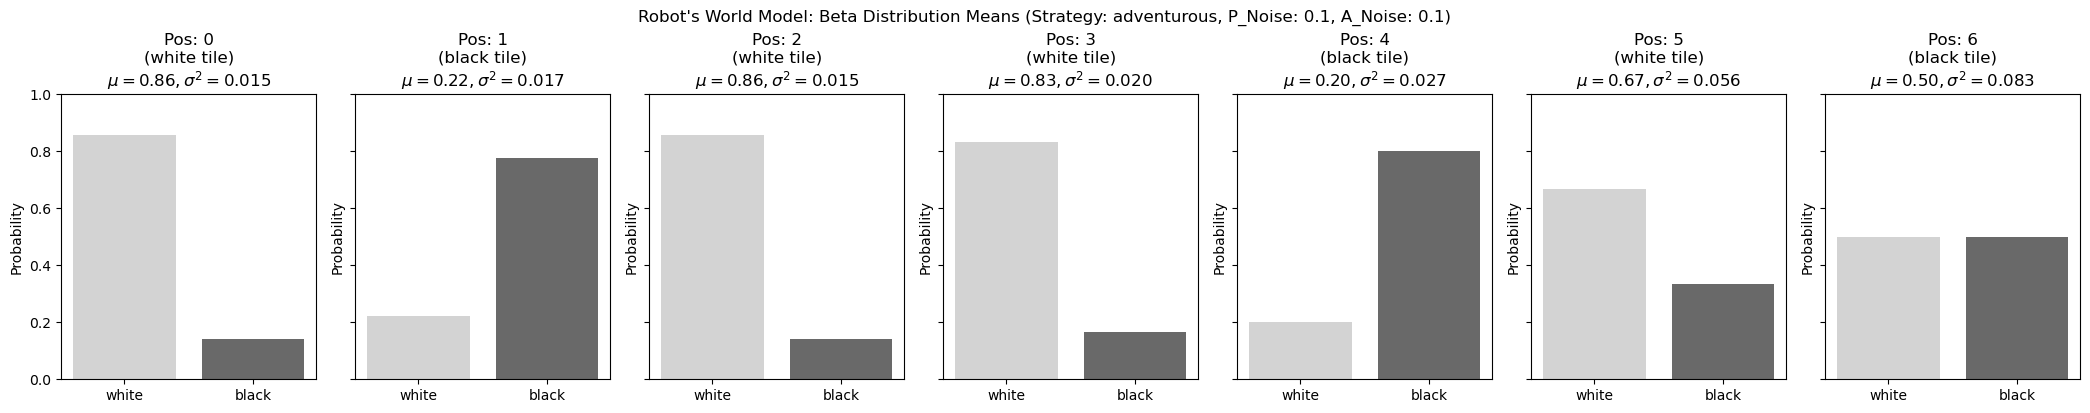

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------


--- Running Uncertainty Minimizing Robot with 40% Noise ---
Robot started at position 3 on a white tile.
Strategy: uncertainty_minimizing, Initial Beta: 1/1
--------------------------------------------------
--- Step 1/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 3, observes white tile (actual: white).


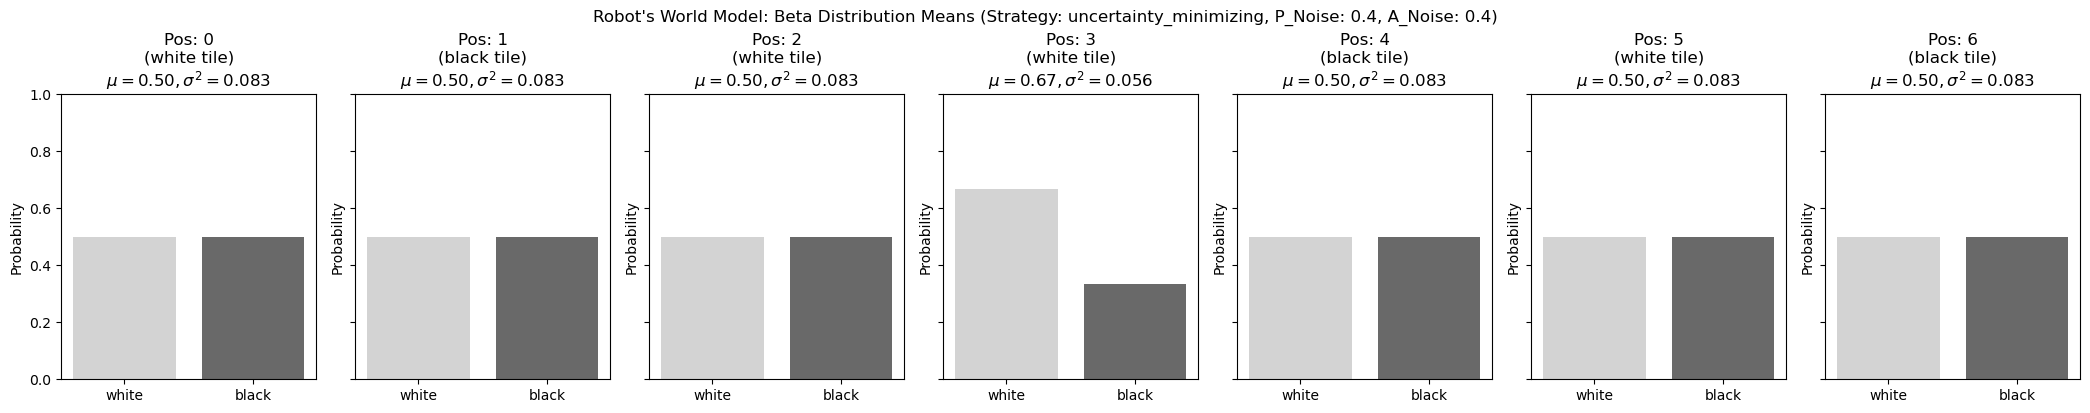

Robot intended to move left, but due to noise, moved right!
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 2/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 4, observes white tile (actual: black).


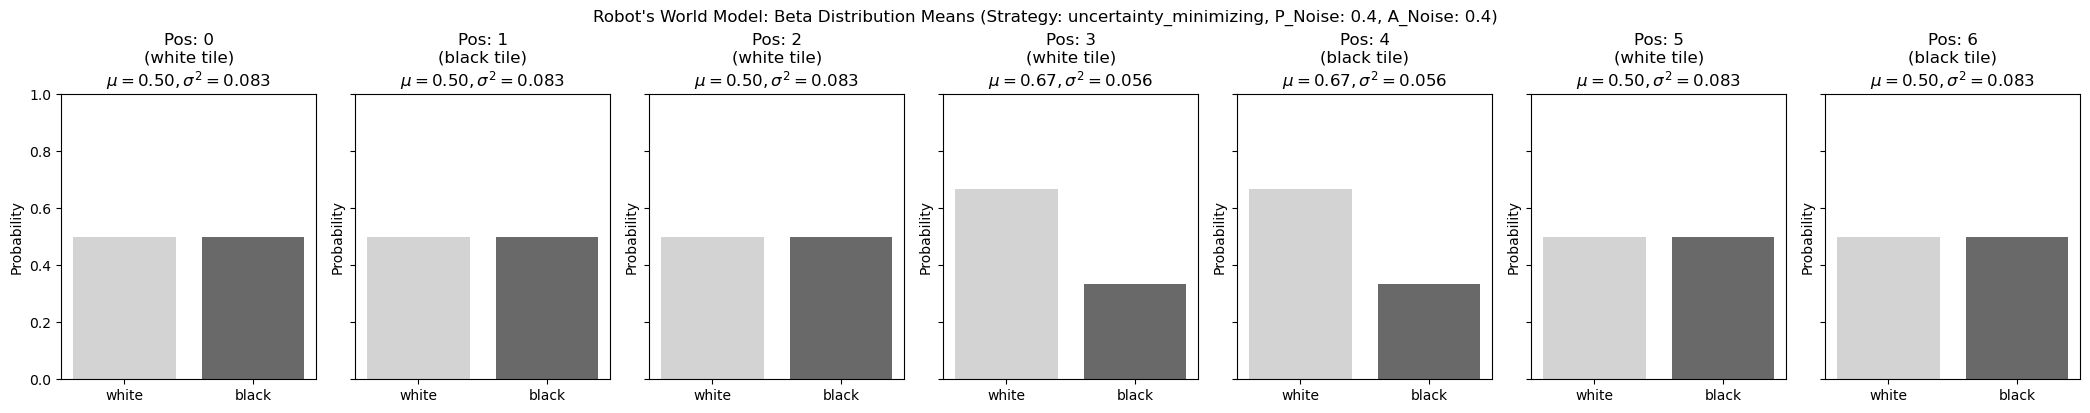

Robot intended to move left, but due to noise, moved right!
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 3/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 5, observes white tile (actual: white).


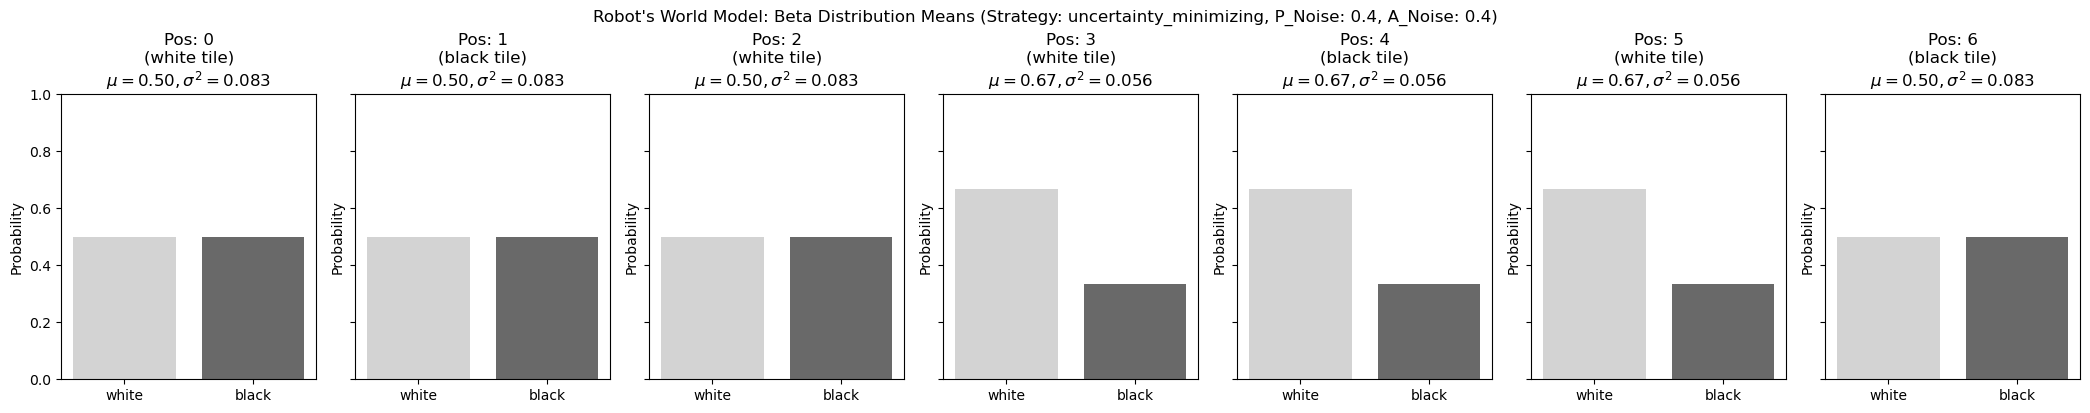

Robot intended and executed action: left
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 4/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 4, observes black tile (actual: black).


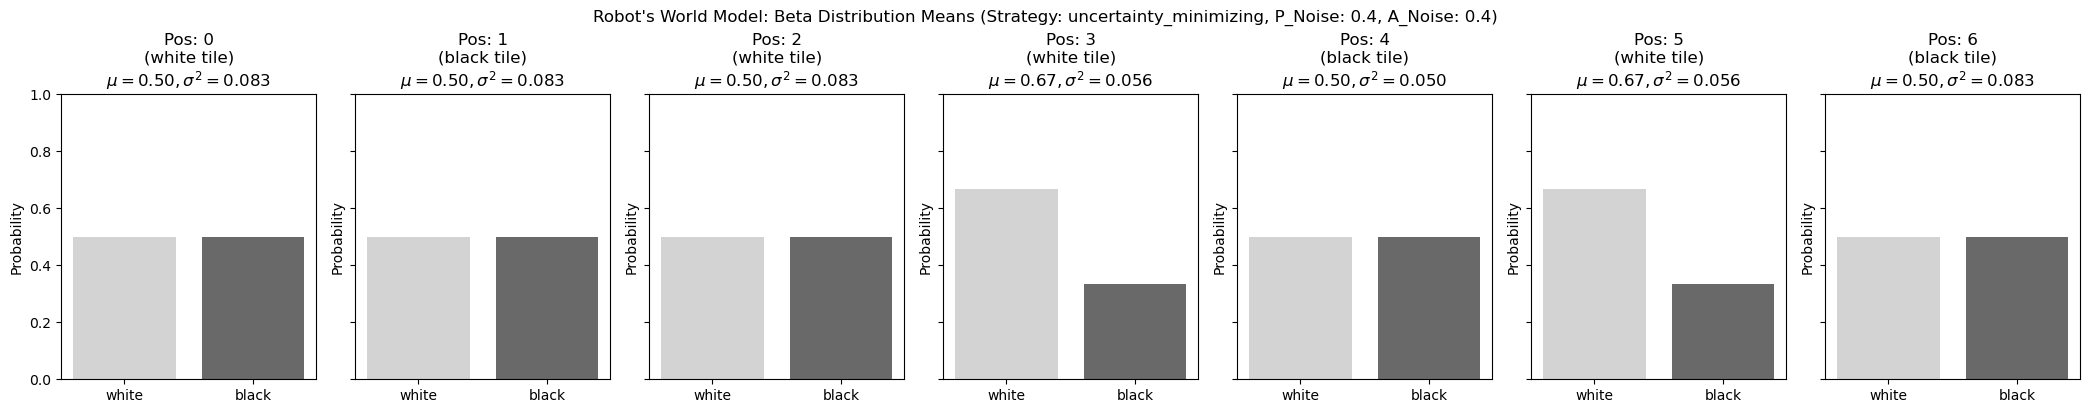

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 5/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 5, observes white tile (actual: white).


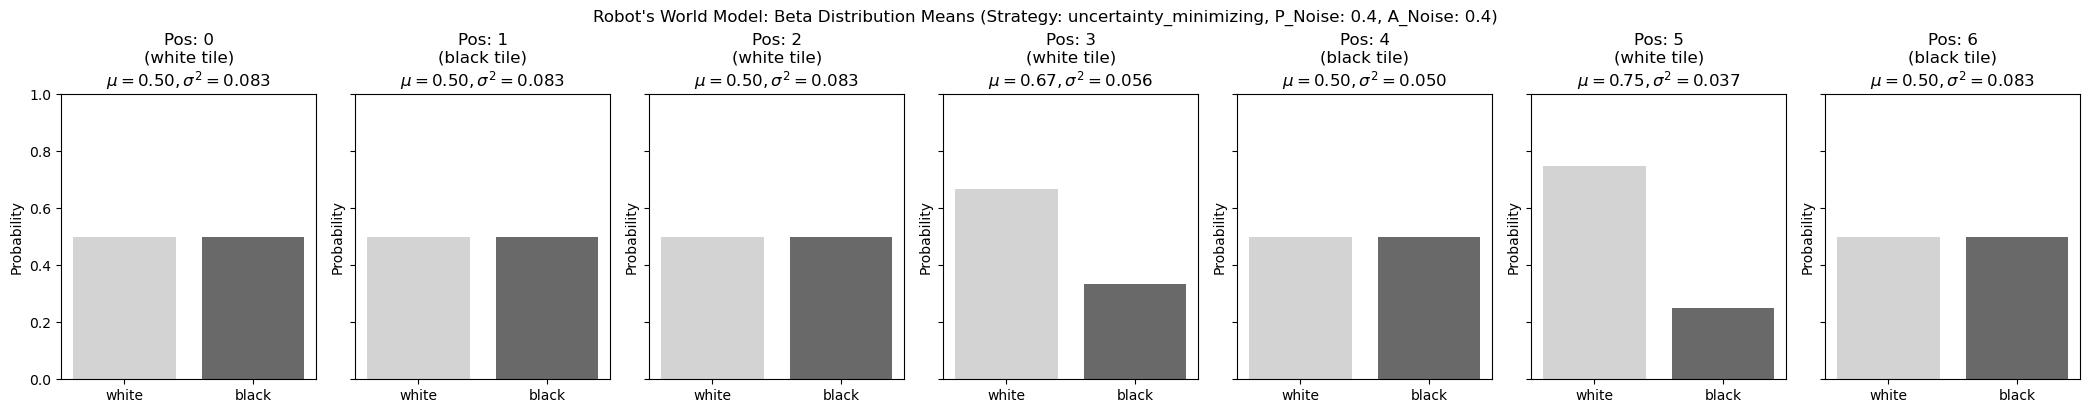

Robot intended and executed action: left
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 6/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 4, observes white tile (actual: black).


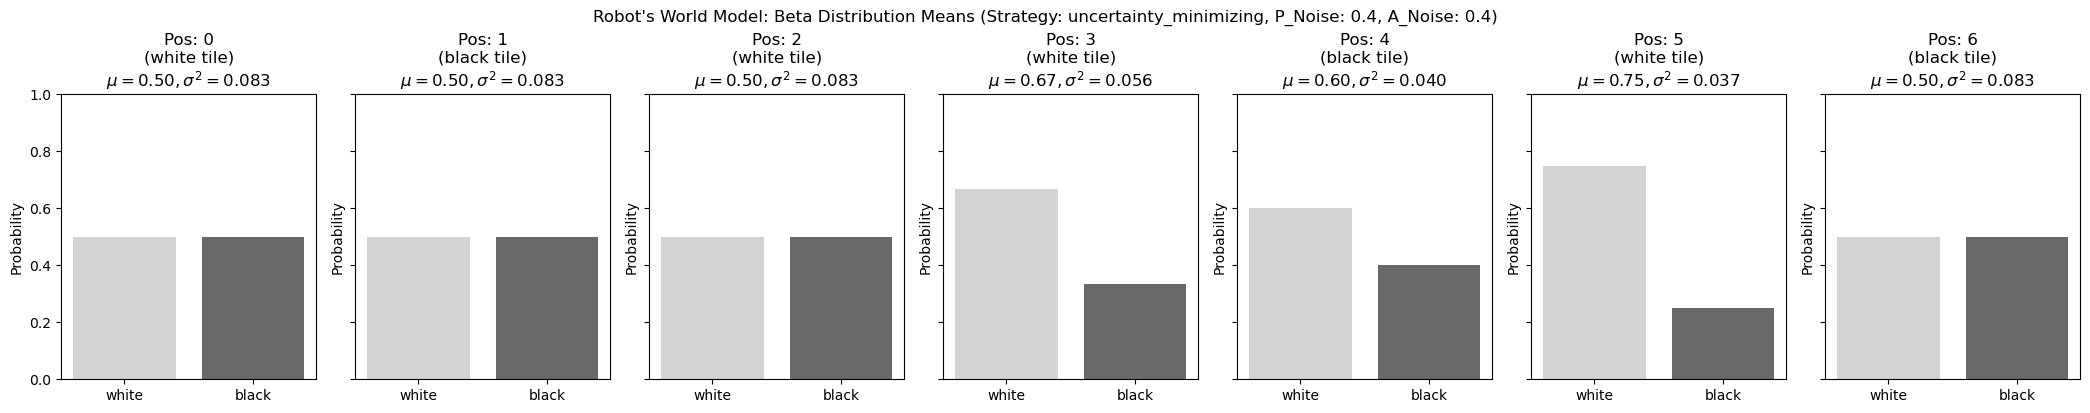

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 7/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 5, observes white tile (actual: white).


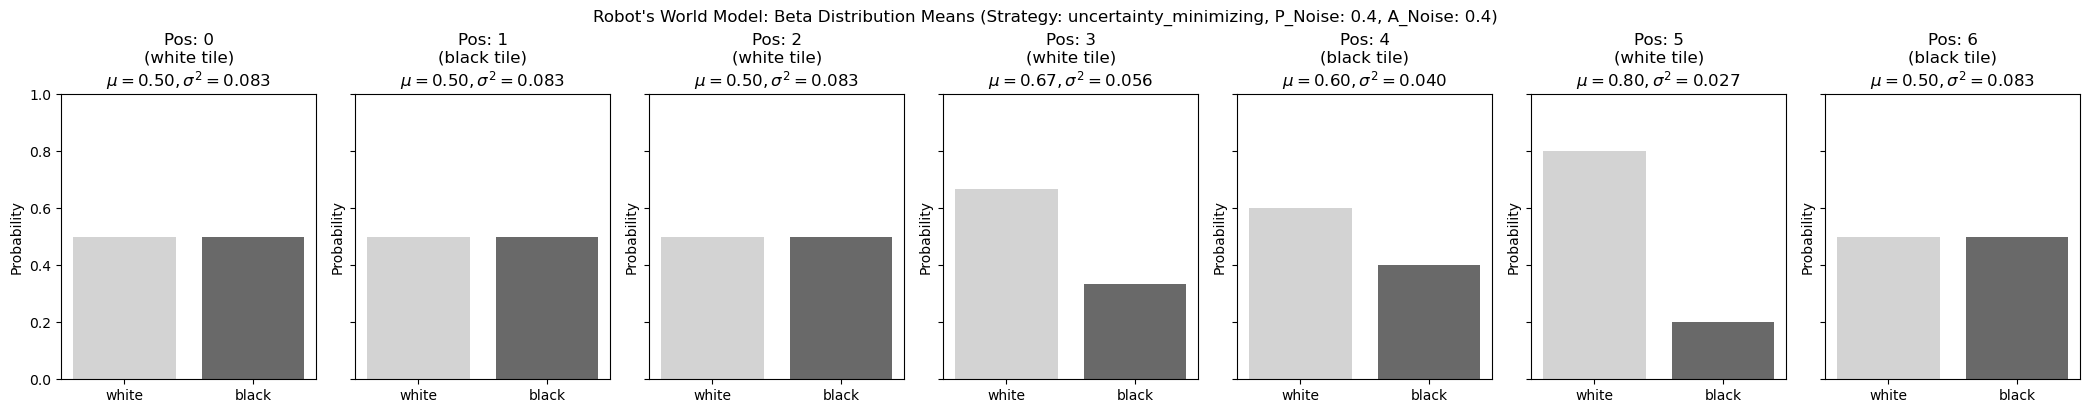

Robot intended and executed action: left
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 8/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 4, observes black tile (actual: black).


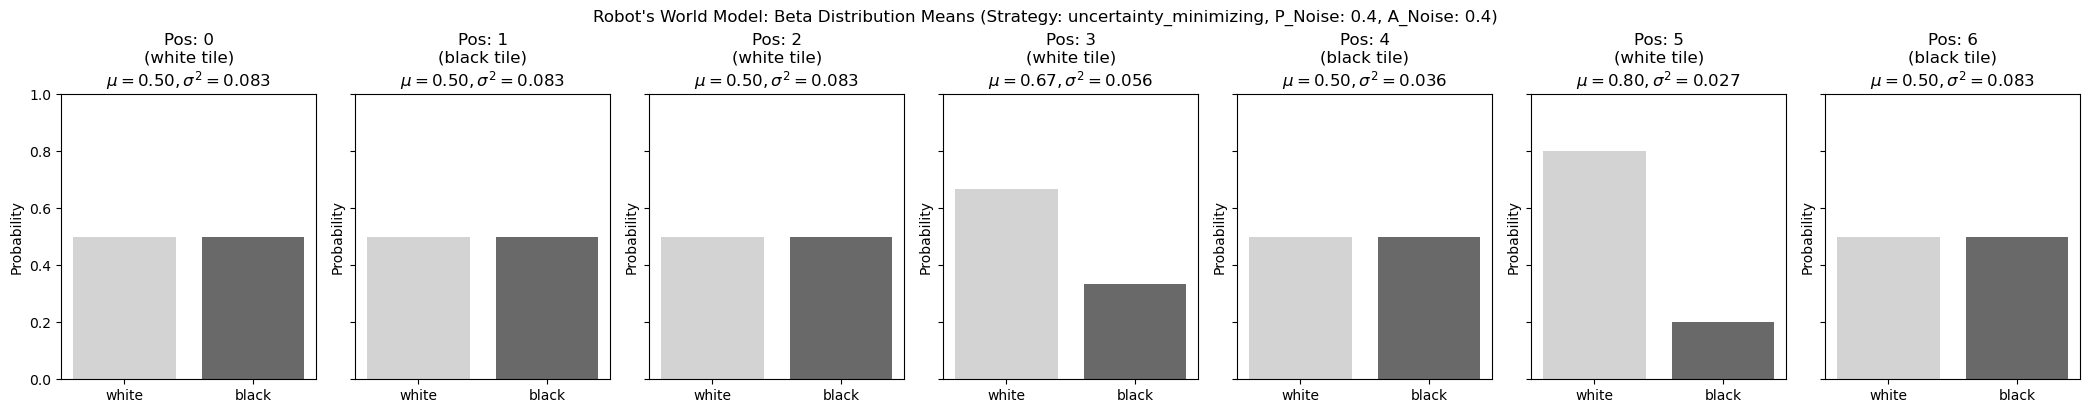

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 9/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 5, observes black tile (actual: white).


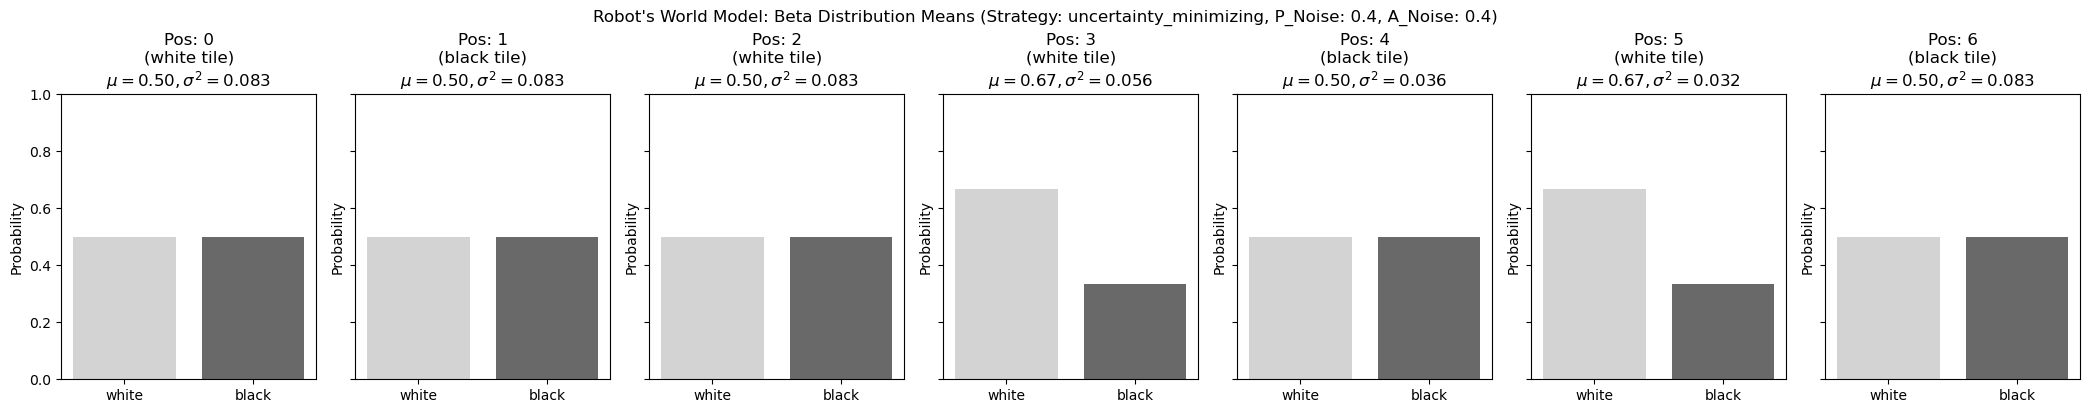

Robot intended and executed action: left
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 10/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 4, observes white tile (actual: black).


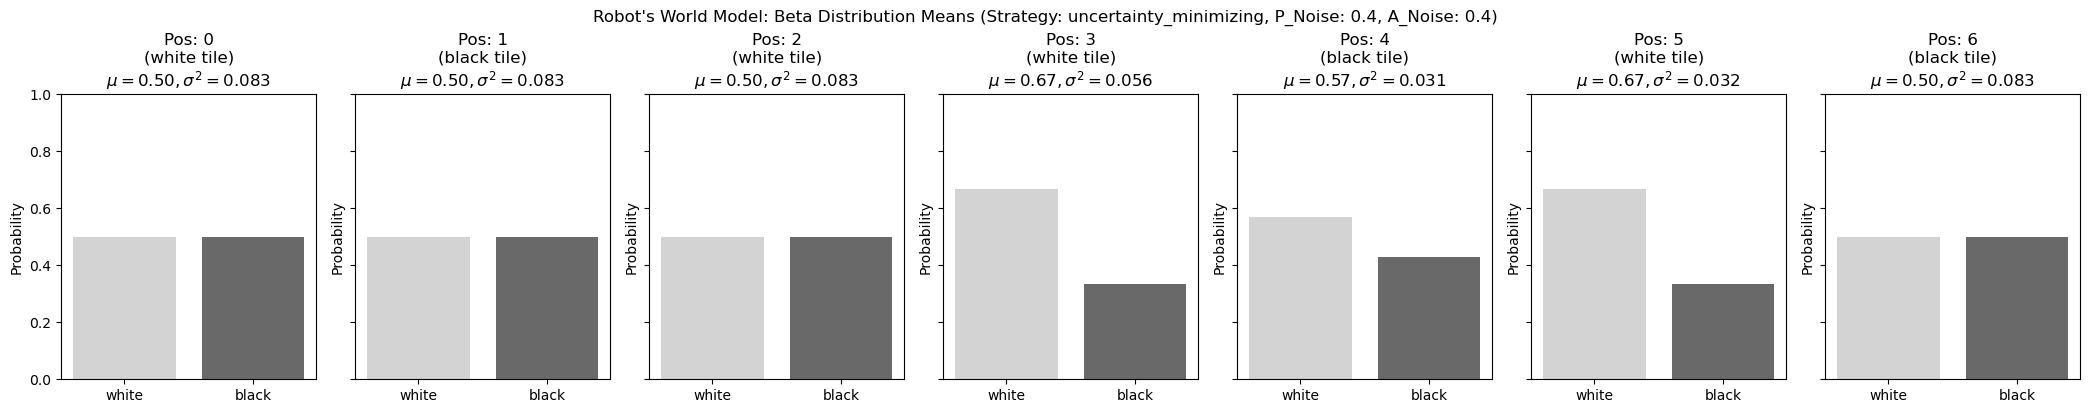

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 11/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 5, observes white tile (actual: white).


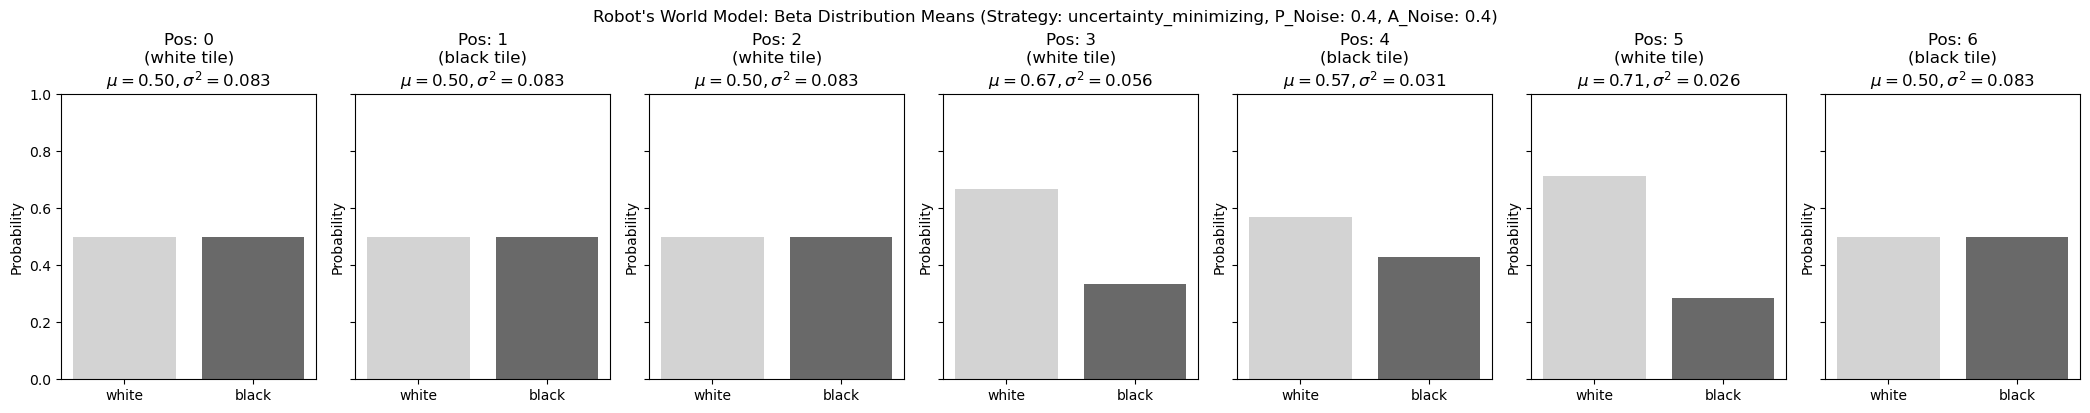

Robot intended and executed action: left
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 12/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 4, observes white tile (actual: black).


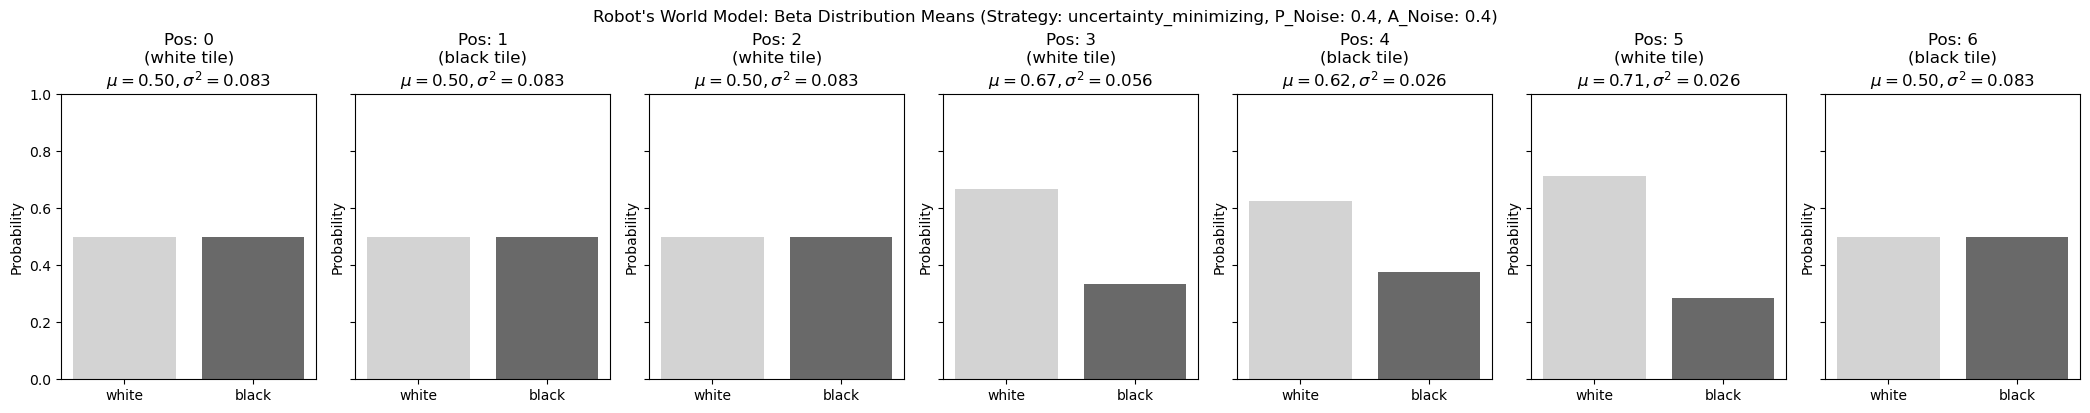

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 13/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 5, observes black tile (actual: white).


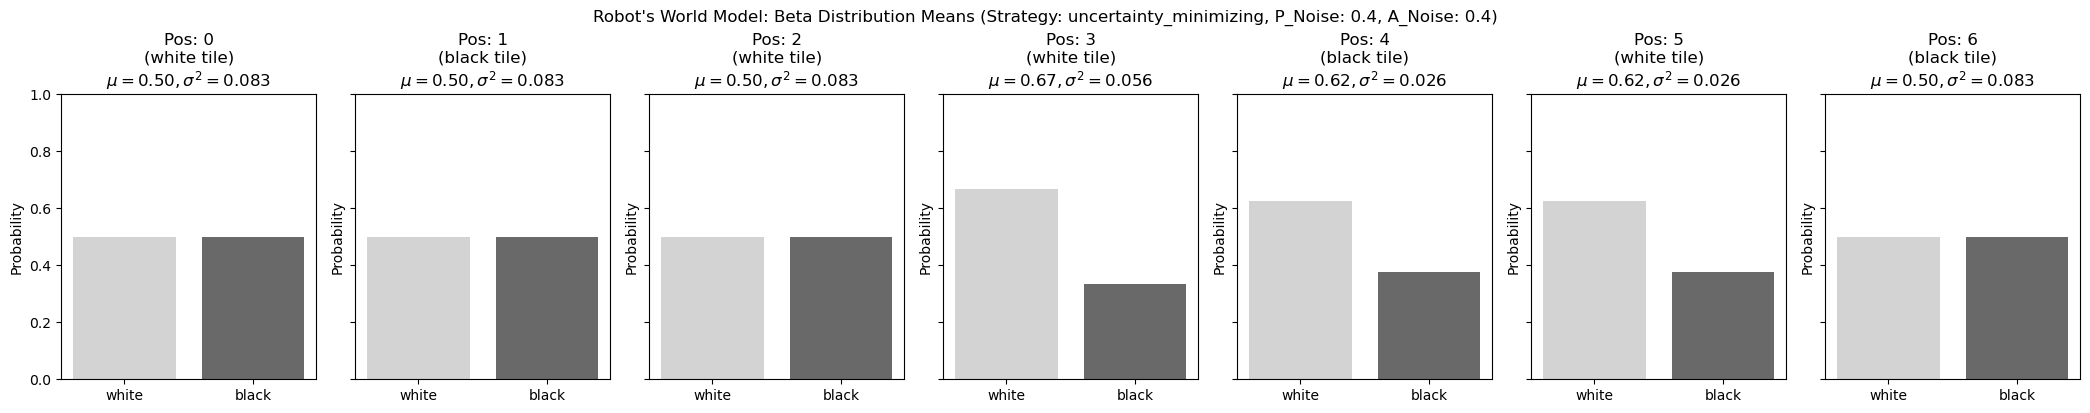

Robot intended and executed action: left
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 14/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 4, observes black tile (actual: black).


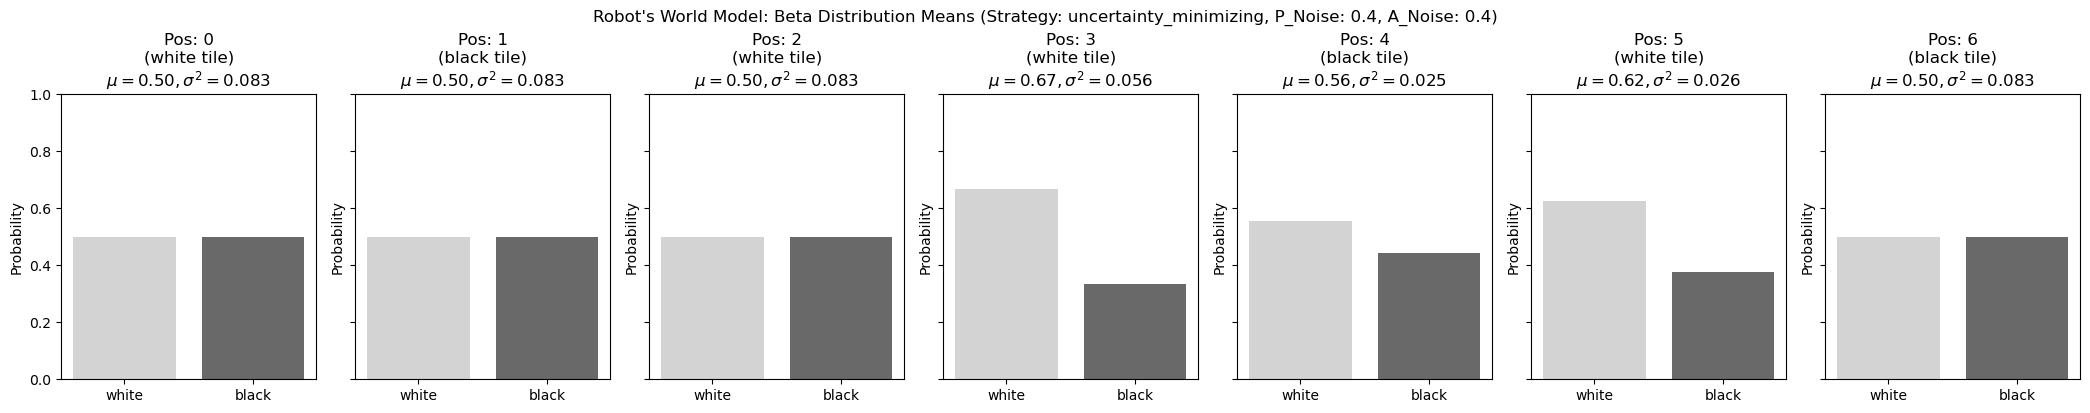

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 15/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 5, observes white tile (actual: white).


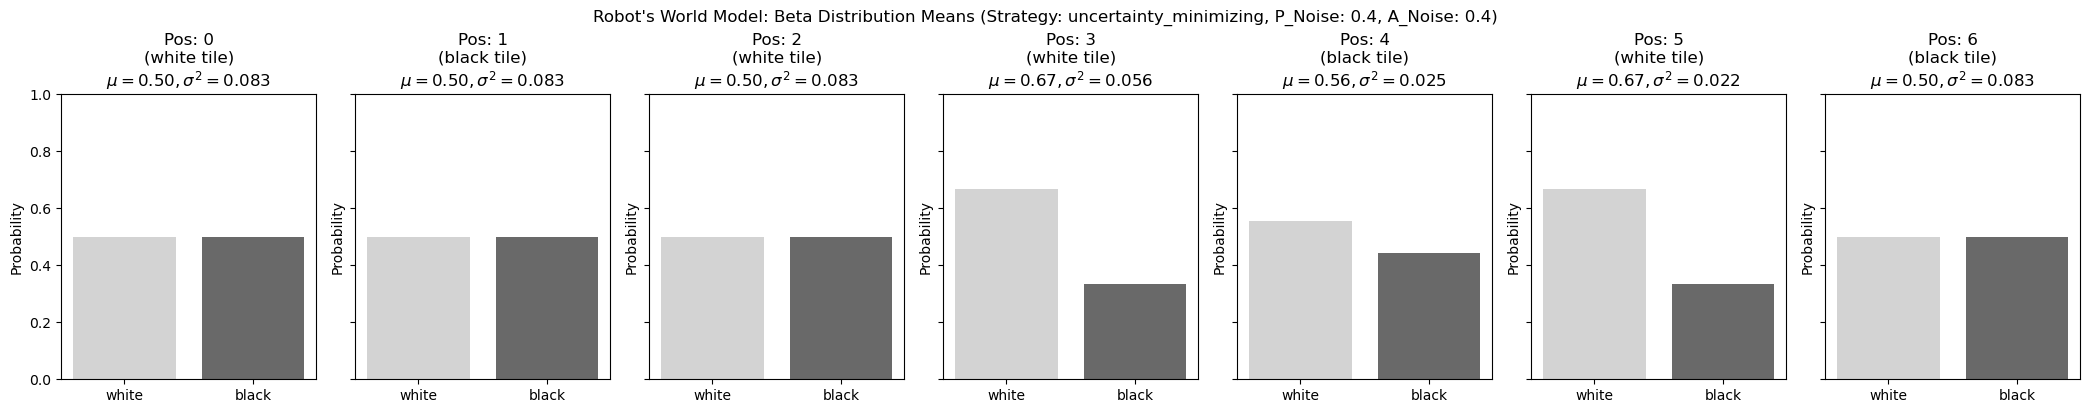

Robot intended and executed action: left
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 16/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 4, observes white tile (actual: black).


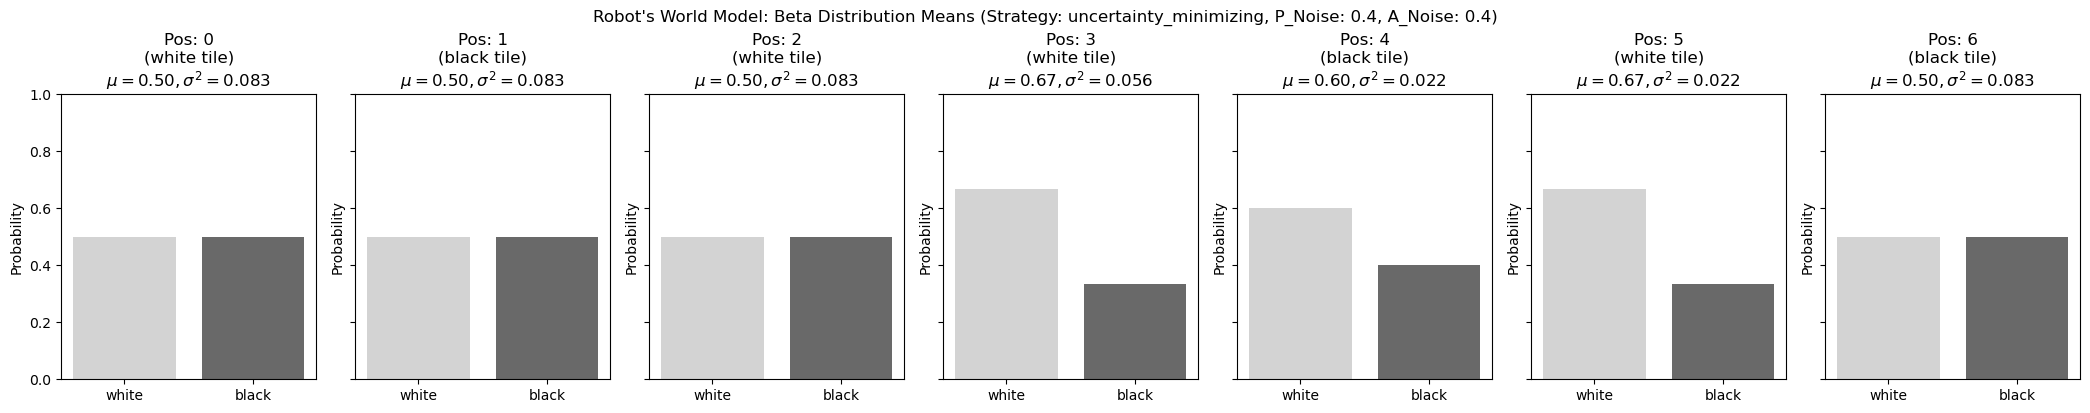

Robot intended and executed action: right
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 17/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 5, observes white tile (actual: white).


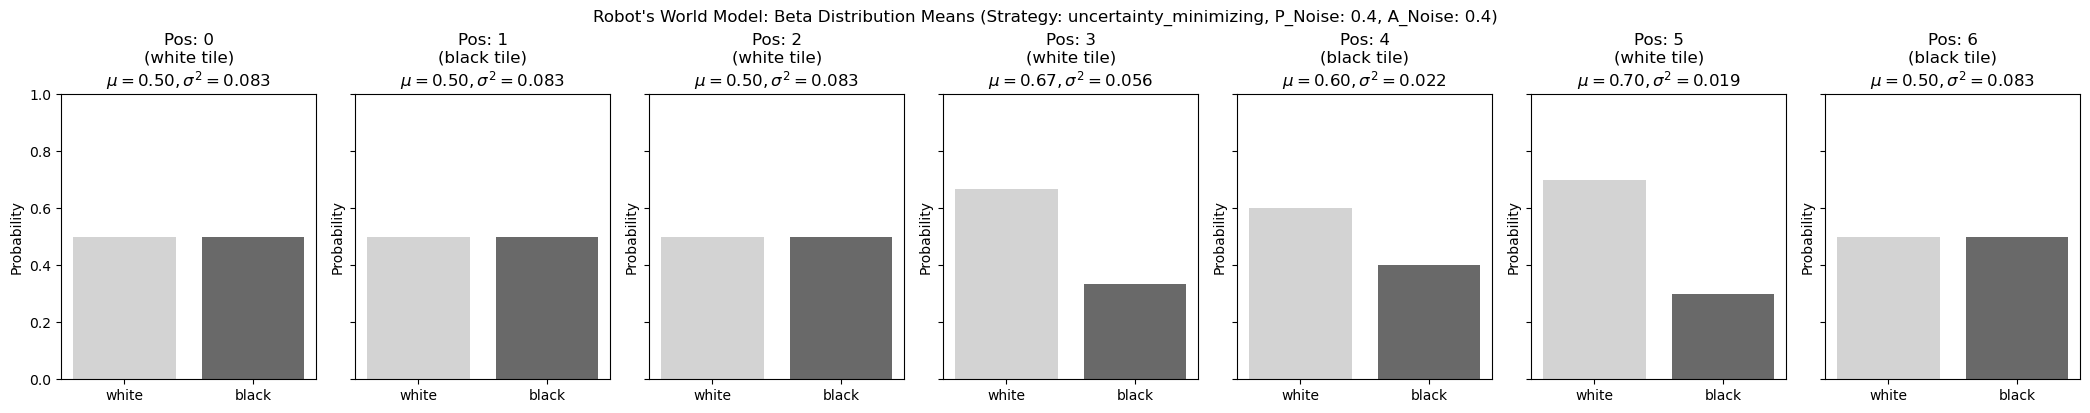

Robot intended to move left, but due to noise, moved right!
Robot moved to position 6 (a black tile).
--------------------------------------------------
--- Step 18/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 6, observes black tile (actual: black).


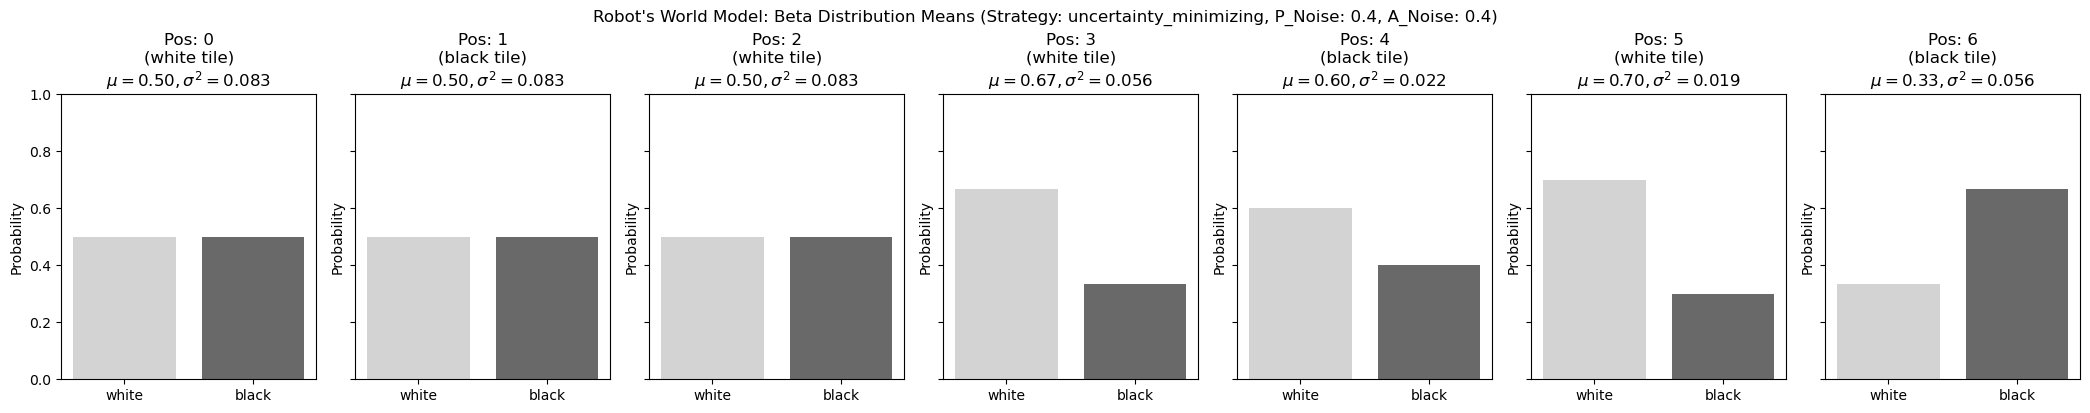

Robot intended to move left, but due to noise, moved right!
Robot moved right from position 6 but it was out of bounds. Robot stays put.
--------------------------------------------------
--- Step 19/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 6, observes white tile (actual: black).


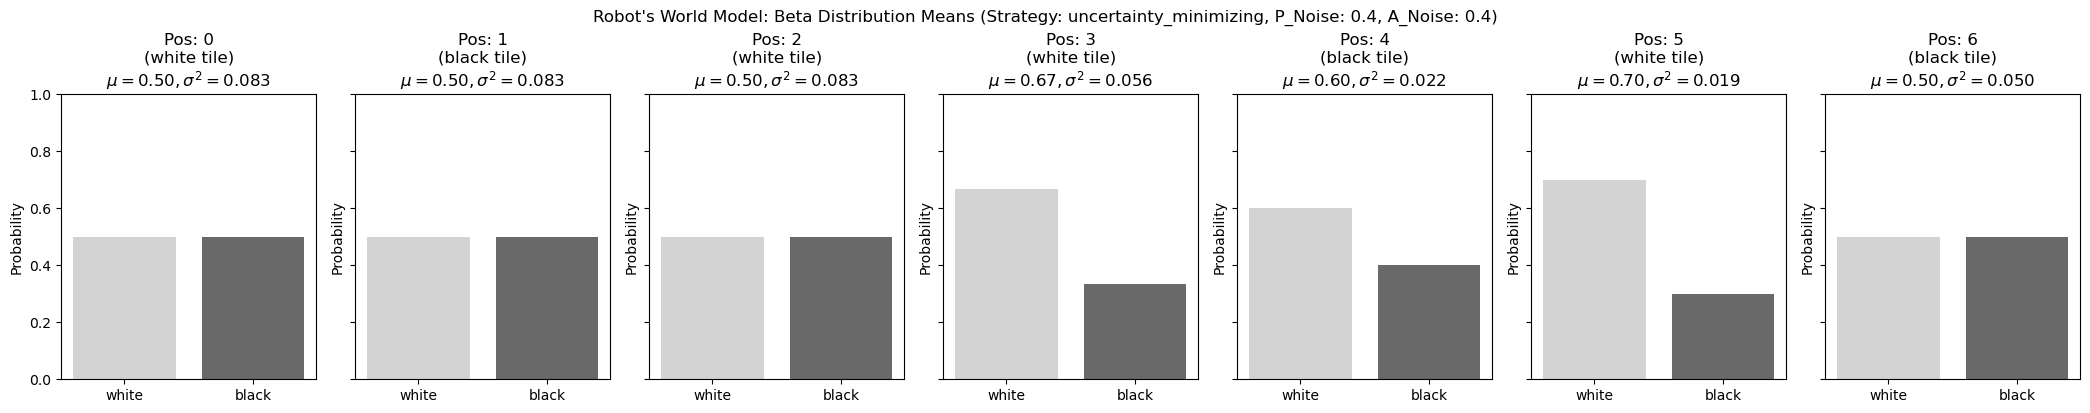

Robot intended to move left, but due to noise, moved right!
Robot moved right from position 6 but it was out of bounds. Robot stays put.
--------------------------------------------------
--- Step 20/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 6, observes black tile (actual: black).


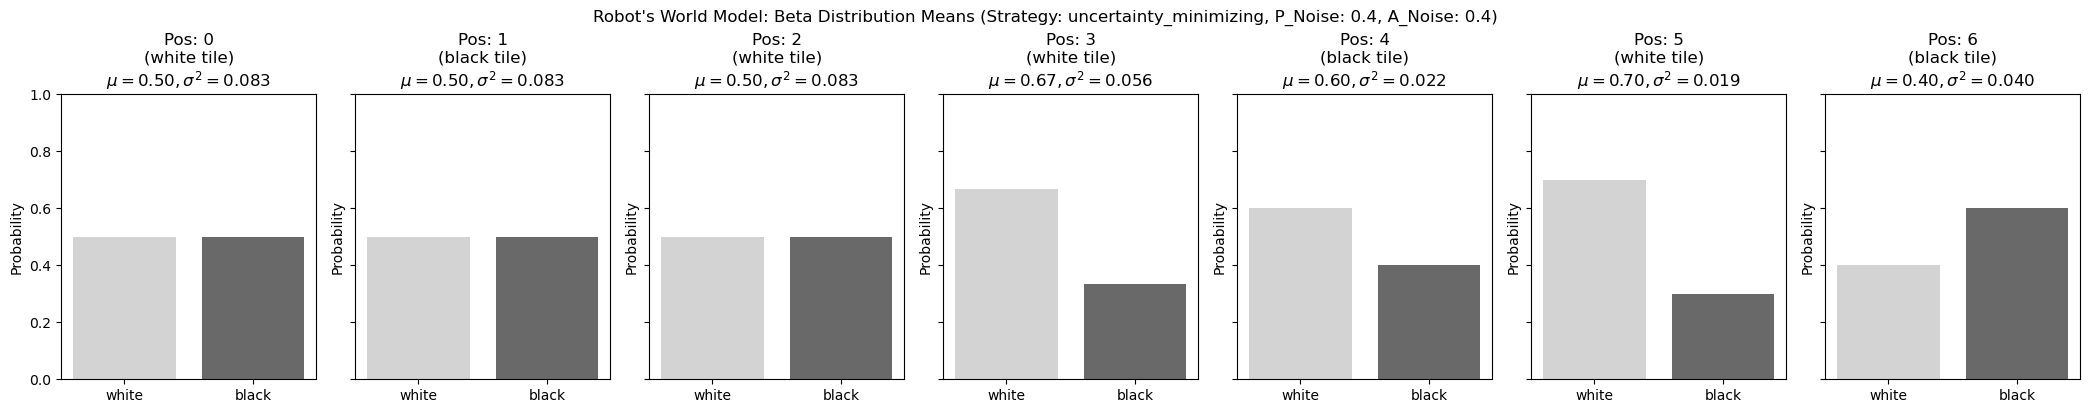

Robot intended to move left, but due to noise, moved right!
Robot moved right from position 6 but it was out of bounds. Robot stays put.
--------------------------------------------------
--- Step 21/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 6, observes black tile (actual: black).


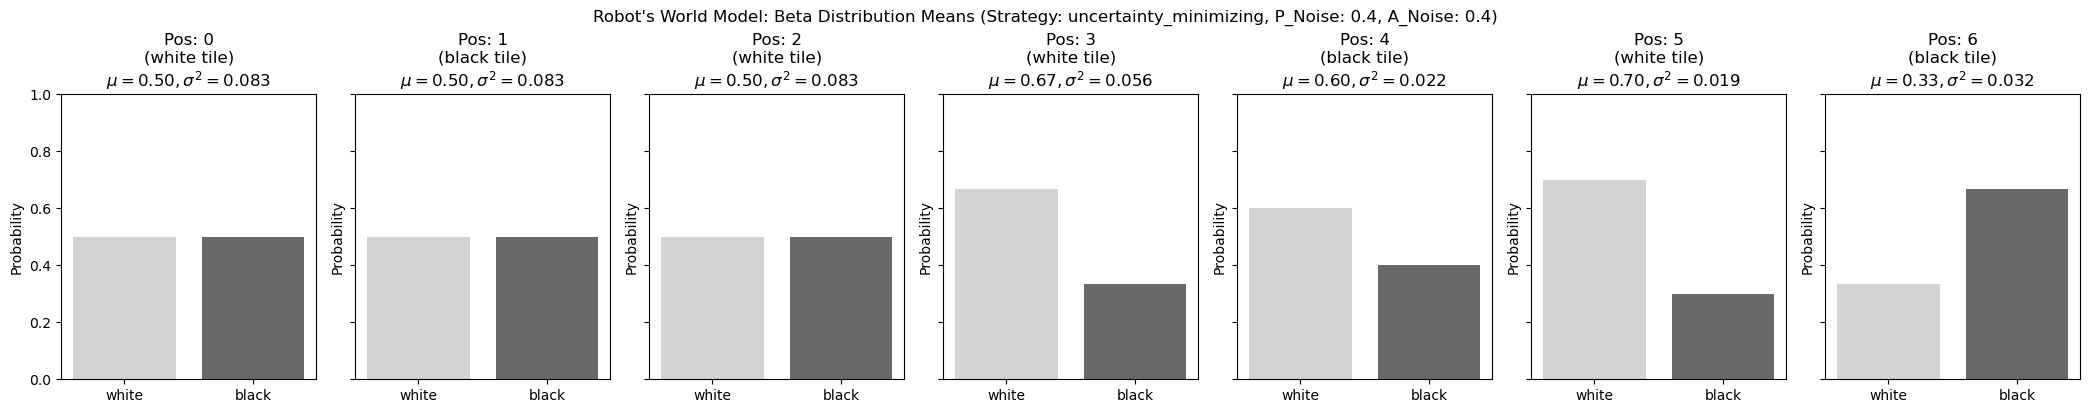

Robot intended and executed action: left
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 22/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 5, observes black tile (actual: white).


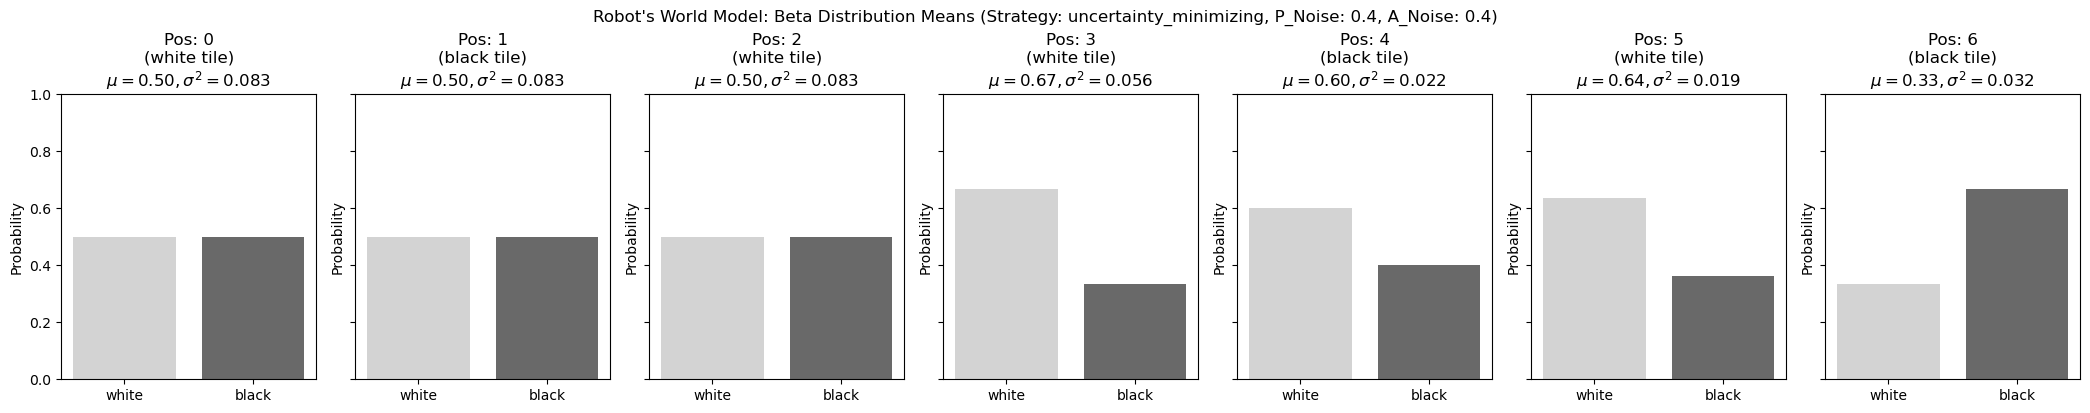

Robot intended to move right, but due to noise, moved left!
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 23/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 4, observes white tile (actual: black).


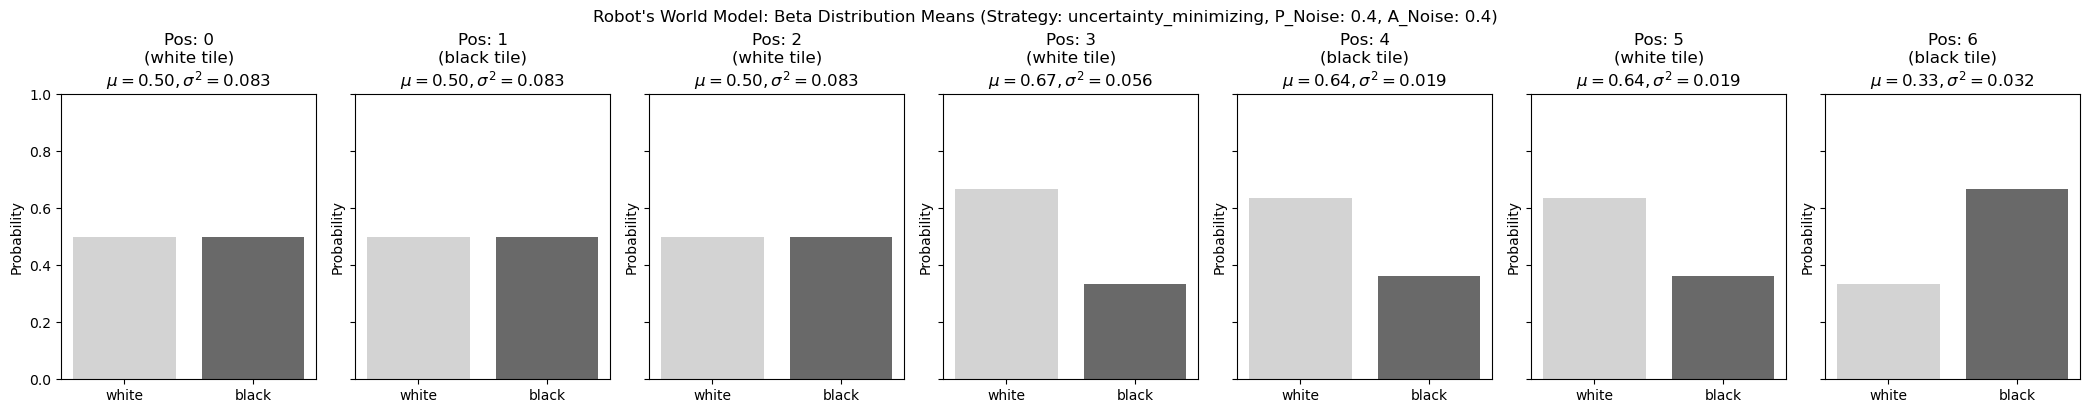

Robot intended to move right, but due to noise, moved left!
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 24/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 3, observes white tile (actual: white).


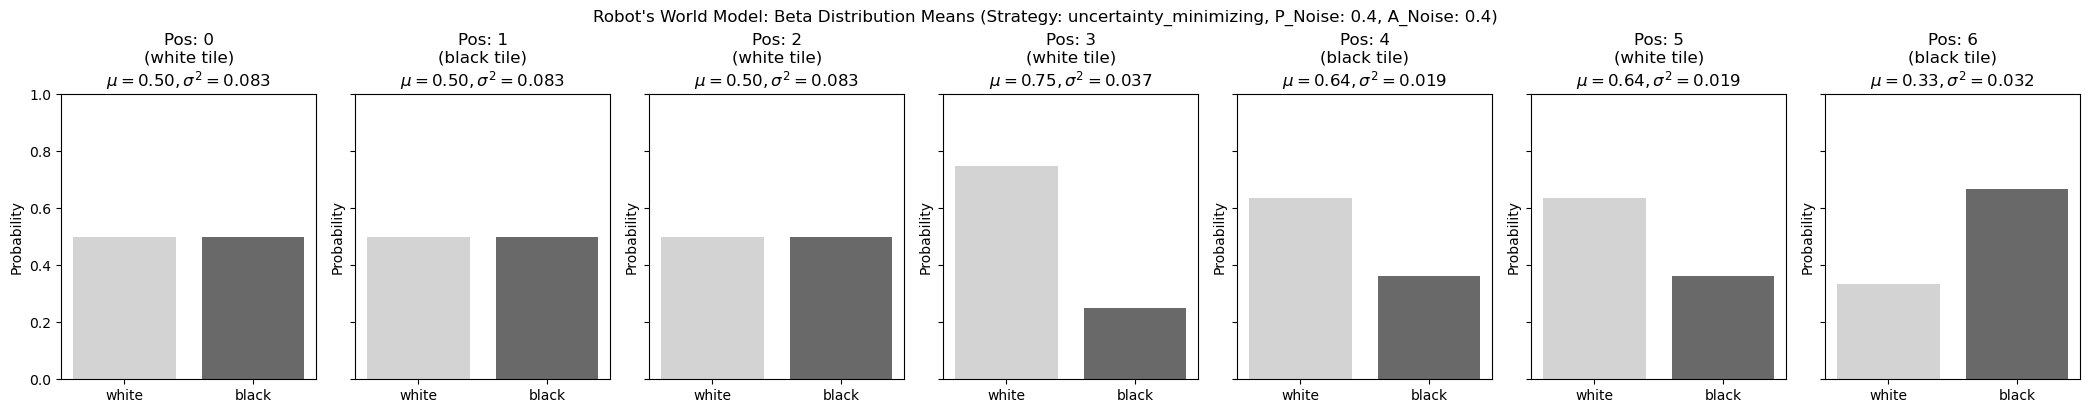

Robot intended and executed action: right
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 25/25 (Uncertainty Minimizing, 40% Noise) ---
Robot is at position 4, observes black tile (actual: black).


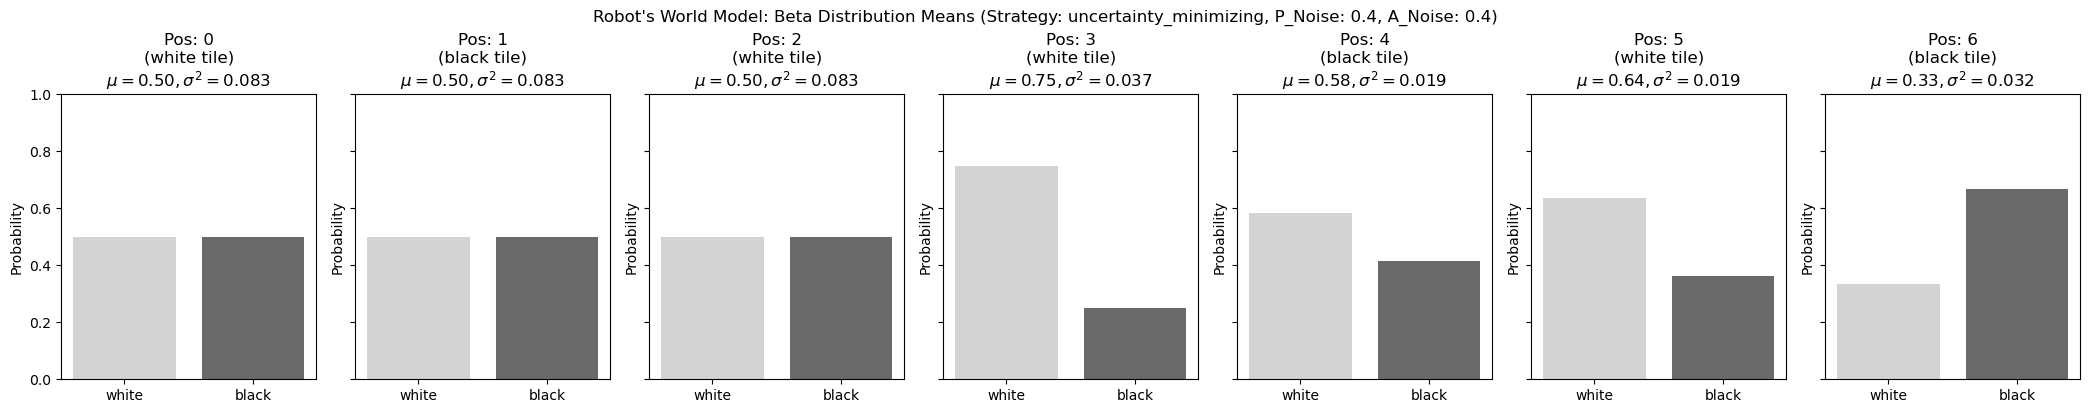

Robot intended to move right, but due to noise, moved left!
Robot moved to position 3 (a white tile).
--------------------------------------------------


--- Running Adventurous Robot with 40% Noise ---
Robot started at position 5 on a white tile.
Strategy: adventurous, Initial Beta: 1/1
--------------------------------------------------
--- Step 1/25 (Adventurous, 40% Noise) ---
Robot is at position 5, observes white tile (actual: white).


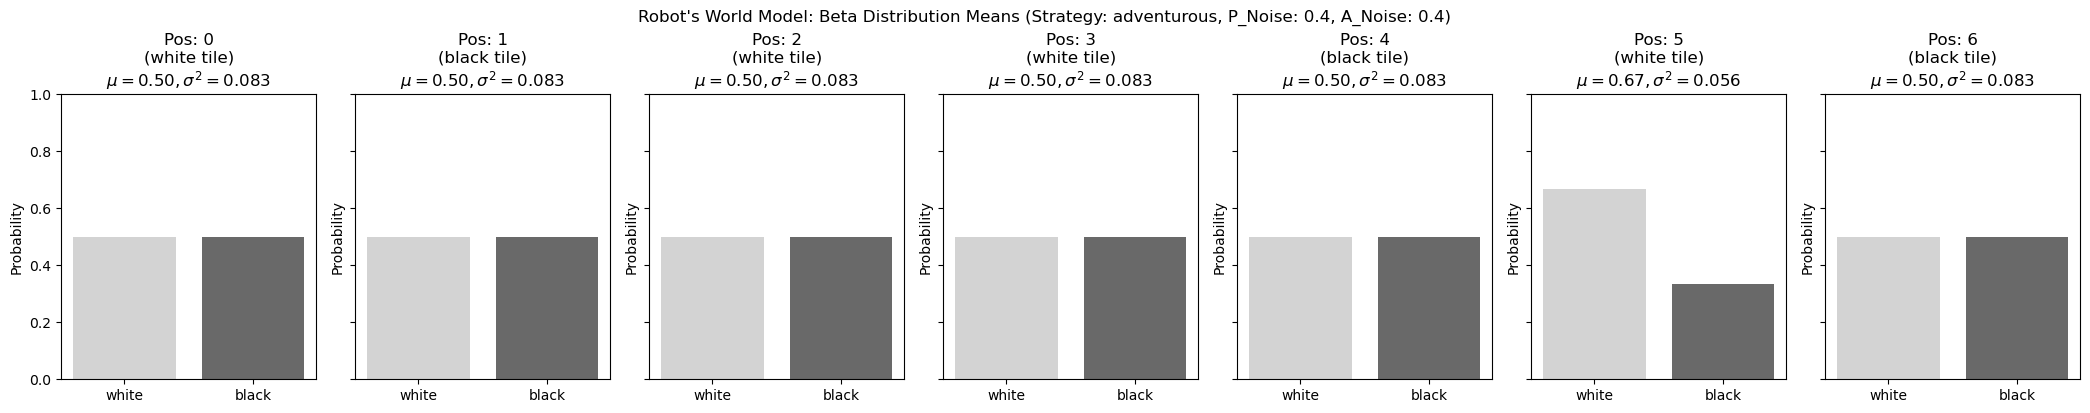

Robot intended and executed action: left
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 2/25 (Adventurous, 40% Noise) ---
Robot is at position 4, observes black tile (actual: black).


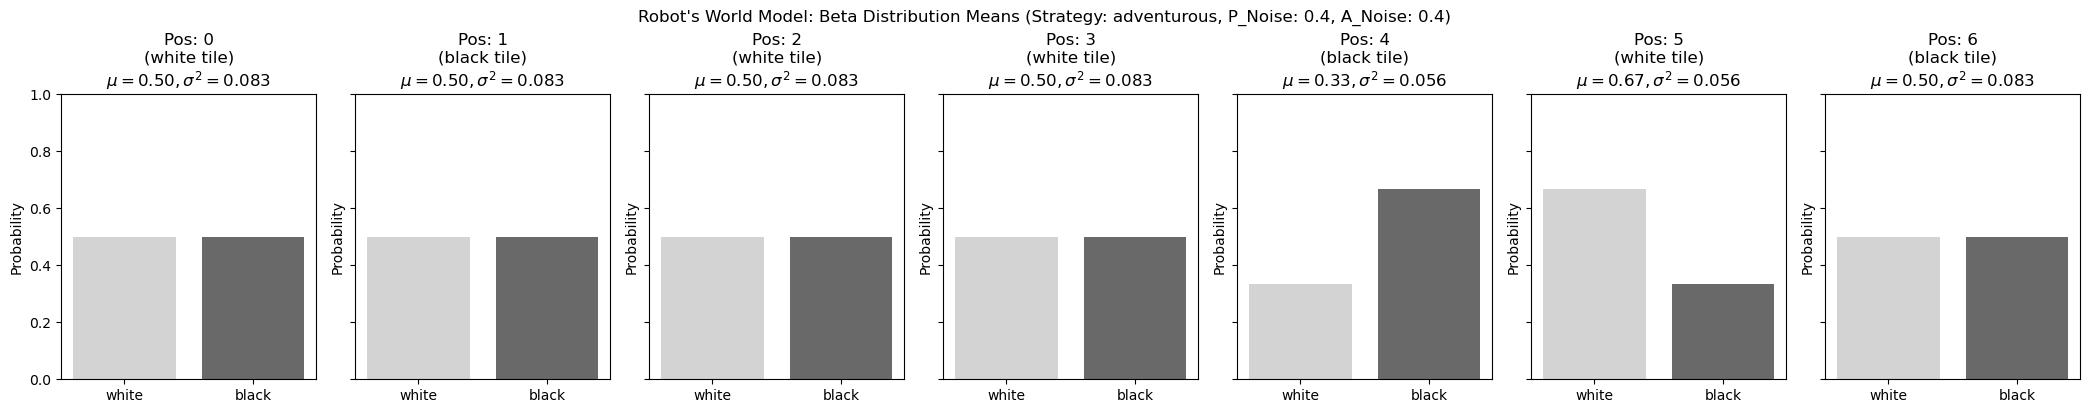

Robot intended to move left, but due to noise, moved right!
Robot moved to position 5 (a white tile).
--------------------------------------------------
--- Step 3/25 (Adventurous, 40% Noise) ---
Robot is at position 5, observes black tile (actual: white).


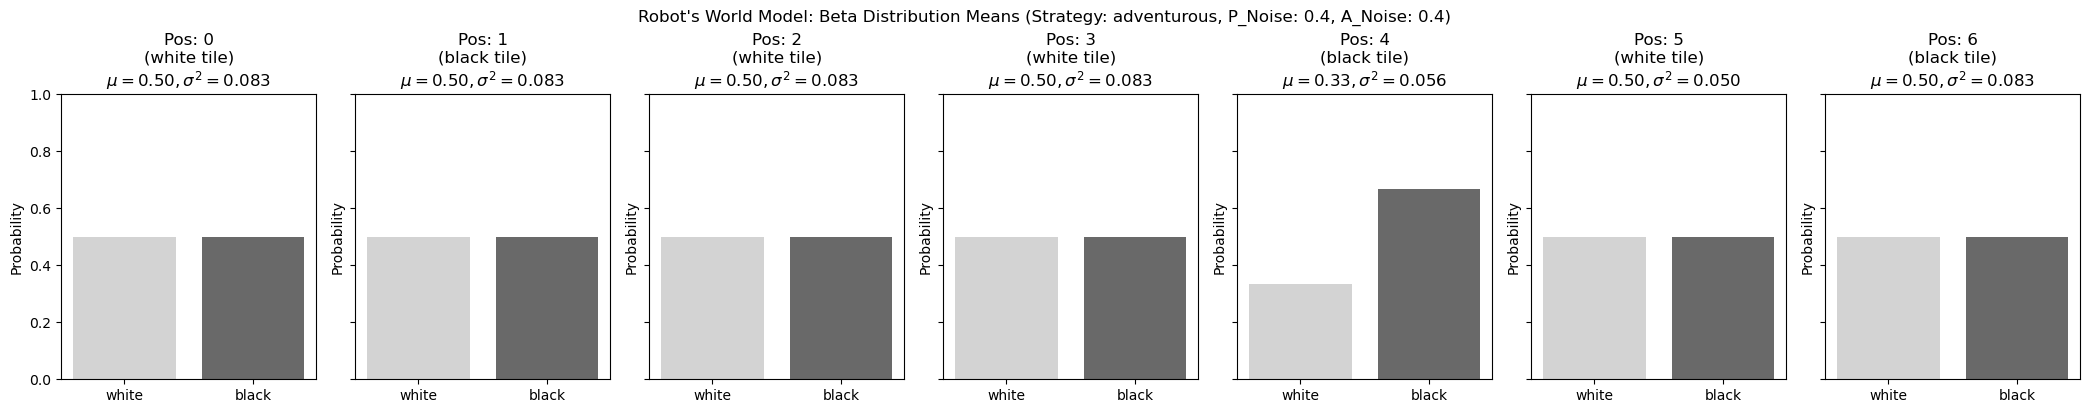

Robot intended to move right, but due to noise, moved left!
Robot moved to position 4 (a black tile).
--------------------------------------------------
--- Step 4/25 (Adventurous, 40% Noise) ---
Robot is at position 4, observes black tile (actual: black).


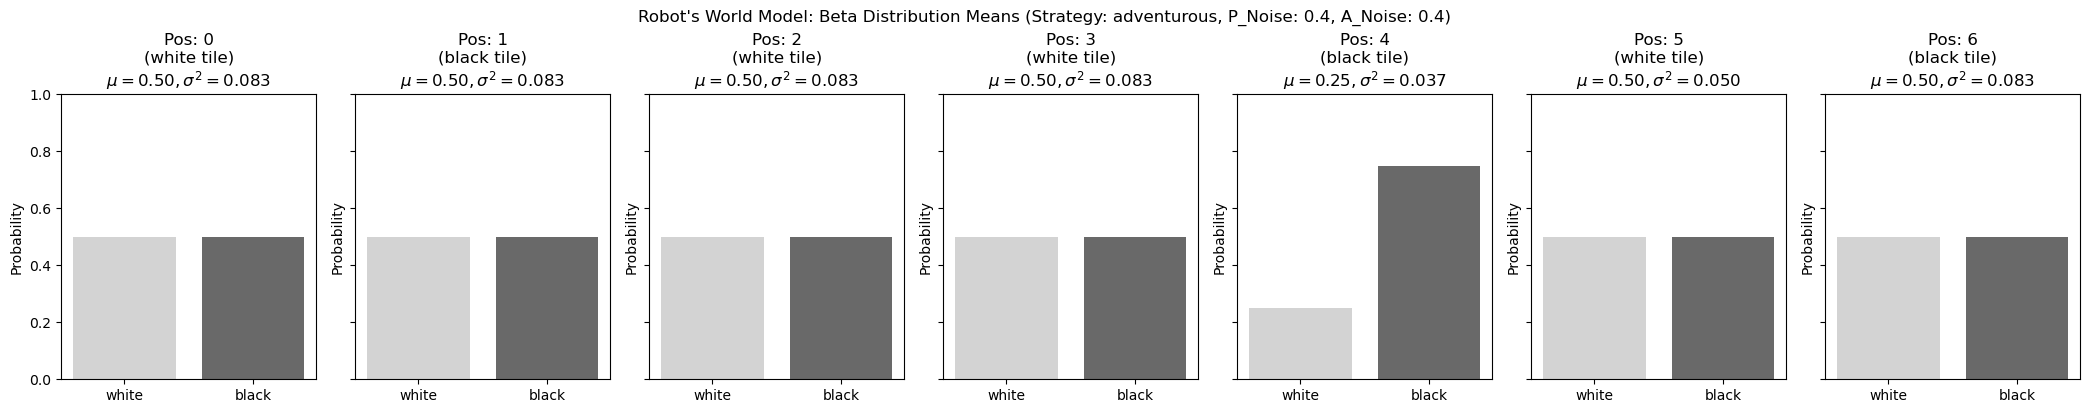

Robot intended and executed action: left
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 5/25 (Adventurous, 40% Noise) ---
Robot is at position 3, observes black tile (actual: white).


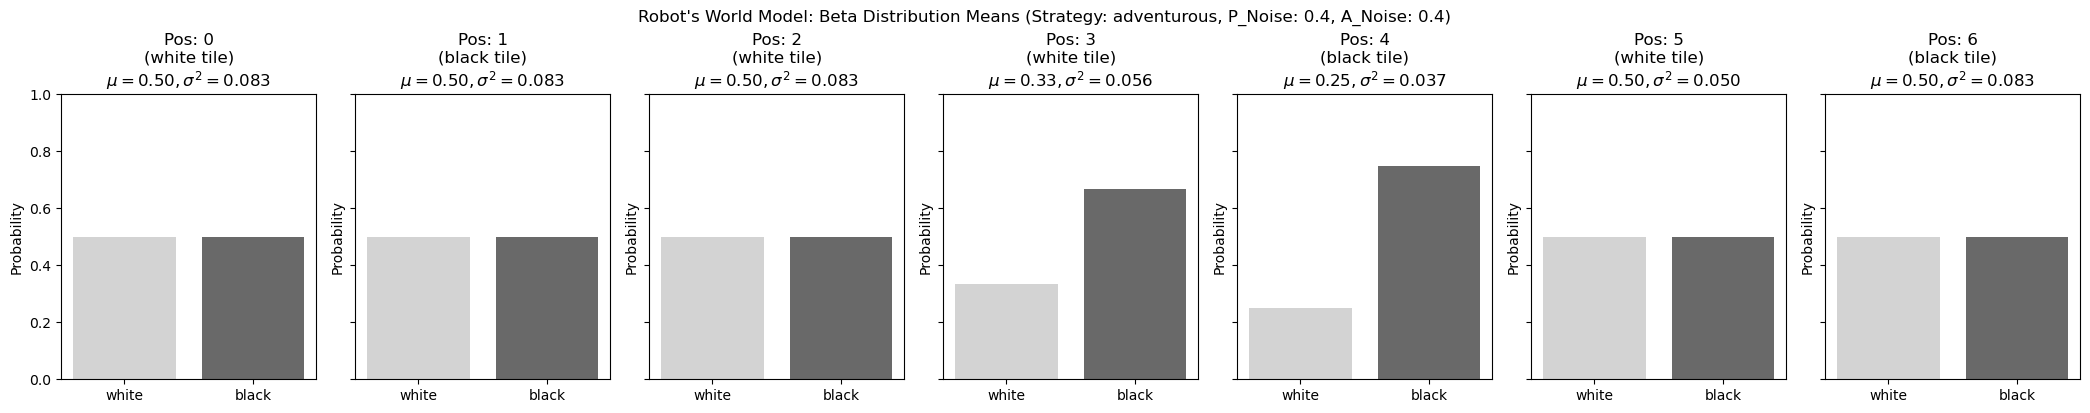

Robot intended and executed action: left
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 6/25 (Adventurous, 40% Noise) ---
Robot is at position 2, observes black tile (actual: white).


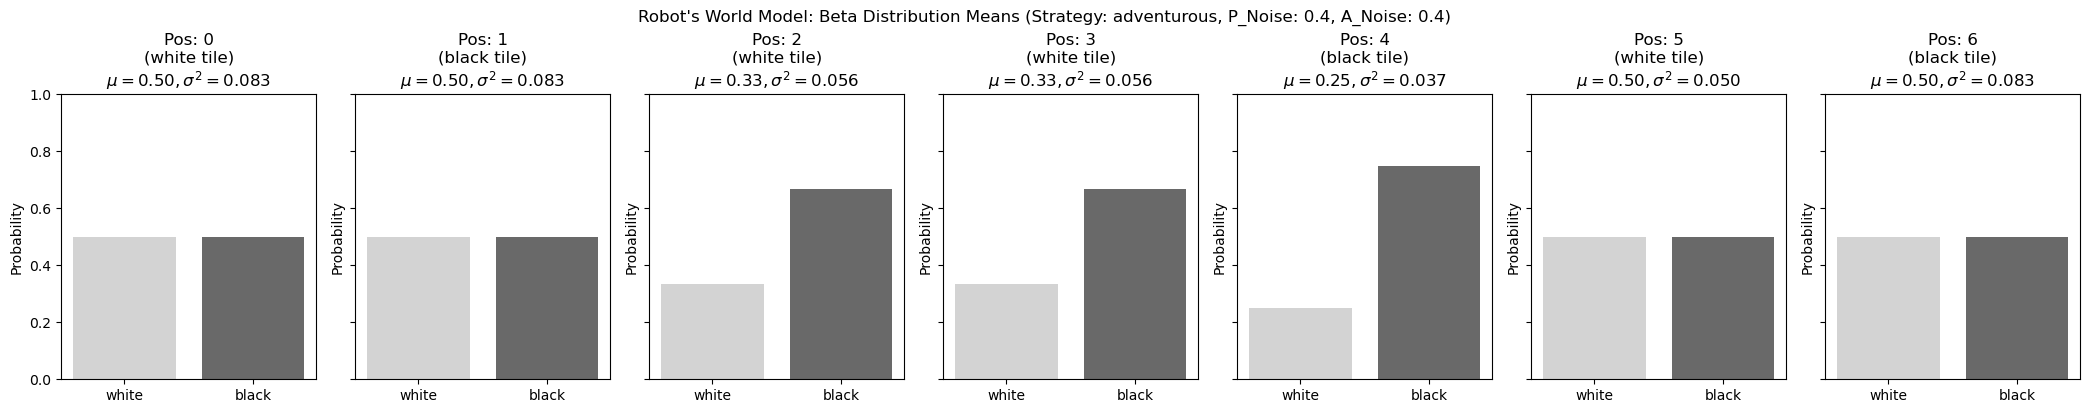

Robot intended and executed action: left
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 7/25 (Adventurous, 40% Noise) ---
Robot is at position 1, observes black tile (actual: black).


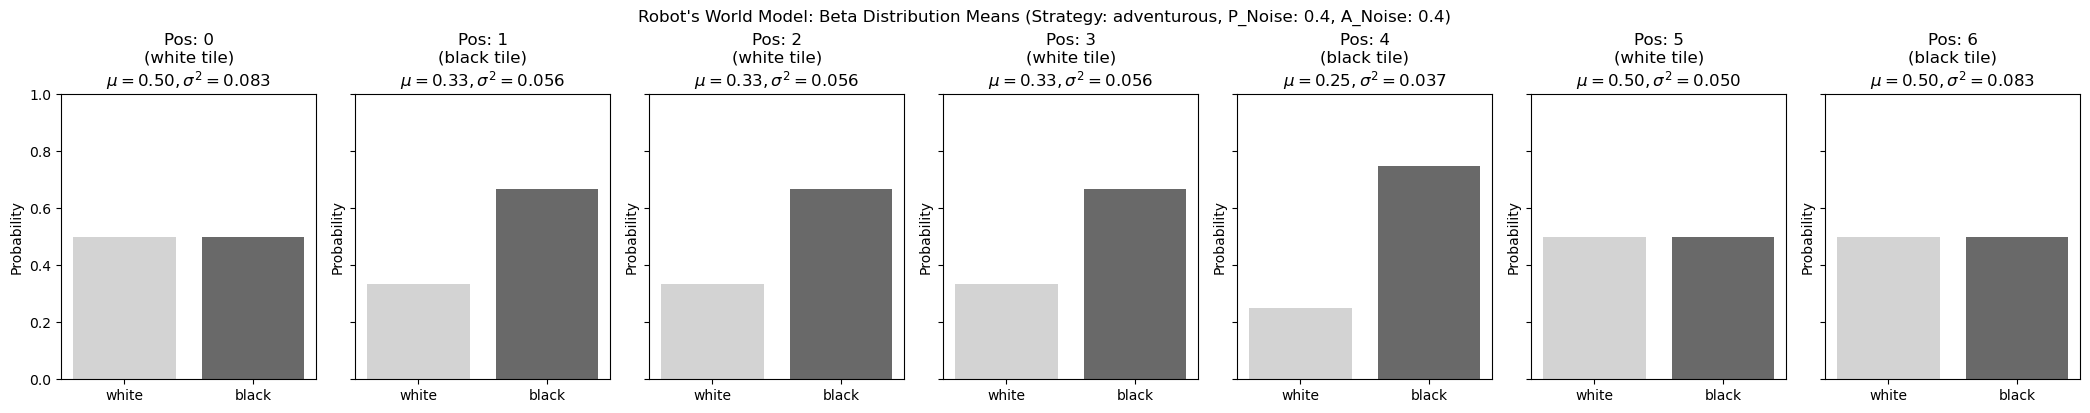

Robot intended to move left, but due to noise, moved right!
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 8/25 (Adventurous, 40% Noise) ---
Robot is at position 2, observes white tile (actual: white).


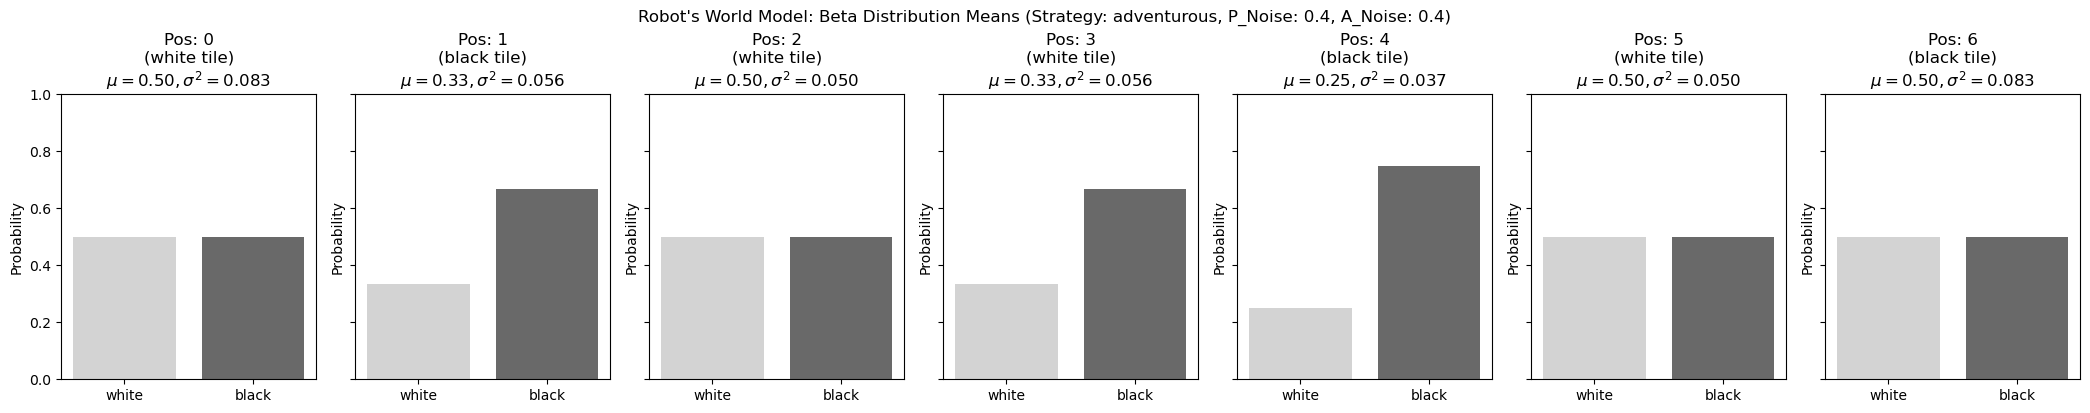

Robot intended and executed action: right
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 9/25 (Adventurous, 40% Noise) ---
Robot is at position 3, observes black tile (actual: white).


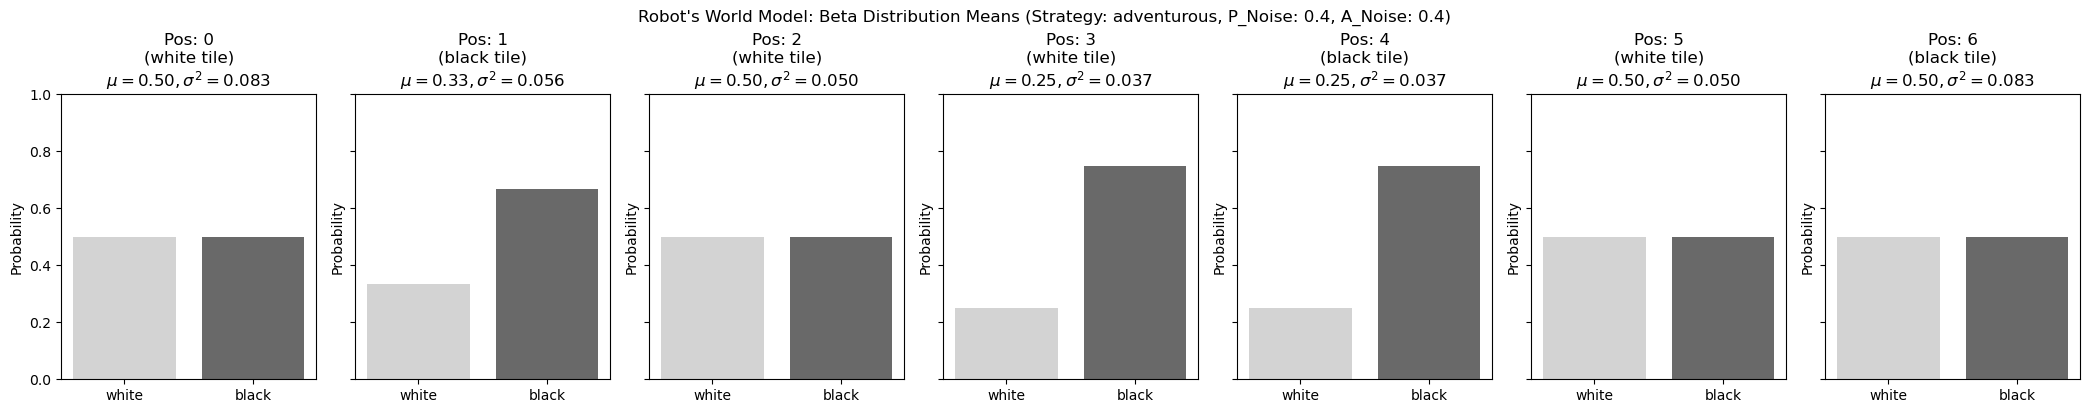

Robot intended and executed action: left
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 10/25 (Adventurous, 40% Noise) ---
Robot is at position 2, observes black tile (actual: white).


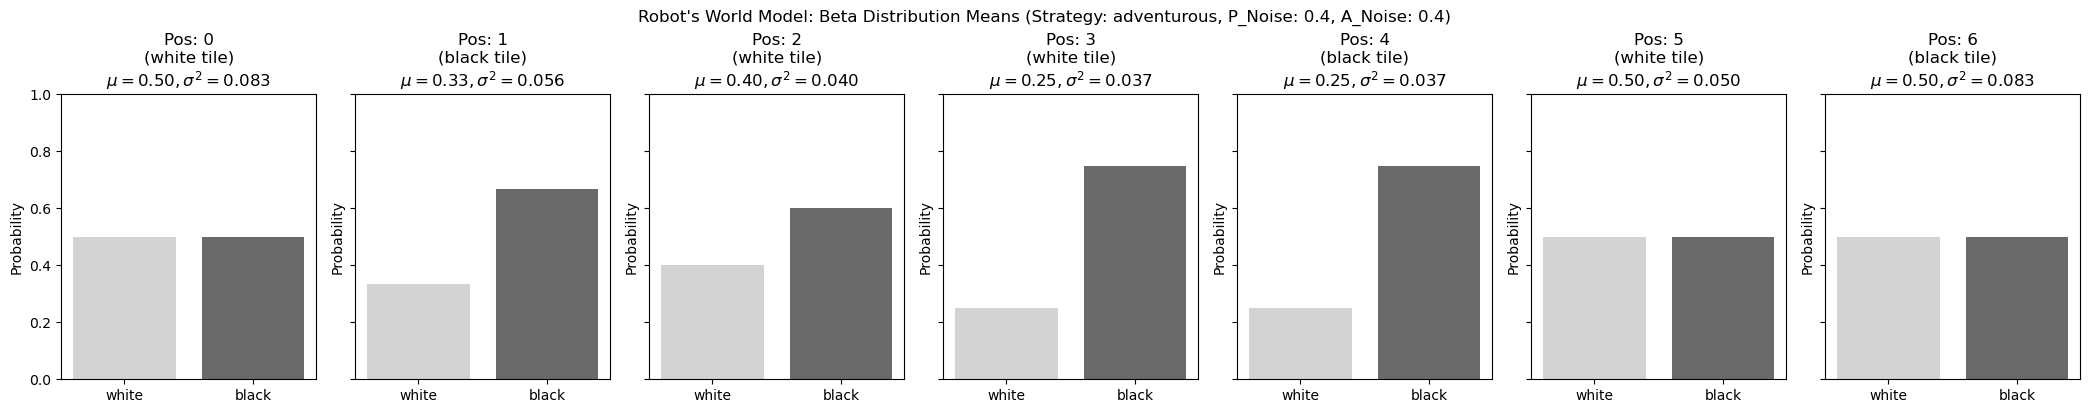

Robot intended and executed action: right
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 11/25 (Adventurous, 40% Noise) ---
Robot is at position 3, observes black tile (actual: white).


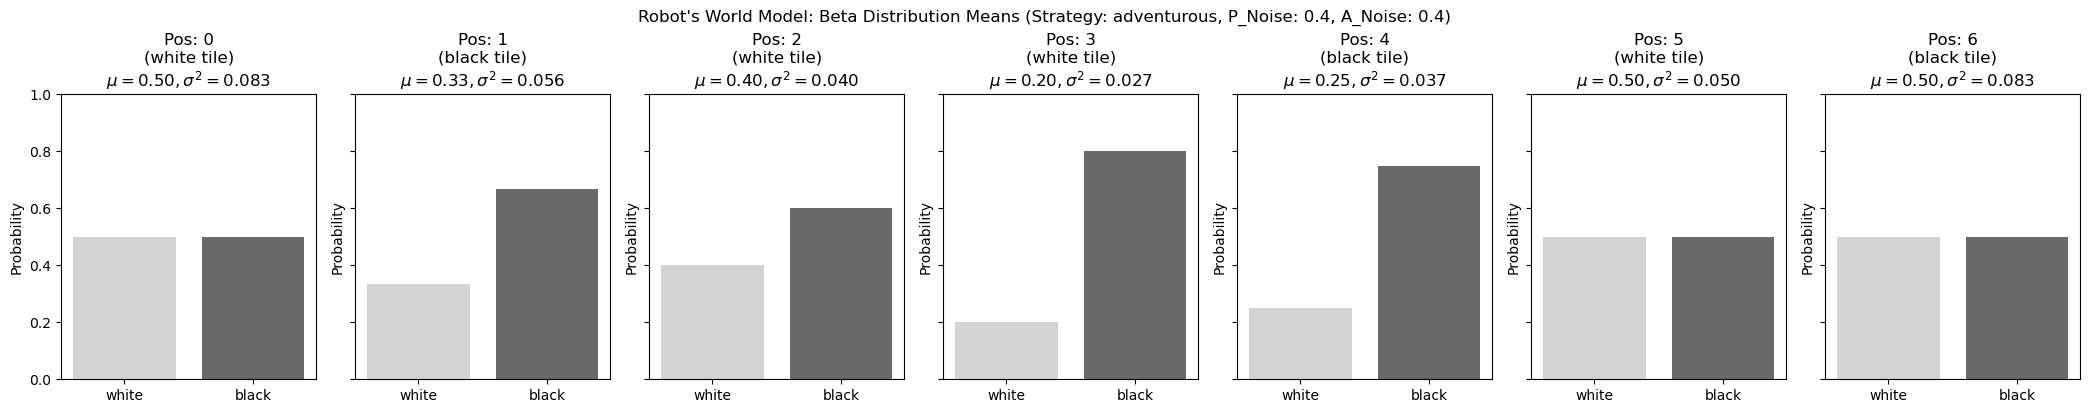

Robot intended and executed action: left
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 12/25 (Adventurous, 40% Noise) ---
Robot is at position 2, observes white tile (actual: white).


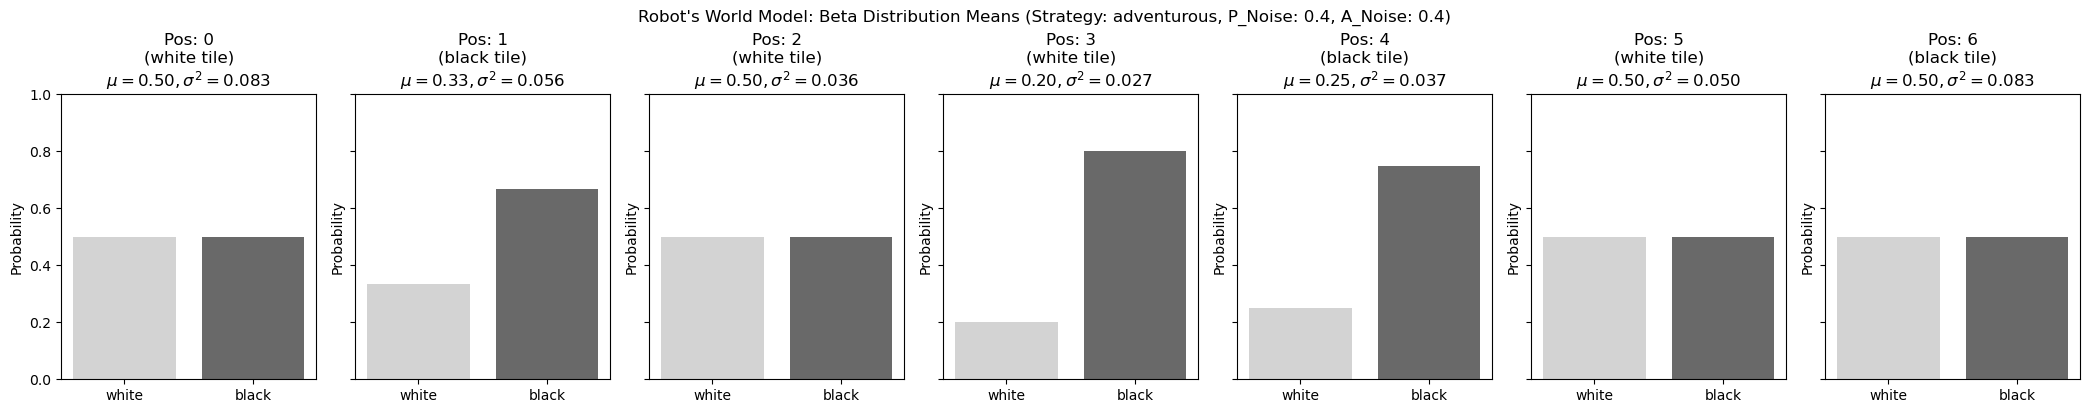

Robot intended and executed action: right
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 13/25 (Adventurous, 40% Noise) ---
Robot is at position 3, observes white tile (actual: white).


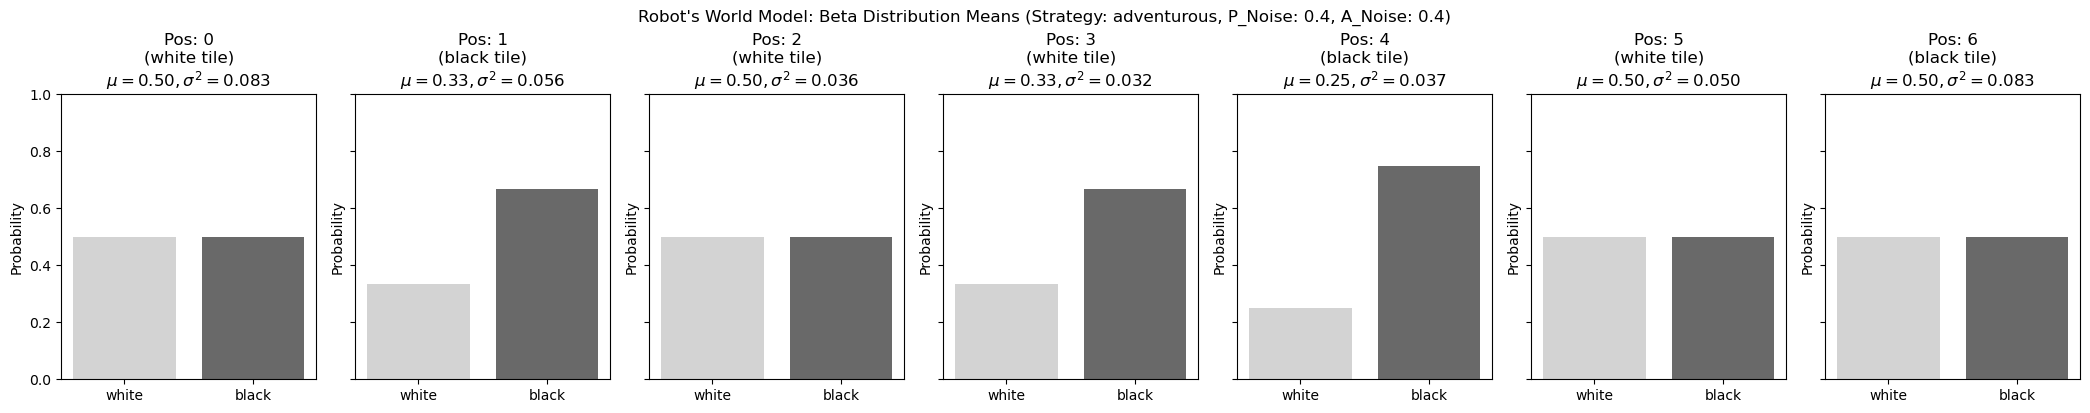

Robot intended and executed action: left
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 14/25 (Adventurous, 40% Noise) ---
Robot is at position 2, observes white tile (actual: white).


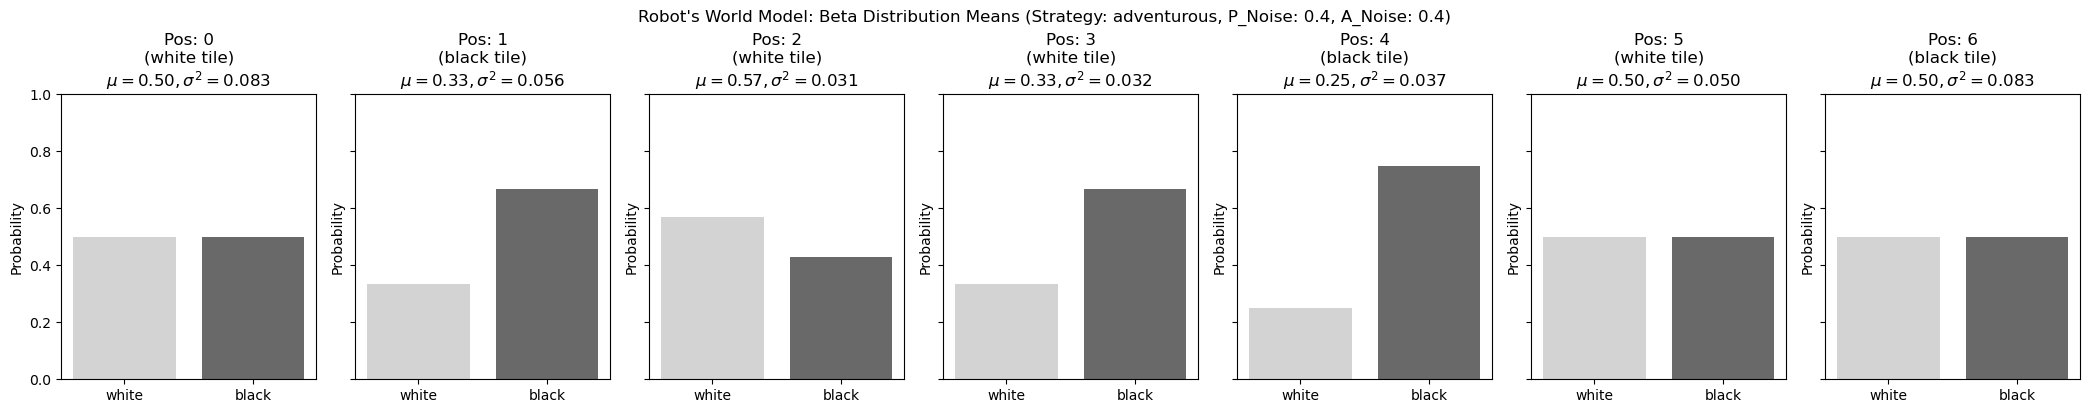

Robot intended to move right, but due to noise, moved left!
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 15/25 (Adventurous, 40% Noise) ---
Robot is at position 1, observes black tile (actual: black).


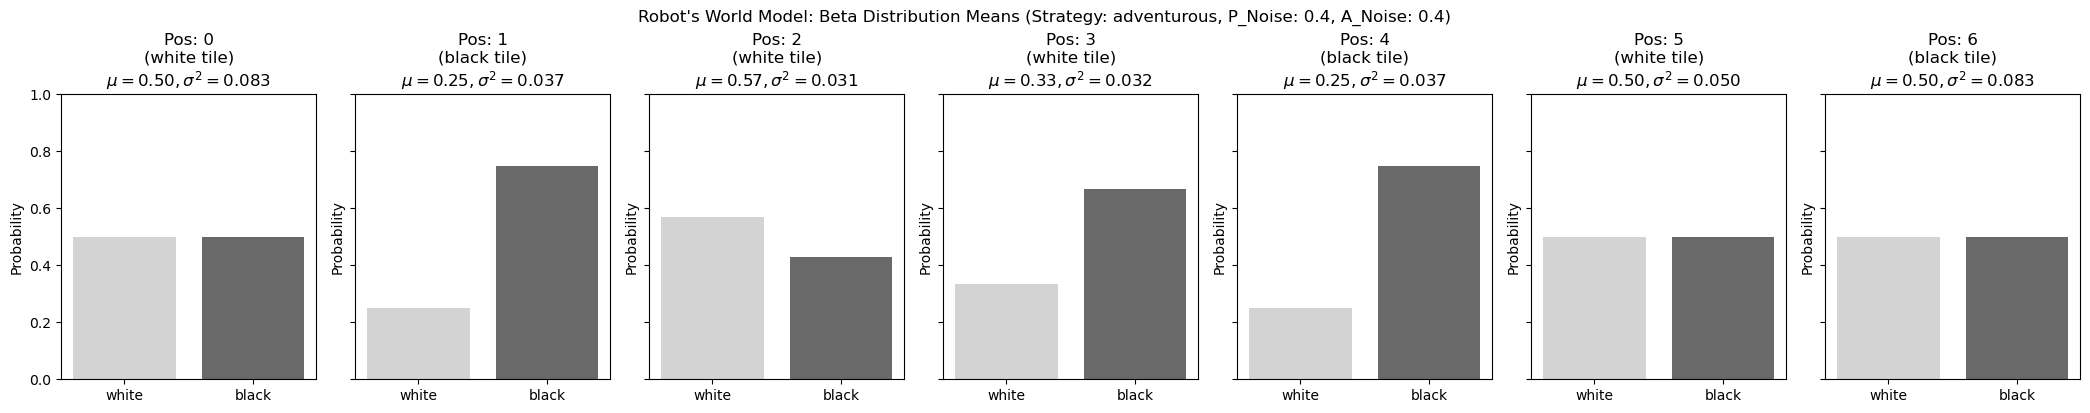

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 16/25 (Adventurous, 40% Noise) ---
Robot is at position 0, observes black tile (actual: white).


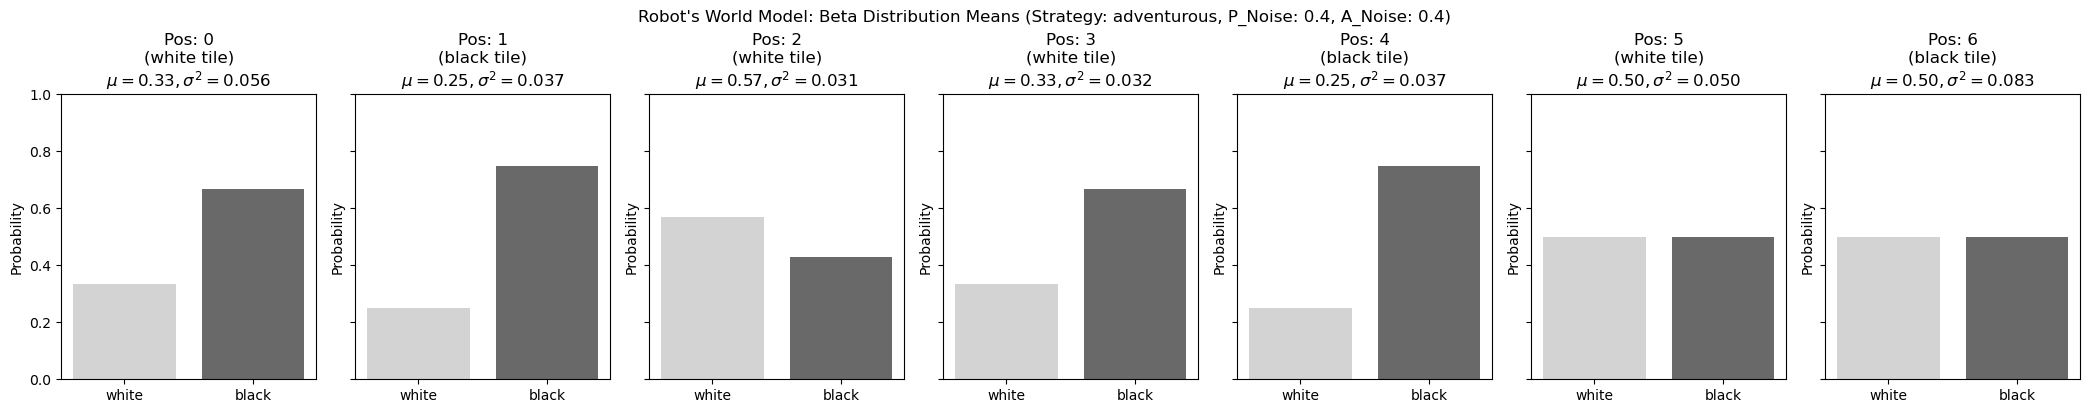

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 17/25 (Adventurous, 40% Noise) ---
Robot is at position 1, observes black tile (actual: black).


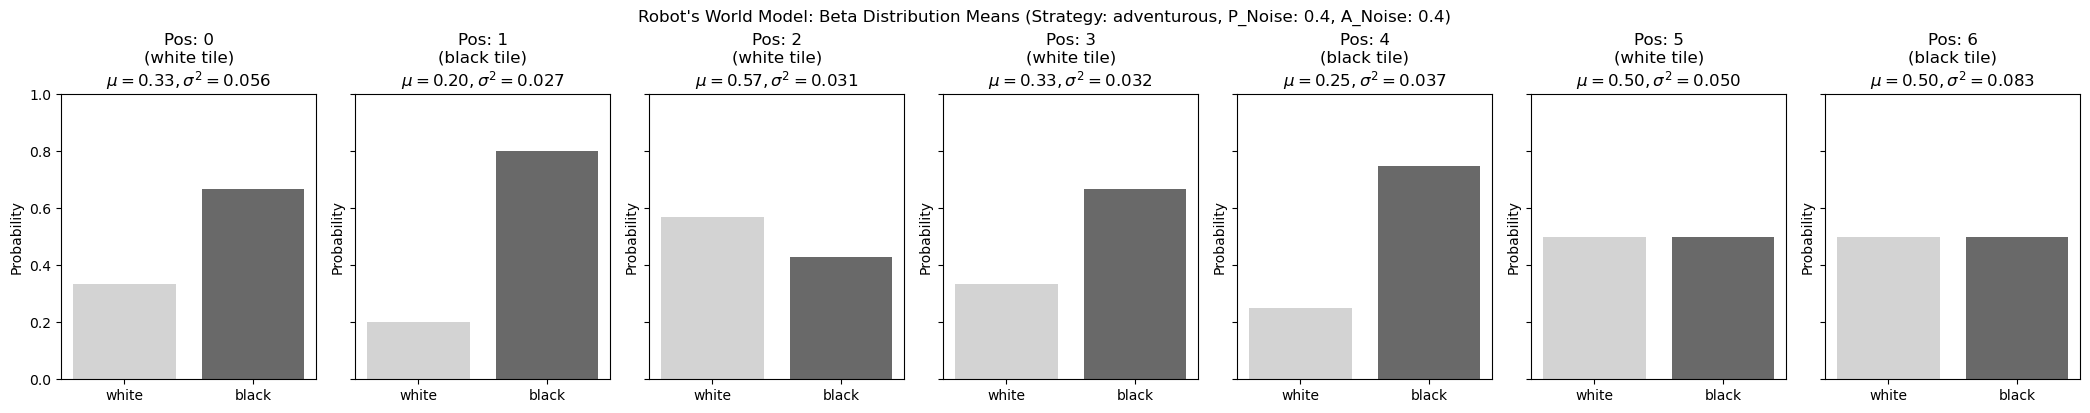

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 18/25 (Adventurous, 40% Noise) ---
Robot is at position 0, observes white tile (actual: white).


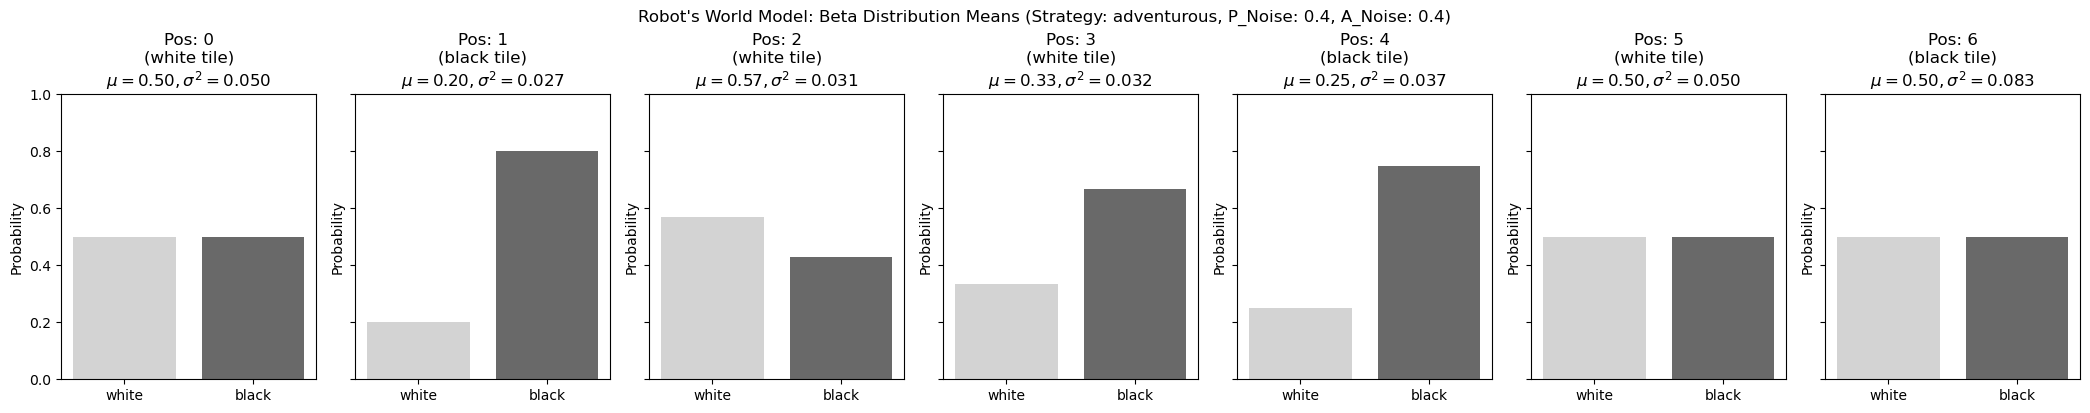

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 19/25 (Adventurous, 40% Noise) ---
Robot is at position 1, observes white tile (actual: black).


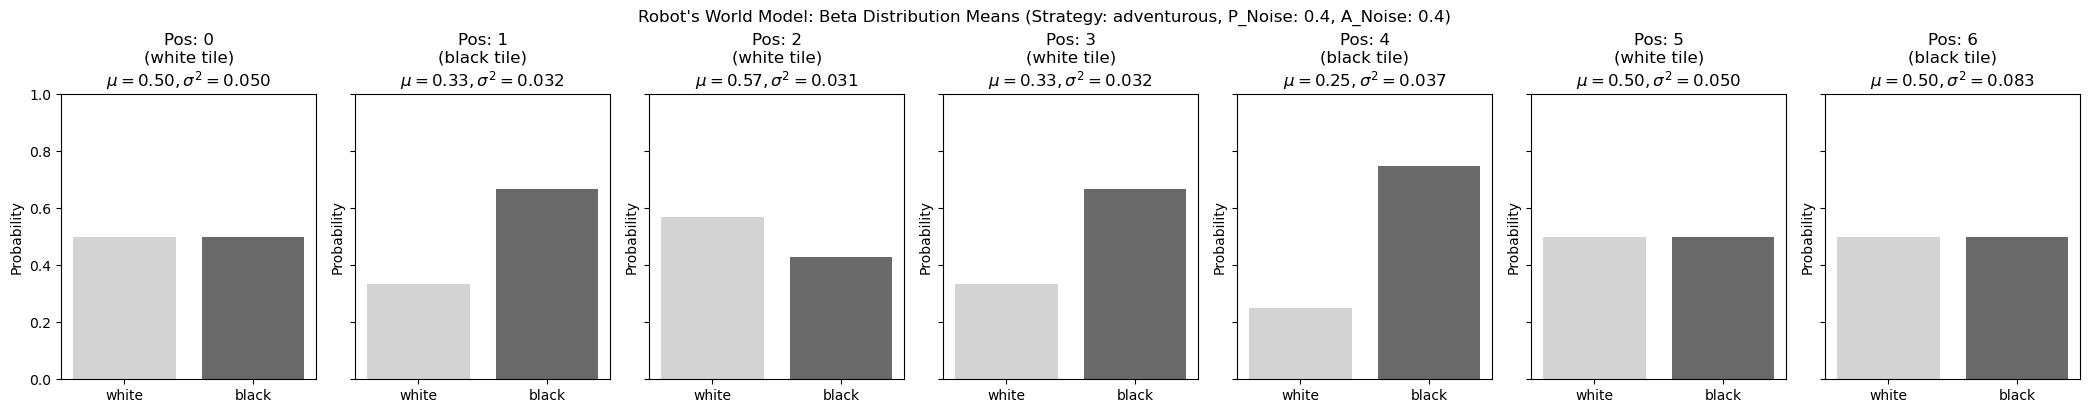

Robot intended to move left, but due to noise, moved right!
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 20/25 (Adventurous, 40% Noise) ---
Robot is at position 2, observes white tile (actual: white).


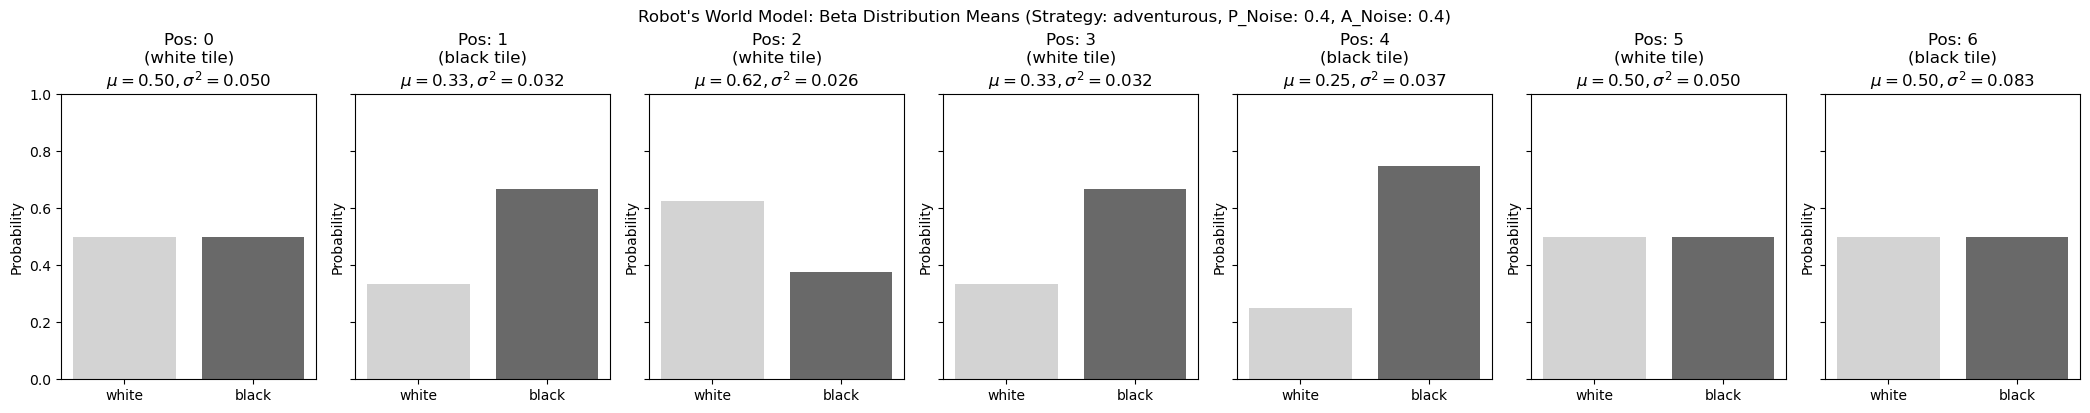

Robot intended and executed action: right
Robot moved to position 3 (a white tile).
--------------------------------------------------
--- Step 21/25 (Adventurous, 40% Noise) ---
Robot is at position 3, observes white tile (actual: white).


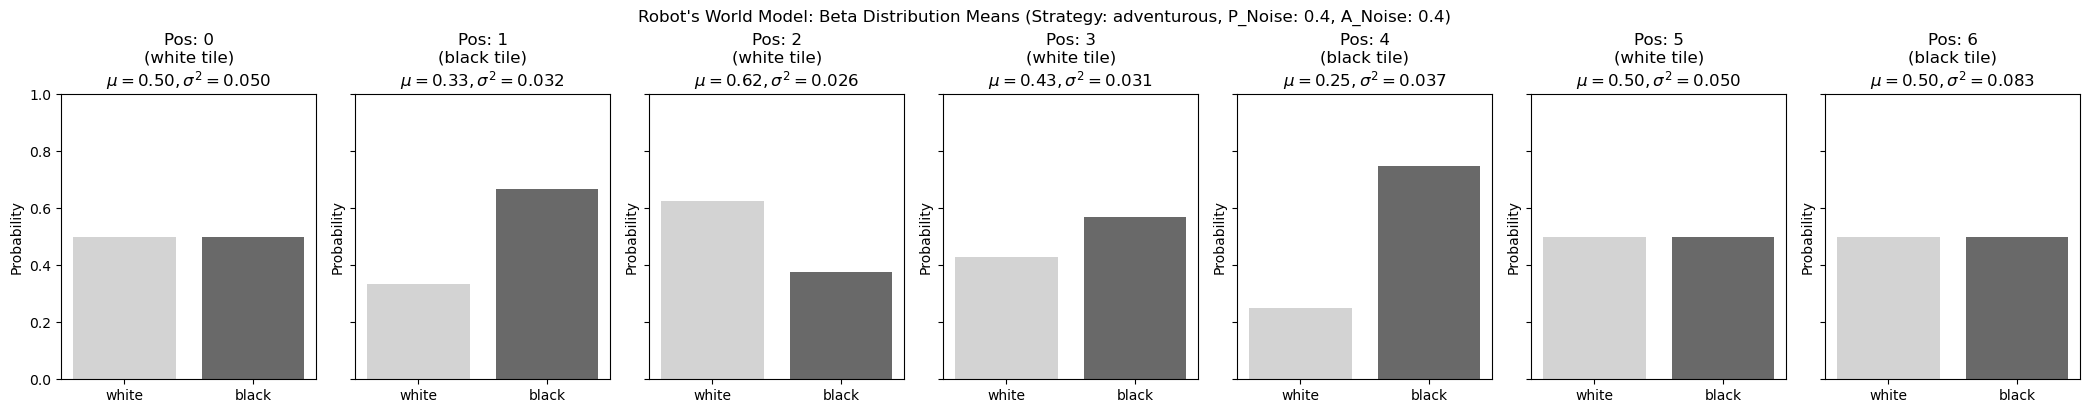

Robot intended and executed action: left
Robot moved to position 2 (a white tile).
--------------------------------------------------
--- Step 22/25 (Adventurous, 40% Noise) ---
Robot is at position 2, observes white tile (actual: white).


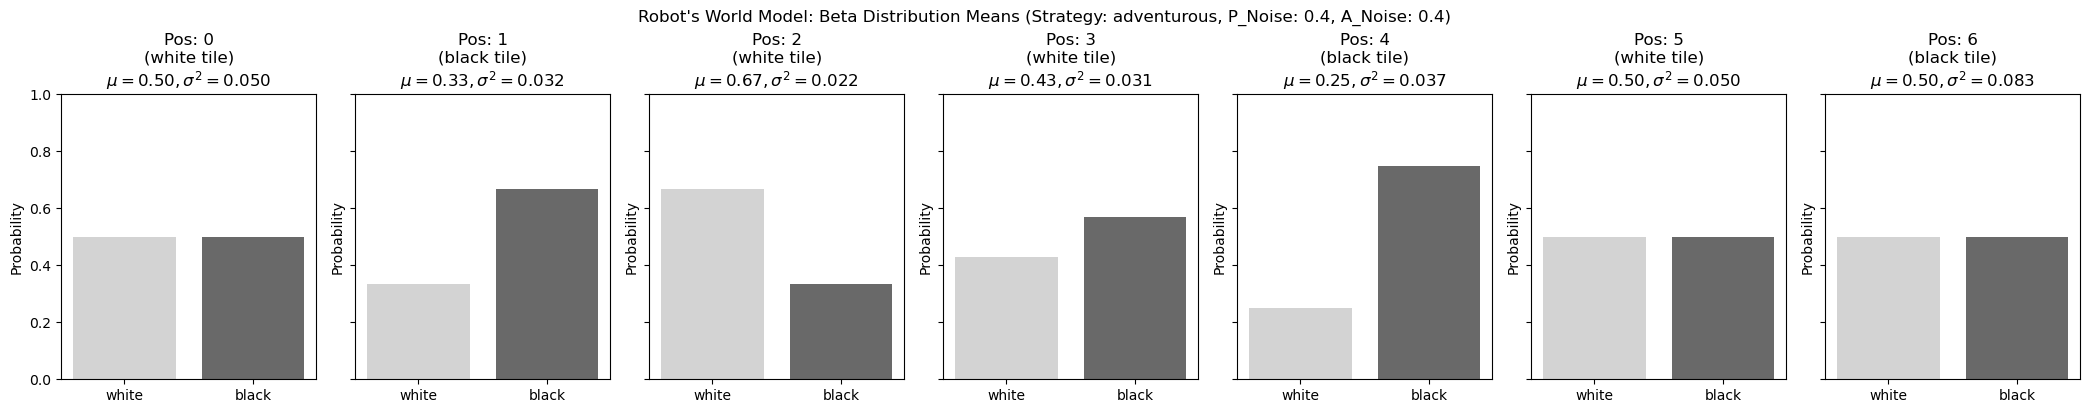

Robot intended to move right, but due to noise, moved left!
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 23/25 (Adventurous, 40% Noise) ---
Robot is at position 1, observes black tile (actual: black).


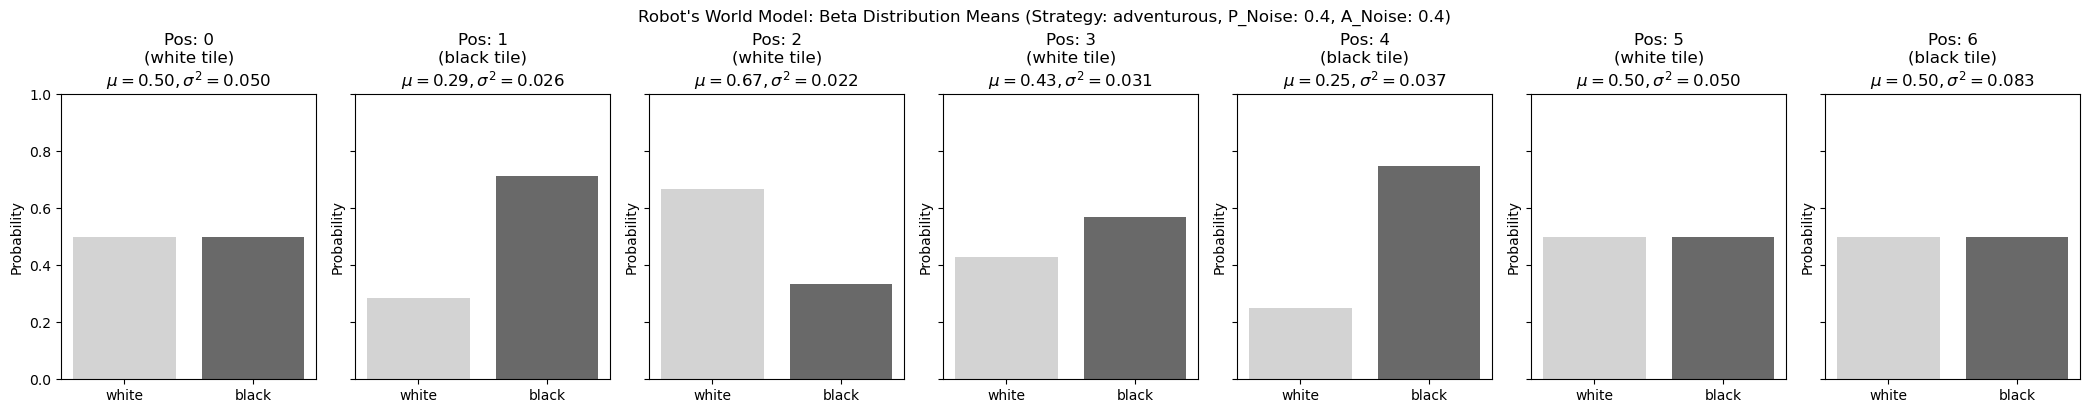

Robot intended and executed action: left
Robot moved to position 0 (a white tile).
--------------------------------------------------
--- Step 24/25 (Adventurous, 40% Noise) ---
Robot is at position 0, observes white tile (actual: white).


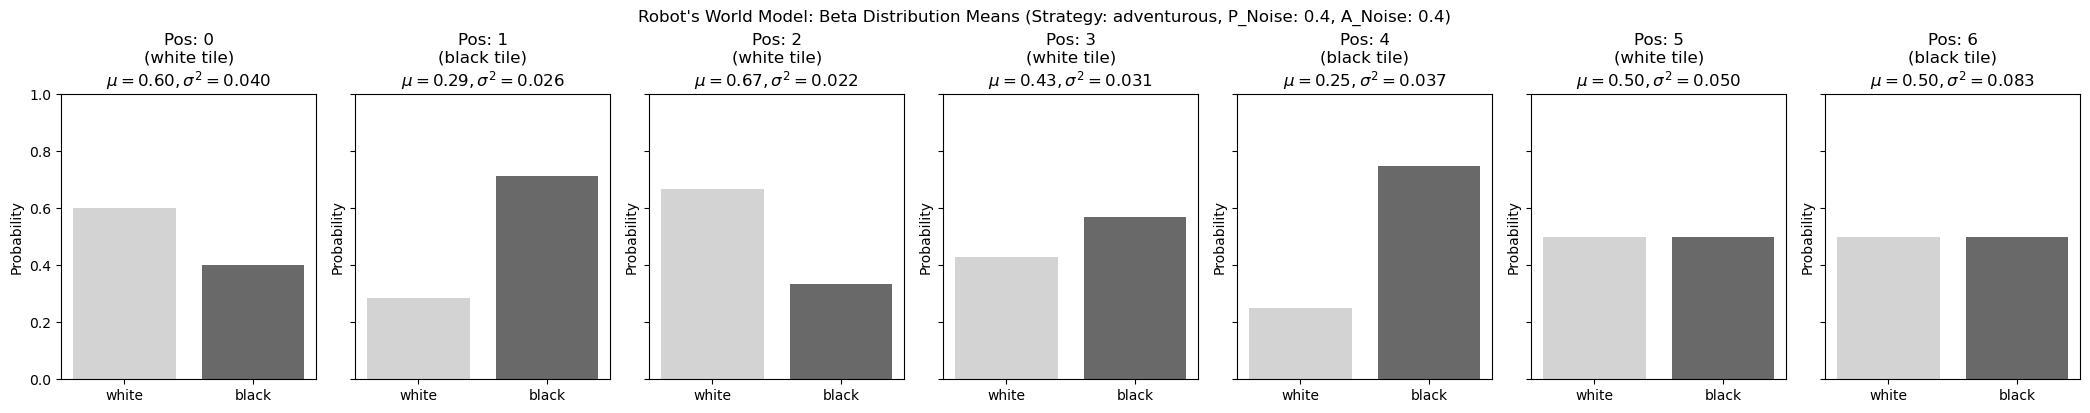

Robot intended and executed action: right
Robot moved to position 1 (a black tile).
--------------------------------------------------
--- Step 25/25 (Adventurous, 40% Noise) ---
Robot is at position 1, observes black tile (actual: black).


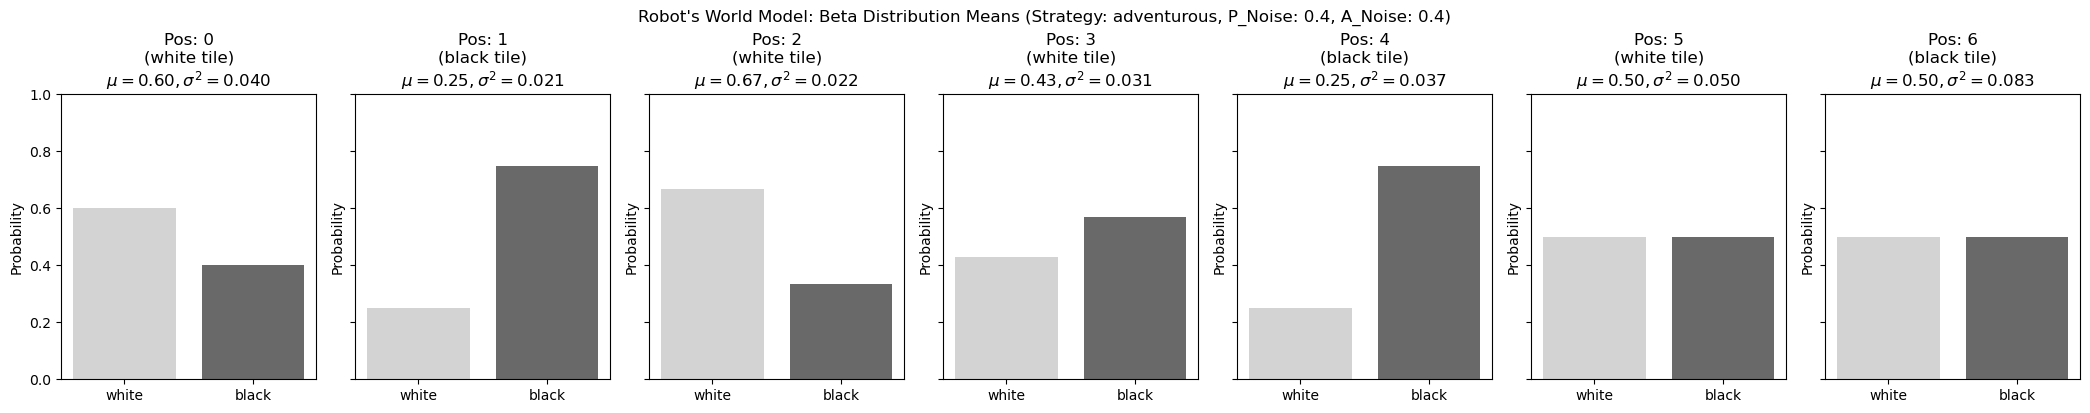

Robot intended to move left, but due to noise, moved right!
Robot moved to position 2 (a white tile).
--------------------------------------------------


In [6]:
from random import random, randint, choice
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# possible colors for tiles
TILES = ["white", "black"]
# possible actions for robot
ACTIONS = ["left", "right"]

# Define a one-dimensional world with more than two tiles
WORLD_TILES = [
    "white",
    "black",
    "white",
    "white",
    "black",
    "white",
    "black"
]
WORLD_SIZE = len(WORLD_TILES)

PERCEPTION_NOISE_PROB = 0.1 # Default for comparison
ACTION_NOISE_PROB = 0.1     # Default for comparison

# Line break for better readability
line_break = "-" * 50

# change this value for more (or less) steps
n_steps = 25

def get_tile_color(position):
    if 0 <= position < WORLD_SIZE:
        return WORLD_TILES[position]
    return None # Indicate out of bounds

class Robot:
    def __init__(self, strategy="uncertainty_minimizing", initial_alpha_beta=[1,1]):
        self.world_model = defaultdict(lambda: list(initial_alpha_beta)) # [alpha, beta] for each position

        self.position = randint(0, WORLD_SIZE - 1)
        self.current_tile_color = get_tile_color(self.position)
        self.strategy = strategy # "uncertainty_minimizing" (cautious) or "adventurous"

        print(f"Robot started at position {self.position} on a {self.current_tile_color} tile.")
        print(f"Strategy: {self.strategy}, Initial Beta: {initial_alpha_beta[0]}/{initial_alpha_beta[1]}")
        print(line_break)

    def measure_tile_color(self):
        actual_color = get_tile_color(self.position)
        if random() < PERCEPTION_NOISE_PROB:
            # Flip the color if noise occurs
            return "black" if actual_color == "white" else "white"
        return actual_color

    def update_world_model(self, position, observed_color):
        alpha, beta = self.world_model[position]
        if observed_color == "white":
            alpha += 1
        else: # observed_color == "black"
            beta += 1
        self.world_model[position] = [alpha, beta]

    def get_beta_stats(self, position):
        alpha, beta = self.world_model[position]
        total_observations = alpha + beta

        if total_observations == 0: # Should not happen with initial_alpha_beta=[1,1]
            return 0.5, 0.0 # Default if no data, or handle as error

        mu = alpha / total_observations
        variance = (alpha * beta) / ( (total_observations**2) * (total_observations + 1) )
        return mu, variance

    def predict_next_action_position(self, action):
        if action == "left":
            next_pos = self.position - 1
            if next_pos < 0:
                return None # Out of bounds
            return next_pos
        elif action == "right":
            next_pos = self.position + 1
            if next_pos >= WORLD_SIZE:
                return None # Out of bounds
            return next_pos
        return None # Should not happen

    def calculate_delta(self, intended_action):
        delta = 0.0

        # Define expected contribution function for a given predicted position
        def get_uncertainty_contribution(predicted_pos):
            if predicted_pos is None:
                return 0.0

            mu, sigma2 = self.get_beta_stats(predicted_pos)
            actual_color_at_pos = get_tile_color(predicted_pos) # This is s'
            s_prime_numerical = 1 if actual_color_at_pos == "white" else 0

            deviation = abs(s_prime_numerical - mu)
            return sigma2 * deviation

        # Contribution from intended direction (0.9 probability)
        intended_next_pos = self.predict_next_action_position(intended_action)
        delta += 0.9 * get_uncertainty_contribution(intended_next_pos)

        # Contribution from opposite direction due to action noise (0.1 probability)
        opposite_action = "right" if intended_action == "left" else "left"
        opposite_next_pos = self.predict_next_action_position(opposite_action)
        delta += 0.1 * get_uncertainty_contribution(opposite_next_pos)

        return delta

    def choose_action(self):
        action_deltas = {}
        valid_actions = []

        for action in ACTIONS:
            predicted_next_position = self.predict_next_action_position(action)

            # Only consider actions that lead to a valid, different position
            if predicted_next_position is not None and predicted_next_position != self.position:
                valid_actions.append(action)
                action_deltas[action] = self.calculate_delta(action)

        if not valid_actions:
            print("Warning: Robot is stuck! No valid moves to a different tile.")
            return None # Indicate no valid action can be taken

        best_action = None
        if self.strategy == "uncertainty_minimizing": # Cautious
            best_delta = float('inf')
            for action in valid_actions:
                if action_deltas[action] < best_delta:
                    best_delta = action_deltas[action]
                    best_action = action
                elif action_deltas[action] == best_delta:
                    if random() < 0.5:
                        best_action = action
        elif self.strategy == "adventurous":
            best_delta = float('-inf')
            for action in valid_actions:
                if action_deltas[action] > best_delta:
                    best_delta = action_deltas[action]
                    best_action = action
                elif action_deltas[action] == best_delta:
                    if random() < 0.5:
                        best_action = action
        else:
            raise ValueError(f"Unknown strategy: {self.strategy}")

        return best_action

    def show_world_model_histograms(self):
        num_positions = WORLD_SIZE
        fig, axs = plt.subplots(1, num_positions, figsize=(num_positions * 3, 4), sharey=True)

        if num_positions == 1:
            axs = [axs]

        for i in range(num_positions):
            mu, sigma2 = self.get_beta_stats(i)
            # mu is the probability of "white"
            p_white = mu
            p_black = 1 - mu

            colors = TILES
            probabilities = [p_white, p_black]

            axs[i].bar(colors, probabilities, color=["lightgray", "dimgray"])
            axs[i].set_title(f'Pos: {i}\n({WORLD_TILES[i]} tile)\n$\mu={mu:.2f}, \sigma^2={sigma2:.3f}$')
            axs[i].set_ylim(0, 1)
            axs[i].set_ylabel('Probability')

        plt.tight_layout()
        plt.suptitle(f"Robot's World Model: Beta Distribution Means (Strategy: {self.strategy}, P_Noise: {PERCEPTION_NOISE_PROB}, A_Noise: {ACTION_NOISE_PROB})", y=1.02)
        plt.show()

    def step(self):
        """Performs one step of the robot's simulation."""
        # Measure current tile color (with perception noise)
        observed_color = self.measure_tile_color()
        print(f"Robot is at position {self.position}, observes {observed_color} tile (actual: {get_tile_color(self.position)}).")

        # Update world model with the observation
        self.update_world_model(self.position, observed_color)

        # Visualize the current state of the world model
        self.show_world_model_histograms()

        # Choose next action based on strategy
        chosen_action = self.choose_action()

        if chosen_action is None:
            print("Robot could not choose a valid action and is stuck.")
            print(line_break)
            return True # Indicate that the robot is stuck

        # Execute action with noise
        executed_action = chosen_action
        if random() < ACTION_NOISE_PROB:
            executed_action = "right" if chosen_action == "left" else "left"
            print(f"Robot intended to move {chosen_action}, but due to noise, moved {executed_action}!")
        else:
            print(f"Robot intended and executed action: {chosen_action}")

        # Predict the actual next position based on executed action
        next_position = self.predict_next_action_position(executed_action)

        if next_position is None:
            print(f"Robot moved {executed_action} from position {self.position} but it was out of bounds. Robot stays put.")
        else:
            # Update robot's position
            self.position = next_position
            self.current_tile_color = get_tile_color(self.position) # Update current tile color after move
            print(f"Robot moved to position {self.position} (a {self.current_tile_color} tile).")
        print(line_break)
        return False # Indicate that the robot is not stuck


NOISE_LEVELS = [0.0, 0.1, 0.4]
STRATEGIES = ["uncertainty_minimizing", "adventurous"]

for noise_level in NOISE_LEVELS:
    global PERCEPTION_NOISE_PROB, ACTION_NOISE_PROB
    PERCEPTION_NOISE_PROB = noise_level
    ACTION_NOISE_PROB = noise_level

    for strategy in STRATEGIES:
        print(f"\n{'='*100}\n")
        print(f"--- Running {strategy.replace('_', ' ').title()} Robot with {int(noise_level*100)}% Noise ---")
        robot = Robot(strategy=strategy, initial_alpha_beta=[1,1])
        stuck = False
        for step_num in range(n_steps):
            print(f"--- Step {step_num + 1}/{n_steps} ({strategy.replace('_', ' ').title()}, {int(noise_level*100)}% Noise) ---")
            stuck = robot.step()
            if stuck:
                print("Robot got stuck, ending simulation for this configuration.")
                break
        plt.close('all') # Close all plots to avoid too many open windows